# Testing Schlogl's model on ABC

In [2]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import os

__file = r"C:\Users\Victor\Desktop\disertation_2022\experiments\schlogl"

my_path = os.path.abspath(__file)

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

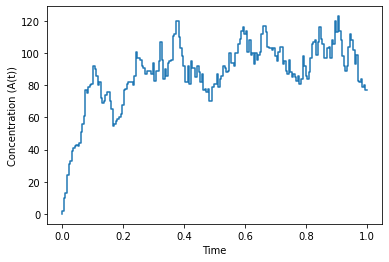

In [87]:
np.random.seed(1)

# Load a forward model
n_0 = 0
model = toy.stochastic.SchloglModel(n_0)

# Create some toy data
k = [0.18, 0.00025, 2200, 37.5]
times = np.linspace(0, 1, 200)

values = model.simulate(k, times)
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)
# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50])
# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)
plt.step(times, values)


plt.xlabel('Time')
plt.ylabel('Concentration (A(t))')
# plt.show()
plt.savefig(my_path + './schlogl_data.pdf')

# Rejection ABC

In [20]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(23)

# set target number of samples
abc.set_n_samples(500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in parallel with 8 worker processess.
Iter. Eval. Acceptance rate Time m:s
1     8      0.375            0:11.7
2     16     0.3125           0:13.7
3     24     0.291666667      0:16.3
20    192    0.1875           1:54.0
40    392    0.18622449       3:43.5
60    584    0.186643836      5:29.1
80    768    0.188802083      7:00.3
100   968    0.188016529      8:28.4
120   1144   0.194055944     10:03.6
140   1328   0.199548193     11:50.4
160   1536   0.192057292     14:02.1
180   1736   0.190092166     15:49.1
200   1920   0.190625        17:32.1
220   2120   0.19009434      19:24.7
240   2320   0.188793103     21:27.9
260   2520   0.19047619      23:25.4
cnt_sampled=2584
Halting: target number of samples (500) reached.
Done


In [96]:
samples_flat = np.array([item for sublist in samples for item in sublist])
print(len(samples_flat))

64


In [19]:
samples_abc = samples

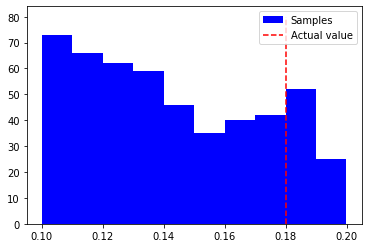

In [21]:
# samples_flat = np.array([item for sublist in samples for item in sublist])

# print(samples_flat[:])
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.18, linestyles='dashed', ymin=0, ymax=80, label="Actual value", color="red")
plt.legend()
plt.show()

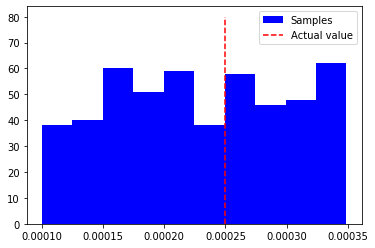

In [22]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=0.00025, linestyles='dashed', ymin=0, ymax=80, label="Actual value", color="red")
plt.legend()
plt.show()

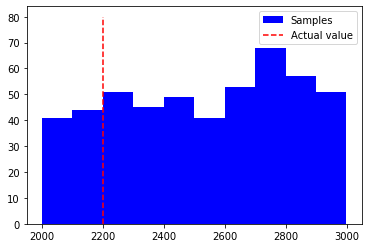

In [23]:
plt.hist(samples[:,2], color="blue", label="Samples")
plt.vlines(x=2200, linestyles='dashed', ymin=0, ymax=80, label="Actual value", color="red")
plt.legend()
plt.show()

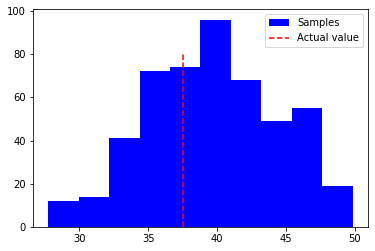

In [24]:
plt.hist(samples[:,3], color="blue", label="Samples")
plt.vlines(x=37.5, linestyles='dashed', ymin=0, ymax=80, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC

In [21]:
np.random.seed(3)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([30, 27, 23]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(100)

abc.sampler().set_perturbation_kernel(pints.UniformLogPrior([-0.05, -0.00005, -500, -7], [0.05, 0.00005, 500, 7]))

# set target number of samples
abc.set_n_samples(700)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in sequential mode.
Starting t=0, with threshold=30
Iter. Eval. Acceptance rate Time m:s
1     1      1                0:00.4
2     4      0.5              0:02.1
3     6      0.5              0:03.2


d:\Part B\repos\pints\pints\toy\stochastic\_schlogl_model.py:43: RuntimeWarning: overflow encountered in long_scalars
  xs[0] * (xs[0] - 1) * (xs[0] - 2) * ks[1],
d:\Part B\repos\pints\pints\toy\stochastic\_schlogl_model.py:42: RuntimeWarning: overflow encountered in long_scalars
  xs[0] * (xs[0] - 1) * ks[0],


20    60     0.333333333      0:56.6
40    134    0.298507463      2:13.7
60    183    0.327868852459   3:14.5
80    245    0.326530612      4:37.4
Starting t=1, with threshold=27
100   315    0.317460317      6:33.0
120   353    0.339943343      6:55.1
140   380    0.368421053      7:02.1
160   420    0.380952381      7:18.4
180   455    0.395604396      7:27.2
Starting t=2, with threshold=23
200   494    0.4048583        7:43.6
220   550    0.4              8:06.9
240   617    0.38897893       8:50.6
260   663    0.392156863      9:04.7
280   701    0.399429387      9:31.9
300   771    0.389105058     10:13.3
320   829    0.386007238     10:36.0
340   895    0.379888268     11:15.5
360   963    0.373831776     11:48.5
380   1022   0.371819961     12:33.9
400   1100   0.363636364     13:15.0
420   1170   0.358974359     14:15.7
440   1219   0.3609516       14:34.0
460   1276   0.360501567     15:09.6
480   1344   0.357142857     15:39.1
500   1398   0.357653791     16:11.6
520   1449 

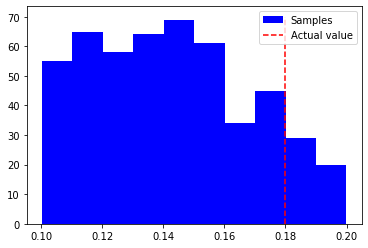

In [22]:
plt.hist(samples[200:,0], color="blue", label="Samples")
plt.vlines(x=0.18, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

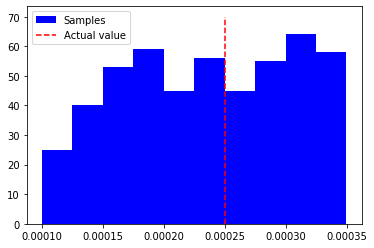

In [23]:
plt.hist(samples[200:,1], color="blue", label="Samples")
plt.vlines(x=0.00025, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

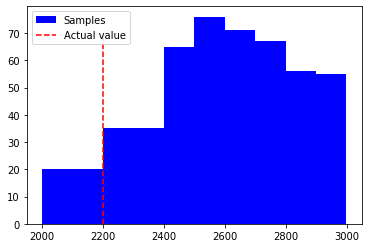

In [24]:
plt.hist(samples[200:,2], color="blue", label="Samples")
plt.vlines(x=2200, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

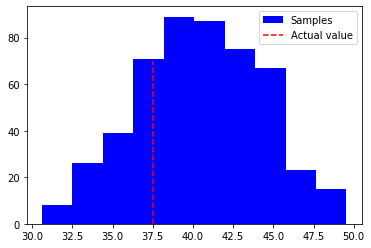

In [25]:
plt.hist(samples[200:,3], color="blue", label="Samples")
plt.vlines(x=37.5, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

In [26]:
samples_pmc_mod = samples

# Original PMC ABC

In [12]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([30, 27, 23]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(500)

abc.sampler().set_perturbation_kernel(pints.UniformLogPrior([-0.05, -0.00005, -500, -7], [0.05, 0.00005, 500, 7]))

# set target number of samples
abc.set_n_samples(1500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in parallel with 8 worker processess.
Starting t=0, with threshold=30
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:12.1
2     16     0.25             0:16.9
3     24     0.25             0:24.7
20    160    0.3375           1:32.3
40    336    0.31547619       3:12.8
60    496    0.314516129      4:37.6
80    656    0.323170732      5:52.8
100   816    0.323529412      7:13.5
120   976    0.323770492      8:47.8
140   1136   0.32834507      10:13.7
160   1304   0.327453988     11:26.4
180   1464   0.327868852459  12:36.1
Starting t=1, with threshold=27
200   1632   0.333946078     13:32.0
220   1792   0.348772321     14:09.6
240   1952   0.365778689     14:38.0
260   2112   0.379261364     15:11.4
280   2272   0.385123239     15:43.8
300   2432   0.391447368     16:17.3
Starting t=2, with threshold=23
320   2592   0.395833333     16:51.1
340   2776   0.391570605     17:31.6
360   2936   0.394754768     18:11.0
380   3096   0.394056848     1

In [13]:
samples_pmc_orig = samples

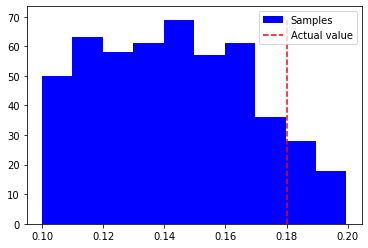

In [14]:
plt.hist(samples_pmc_orig[1000:,0], color="blue", label="Samples")
plt.vlines(x=0.18, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

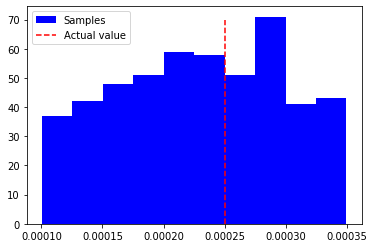

In [15]:
plt.hist(samples_pmc_orig[1000:,1], color="blue", label="Samples")
plt.vlines(x=0.00025, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

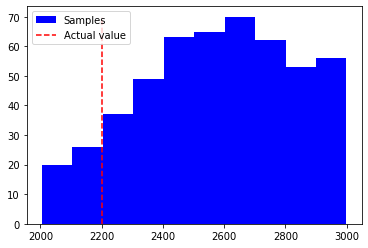

In [16]:
plt.hist(samples_pmc_orig[1000:,2], color="blue", label="Samples")
plt.vlines(x=2200, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

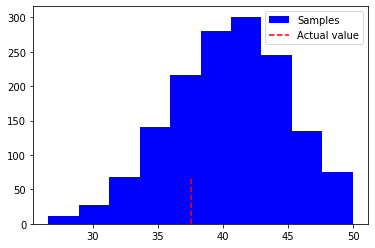

In [17]:
plt.hist(samples_pmc_orig[:,3], color="blue", label="Samples")
plt.vlines(x=37.5, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

In [41]:
samples_pmc_orig = samples

# Adaptive PMC ABC

In [26]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(450)

# set p_acc_min
abc.sampler().set_p_acc_min(0.15)

# set target number of samples
abc.set_n_samples(500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in parallel with 8 worker processess.
w_mean=[1.45951158e-01 2.33539766e-04 2.47477452e+03 3.55793890e+01]
resulting var=[[ 1.56499576e-03  4.92961481e-07  5.06577148e-01  3.93844010e-02]
 [ 4.92961481e-07  9.58565597e-09  1.37981680e-03 -2.05262717e-04]
 [ 5.06577148e-01  1.37981680e-03  1.66545510e+05 -2.83671886e+02]
 [ 3.93844010e-02 -2.05262717e-04 -2.83671886e+02  1.52675861e+02]]
epsilon=410.5196950208358
w_mean=[1.39693638e-01 2.37329278e-04 2.46871876e+03 3.49414398e+01]
resulting var=[[ 1.12849078e-03  1.60115719e-07  8.19986286e-01 -4.14278733e-02]
 [ 1.60115719e-07  6.71552235e-09  1.15173013e-03  2.24430726e-04]
 [ 8.19986286e-01  1.15173013e-03  1.42699467e+05  6.22521142e+02]
 [-4.14278733e-02  2.24430726e-04  6.22521142e+02  1.41091117e+02]]
epsilon=316.84584579886797
w_mean=[1.41346162e-01 2.44381494e-04 2.51692854e+03 3.86231238e+01]
resulting var=[[ 1.79607565e-03 -4.64892622e-09 -1.64763253e+00  8.96752339e-02]
 [-4.64892622

In [32]:
samples_adaptive_pmc = samples

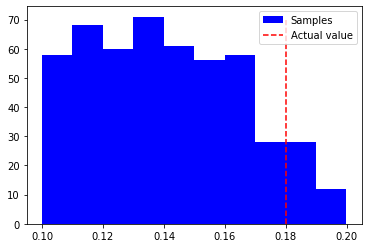

In [28]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.18, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

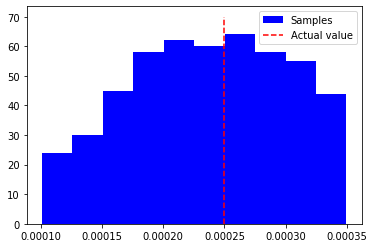

In [29]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=0.00025, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

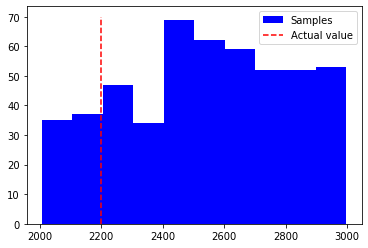

In [30]:
plt.hist(samples[:,2], color="blue", label="Samples")
plt.vlines(x=2200, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

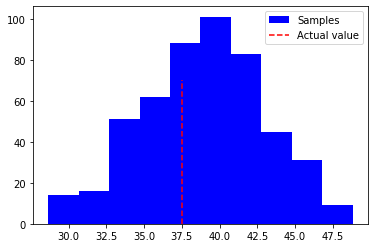

In [31]:
plt.hist(samples[:,3], color="blue", label="Samples")
plt.vlines(x=37.5, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# High Accuracy Adaptive PMC ABC

In [23]:
np.random.seed(1)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(450)

# set p_acc_min
abc.sampler().set_p_acc_min(0.02)

# set target number of samples
abc.set_n_samples(500)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in parallel with 8 worker processess.
w_mean=[1.46433037e-01 2.36939054e-04 2.50275642e+03 3.67699276e+01]
resulting var=[[ 1.60325553e-03  5.48442426e-07  1.03457964e+00  7.98917242e-02]
 [ 5.48442426e-07  9.93470647e-09 -2.12817910e-04 -1.50100382e-04]
 [ 1.03457964e+00 -2.12817910e-04  1.70512690e+05 -1.68696283e+02]
 [ 7.98917242e-02 -1.50100382e-04 -1.68696283e+02  1.48774605e+02]]
epsilon=396.9237017362405
w_mean=[1.47765696e-01 2.56477781e-04 2.53901129e+03 3.32794826e+01]
resulting var=[[ 1.89899009e-03  1.42100859e-06  7.53525883e-02 -2.42302578e-02]
 [ 1.42100859e-06  9.58617240e-09 -4.15891871e-03 -4.86944447e-04]
 [ 7.53525883e-02 -4.15891871e-03  1.73599902e+05 -1.26944763e+03]
 [-2.42302578e-02 -4.86944447e-04 -1.26944763e+03  2.16312105e+02]]
epsilon=277.9439961574993
w_mean=[1.36263830e-01 2.46369594e-04 2.49415665e+03 3.71765044e+01]
resulting var=[[ 1.38127521e-03  8.32737084e-07 -1.64860954e+00  1.08444533e-01]
 [ 8.32737084e

In [24]:
samples_adaptive_high_acc = samples

# SGLD Hamiltonian

In [3]:
from scipy.stats import multivariate_normal

class ActuallySyntheticLikelihood:
    def __init__(self, y, eps):
        y = np.array(y)
        if len(y.shape) == 1:
            self._y = np.array([y])
        else:
            self._y = np.array(y)
        self._eps = eps
        self._eps = np.diag(np.square(self._eps))

    def pdf(self, vals):   
        # estimate mean
        t_mean = np.zeros((len(self._y), len(self._y[0][0])))
        
        # vals[i] = the i-th datapoint
        # vals[i][j] = the population at time t[j]
        for j in range(len(self._y)):
            for i in range(len(vals)):
                t_mean[j] += vals[i][j]
            t_mean[j] /= (len(vals))
        
        t_cov = np.zeros( (len(self._y), len(self._y[0][0]), len(self._y[0][0])) )
        

        # t_cov[i] = covariance matrix for time i
        for i in range(len(self._y)):
            for j in range(len(vals)):
                one_t = np.array([vals[j][i] - t_mean[i]])
                t_cov[i] += one_t * np.transpose(one_t)
                # if (i == 0):
                #     print("i = " + str(i) + ", j = " + str(j))
                #     print("vals[j][i] = " + str(vals[j][i]))
                #     print("t_mean="+str(t_mean[i]))
                #     print("one_t = " + str(one_t))
                #     print("tcov[i]=" + str(t_cov[i]))
            
            t_cov[i] /= (len(vals) - 1)
            # print("t_cov[i] = " + str(t_cov[i]))
            # print("eps = " + str(self._eps))
            t_cov[i] += self._eps
            
        # print("t_cov=")
        # print(t_cov)
        rez = 0

        for i in range(len(self._y)):
            # print("t_cov[i]=" + str(t_cov[i]))
            # print("t_mean[i] = " + str(t_mean[i]))
            # print("y[i] = "+ str(self._y[i]))
            rez += (multivariate_normal.pdf(self._y[i], mean=t_mean[i], cov=t_cov[i]))


        rez = np.log(rez)
        return rez

In [19]:
class HABCsgld:
    def __init__(self, T, theta0, m, eps, s_eps, log_prior, sim_f, c, y):
        self._T = T
        self._theta0 = theta0
        self._dim = len(theta0)
        self._m = m
        self._eps = eps
        self._c = c
        self._cnt = 0
        self._mean = np.zeros(self._dim)
        
        # Functions
        self._log_prior = log_prior
        self._grad_prior = self.grad_pr 
        self._sim_f = sim_f
        self._cnt_samples = 0
        
        # Build synthetic likelihood
        self._synt_l = ActuallySyntheticLikelihood(y, s_eps)
        
        self._grads = []
    
    def grad_pr(self, theta):
        x, dx = self._log_prior.evaluateS1(theta)
        return dx
    
    def spsa(self, theta, d_theta, S, R):
        self._grads = None
        if (len(theta.shape) > 1):
            dim = len(theta[0])
        else:
            dim = len(theta)
        g = np.zeros(dim)
        
        for r in range(R):
            # Generate bernoulli distribution vector
            delta = np.zeros(dim)
            for i in range(dim):
                delta[i] = (2 * np.random.binomial(n=1, p=0.5) - 1)
            
            
            set_plus = None
            set_minus = None
            
            aux = 0
            
            for s in range(S):
                x_plus = self._sim_f(theta + d_theta * delta)
                x_minus = self._sim_f(theta - d_theta * delta)
                self._cnt_samples += 2
                
                if len(x_plus.shape) == 1:
                    x_plus = [[x] for x in x_plus]
                if len(x_minus.shape) == 1:
                    x_minus = [[x] for x in x_minus]
                    
                if set_plus is None:
                    set_plus = [x_plus]
                    set_minus = [x_minus]
                else:
                    set_plus.append(x_plus)
                    set_minus.append(x_minus)
            
            l_plus = self._synt_l.pdf(set_plus)
            l_minus = self._synt_l.pdf(set_minus)
            term = (l_plus - l_minus) * delta
            g += term

        g = ( 1 / (2 * d_theta * R) ) * g
        
        grad_val = self.grad_pr(theta)
        # if len(grad_val.shape) > 1:
            # grad_val = grad_val[0]
        g += np.exp(grad_val)
        
        return -g
        
    def run(self):
        # Initialize stuff
        self._results = [self._theta0]
        
        for t in range(1, self._T):
            done = False
            
            while not done:
                # Resample momentum
                
                curr_theta = self._results[t-1]
                curr_momentum = np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim))
                
                i = 0
                problem = False
                
                while not problem and i <= self._m:
                    spsa_term = self.spsa(curr_theta, 1e-4, S=2, R=1)
                    ran_term = np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim))
                    next_theta = curr_theta + self._eps * np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim)) - \
                                 (self._eps ** 2) / 2 * spsa_term
                        
    #                     print("spsa_term=" + str(spsa_term * self._eps))
    #                     print("second term=" + str(self._eps * self._C * curr_momentum))
    #                     print("third term=" + str(np.random.multivariate_normal(np.zeros(self._dim), 2 * self._eps * (self._C - self._B))))
    #                     print("next_theta="+str(next_theta))
    #                     print("next_momentum="+str(next_momentum))
                    curr_theta = next_theta
                    if self._log_prior(curr_theta) == np.NINF:
                        print("FAILED with next_theta=" + str(next_theta))
                        problem = True
                    i = i + 1
                if not problem:
                    done = True
                    self._results.append(curr_theta)
            print("t= " + str(t) + ", " + "curr_theta =" + str(curr_theta))
        
        print("count samples = "+str(self._cnt_samples))
        return self._results

In [20]:
np.random.seed(0)
# k = [0.18, 0.00025, 2200, 37.5]
y = np.array([[x] for x in values])

theta0 = np.array([0.12, 0.00018, 2500, 45])

def grad_prior(theta):
    x, dx = log_prior.evaluateS1(theta)
    return dx

# Simulating function
def sim_f(theta):
#     print("trying " + str(theta))
    if len(theta.shape) == 2:
        theta = theta[0]
#     print("in the end we have " + str(theta))
    return model.simulate(theta, times)

abc = HABCsgld(500, theta0, 2, np.array([0.008, 0.00001, 0.5, 0.07]), np.array([0.1]), log_prior, sim_f, 0.001, y)

print("abc started")
# prior bounds = [0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50]

results = abc.run()

print("abc finished")
print(results)

abc started
t= 1, curr_theta =[1.31754582e-01 1.66537822e-04 2.66606952e+03 4.17449678e+01]
FAILED with next_theta=[2.18421421e-02 1.56573364e-04 2.24667034e+03 4.99366686e+01]
t= 2, curr_theta =[1.53957158e-01 1.57304458e-04 2.71150579e+03 4.01613522e+01]
FAILED with next_theta=[6.12099594e-02 1.75889509e-04 2.76941716e+03 3.40080998e+01]
FAILED with next_theta=[8.73962659e-02 1.68463735e-04 3.00431016e+03 4.58917088e+01]
FAILED with next_theta=[2.60328788e-01 1.61496543e-04 2.29375202e+03 4.83645534e+01]
t= 3, curr_theta =[1.22428933e-01 1.56396775e-04 2.67429156e+03 3.94628742e+01]
FAILED with next_theta=[5.77816087e-02 1.61132901e-04 2.72391812e+03 3.07936039e+01]
t= 4, curr_theta =[1.85157960e-01 1.61967388e-04 2.44412093e+03 3.48771512e+01]
t= 5, curr_theta =[1.51670100e-01 1.71347698e-04 2.70723530e+03 3.47159692e+01]
t= 6, curr_theta =[1.71495370e-01 1.60218695e-04 2.75482357e+03 3.37656760e+01]
t= 7, curr_theta =[1.56693176e-01 1.62777332e-04 2.77297099e+03 3.29724604e+01]
t= 

In [21]:
samples_hamiltonian = results

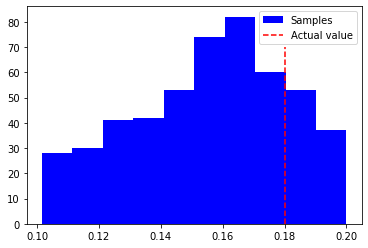

In [11]:
plt.hist(np.array(samples_hamiltonian)[:,0], color="blue", label="Samples")
plt.vlines(x=0.18, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

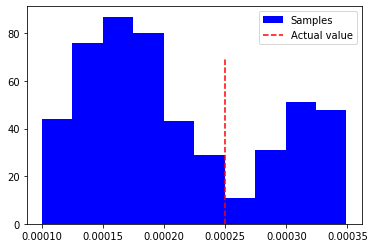

In [12]:
plt.hist(np.array(samples_hamiltonian)[:,1], color="blue", label="Samples")
plt.vlines(x=0.00025, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

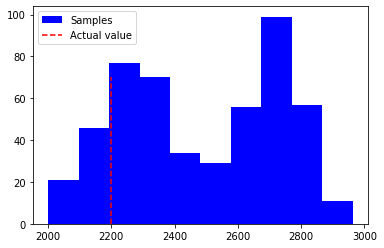

In [13]:
plt.hist(np.array(samples_hamiltonian)[:,2], color="blue", label="Samples")
plt.vlines(x=2200, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

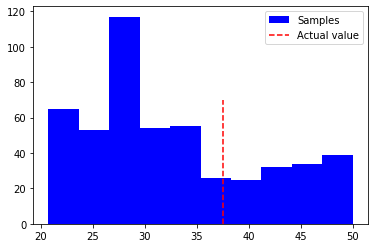

In [14]:
plt.hist(np.array(samples_hamiltonian)[:,3], color="blue", label="Samples")
plt.vlines(x=37.5, linestyles='dashed', ymin=0, ymax=70, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# KDE + KL-divergence

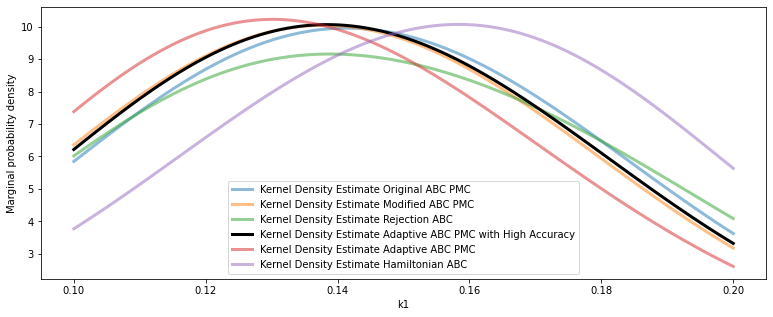

In [85]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(0.1, 0.2, 100)

# ([0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50])

band_width = 0.03
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(13, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 0], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 0], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_abc)[:, 0], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_pmc)[:, 0], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_high_acc)[:, 0], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 0], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k1")
plt.ylabel("Marginal probability density")
plt.savefig(my_path + './kde_k1.pdf')

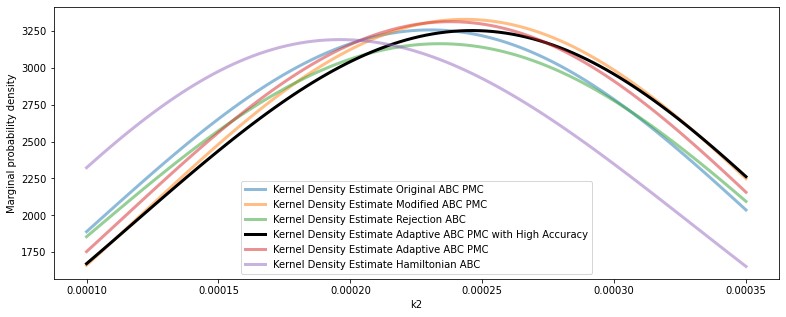

In [84]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(0.0001, 0.00035, 100)

# ([0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50])

band_width = 1e-4
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(13, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 1], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 1], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_abc)[:, 1], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_high_acc)[:, 1], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_pmc)[:, 1], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 1], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k2")
plt.ylabel("Marginal probability density")
plt.savefig(my_path + './kde_k2.pdf')

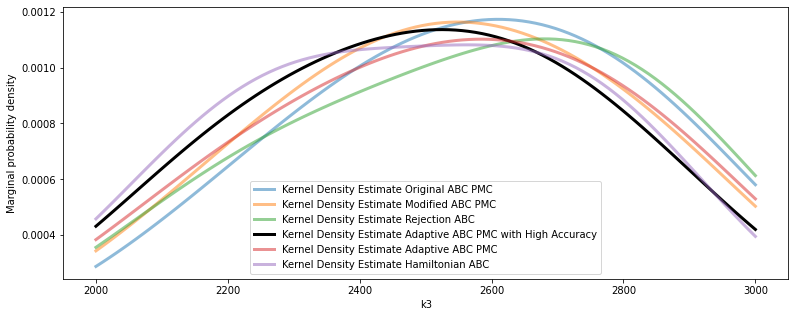

In [83]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(2000, 3000, 100)

# ([0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50])

band_width = 200
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(13, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 2], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 2], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_abc)[:, 2], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_high_acc)[:, 2], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_pmc)[:, 2], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 2], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k3")
plt.ylabel("Marginal probability density")

plt.savefig(my_path + './kde_k3.pdf')

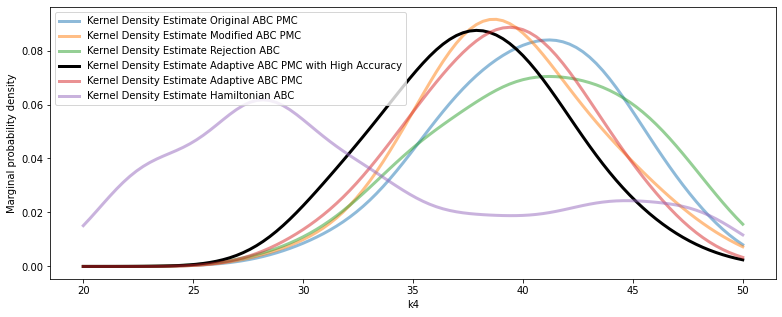

In [82]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

x_grid = np.linspace(20, 50, 100)

# ([0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50])

band_width = 2
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(13, 5))

ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_orig)[1000:, 3], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Original ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_pmc_mod)[200:700, 3], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Modified ABC PMC', linewidth=3, alpha=0.5)    
ax.plot(x_grid, kde_sklearn(np.array(samples_abc)[:, 3], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Rejection ABC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_high_acc)[:, 3], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC with High Accuracy', linewidth=3, alpha=1, color='black')
ax.plot(x_grid, kde_sklearn(np.array(samples_adaptive_pmc)[:, 3], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Adaptive ABC PMC', linewidth=3, alpha=0.5)
ax.plot(x_grid, kde_sklearn(np.array(samples_hamiltonian)[:, 3], x_grid, bandwidth=band_width),
            label='Kernel Density Estimate Hamiltonian ABC', linewidth=3, alpha=0.5)
ax.legend()
plt.xlabel("k4")
plt.ylabel("Marginal probability density")


plt.savefig(my_path + './kde_k4.pdf')

In [81]:
from scipy import integrate

bw_x = 0.03
bw_y = 1e-4
bw_z = 200
bw_w = 2

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def kl_func_x(y, kde_skl):
    part = kde_sklearn(np.array(samples_adaptive_high_acc)[:, 0], np.array([y]), bandwidth=bw_x)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if part == 0:
        return 0
    elif s_part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

def kl_div_x(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_x(y, kde_skl)
    return integrate.quad(fun, 0.1, 0.2)

def kl_func_y(y, kde_skl):
    part = kde_sklearn(np.array(samples_adaptive_high_acc)[:, 1], np.array([y]), bandwidth=bw_y)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if s_part == 0 or part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

def kl_div_y(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_y(y, kde_skl)
    return integrate.quad(fun, 0.0001, 0.00035)

# ([0.1, 0.0001, 2000, 20], [0.2, 0.00035, 3000, 50])

def kl_func_z(y, kde_skl):
    part = kde_sklearn(np.array(samples_adaptive_high_acc)[:, 2], np.array([y]), bandwidth=bw_z)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if s_part == 0 or part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

def kl_div_z(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_z(y, kde_skl)
    return integrate.quad(fun, 2000, 3000)

def kl_func_w(y, kde_skl):
    part = kde_sklearn(np.array(samples_adaptive_high_acc)[:, 3], np.array([y]), bandwidth=bw_w)
    s_part = np.exp(kde_skl.score_samples([[y]]))
    if s_part == 0 or part == 0:
        return -np.inf
    else:
        saved = part * np.log(part / s_part)
        return saved

def kl_div_w(x, bandwidth, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    fun = lambda y : kl_func_w(y, kde_skl)
    return integrate.quad(fun, 20, 50)


def all_kl(samples):
    kl_x = kl_div_x(np.array(samples)[:, 0], bw_x)[0]
    kl_y = kl_div_y(np.array(samples)[:, 1], bw_y)[0]
    kl_z = kl_div_z(np.array(samples)[:, 2], bw_z)[0]
    kl_w = kl_div_w(np.array(samples)[:, 3], bw_w)[0]
    return kl_x + kl_y + kl_z + kl_w


saved_abc_rej = all_kl(samples_abc)
saved_fake_pmc = all_kl(samples_pmc_mod[200:])
saved_orig_pmc = all_kl(samples_pmc_orig[1000:])
saved_adaptive = all_kl(samples_adaptive_pmc)
saved_hamiltonian = all_kl(samples_hamiltonian)

print("ABC REJ KL = " + str(saved_abc_rej))
print("MOD PMC KL = " + str(saved_fake_pmc))
print("ORIG PMC KL = " + str(saved_orig_pmc))
print("ADAPTIVE KL = " + str(saved_adaptive))
print("HAMILTONIAN KL = " + str(saved_hamiltonian))

ABC REJ KL = 0.234828174451784
MOD PMC KL = 0.04640294695895915
ORIG PMC KL = 0.1526140262227938
ADAPTIVE KL = 0.026444795054648522
HAMILTONIAN KL = 0.831691603777489


# Save data

In [35]:
print(samples_abc.tolist())

[[0.10227488458594002, 0.00019791822334108982, 2447.0278941085444, 31.92524353048157], [0.13971725922985215, 0.00016796794918496081, 2410.2098429726516, 37.90668961344596], [0.15627293620627955, 0.0002952764518115523, 2507.8652836222855, 39.35718112115606], [0.11279347665636913, 0.00014325973238596147, 2193.4468229857607, 35.8716761438517], [0.12047411719659917, 0.00015317304026980883, 2149.650024293467, 35.82910732655475], [0.13449952346529215, 0.0002827534872379418, 2786.996637383584, 40.683817559711414], [0.11340373033762297, 0.00024912464649829813, 2244.153666248094, 38.284549890288886], [0.17937597157637403, 0.00018714218980520037, 2709.2018220135933, 45.481643107552614], [0.17359668419420804, 0.00017044484626574683, 2880.780141320501, 44.36974584756637], [0.16013569033057054, 0.0002855876679333337, 2433.0117435841453, 38.299869284102186], [0.14539052451651527, 0.0002810961983771839, 2991.0985234619775, 47.16990101944606], [0.12326065815962789, 0.00011291512623378014, 2426.6642859

In [30]:
samples_abc = [[0.10227488458594002, 0.00019791822334108982, 2447.0278941085444, 31.92524353048157], [0.13971725922985215, 0.00016796794918496081, 2410.2098429726516, 37.90668961344596], [0.15627293620627955, 0.0002952764518115523, 2507.8652836222855, 39.35718112115606], [0.11279347665636913, 0.00014325973238596147, 2193.4468229857607, 35.8716761438517], [0.12047411719659917, 0.00015317304026980883, 2149.650024293467, 35.82910732655475], [0.13449952346529215, 0.0002827534872379418, 2786.996637383584, 40.683817559711414], [0.11340373033762297, 0.00024912464649829813, 2244.153666248094, 38.284549890288886], [0.17937597157637403, 0.00018714218980520037, 2709.2018220135933, 45.481643107552614], [0.17359668419420804, 0.00017044484626574683, 2880.780141320501, 44.36974584756637], [0.16013569033057054, 0.0002855876679333337, 2433.0117435841453, 38.299869284102186], [0.14539052451651527, 0.0002810961983771839, 2991.0985234619775, 47.16990101944606], [0.12326065815962789, 0.00011291512623378014, 2426.6642859364943, 38.93061465081301], [0.1202700342518438, 0.0001230332208710435, 2778.901610666283, 43.6346434794801], [0.1335263609199358, 0.0002393132994678873, 2719.6759797327486, 39.428575401932626], [0.1341713812114843, 0.0001050747267440483, 2543.8041666278054, 38.90100876705674], [0.10033161081633957, 0.00017030825687409007, 2708.0221257956528, 37.04599790341975], [0.11116931112275048, 0.00015783971403697007, 2748.540821821437, 39.235146374566526], [0.1027741069459501, 0.00021283234415236073, 2072.2070792009763, 27.456657467631732], [0.11780374672723795, 0.0003261755391839797, 2173.48859036089, 29.26838894226885], [0.16443444249221817, 0.00020175508112412182, 2510.0437591521654, 43.522088109638744], [0.1086461004549076, 0.0003288519576186913, 2914.71816455063, 40.88704817498018], [0.10756620306752057, 0.00017037257008523614, 2252.157206267545, 37.54225679146574], [0.16619177492765258, 0.00028380156878629484, 2820.769408370764, 41.98017844028344], [0.14902225220834844, 0.000152150346981849, 2502.2075514538496, 38.09116462839226], [0.1743917882837152, 0.00024855626590355973, 2181.154008160941, 37.839466584763215], [0.1268780182801088, 0.00024419384880894416, 2390.4727675411154, 38.4027831336758], [0.1384903133928366, 0.0001657484026391123, 2882.821801697503, 47.77010302962832], [0.1635818500067427, 0.00013928830455449254, 2398.001985075521, 39.74056113027532], [0.10316599594196124, 0.0002312020058407449, 2060.570697174777, 27.909241514390338], [0.161342599584254, 0.000256009008122316, 2717.3991559967726, 43.54141648740786], [0.16928302226162573, 0.00021148946076386715, 2637.9188275665024, 46.38794051805408], [0.14540161507830637, 0.00016030723999572877, 2717.8805359116514, 40.89406444923147], [0.16257165244706565, 0.00027863184981903567, 2645.4576595056524, 47.11539165642907], [0.15341220545666076, 0.0001601297124340589, 2098.1938017508987, 36.452219191719266], [0.1818245538097718, 0.0002056848519967722, 2706.3325703423707, 43.69350801510113], [0.10812458634489819, 0.00014647806571308473, 2090.6128586770583, 33.59039063430764], [0.1576563607984276, 0.00018854210828272918, 2172.5077197255764, 38.55113792307755], [0.1699479840333329, 0.00021423806136437165, 2729.8308619807, 44.54813655457763], [0.10406268129665797, 0.00028976482800751116, 2313.9697352597254, 31.5872262875353], [0.10799446423820382, 0.00020079654990594982, 2742.3561576317143, 39.080300433389084], [0.18532734500216436, 0.0003297701881930049, 2494.6249385235255, 42.377431421404594], [0.1338382576832931, 0.0002906132035591376, 2808.482180023904, 43.07747815841789], [0.14578117440537533, 0.00014965031713300294, 2189.4800708621415, 38.31454129278758], [0.14969858697497576, 0.000245288471026452, 2929.9873299952815, 44.83810184809238], [0.11533757970684616, 0.0002824849989548559, 2875.7862480534022, 39.39947717289894], [0.19103194842999427, 0.00010909161802045833, 2998.8322504622506, 48.30214319308971], [0.14206458415660678, 0.00027546676675855545, 2667.43950598325, 42.348544677959886], [0.14096425965017803, 0.00023629840952985487, 2500.256121745421, 42.26216958906558], [0.16128011275484627, 0.00019675205128938874, 2071.514580459766, 34.99588347893773], [0.1169200317507233, 0.00031399670919498733, 2639.150925086139, 41.1919290992964], [0.15379832544335456, 0.0003120169612365005, 2976.9878491346863, 46.39795604133771], [0.14518309937395008, 0.00010354999820433905, 2460.4384198109656, 40.482998319416666], [0.10316554309850463, 0.0002038219608272154, 2113.9142941967198, 30.180026570455013], [0.1690730343022002, 0.0003476037642352024, 2861.2481056224638, 45.84942845163809], [0.12974217809815425, 0.0003205059691247226, 2888.213217897401, 44.114058034103266], [0.18614627065275255, 0.00023342393533096835, 2521.6408308458836, 40.21752456304124], [0.1075752340157053, 0.0003420388046990609, 2894.0691112939776, 44.04965176982593], [0.10393965391398041, 0.00020089644820376246, 2268.182481410374, 33.66528140318218], [0.1259615218194165, 0.0003091125246486596, 2841.5110596328423, 41.838103791757376], [0.12974560441020122, 0.00019339401952282433, 2838.61621452581, 45.680373355762256], [0.13028579563772952, 0.00028919050830114666, 2635.4885838112186, 41.14501277228534], [0.15099325181597167, 0.0002456940144573487, 2385.8688387435986, 39.19031297953194], [0.14076169466381705, 0.00016790331006361439, 2699.0298067888616, 42.86118675056835], [0.14216585168786458, 0.00011588881811107007, 2694.4785516382817, 46.26991308918862], [0.17076074958092557, 0.00032303072305611816, 2693.4112576089447, 40.77728312275795], [0.17387028426003953, 0.00025127586006619065, 2033.674714450901, 39.860823886354225], [0.15886398089644432, 0.00032888298047873364, 2323.696489241231, 39.636430861245024], [0.1529407066842186, 0.0001944929084465208, 2579.0950207998367, 42.064861093337086], [0.1300072553569836, 0.00011741135602170771, 2849.5071515074123, 45.44916124555807], [0.10093616772578907, 0.00017374078091850683, 2775.7924778736115, 38.985977656381095], [0.10593952750418506, 0.00032314245142112005, 2971.2622485923507, 40.171816890441505], [0.13871173563001232, 0.0003336541041907241, 2014.966316642602, 29.92971848643376], [0.1196732802980717, 0.00019498655077701126, 2917.276761764774, 39.98620929946878], [0.10322416032739969, 0.0003133476667772966, 2023.222107688353, 34.38577121568214], [0.13557302243649005, 0.00017659059058709124, 2661.000673897884, 39.70415292705286], [0.15170685049590904, 0.00015022464662605423, 2813.299011382289, 47.09828333435691], [0.12145172057080393, 0.00013574420969267507, 2808.7617418839677, 42.23874022381208], [0.11699323028347743, 0.00011550117834997653, 2604.7868928526314, 42.53452174767949], [0.1912759903865654, 0.0002614888047880978, 2870.1804103144723, 47.12328793432442], [0.17552626760134635, 0.0002818214453965991, 2690.752416579004, 49.234514871879874], [0.11270281017955949, 0.00031052488849698856, 2800.1829482188114, 38.35860006017026], [0.19902451750465852, 0.0001432528297607548, 2807.717876814352, 47.76642857191725], [0.1880549350549483, 0.000312687067829788, 2250.7079081416296, 41.23820190299335], [0.10661892575874315, 0.0002679368637516302, 2970.033526377556, 43.63850696377655], [0.14602999769483443, 0.0003253108094740414, 2889.2421304699783, 47.418706869615086], [0.10511976587061789, 0.0001567311239002914, 2411.0192523271303, 39.279628217337745], [0.18254449255011734, 0.00028355248095170247, 2969.08026052247, 44.71466192577272], [0.12354245566527428, 0.0003254289961509685, 2436.1497364507795, 38.88522399459754], [0.12602893399226436, 0.00019199814610436762, 2384.309508115158, 41.465874813517615], [0.12429929082532719, 0.00027830453152207825, 2278.795797396322, 38.25495365226652], [0.11156626135103392, 0.00029377924779640805, 2057.8977058702176, 31.09787654316495], [0.10955309264205756, 0.00025889052201813527, 2166.895779482089, 33.65527955370944], [0.11781115771409811, 0.0003414564562504902, 2888.888736172929, 37.298237565964286], [0.1450965535607955, 0.00033715934071855235, 2650.3053695221847, 36.45936819729183], [0.10528505601027079, 0.00023742819278153236, 2461.5952981649257, 37.52991040884208], [0.12370586829854817, 0.0002908269612059853, 2755.651269001471, 44.077939743940895], [0.1136768188681026, 0.0003463191265020525, 2506.6234133969006, 35.119714444858545], [0.1469724952156091, 0.00010487534769162934, 2667.2796197067405, 44.962855634480825], [0.18375042929101587, 0.0003386018498202661, 2482.996398864205, 42.189591781382646], [0.13707847347197685, 0.00011082238357897433, 2573.6870944246916, 42.06523848864218], [0.14550806653153367, 0.0002108540084070568, 2858.758021987119, 46.519289326548225], [0.13371472620137537, 0.0001322799082583549, 2750.2541202648836, 44.27906501202409], [0.14727949606688828, 0.0002824928607114103, 2326.678497797465, 38.67303082627616], [0.12019239874132287, 0.000249468248103933, 2691.766241231716, 41.05286086438048], [0.12083926990206664, 0.00021811395042054302, 2315.0861271768504, 34.23445663490986], [0.1491591936831891, 0.00028382021921567854, 2024.3427138513066, 35.2570548622363], [0.1316132253016526, 0.0001926515366075186, 2653.369894904014, 41.46466631472242], [0.1218617941469361, 0.0001453213576126773, 2201.529698227024, 39.47763348664296], [0.12711810190777528, 0.00014958726660711287, 2211.237014482468, 34.67109563514592], [0.12596876071718993, 0.00030411337722531306, 2072.4603262572155, 30.661793032214046], [0.1748747364455385, 0.00021114613207882138, 2608.219576945923, 47.90561925493783], [0.19442953324866413, 0.0002954494887954143, 2351.714221120763, 43.66182564974564], [0.12026129935955521, 0.0003333968450450129, 2165.2948733397834, 36.09942235387371], [0.15395260309055198, 0.0002273333667820852, 2889.771566973427, 44.5371943174198], [0.13842782222792385, 0.0003195044934635401, 2723.9134032851807, 37.58323374564959], [0.16090677171899115, 0.00032065442506085514, 2213.1197641637364, 35.20915736223704], [0.15894549831298802, 0.00015671861017264505, 2361.1350185133815, 36.791443976685265], [0.17865751695593407, 0.00024212656962985214, 2344.6330043079583, 45.00352330960584], [0.10612214981846499, 0.0002731495081690929, 2160.3389110471267, 29.501203563332474], [0.18797179047672274, 0.0002268077629846205, 2402.7914854805745, 42.83950464986377], [0.15339889789819922, 0.00021520210175428922, 2598.218661306656, 40.974682415623924], [0.19788458714424845, 0.0002942400080122187, 2424.8247166946117, 45.327929574198656], [0.11091582638784338, 0.0002891597005992956, 2549.6883604364994, 42.81574918791469], [0.1652716676884759, 0.00019434217349530034, 2876.1413983558627, 48.79164605431886], [0.12947849091985175, 0.00030879809852559685, 2668.0771462143334, 40.79743748756167], [0.11037594506140797, 0.00023386405189204494, 2717.458848079652, 39.29343864615288], [0.10803332473534666, 0.0002640915884495746, 2296.9771969375565, 34.283597519611604], [0.17966734117025548, 0.0003310835414837165, 2740.7101262492715, 43.3673605506838], [0.15130688660894454, 0.00018108086051225075, 2049.9234502065588, 34.91434600547058], [0.17909790549608312, 0.00011369666793363131, 2761.940592744672, 46.48132520916566], [0.1824362166180914, 0.00030004835129264485, 2808.156396138203, 48.57844989295235], [0.13033067653285815, 0.00032473953542984325, 2613.7865784247615, 39.49857917373138], [0.1661416234464486, 0.0002328432818025702, 2843.8096634289936, 45.3978565797481], [0.17730269420544695, 0.0002801707276735932, 2847.4674750109048, 42.81468409774925], [0.13026556597650196, 0.0003193139760627987, 2251.60551704592, 31.978582513742396], [0.1451185511129326, 0.0002795013889075961, 2783.519993077447, 44.94256928162346], [0.14233619654367857, 0.0002987037972398974, 2381.9052302970435, 39.60877160123053], [0.10081596944209714, 0.00034854140513671623, 2347.9438769215208, 28.19324774931571], [0.1546424490302155, 0.00027696703647345656, 2179.4052569214605, 39.92291079094803], [0.17575416779737515, 0.00022698029938961499, 2760.9801780389917, 45.11869026317838], [0.15137742676677646, 0.0003328766116323177, 2684.451427834346, 37.71104739388254], [0.10057256354005484, 0.00029044282503062376, 2723.848921347388, 38.07839641698493], [0.18106091328967083, 0.00015551256745108694, 2264.3323331322035, 41.89619176120885], [0.17792480100584054, 0.0002821228728468169, 2123.0245008957204, 37.63745231819437], [0.10251157067145683, 0.00011597401709853363, 2815.01041691778, 38.912898401459614], [0.1288976390074737, 0.0002547455929358909, 2348.5425386738775, 36.22041241456418], [0.11109185037013278, 0.0002111596790059244, 2269.1396520080934, 32.355751189309345], [0.1280610406728318, 0.00022446387271322227, 2353.448835712836, 36.066257932802095], [0.11416861076754914, 0.00034316100991360664, 2482.466119130271, 33.48843223693096], [0.14880171598611378, 0.00034583612525089817, 2740.396012703257, 37.033090366964096], [0.1145261559232933, 0.00010240202428445184, 2958.4524727829885, 44.15055359364673], [0.11075502575310571, 0.00033990474046547326, 2910.7339721733424, 37.95964936035912], [0.13980558153767528, 0.0003309684713884469, 2699.3516980138807, 36.36186538102565], [0.1864409292829454, 0.00012066273970033747, 2425.73005324449, 42.873668798481575], [0.18845911063697643, 0.0002945987367580797, 2372.025798355233, 42.246736432359356], [0.1325647086778053, 0.0003320012535825218, 2375.6116278481204, 35.542755600203265], [0.14469865960308376, 0.00010464173551665034, 2081.3855079325003, 36.91661458213348], [0.10545906124886151, 0.0002107983863216158, 2534.480805927773, 37.075155217877274], [0.18340731846385233, 0.00028170456581422606, 2047.2295152817067, 36.468887190051916], [0.1509333391119264, 0.00020374461875863188, 2188.7978481193845, 35.45166400872296], [0.13585522712987289, 0.00018638474735774947, 2950.6980458861217, 41.752362310725516], [0.11422696823808465, 0.00029524781071988283, 2540.9187692110595, 39.036178580414756], [0.14509207221317516, 0.0003234522313103124, 2193.8195548710055, 34.88358695073807], [0.12879519863210812, 0.00032606964205370107, 2606.201359237732, 42.99510743962733], [0.11501398957451892, 0.00022636219078267598, 2545.538204960509, 36.88985439565162], [0.15601518528490743, 0.00012057670533749398, 2591.9842131301493, 40.96685477647193], [0.15033513026122036, 0.00019582531882987226, 2596.145307430005, 41.06828520910712], [0.11988887061784514, 0.00012011153304910987, 2057.2874502062173, 31.780864073742062], [0.11957380577206365, 0.00015186013580636095, 2569.0032938019394, 39.00818948571761], [0.19721939077170628, 0.00031469228490833574, 2168.7360021058553, 37.049549939729886], [0.16503975710986668, 0.00032935171298106164, 2095.8499680718464, 34.4556884412557], [0.17069730068598643, 0.00026738152341818517, 2728.5378782025346, 46.80332081386541], [0.16599296003786093, 0.00034423145935536247, 2770.1159923369387, 45.63370747620111], [0.1592488528042273, 0.00011649556684901243, 2841.8111890182854, 49.03843662786839], [0.10492270815333948, 0.00026566880209313946, 2958.441663983829, 44.20100830538511], [0.16804731721381447, 0.00017990411790762083, 2696.515859806588, 42.33759774916173], [0.11852968336241035, 0.00010969459810393264, 2252.644065529025, 35.436203210007335], [0.16625457769032437, 0.0001087093292213962, 2723.6689578742357, 45.686997395139336], [0.15054523173977624, 0.0002969764462182249, 2001.074621706192, 37.77874027232435], [0.19822265322866595, 0.0003388257942489596, 2903.1290711663273, 48.41878743232802], [0.12082443754745188, 0.00018752956377551512, 2853.897784926393, 42.633172230522135], [0.1493294328150316, 0.00024725928075622995, 2936.9516404173123, 43.68742823584378], [0.1805430910227978, 0.00014811007172152292, 2839.8930702925027, 46.22649518486949], [0.14071205012089794, 0.0003210433804913017, 2381.589282657752, 35.793148323041194], [0.19146696054140416, 0.00014362706311414026, 2331.8795749020214, 43.6593447713598], [0.1463041113398323, 0.00027129192902879145, 2289.8097452126467, 36.04179017366714], [0.19356978868373986, 0.0002031108795497333, 2752.5504080830033, 48.42049504369477], [0.12628512786607893, 0.00024697273806728766, 2868.4430167591236, 43.76561723254679], [0.19808793693409255, 0.0002263480407735219, 2838.6283676424273, 49.87266906332442], [0.137265334036995, 0.00023814334839215455, 2693.3459912048725, 45.177530388650595], [0.116181414157319, 0.00018620437362699315, 2527.5054121927606, 33.26558556688093], [0.17004242188254187, 0.0002727957811021534, 2879.5521311271987, 49.23110890081786], [0.11403873654885338, 0.00021102090070657676, 2836.940053751807, 39.87515675497136], [0.16111362869066925, 0.00023282298261343033, 2799.916861614415, 47.075048773125886], [0.18097801748296427, 0.00017935628468010345, 2671.560854671899, 44.92664030567619], [0.11945230450899795, 0.0003446801112775663, 2447.666152950365, 39.174110570803585], [0.1829458304422517, 0.00019338493391526213, 2815.952211930995, 46.56254620071208], [0.1672290558110558, 0.00026875793377001173, 2698.9969571673346, 42.52641303408534], [0.17044766375294734, 0.00022827993117311443, 2833.186893579424, 45.25792842240965], [0.17116834469473918, 0.0001682744875728849, 2692.8002100984168, 45.67853151321833], [0.19727462694894918, 0.00020093909906934723, 2867.361866469266, 45.871900549358415], [0.11568266087631196, 0.00032908083716300086, 2887.3274303359876, 39.43988442711483], [0.19082333550822328, 0.00018424938561504631, 2829.7812754630468, 48.84073270049272], [0.1660369590497376, 0.000205776563606633, 2863.3720567568957, 47.52037744904135], [0.184049066643623, 0.0002752253698492153, 2176.0918653929784, 40.01328212956446], [0.12029534469145328, 0.000258503173701168, 2423.3946972238396, 32.88278872462169], [0.12056602983448106, 0.0001048952356837406, 2980.970145114938, 45.62396225411814], [0.11036179380001622, 0.0001830372768982561, 2482.490881587681, 38.01853429331523], [0.18201004945211646, 0.00016026333578253042, 2478.1085285521544, 45.17422504053827], [0.1740365391495466, 0.0001637903955102144, 2339.336082213877, 42.01090316286393], [0.1737919000764881, 0.00014759201100714167, 2817.7600228521524, 44.44762147001275], [0.16899214509409272, 0.0003154282358696608, 2272.4560361035733, 38.03939029955346], [0.19959125921907822, 0.0002486931948610878, 2279.624085913754, 43.13315539744481], [0.18258705803546993, 0.0001528270421872394, 2179.0755659598967, 41.4182820927722], [0.12278173616124256, 0.00026978417009714667, 2850.8602031944615, 43.52334857967338], [0.12952558597181882, 0.00026068022414572136, 2619.008285413739, 43.78179064465147], [0.12924778179256183, 0.0002871556555223655, 2782.735005591094, 38.545711100689516], [0.16418501781946804, 0.00023299254614741262, 2177.139214407437, 34.3495557847557], [0.18469585164552352, 0.0002008903935418663, 2840.2075021250507, 47.97376364938431], [0.17502003852597953, 0.00020953671832014042, 2903.161544906592, 48.419320036056305], [0.1311091374333797, 0.0001408061029034644, 2190.527259930125, 36.25645397540311], [0.14039220110139983, 0.000320396089423771, 2998.453398787701, 43.52322515596873], [0.13647648181319, 0.0001383918118921752, 2267.6382207421902, 33.60284690901403], [0.1219496094637068, 0.00024653155342156457, 2304.5768624930984, 31.748586726494317], [0.1083169265611485, 0.00023413874792648474, 2414.7069990205564, 33.339228601023024], [0.11142897988355384, 0.00017171851497013935, 2939.0054917708544, 45.092228686088035], [0.12004885150816175, 0.00020937020389535894, 2769.2230594812618, 43.25642261284405], [0.146741226132526, 0.0001992162633629319, 2443.1868525254035, 39.93370038260869], [0.15515183704685054, 0.00014229649221393536, 2031.6215315980476, 36.57479134039268], [0.18629965090443787, 0.00011379378357482026, 2883.4905157738945, 48.68657662134066], [0.1802613550215463, 0.00023533847240931157, 2457.2936261505133, 42.154476568500215], [0.14579186829209922, 0.0003469219045927714, 2836.1949063824304, 35.84740498273252], [0.10434397537647915, 0.00015542151553237993, 2538.5522645539077, 31.86702313849526], [0.1753563798150082, 0.00018585917293893593, 2881.36258369665, 49.7711839395463], [0.10832801757111508, 0.00010767935711259771, 2950.8672820706815, 43.81623227355686], [0.17495828849077905, 0.00019949961444325898, 2423.2968183189905, 42.367633835325165], [0.11043887883537734, 0.00013663384182896758, 2826.4888473966053, 45.41952045528508], [0.11217400211591867, 0.00017658880676006515, 2696.9476338163586, 38.40079150486008], [0.1645067689524546, 0.0002517007848470469, 2188.1328165288583, 39.01305132873965], [0.10959412939893975, 0.00028753287755484136, 2508.3405377833597, 41.710858051518926], [0.14010587042639505, 0.00030599407945264783, 2830.6768271326273, 47.20885485606643], [0.16057257205896952, 0.00022449745259648437, 2905.8587275860655, 43.48257175079411], [0.1335415424008555, 0.00022857416814730494, 2726.2868544722387, 35.550735373599146], [0.12164607000811728, 0.00029492199079761996, 2823.827813327268, 48.104478383413564], [0.19244155135392596, 0.00019818711776447683, 2409.981948411287, 42.991370156789685], [0.16838669209123486, 0.0002672294654554242, 2912.9618003617875, 49.974661857398786], [0.11116374436861243, 0.00010123282969924008, 2092.727872790449, 37.124375380254065], [0.11945062105777149, 0.0002870129726923, 2962.01031002073, 38.414407846652495], [0.19642749744090865, 0.00025275242666058026, 2284.2415188736004, 41.76813337619961], [0.18961281629460636, 0.00023121352713697618, 2442.5575633785315, 46.08669346436049], [0.16725994804651095, 0.00018129383113884483, 2200.242740699142, 39.48193078657627], [0.11363427868195208, 0.0003132007017090681, 2625.9195026986345, 38.86700824829313], [0.1209742130153794, 0.00011496303767956096, 2427.419251617066, 39.52072503944329], [0.18401523928962243, 0.0003354227448662392, 2765.1194942408592, 44.325084537825575], [0.11656280445198583, 0.00023230560563400365, 2228.7863888220463, 35.18340848075253], [0.16358122621621518, 0.0003407700739161331, 2129.6195354039464, 34.16414060924777], [0.17094693281908727, 0.00026677132788080374, 2109.2323244312406, 38.96967717089585], [0.10432743960348106, 0.000314736310927656, 2901.263187750158, 41.59741998924471], [0.1670929482482363, 0.0001407565324525918, 2734.083775052861, 42.99766506081757], [0.1702364146625983, 0.00028582142034433336, 2233.5434228878016, 39.79558988884122], [0.17256077710970125, 0.00027851958934431133, 2821.2114704316614, 43.460770779128424], [0.14109811296346664, 0.0002702668517564351, 2497.0230280670303, 43.68949046401461], [0.1496454479778755, 0.0001992913821453653, 2526.7081881074305, 43.30919942619117], [0.10593281347897458, 0.00034276326096888604, 2527.291061512768, 39.83888315155703], [0.11647979172199113, 0.00017516366187119779, 2945.332899221223, 41.985291080543064], [0.11241337264155155, 0.00012654352010123244, 2716.038504544709, 36.066180596899414], [0.16435446289471256, 0.0003396884356489462, 2318.8828106118935, 39.21723237348942], [0.17453318336612764, 0.0001412839992009481, 2708.4460711125053, 41.9888748135931], [0.12445298548667422, 0.00020036034780734755, 2995.0941039128597, 41.80906724071484], [0.18982957777933648, 0.00033277886988025896, 2409.9715380622274, 40.64898726245547], [0.14374806366835247, 0.00021225237621992122, 2609.1303688649373, 38.40514394874831], [0.1335285521989472, 0.00014973974766858055, 2368.551098038248, 41.93073840652151], [0.18441571759159026, 0.00020866068976590178, 2139.4003103186733, 37.710649146370905], [0.10098098420375283, 0.00010718461411205451, 2452.563611031161, 33.21965211078637], [0.12521549519249747, 0.00034633054984155255, 2535.9167019970546, 32.23221502122725], [0.1153374050458661, 0.00010749793538351299, 2210.9756870948095, 33.814752297974366], [0.1282097394473356, 0.00028846243007777284, 2999.8162527033974, 42.95086922944242], [0.13529783695257372, 0.0002090573410615053, 2256.91326162101, 35.65566306398274], [0.15424977261777628, 0.0001755425484481949, 2722.3668124838473, 43.45460755172188], [0.1438402291668867, 0.00025366788437174793, 2253.998809350651, 33.0206627672954], [0.1851108122295682, 0.0002171061617690078, 2461.6182562186727, 40.35578349267907], [0.1487612151713789, 0.0002078271124134355, 2511.608354015122, 37.48512339654954], [0.12026116834520971, 0.00023200735770419114, 2695.745804307855, 34.71458707554724], [0.1744210335373519, 0.0002703611638037016, 2354.0069374241225, 43.73809607511526], [0.17647529104590293, 0.0003493051783664613, 2194.801917455705, 41.20177965600366], [0.19832121032545694, 0.0002973787548602626, 2859.903598790871, 45.69705763354243], [0.10766052079106503, 0.00029202342300708306, 2743.7078627943592, 41.16298528188911], [0.19993182977071203, 0.0003079336475828792, 2563.854728649356, 42.837121446622334], [0.1016928283557875, 0.00033470568560938413, 2905.0547691881598, 44.49274342426169], [0.1669580801782269, 0.00016708710661199566, 2681.8870503049434, 47.3852931360653], [0.19705479549212274, 0.00010439326512368421, 2328.2295184659615, 45.170389795279334], [0.10102276012872963, 0.0001320099494595792, 2817.0489343256304, 36.818469300782006], [0.19849976323541443, 0.0003103158315543336, 2160.8623705864948, 37.7426129292332], [0.18817961014282164, 0.00026194564968606956, 2325.9158688591547, 41.44156944314005], [0.11910114496428362, 0.0003301363608410108, 2352.3603147629447, 33.87201702368013], [0.16955882197817546, 0.00017239233293006166, 2316.4426508962842, 41.2212224179196], [0.10406008531352423, 0.00022790386847789572, 2224.815723885824, 30.442371159730445], [0.16071827745504116, 0.00018721568072695773, 2494.21487454051, 42.692490736039176], [0.11380418854158711, 0.00011918591084803956, 2506.9595943394042, 35.22827250756443], [0.1322554968092206, 0.00013365321658851016, 2487.221452938647, 42.22358442980408], [0.12542775318446042, 0.00020590713514079113, 2751.625499123006, 40.807906048003616], [0.15334931080698347, 0.00014186843156995958, 2736.9983055071993, 42.794516203429694], [0.14489599707033538, 0.00020278106770407878, 2679.8901083359774, 39.73717671319511], [0.1457487795750911, 0.00019087324315957645, 2133.4848117301985, 33.61101390644956], [0.1955303924066173, 0.00024727503023978163, 2693.181753902157, 43.53238081862086], [0.12612642666331791, 0.00017459933493409007, 2511.7407312175606, 41.08050124177971], [0.13601623526671178, 0.00013841757640367116, 2088.0946094119877, 33.897257027438584], [0.19973615964356212, 0.00017241672085835014, 2448.191634279028, 46.85939668007727], [0.13607101817895872, 0.00026736134503816284, 2939.1368980375255, 46.15963119225555], [0.12008633139328895, 0.0002347143907528619, 2367.587890914832, 34.23294358894523], [0.11347433925058956, 0.00021765836512175962, 2357.3547737107256, 40.75362368265151], [0.12114590856268737, 0.0001182561631922123, 2657.5174374115204, 37.644007853202666], [0.15519991302741562, 0.00033085531176312407, 2842.7440825325, 39.26717489671688], [0.17890685784573723, 0.00023579298710197093, 2768.7957962529945, 45.71936296782393], [0.10841328029430491, 0.00029273196511759485, 2875.04033579158, 47.326641554931655], [0.17319800335201752, 0.0002991353906902173, 2626.2526173513393, 46.6299714536664], [0.18460228814832705, 0.00033930087964902973, 2512.35801842347, 41.76276256522492], [0.12145607346719314, 0.00033635586463726726, 2432.122773103608, 32.680663496574944], [0.1795571471826636, 0.00010154366494879718, 2968.105094948812, 49.438940968365415], [0.12356725982104277, 0.000253979281898612, 2817.9222488070977, 40.07606835149576], [0.1948806650922454, 0.0003181468109953774, 2624.902378618273, 42.81265334547373], [0.11656286239035035, 0.00013448092070988797, 2656.3574042069345, 36.612601263991216], [0.1622861848844408, 0.00024396074563714034, 2505.6256663150652, 39.59009380370154], [0.10575995223723389, 0.0002872987623563791, 2542.909306425299, 33.0512939895099], [0.10660253328582014, 0.00016072457776008056, 2299.5553383997176, 38.12893332202939], [0.14462222929870877, 0.00020547186939184442, 2887.3925571949676, 46.55399518715791], [0.17548078788163718, 0.00020643418366387992, 2822.9875493911204, 48.11698970331679], [0.14076532430703792, 0.00034443985547540296, 2967.7830212913227, 46.03137040737635], [0.1943788108830316, 0.0002723371707428405, 2327.263865508211, 43.69779187056322], [0.14494469027686535, 0.00026061304359608484, 2593.849458468736, 43.191920294151835], [0.18957940814963922, 0.0002853982950860601, 2386.6560380431138, 46.850430250952], [0.10079322990875533, 0.00030182572385713225, 2952.811109598281, 35.297741403961446], [0.17082385661658067, 0.0002202961303841061, 2505.57169788083, 48.134242000708795], [0.11587775593634914, 0.00019094609722158836, 2307.165480404279, 33.966307798698395], [0.1658657010535926, 0.0002483940162260948, 2792.568034946745, 44.302040206341445], [0.12675043139092063, 0.00011522923627102118, 2236.741778916612, 32.74867358709929], [0.1921392231108768, 0.00017873191715179977, 2601.4578101567613, 46.396058171749516], [0.13444346857111958, 0.00026697993900305227, 2773.12582348303, 42.3502304213002], [0.16819853068498453, 0.0003474571455668726, 2268.4406947886046, 35.56041294555534], [0.11613052442781095, 0.0003011142420977481, 2951.4181227116055, 46.002407290286406], [0.1801764344212356, 0.0001762749016326399, 2716.628597070037, 46.735813276665915], [0.11265024758213664, 0.00022117823589172812, 2572.766155350283, 33.6256493032122], [0.12012257652521008, 0.0003226723574290027, 2881.023161582222, 47.56217958006887], [0.17184541227740852, 0.0001528988907964759, 2666.106663220287, 46.89691377683535], [0.19607040207812734, 0.0002985142387272465, 2473.8210828546676, 45.15133146036156], [0.10207478545555147, 0.00026270848887919164, 2608.059596195666, 33.71928883099768], [0.11814062330028147, 0.0001550256667176574, 2682.7778875349013, 42.90418561809541], [0.13960755828483254, 0.00022745443853578454, 2430.6549299701815, 40.4946225631009], [0.12973935913704177, 0.0003058591143892083, 2113.7537111666015, 35.34149522824707], [0.1684458119444698, 0.0003015313447671582, 2968.180505481228, 44.85762584862614], [0.12405258762658783, 0.00026362880763460906, 2778.5932085116256, 39.80074908996744], [0.17688303031241506, 0.00010820630631246151, 2657.077861832505, 41.94113007985284], [0.16228640101329891, 0.00019994307156618045, 2707.3334299803096, 44.731899819300835], [0.10778805469104821, 0.00021277659131068238, 2976.7095882432523, 46.62914725499928], [0.1436201026482381, 0.0003311621886668422, 2281.5036734615937, 35.93691915481078], [0.14557395448003252, 0.00016390407695656588, 2470.7471640179256, 40.271919837805925], [0.13473608210676924, 0.00015263930979319559, 2650.3582971223113, 45.58322109846222], [0.13336094282133765, 0.0002921402601193975, 2030.8964900531803, 34.4451739808758], [0.1298328293078641, 0.00024330623462599332, 2750.5252982192237, 43.25670450227872], [0.1141513486759359, 0.00013854207547885297, 2164.2245147505473, 35.2878222208651], [0.16053437685470726, 0.00011468846073444994, 2452.4564610454563, 40.358766387188545], [0.1380299985533366, 0.00021921920330952627, 2467.9022902222605, 35.83754919662402], [0.12223503653053379, 0.00017790326345936777, 2599.599259724883, 39.10600142322203], [0.11131473427739862, 0.00031906383148444967, 2038.499856941788, 33.94271116191619], [0.1102255172459013, 0.0003359378344449654, 2744.452322266244, 39.43656642448842], [0.10656477488382177, 0.00022771873832383443, 2523.101654971584, 34.37550990373138], [0.1780815332937459, 0.00027664069594373546, 2061.330430438122, 38.16093538094553], [0.19336008982426292, 0.00025926196040682264, 2944.6701620285685, 49.78025488222289], [0.1274886056838105, 0.00030164186413583256, 2800.5211840398592, 43.29339140236058], [0.14565452735573736, 0.00015215377159013787, 2043.0918990934515, 35.32721903735654], [0.10175864850310366, 0.0003233214934890115, 2744.8576790318393, 35.815438828827695], [0.15224822571195884, 0.00024354561127556382, 2770.5098796585053, 41.60673142689606], [0.12286866251119266, 0.00015446918998980258, 2833.7169536689617, 48.554028357817785], [0.1447326088440818, 0.00032936901837385575, 2918.2340620060695, 43.04477516067281], [0.16100525515933892, 0.0001581919084558352, 2370.684271817178, 43.928467797720266], [0.1187919127742395, 0.00020820664172010702, 2865.305397891246, 46.08983022338238], [0.12395839151514099, 0.00017175409922196526, 2736.1224152179025, 46.07099537845771], [0.1890043224835027, 0.0003314511389967072, 2102.576169098452, 38.087943957901985], [0.13012256319099338, 0.00012284485916823137, 2120.573703744844, 30.65594997359446], [0.16496947979973436, 0.0002615594185678345, 2933.059524906617, 44.24923318554633], [0.15199495686484227, 0.00013387886843759466, 2802.0443176092217, 41.6791934972414], [0.13695309440801395, 0.00033961749583883154, 2523.1546301488597, 41.85518867882347], [0.14136586956072417, 0.0001576395737966445, 2522.2948423277708, 44.64421835131765], [0.179721416429454, 0.0003367651573624357, 2759.2031579849718, 43.141739368944506], [0.12114821226089992, 0.0001684166666889024, 2008.5213182305258, 32.065279170646185], [0.13145997369639906, 0.0002871295473423813, 2849.882220311287, 41.15162842481209], [0.13631379987386127, 0.00013038397822811353, 2853.0368140335213, 46.45875945778796], [0.1981816205239072, 0.00027874684271687617, 2159.374931274326, 42.52808458747241], [0.1821206917700134, 0.00033414173169371623, 2384.38782092583, 39.67975117994498], [0.16257597451975714, 0.00018938615594903878, 2459.029490380347, 37.21366076540107], [0.18396365335915757, 0.00022148582382748057, 2742.296299401484, 45.01691884548304], [0.15666216781141287, 0.00018588513737790945, 2522.7460350782912, 39.56686396325048], [0.11832401496976241, 0.0003195505266245126, 2851.4724057891053, 39.44669820430208], [0.1150288198700356, 0.00011021393048482847, 2890.5953609160133, 48.629723530266496], [0.10751986939922534, 0.0003042225903770137, 2177.7486310060904, 34.97370888385289], [0.1688266022029286, 0.00011156039625811323, 2893.4019617994013, 48.607497063193755], [0.10296703261823621, 0.00015509085154162376, 2908.3501290300824, 44.31814339736833], [0.10589216671026581, 0.00015507228054721162, 2297.8149459712617, 36.02821846283782], [0.18381675063013325, 0.00018612568830621046, 2720.6319982224577, 46.3548380464464], [0.1041151570695881, 0.0001549672313315196, 2820.6372150341977, 39.3088904162894], [0.1008280487926288, 0.0003020759278180164, 2403.138036988348, 35.620994537252685], [0.1599411508381186, 0.00023164962234853274, 2568.4298859783335, 40.168986276568305], [0.1017745336627335, 0.0003078012517373736, 2985.237721886392, 37.58329455211239], [0.1740283021704348, 0.00016309869001453182, 2680.069096989434, 44.75272038287716], [0.1949927037574841, 0.00024210596342209557, 2642.529017852752, 49.75943816352344], [0.16401722597027985, 0.00011917997687462287, 2511.471712767428, 40.35406604156603], [0.11210104065758353, 0.00031418631019378997, 2561.993124911063, 39.34999548845893], [0.10933857817159094, 0.00029571670031092493, 2439.744871644316, 35.314404936538736], [0.15880578669917111, 0.0003314724664276941, 2716.556349439104, 44.61173758274817], [0.1387316541019677, 0.00030965504205045957, 2865.315450512793, 44.53793388495036], [0.1285786655668792, 0.00019109437865310109, 2317.2189823565336, 37.50912949751439], [0.11343864127344166, 0.00027663865579580503, 2943.657803660209, 44.440840200039545], [0.15024705146467662, 0.00021568936668373435, 2125.070038254316, 35.680536164848604], [0.110643372431599, 0.00025371186240098607, 2785.340394249354, 34.80008274069624], [0.12497539461406251, 0.00010025529193370691, 2700.677725353342, 44.7247899436707], [0.19354082188911642, 0.000281300988920149, 2770.086462703667, 43.22080408370549], [0.12261835667336068, 0.00017994459586531583, 2165.579040679281, 31.817377535746186], [0.10551409832101641, 0.0003109780081889972, 2885.32702234191, 39.59010212763033], [0.1694659930349217, 0.00019405673026925277, 2536.679325456189, 42.89961807852267], [0.1645022169673168, 0.00018076235039702935, 2331.605400102585, 43.149485167796854], [0.12546473280308168, 0.0001608231752759669, 2659.7862674710123, 42.9629953192808], [0.13715831895874597, 0.00022418687662957663, 2917.9875355024024, 49.07501214764032], [0.15156363413597934, 0.0002479645286557109, 2600.6515737383734, 40.51852545064133], [0.10324599211057062, 0.00026364857936903686, 2174.701900299607, 32.79992436352441], [0.11198172974853315, 0.00016564442408289055, 2733.7615857966302, 37.128252506862], [0.11926677671798835, 0.00011323468828293853, 2286.1940815541807, 36.99059970918363], [0.17571876319866503, 0.0002401163275942678, 2411.5914409438315, 39.43245863931708], [0.11072258533179785, 0.00021975289105188633, 2605.407635773057, 39.46257181409818], [0.14245129306727458, 0.00029519559190663275, 2859.3306028449088, 49.12993130119485], [0.11701090440042038, 0.000143196459063455, 2475.2955557001533, 34.97565441338259], [0.19152726179984453, 0.0003200581084993852, 2138.7642012012784, 39.49530442970499], [0.12002911419929449, 0.0002870730089894135, 2571.2403652095236, 33.322684033553585], [0.12768640940959142, 0.0002515033837618673, 2798.7587012232607, 45.990762802378526], [0.1603875066012753, 0.0003265830291681802, 2099.1757582968776, 36.89806003271321], [0.10629898101342197, 0.0002157581539492145, 2827.125604483328, 38.28774128120595], [0.16950934096588305, 0.0003196471069676689, 2464.2715579998207, 41.66269327060821], [0.12218319714193693, 0.0003046214160662889, 2282.1643472627816, 38.87222694660974], [0.12132507965789302, 0.00023772410717311243, 2872.6989384038184, 39.75387824034031], [0.1807221062029886, 0.0002887082192741856, 2592.6801979320303, 43.49090517857705], [0.13571197516214772, 0.0002554497457373439, 2975.537648307063, 41.11024126164967], [0.13374598292902573, 0.00026576485475836135, 2738.232798807164, 45.3935797853797], [0.16097695469754053, 0.0003390113651606742, 2931.0846082426087, 44.913710756717144], [0.13760381269334893, 0.00032884452562154467, 2460.844875783072, 34.71697162266756], [0.10918782115334758, 0.0002746723071859601, 2699.0133695386185, 35.02930360527522], [0.12422466070136941, 0.00019627337070541071, 2140.550682766066, 30.001900150292872], [0.17881852825731748, 0.00020752230380992448, 2707.409003907408, 48.43831177174348], [0.17380169043762078, 0.000254873263146222, 2244.5792350317843, 40.67773789262837], [0.16010095995509166, 0.00011386376351252153, 2581.054682092313, 42.354574381611684], [0.1341342191690782, 0.00029330020214993945, 2690.3636071660667, 41.169474538116994], [0.16926329648973712, 0.0001228634868207498, 2977.787595804109, 46.446760767312], [0.13048231267054647, 0.0002285088733513216, 2755.571502077209, 47.4544304389794], [0.1700996752455706, 0.00023755818615779986, 2737.935492136665, 45.53116792887494], [0.17876826919476352, 0.00033788686598585575, 2738.1114779010777, 43.2351279330395], [0.1385794218581325, 0.00017093396341301095, 2963.9772969926344, 46.08297288310733], [0.10308877684094819, 0.00033868854848243625, 2107.4867008297747, 29.480935112994697], [0.1528598545176737, 0.00031989586605439383, 2740.190759266165, 46.48642959221504], [0.15074171966409436, 0.00011120833782899648, 2514.67493399118, 38.30623750346315], [0.11799628582234517, 0.00020276263151828964, 2543.2901606225587, 40.382514850193985], [0.12323604702418482, 0.00011272082202857572, 2649.813733271665, 39.82457524129332], [0.10654768735499523, 0.00011533413371034932, 2624.2986613516778, 41.60518058441957], [0.11883904859919331, 0.00013510063533673215, 2256.850545291521, 35.130861628027525], [0.19204236971321956, 0.00016104978785438185, 2489.7843168708578, 46.823450184771616], [0.1775915608879484, 0.00015956943164910126, 2760.724066557713, 47.45731594821865], [0.13587651920814336, 0.00027284199763182406, 2604.515104007272, 37.95856732543146], [0.11265301728441013, 0.00018129154891748117, 2221.206960285051, 35.90071488481084], [0.15706876186123836, 0.00032819989783615996, 2564.480429203882, 37.24587815941021], [0.11341846415737958, 0.0001923600326005307, 2867.7022980651423, 39.2150632188251], [0.118170764652619, 0.00019210066673056746, 2740.685075672211, 44.480702128673194], [0.11135794838998422, 0.00018159088851086184, 2947.523889618894, 40.80126612862922], [0.1393895458449386, 0.0001560344050876759, 2598.528081924962, 40.443541339070464], [0.16022921737761056, 0.00025183932667148014, 2761.695857303189, 46.760736981104486], [0.11970692035133025, 0.00032227649838179425, 2906.4227397459604, 36.18723010483974], [0.11197440792027985, 0.00014412977232334325, 2029.8132312167038, 35.15782878452951], [0.14772529821141492, 0.0003478113584928431, 2426.376006519387, 38.28724539453595], [0.1978815425503701, 0.0003267344094402923, 2196.5809223290053, 39.40602764440034], [0.10995377892619315, 0.0003214853754102511, 2123.598366916259, 30.625168645117384], [0.12865282392754626, 0.00026422818220095997, 2346.041291221703, 36.26616569184645], [0.15794139958265357, 0.00012201817606850978, 2817.113273547964, 45.64042176380627], [0.19135809886850766, 0.00028685117775253564, 2560.665049292973, 46.14228207913946], [0.18604460862880906, 0.00014993949737380238, 2230.8849670506474, 41.03767503989685], [0.17339695517141657, 0.000320960915842071, 2173.6131292326977, 41.0083311422371], [0.1385545438556587, 0.00034575135487555883, 2694.9717005547764, 40.45776183716937], [0.17716838842562846, 0.0002210791946234499, 2056.29597954883, 39.07650766630829], [0.12275626787951947, 0.00017978214450234457, 2275.8812486115494, 35.20870392760415], [0.17090776673727404, 0.00025044106230424234, 2782.661431690091, 47.27621243630144], [0.1591247044548402, 0.00016766285219641674, 2941.9311886585447, 45.144635924337635], [0.13599229667116314, 0.0001805176925146038, 2778.1407351641406, 45.118511730524425], [0.13731004295338003, 0.00022128375931889873, 2606.434056332164, 36.62006838982622], [0.12122823060474497, 0.00018695047878805482, 2759.173936258576, 42.64665678832235], [0.1674797248519657, 0.00012670485039402665, 2262.014171365757, 41.46872319720792], [0.17599067527088236, 0.00021788039625038306, 2423.3040807327193, 40.44104226597209], [0.11029713724805125, 0.0002997712279910883, 2761.6681396786717, 40.69895291643704], [0.16496800399437067, 0.00023452175300310563, 2743.5716603632823, 45.93115091866132], [0.14698312085172704, 0.00033610807377372465, 2310.630612500602, 37.34710106171019], [0.1127940327702196, 0.00030433912841265344, 2692.219570988114, 39.54855387818762], [0.11114551176977866, 0.00025014683428881644, 2526.594268325306, 41.59783703654457], [0.10983053216380628, 0.000143739960817472, 2265.361782913944, 31.60621962356083], [0.10246006437295554, 0.00011046365387388768, 2589.4907812602123, 36.200381833557955], [0.12273078134559313, 0.0002503764958354102, 2889.0550926173614, 35.82968108778332], [0.1257635509176941, 0.00027901149108542397, 2086.9843911877674, 32.39376021534835]]

In [36]:
samples_pmc_mod = samples

In [10]:
print(samples_pmc_mod.tolist())

[[0.10116790099308887, 0.00013303331742959255, 2825.9031433324417, 46.7988371719181], [0.1759660075617105, 0.0002525462650024099, 2308.539511784766, 45.700988863694676], [0.13064429808727443, 0.0002974535233818993, 2793.7458257936496, 35.23146131566805], [0.13528759554056924, 0.00016240672535518835, 2710.962350056422, 39.19084504388135], [0.1874966468408631, 0.00028407694456006045, 2395.4937557267294, 49.89141922295728], [0.1488862644534513, 0.00020303303495712116, 2964.800047150754, 44.25001699592224], [0.10589884641761002, 0.00017664729953379479, 2743.5823183918546, 46.56844415460158], [0.1004453636506927, 0.00017125944143938406, 2891.9023765558336, 44.76398523202302], [0.12242693964681922, 0.00031036928264319206, 2006.465529108772, 28.856920570608747], [0.11088247617042488, 0.00028660607177168296, 2444.6963681915713, 42.004586000033115], [0.12298807876445332, 0.00014480795793843964, 2191.978479540752, 32.62786192280117], [0.1780868819054622, 0.0001965508877409588, 2506.9957516694967

In [32]:
samples_pmc_mod = [[0.10116790099308887, 0.00013303331742959255, 2825.9031433324417, 46.7988371719181], [0.1759660075617105, 0.0002525462650024099, 2308.539511784766, 45.700988863694676], [0.13064429808727443, 0.0002974535233818993, 2793.7458257936496, 35.23146131566805], [0.13528759554056924, 0.00016240672535518835, 2710.962350056422, 39.19084504388135], [0.1874966468408631, 0.00028407694456006045, 2395.4937557267294, 49.89141922295728], [0.1488862644534513, 0.00020303303495712116, 2964.800047150754, 44.25001699592224], [0.10589884641761002, 0.00017664729953379479, 2743.5823183918546, 46.56844415460158], [0.1004453636506927, 0.00017125944143938406, 2891.9023765558336, 44.76398523202302], [0.12242693964681922, 0.00031036928264319206, 2006.465529108772, 28.856920570608747], [0.11088247617042488, 0.00028660607177168296, 2444.6963681915713, 42.004586000033115], [0.12298807876445332, 0.00014480795793843964, 2191.978479540752, 32.62786192280117], [0.1780868819054622, 0.0001965508877409588, 2506.9957516694967, 41.7674355594871], [0.15199048520541766, 0.0001625354955000165, 2974.7065447941195, 46.26503374922022], [0.10735636130021307, 0.00022516481414383853, 2116.5069420597824, 35.64773141368402], [0.15362479711941598, 0.00018233859877817308, 2204.7864413315215, 40.06299388857727], [0.15423896012482938, 0.00018606733400589414, 2246.250724909462, 34.74645395886823], [0.10621463922977926, 0.00010450273963983675, 2902.1358702470197, 39.216834334868196], [0.14751136835309805, 0.0003479912722491065, 2272.9947327312184, 35.57024002665839], [0.13408502097949226, 0.00018198580549214297, 2721.2552836877558, 42.313730990828866], [0.1642381460025359, 0.0003348986420345928, 2113.4808721863124, 34.089660174064115], [0.11707019309940601, 0.00023765404035450973, 2430.895775568934, 42.454589072387236], [0.11337246930872658, 0.00030855840698538746, 2820.4041328998183, 40.128802503875676], [0.17827109640779082, 0.00027483691049962435, 2809.2259742736333, 47.64243288668523], [0.14174330015300346, 0.00021625361774171349, 2408.81386673816, 42.54776637739697], [0.14888607265407236, 0.0002821293770242051, 2537.4328085248208, 39.17886530843566], [0.12628922642836055, 0.00020216247756563448, 2379.2829589321427, 43.60498630689577], [0.14307372871491153, 0.0002156698101170276, 2074.1824449700634, 34.75850881738932], [0.18407449551479416, 0.0001546565401630962, 2475.135050561066, 44.32251371774075], [0.16802733479451826, 0.00016814686788428024, 2550.23250207223, 39.61615263171861], [0.1948138631041366, 0.0001419461467028945, 2556.3302028347384, 48.73247370077205], [0.15295419220844414, 0.0002842507493609522, 2248.562144655917, 40.00805661478764], [0.15343829768484973, 0.0002686116607994821, 2405.693710155231, 38.16860501881542], [0.10195424642848332, 0.00030205244622813905, 2084.257755236854, 29.973263131294022], [0.11569314474312109, 0.00018928814235018478, 2552.433595896364, 41.23785461226768], [0.12069625502067285, 0.0003031039644439706, 2866.454224218551, 43.9717094650586], [0.107790314055512, 0.00012580554265225833, 2805.542471863934, 41.14495009608923], [0.18495709345480704, 0.00010545084737534211, 2802.6848232386255, 46.58242133070952], [0.10506682031005674, 0.00021103284637117694, 2934.9138212008365, 45.11800119502189], [0.12443401357997527, 0.00015950584967439416, 2751.8831043196624, 45.50244179443672], [0.11587915323736436, 0.00021756848602673035, 2271.072775234041, 38.35218570553326], [0.100025953067943, 0.00016327806797256458, 2822.470714447215, 41.99121887938769], [0.15863119807463133, 0.00021484482974619456, 2507.144647002183, 37.60795169712283], [0.18279394846535485, 0.00017089185138702417, 2033.5084650727235, 41.07172889704687], [0.1212982835824992, 0.0002936654353799882, 2785.6404648356024, 35.64632688506692], [0.12907584653093307, 0.00018824403379996213, 2441.2098331030456, 44.62835458641734], [0.1408553398727998, 0.00021897875987887642, 2925.7187169750673, 47.62370729736729], [0.14065983587037945, 0.00022708524878118643, 2556.1691606129843, 42.43987591746567], [0.17202661956690363, 0.0002758102482122079, 2831.7434797995925, 48.37095753394867], [0.1564481792699159, 0.00034220615329672716, 2823.1025415607023, 48.769372694781524], [0.13385781990586482, 0.00026964775788884546, 2587.198911642163, 41.54656123634909], [0.15927317925894735, 0.00020489414433666375, 2687.4140907618616, 46.06855975668349], [0.10287993665585479, 0.00015918674425400764, 2606.265582832713, 39.0234851134035], [0.10676063137797986, 0.00027922420611907, 2636.51935919328, 43.08665942866655], [0.11961807066439802, 0.000191679081770947, 2939.4476201696098, 46.19864467932726], [0.1584228791123876, 0.00011978847852092689, 2484.8480831901766, 39.40378563070109], [0.14433683661574126, 0.0002977798204865568, 2047.0179133564548, 31.55616486060741], [0.16174648541828546, 0.00011752484699193428, 2657.610331930154, 48.97592209005199], [0.1654924556845519, 0.0003062965886956255, 2988.5718986405845, 49.380202618792566], [0.1249153795393661, 0.00021590196556058071, 2665.7721498635788, 37.439057358808704], [0.17606398974187043, 0.00018898573740308035, 2938.5255788079544, 49.360448032883085], [0.14174637748012478, 0.0001816198740954109, 2017.7428167442147, 37.61230843994781], [0.1811829385467829, 0.00015603658433181259, 2944.417964622495, 47.41795090395006], [0.1623638317945517, 0.0001785722911271372, 2618.6228534756037, 41.279202891166356], [0.1749376708930393, 0.00034364031549619886, 2689.4984792346, 39.250444162813466], [0.12197616870056127, 0.00034171981733935043, 2965.127851281896, 34.76595744829568], [0.19915378588665306, 0.0002853216649181594, 2717.9618891325317, 48.67130630991228], [0.16076373850186482, 0.00023110299347321083, 2988.2058552376793, 43.874608662833225], [0.13530631772782858, 0.0002444480240408439, 2707.1837308955587, 47.18886002411254], [0.15995088541360036, 0.0003113297353924402, 2082.2356883249936, 39.450110899543304], [0.10579094101729307, 0.00015849491677792112, 2846.469091512042, 35.343864388160966], [0.1357693217242557, 0.0002460701920140984, 2192.1813735642454, 38.89403528126805], [0.1938038384302409, 0.00025925676515724396, 2130.105165589624, 38.73721350795634], [0.17722434423520972, 0.00017362337815190007, 2712.2112674018726, 47.29279550265025], [0.1700532548600479, 0.0001711237959854977, 2719.1868647807687, 48.91221463489967], [0.15324367721354745, 0.00032922361866303586, 2817.611017635877, 48.951097210366854], [0.1069411364479893, 0.0002985063547635601, 2438.2985622892265, 32.12113596825953], [0.19831821559332835, 0.00021805582974132321, 2029.6630070696474, 42.73257244790471], [0.12386586247682389, 0.00012634166685483213, 2824.023961883114, 46.74342784604883], [0.12107442635372685, 0.0002585251936641938, 2600.0564947192847, 33.48918886816786], [0.17295854026137347, 0.00012265763354992173, 2466.435799411195, 47.85198723650523], [0.1705146549666272, 0.0002468938421048499, 2577.013455099376, 41.89049066042117], [0.10412581141986542, 0.00024373507288261923, 2751.3167037325143, 39.638701439706175], [0.1710928698381558, 0.00023819492171893593, 2889.5831876226507, 49.960944367496715], [0.13823906017097096, 0.00028063367751488043, 2885.4880248567524, 42.002480820609094], [0.18534718919268872, 0.0002991228480807583, 2341.124017124604, 45.56607487025711], [0.11486983771820894, 0.0002693569161557962, 2752.271118044485, 41.39172990965463], [0.12372657981725431, 0.0003378514552290078, 2293.6137183677406, 32.235363416109955], [0.12942216939825874, 0.0003467904996049701, 2890.050851406154, 43.65991049933034], [0.1104091837395185, 0.00017468766606304112, 2565.8352096281933, 41.26869347959632], [0.11114534459760994, 0.00021759787984097656, 2429.715551927895, 40.22304320150849], [0.12446132651555658, 0.0003489912995716213, 2641.8358181973285, 39.706398379168355], [0.1757159233839787, 0.00017639203252948474, 2599.2559413068975, 48.47788744228942], [0.15597647491310057, 0.00030070284531607123, 2221.178503123586, 42.46985760158495], [0.18636978246090086, 0.00015616369198913336, 2367.263430446248, 41.66642181215452], [0.11478136383430551, 0.00026231324235584743, 2206.87856691484, 36.097012725858356], [0.1569351670230261, 0.0002799035541061153, 2358.114546324412, 36.26649115106672], [0.15456882034124417, 0.00018547893172417862, 2227.936273640195, 41.31499701157624], [0.17416905792479032, 0.00030752047499434104, 2771.153896597905, 42.31057169703009], [0.17663667734405122, 0.00033639460190008685, 2232.8840894710966, 39.97017603403061], [0.15721760768072573, 0.0001891169794108221, 2343.5827697410678, 39.225649603024024], [0.12080761220270883, 0.000310130569907255, 2313.7861736491245, 32.499890881924564], [0.19651613515654065, 0.00014435079609639986, 2719.1861078045167, 47.88279593088616], [0.1526769353665609, 0.00018566469412506137, 2011.5251024188974, 35.448805018523444], [0.13815802176000702, 0.00013968485922558397, 2212.7754242878414, 35.68894406130775], [0.1905284513416628, 0.0003120361147007388, 2841.8170338798486, 42.85273957713491], [0.12958423583059853, 0.00027610968096030596, 2899.109852365578, 38.301020046657946], [0.15873798491823504, 0.00014324705166894456, 2751.0187765010896, 39.40979097816701], [0.15893374281973469, 0.0002005407517969078, 2506.5139668137745, 42.20737595074198], [0.10694337222865467, 0.00029488683229165563, 2520.989254735759, 38.13919266168094], [0.14461813808784496, 0.0002753563496447935, 2988.059609117553, 46.436651607071546], [0.13658886700639278, 0.00017932900999511285, 2105.588379894502, 35.14426290928126], [0.1461572471490269, 0.00016185210916621004, 2853.3053882993254, 43.117753320334785], [0.11495506448761703, 0.00021057162169422724, 2293.3751944827345, 37.73892575335411], [0.1404385111390842, 0.00018310744371930415, 2230.5460962321404, 39.27473490125207], [0.1428386165392048, 0.00034917286926801176, 2592.013021331457, 34.8263911523632], [0.1930248407839715, 0.0001689169063522385, 2533.1421413294875, 44.520950813593636], [0.15583768482941002, 0.00016335341159048064, 2436.109771696024, 35.63293678726568], [0.12444005232489755, 0.0002369518617031781, 2470.5065396389673, 40.08599240758584], [0.1479941669955888, 0.000153897347490061, 2587.894918671417, 45.944061128262504], [0.1470312781019676, 0.00031861153489116934, 2848.897419437502, 39.129842948965646], [0.10806337680959463, 0.000299411874208582, 2496.1686829093433, 37.66525256833032], [0.17170538338781366, 0.0002581364090973295, 2806.045424695721, 48.4137916473605], [0.11073931267385675, 0.0001650390016576244, 2396.260156604332, 39.78276622382845], [0.13439714374443093, 0.00031081325615204804, 2635.7757857856636, 42.1456920927441], [0.13940012642606697, 0.0002947774715503482, 2225.0192151430706, 35.14588210896221], [0.10686289900193663, 0.00013139630688587244, 2784.619174545571, 47.08739963923883], [0.16354987170302837, 0.00022925855760932957, 2418.2393008550566, 39.02502177691197], [0.1255986304286903, 0.00016425559034463419, 2810.1767807243514, 44.52264145508137], [0.13650108380349463, 0.00018262990362388225, 2962.978285990317, 45.622231044721325], [0.14572882293224648, 0.00022133375845015646, 2801.2680513359524, 40.80960817623488], [0.17861237405510472, 0.00019084585729686946, 2065.943564703191, 38.14558902295382], [0.1820966852875309, 0.00030742929033097054, 2372.4530538302924, 40.22508667143031], [0.16742914978800033, 0.00023534878485841973, 2204.462788366619, 35.02482196895754], [0.15762996174168092, 0.00026538439421975094, 2970.2275728689597, 47.721820398303045], [0.17506791490112467, 0.00025510135771147604, 2952.9728312331754, 48.0148755811672], [0.151886968898456, 0.00018716473808456813, 2988.5403122745593, 46.462628633963845], [0.15561988374741673, 0.0002484312830311554, 2670.7128567266377, 45.648442300167574], [0.11308770481455162, 0.00021961236184397866, 2067.659773134188, 30.832151809550556], [0.1621171128971136, 0.00020005902488060204, 2554.4540894877778, 43.996647705902795], [0.15955035699533227, 0.00034268722818991986, 2872.155098604059, 40.403474969429965], [0.1566997761930804, 0.0003295064289331501, 2083.6135601440683, 41.1729266340001], [0.11749203970094194, 0.00013319583563107577, 2595.5998976634537, 38.26871976180733], [0.14653351895003214, 0.00033424252304261736, 2714.3361072385756, 44.974990515585134], [0.12390294608160352, 0.00018075175286660805, 2768.297497068216, 40.28592931305738], [0.11288231185356651, 0.000212241371167835, 2654.1422202998983, 41.54776611012832], [0.17961879012746967, 0.00034846821851286394, 2883.271783203749, 44.0818661444347], [0.10549462682751493, 0.0002947479925661827, 2278.6928961517865, 36.3751911872307], [0.14881325068753642, 0.00018821553431676448, 2329.154833461887, 36.765133252618035], [0.12475724014143195, 0.0001765951603652762, 2617.4732667784983, 40.90829659878015], [0.11923882324852426, 0.00026239958947590257, 2508.5661187721544, 40.96514833027389], [0.11166312416801594, 0.0002220279983736588, 2564.712652914908, 35.30380923795583], [0.143036398917192, 0.0003122490325059825, 2988.821488563511, 39.19985608253194], [0.13291175772504915, 0.0002612950207006828, 2727.8015815935296, 39.54727179662819], [0.1907996294133948, 0.0002284707685558106, 2223.4390388733764, 42.1804515008043], [0.10457977169547136, 0.00033282283396895914, 2860.1842853481594, 32.73329969334582], [0.11144092405110405, 0.00025926683008769207, 2435.6447374756194, 38.604990638840434], [0.15404301545076154, 0.00022768579508003532, 2564.132822426015, 39.342086733407726], [0.16879990155281982, 0.00030053631377252127, 2520.289165211175, 45.4367230777929], [0.12921799323080968, 0.00013317248201907063, 2662.493483297202, 44.56012186972544], [0.1449529229812501, 0.00022264173269538953, 2232.09723435198, 36.48230594296771], [0.14208441092470553, 0.000289297682285882, 2225.460985433013, 34.28792047380469], [0.17243918089593877, 0.00024063829078245513, 2465.8018024297357, 45.11095300142245], [0.11098019196879397, 0.00020807832531996012, 2768.7944517500414, 37.950152451365994], [0.12392430867322503, 0.0002939001060721898, 2537.974656378194, 37.335865498876416], [0.13350617438909593, 0.00027249233439853696, 2753.567269904109, 46.37496387598205], [0.10574777983738491, 0.0002599246089759855, 2353.2735324552878, 33.64913581120942], [0.11370028904396798, 0.0002052967433163497, 2306.392256841955, 35.39408640045604], [0.13908496505184442, 0.00015144588965587493, 2803.7920202667665, 39.31976824776065], [0.10201898211886123, 0.0002986140852780826, 2999.7013447911277, 43.232265601331775], [0.19952300079828938, 0.00020068674672176048, 2545.7183077176273, 44.65462544147799], [0.1690072968426688, 0.00031890812029135643, 2302.4099046298415, 38.60530155152514], [0.1802619945615174, 0.00024894715319774536, 2026.5822971438263, 34.44447740773499], [0.13622611430992387, 0.0002456265735619016, 2869.2822408032616, 43.46778584380688], [0.17671672634349112, 0.00021740647023688652, 2984.825738654833, 48.542305664821924], [0.1708189134872662, 0.00023881339334885576, 2858.094738717752, 44.94998133809584], [0.19092213880837589, 0.00030119873587326805, 2245.692556783465, 41.843110489723664], [0.13319458519191757, 0.00019835935644160293, 2457.223075053189, 35.96446812692453], [0.13773642297833846, 0.00013519202914442482, 2049.193387977262, 35.20988486860281], [0.12673183969305016, 0.0002063608905034204, 2577.4204292512495, 40.59313726134261], [0.1884282587906818, 0.00015105354800206496, 2832.6137274503317, 47.576849864685755], [0.11669405016662555, 0.00013295311526276916, 2973.469736665172, 43.327187558947436], [0.10873501634795064, 0.00018070478260256956, 2334.6736212884784, 33.26829441587848], [0.1400078596048584, 0.0002038195538420149, 2939.7914261483675, 45.11467249561283], [0.11364391564417005, 0.00021114742950627193, 2143.5762804808, 33.98303648577678], [0.1152814767084103, 0.0002318742985997436, 2833.7318561173097, 41.36548522191452], [0.17569186439683376, 0.00017036523062617995, 2687.135801721919, 45.611699576658715], [0.13260964423461635, 0.00033276434210668677, 2589.427661048824, 40.78080520361898], [0.13038551580897872, 0.00029552916956587544, 2685.316705004148, 43.17638401402181], [0.18633581785953485, 0.00024415898893432464, 2430.7725004789672, 43.37586063991522], [0.13366709876022673, 0.00031724992716275545, 2187.6593772456354, 31.038965169422966], [0.11423215879092324, 0.00017595294333784198, 2552.4973211573424, 38.63289637898386], [0.11478636096144909, 0.00015311597618417253, 2584.868526033111, 35.54210841218616], [0.16678031337075255, 0.00023192182436525824, 2418.4622157748327, 41.35541835053347], [0.15959856518034238, 0.00014382555362560932, 2833.081255853463, 41.68297282523048], [0.11865381620603974, 0.00015664174529104384, 2723.7592444224247, 39.223059284038015], [0.13718324648948055, 0.00019901861239553624, 2317.031823757829, 36.49373654921853], [0.18213217760826972, 0.00021242195610197623, 2425.9140313987355, 43.06383673743961], [0.1795913944257328, 0.00023672688750311991, 2100.4067277462304, 36.453404168500235], [0.10249336360967824, 0.00020645881344916542, 2331.8443683330133, 32.59970295809649], [0.13289168790430347, 0.00032347513767437395, 2701.316986008585, 38.37300085209396], [0.12904118913133053, 0.00013933075237355144, 2308.9567592237, 33.92277320576034], [0.11071973980385848, 0.0002942674719114657, 2714.153971447357, 39.2156235766751], [0.11624872630083738, 0.00021974267330856272, 2763.6283197001767, 43.21342645948089], [0.13705894964503745, 0.0002816953250286966, 2825.2115316659165, 47.54688334008079], [0.10325562527234068, 0.00019646571498067473, 2073.4058607302786, 30.856486363740025], [0.1316484658242882, 0.00030936902121274026, 2771.0058616582287, 41.51817489890174], [0.12647868848837077, 0.0002274275713480018, 2796.001753041751, 38.56693718189054], [0.1641749869369551, 0.00019968831465751362, 2680.273630325102, 42.86915155447455], [0.10578202922686783, 0.0001692931691935835, 2771.2227589141016, 42.59001849136246], [0.15714173777193985, 0.0002930488763350498, 2879.1295061547835, 45.01731941162802], [0.1263620582829061, 0.00018506138327603654, 2331.1780866421973, 33.876463428986035], [0.10745839330577907, 0.0002189862282549132, 2267.9199296388474, 32.69096209542096], [0.1784410329097167, 0.0001877326836043363, 2297.6485905851414, 40.58427480627693], [0.1138658605448781, 0.00029680830823404747, 2274.104642023239, 32.26565941524668], [0.10511995792395097, 0.0002357109183044106, 2059.5478699427604, 29.319408088281726], [0.14891873679640166, 0.0001570001242132144, 2428.330607913588, 38.05327316958871], [0.13612149000603085, 0.0003263656558315781, 2123.5660370735022, 36.19561976524628], [0.14829565459266414, 0.00014880402132212006, 2904.761346046128, 47.6756108897759], [0.1262815581428465, 0.00017671479258557566, 2211.2214447091746, 39.05799078185652], [0.17223010286210416, 0.00033236114764496866, 2644.962582387056, 43.73864360674726], [0.11118046693866492, 0.00020155868516706998, 2545.39515997152, 35.70758297779923], [0.10934590349637435, 0.00023496432747753326, 2306.545105113497, 34.604171183932856], [0.14884037680753065, 0.00011080718795769105, 2541.920107997061, 44.976933289716456], [0.14945157641197318, 0.0002143639437535312, 2682.8700557248258, 43.28205132801634], [0.1809123070392957, 0.0002874787933534457, 2857.7402392572567, 49.79293962403571], [0.11747405428443088, 0.00015155380518518482, 2268.7506581352195, 38.349871158701276], [0.10136375610068948, 0.00025309821140581836, 2542.0692544689964, 35.10324374776257], [0.13501751643678267, 0.0001940614283791528, 2454.1633988947024, 39.71514209930993], [0.10836775656379516, 0.00020263079925205888, 2464.922524787497, 36.871190874299295], [0.1905494230471036, 0.00025588330960461033, 2368.977214672096, 42.15130763949852], [0.12068410384459152, 0.00029695512332147993, 2455.320816859673, 38.99161548068722], [0.11121600817220882, 0.00015721350573173347, 2180.64523579659, 35.35962487678762], [0.11772334763538501, 0.00014375300212774396, 2341.7989863409657, 32.65038304253883], [0.15772179113091922, 0.0002529802428923017, 2390.9106234950345, 37.21281049702645], [0.11399610093216592, 0.0003115947046941173, 2644.339745325422, 38.771787290908314], [0.10686043855803735, 0.00018423458670822646, 2532.67454430005, 40.096979665902616], [0.12782461256927835, 0.0002617203201990062, 2547.6654921940376, 40.59770814699546], [0.1572986280887847, 0.00021664009216380598, 2661.4871828168975, 42.247676483271675], [0.14475101113591432, 0.00019572687083141486, 2748.276918616405, 40.710428126808566], [0.12485549745390573, 0.00011541967299565867, 2335.3255930293226, 38.59821090235458], [0.17473516849950427, 0.0002572887399581127, 2771.9911543461517, 46.60032205027157], [0.10408290191573057, 0.0003332843206018415, 2734.016269009594, 36.64840662802414], [0.14387846617528124, 0.00016996046868320342, 2206.5597002626073, 37.912625484209144], [0.13881968078521698, 0.0001601077916405437, 2676.7821734074455, 38.58297669883892], [0.11664469308952297, 0.00024014572839009651, 2180.098558919386, 30.02309092752528], [0.12820130473501726, 0.00028238722681175605, 2343.263336846611, 39.91919643331131], [0.14069400048497513, 0.00010616045549020168, 2449.5067349429964, 40.585900826295784], [0.13149950766160862, 0.00026697099864284447, 2420.067380143521, 37.39338531911189], [0.1588269012960125, 0.00019562955450686955, 2359.7868509770933, 41.75292817148831], [0.1613983531207391, 0.00017816057976494893, 2669.694357580264, 44.57250334675809], [0.1687127855341954, 0.0002071720445488172, 2464.1348696262444, 43.90490878667758], [0.12093191860816689, 0.0002929334558998244, 2892.154181582393, 44.633749276761584], [0.11131453513399489, 0.0001282536671395196, 2956.356055472782, 43.27886547324917], [0.1268067448177916, 0.00020546905325437867, 2407.6830627585305, 38.830102660009544], [0.13871416992301888, 0.00030141209379906886, 2572.6107310201105, 39.187501573166315], [0.10336507204267233, 0.00019412372371744652, 2511.690109688072, 32.671144770012575], [0.1861428328290385, 0.0003290088386783608, 2529.80183411333, 43.248454630431176], [0.12220963164388449, 0.00028364361069134063, 2407.982061955485, 35.24664090983779], [0.10404161278546292, 0.00034187323559357484, 2599.4035969119614, 35.646828132572544], [0.14743700535114562, 0.0003049469482023257, 2545.942203540549, 40.321252750949135], [0.12396207293176069, 0.00027332270314787293, 2777.2147844265664, 40.137898494317184], [0.1550644282073139, 0.00022382742658895078, 2161.0360802116375, 38.26291301499801], [0.11060669835722874, 0.00014909106172698156, 2750.1660478520134, 34.934057073989216], [0.16270229060243768, 0.00028378469442036987, 2721.0258164528204, 41.85475519830133], [0.14232671877403366, 0.00030373760390683827, 2553.084103692487, 42.7223242723165], [0.14761072146082152, 0.00017078273374949567, 2668.127321362855, 43.02201769369002], [0.10445358938800753, 0.0002426830327955387, 2683.437354332651, 35.77274196023778], [0.14054131292913766, 0.00027967185785956263, 2838.5333626034326, 40.717539149362835], [0.1609985077730921, 0.00014864018999069222, 2253.126037561493, 38.84065545185817], [0.18364798793014442, 0.0003456769616130383, 2028.1995855373489, 37.44430717325244], [0.12644498636333734, 0.00034138251108787796, 2602.731502201118, 36.208351851016516], [0.1680821729240955, 0.00016981810645657177, 2374.2358877698566, 39.18650931597037], [0.11983165447050605, 0.00011432884822927558, 2859.977344231918, 39.57495178563055], [0.10690271269853896, 0.00013215095876848305, 2771.9788482141294, 36.394069409213074], [0.1016003479979796, 0.00022305036774307576, 2385.061789215029, 35.05260242496379], [0.1507266265592827, 0.0003457761351342606, 2619.2825545759874, 40.26953636229101], [0.1117158843934769, 0.00020317593323968452, 2762.995117268696, 37.26537144978877], [0.103989246002827, 0.0002322298652334143, 2819.977287201729, 34.672521728258054], [0.12591415997251568, 0.0003478356323554251, 2523.4518559619482, 37.53943578412864], [0.16254374810427474, 0.00015226095085585421, 2408.9157504118575, 38.80267906737672], [0.10024606842572914, 0.0002921797980788709, 2909.4910850502665, 36.50468314127817], [0.15168028781025314, 0.0002023113878959986, 2322.9812226439785, 37.55474824936799], [0.13251832138435768, 0.00032671745979267265, 2751.112647082657, 38.83200008887017], [0.15017932009081394, 0.00018269719035567315, 2327.142699234818, 39.808302132642154], [0.1924656023653837, 0.000294885060042591, 2520.197360740003, 44.608122226548524], [0.10537867042909248, 0.0003253905480521932, 2398.155595045001, 36.70303298881912], [0.1388605239791255, 0.00032022443364947893, 2608.625951099978, 41.016537691019444], [0.14062437561877483, 0.0003143882650943171, 2884.0716933829517, 39.642112780151905], [0.1233800744940995, 0.0003248745121981156, 2819.4917638457114, 36.06160394513035], [0.1778318981445039, 0.0002483286126841518, 2143.231488613449, 38.09404542914078], [0.14061135457729526, 0.00011199096188356732, 2932.6576090663466, 43.9897358622452], [0.12675750567694344, 0.00029108149613627676, 2454.4325337141854, 37.78479973616], [0.1268931181783588, 0.0001611935760603303, 2773.817014154064, 44.24304443357268], [0.12698815765012075, 0.00023663587330162553, 2336.0147736832414, 36.67058574901005], [0.12947900430489082, 0.0003048999204681832, 2008.541422330973, 34.767100483626564], [0.1582682993387708, 0.00034492641725883296, 2734.399603259999, 39.57483924243112], [0.12277679959890878, 0.00020271895160377265, 2593.0013527224937, 37.863600005759814], [0.13950917839706017, 0.0002819322117952429, 2794.5839671497433, 40.561982463705505], [0.1594061536481251, 0.0003159086422307563, 2343.219449792098, 39.36127423247329], [0.14534839692491314, 0.00017153578661111585, 2269.9178554090336, 40.44525453722507], [0.15683907559572563, 0.00015349254141626656, 2333.846451181913, 38.46424206264173], [0.11739140425003149, 0.0003045394272145408, 2433.8677219563915, 37.926934415052884], [0.15444505535342434, 0.00015912864936293517, 2379.249094651674, 37.41213294351964], [0.13396086799220303, 0.0001846363163786698, 2980.5609284010197, 43.25277875953068], [0.11323854656927633, 0.0002733338301819332, 2847.301236801036, 38.12410206733429], [0.1014595896164584, 0.00012594380626539334, 2834.5294157034705, 39.227152903148465], [0.14788438905486223, 0.0002805829228929562, 2457.629467675976, 40.230607026167526], [0.1742742069001436, 0.00021539893910976928, 2316.5165200597457, 40.557345631128555], [0.14593506934099182, 0.00033758111245730377, 2701.5513345772288, 40.860980809378844], [0.12538303825458652, 0.00021693255385033536, 2892.253406717668, 44.14510175218778], [0.15489754757894794, 0.0002484989114176943, 2481.341639397687, 40.92777190829253], [0.15887371545493312, 0.0003066417836455981, 2294.9813061663367, 36.117211175959724], [0.12363145269351986, 0.00028637712016768254, 2174.4663899503716, 30.445744863976838], [0.19544753920648156, 0.0002534188998915771, 2501.984529862119, 42.86229026479239], [0.15487367576466132, 0.00019422890613529715, 2555.090073683904, 43.464654326866054], [0.15314588012559335, 0.0003184225023738178, 2583.8320225364955, 37.66094399878038], [0.15509820416407746, 0.00023577413979091277, 2929.443335007736, 41.1343228587028], [0.10377067184347144, 0.00021412322456675274, 2319.557723132797, 33.32768999083672], [0.14170549368175694, 0.00013331298894684045, 2339.247731658763, 36.1683312387085], [0.10261649622299265, 0.0002574772194131201, 2443.0614070711576, 38.81151921400405], [0.12157126377793245, 0.00012025894550358684, 2286.6413043669354, 34.1270116892596], [0.14854434915577053, 0.00023173020624618, 2195.1850207327448, 34.08343730385418], [0.1262781964297496, 0.000309788602688906, 2938.292476683794, 41.77956169781874], [0.11482897693047996, 0.00026457655617724037, 2270.6629006131257, 36.78284477925542], [0.12477810575059851, 0.00027479782827675205, 2519.091054719145, 38.32853989241368], [0.16257045948183982, 0.00020032868151279043, 2362.169946638598, 39.4202049908971], [0.10813030166240661, 0.0002303072243047715, 2118.8041819938467, 33.70959426336627], [0.1584833974027532, 0.0003410340015448463, 2397.7323834416075, 40.83841345421999], [0.13075155657915016, 0.00034825005806849406, 2485.3212108448306, 37.601824775640914], [0.12156183419358471, 0.0001836703129793995, 2221.9415681061832, 33.818540140469466], [0.13047793611462224, 0.0002596226778666646, 2777.5388991595955, 40.0697641626678], [0.16271615477892543, 0.00024145770596242303, 2924.2088612869074, 46.57418007552623], [0.1457894590157084, 0.00022958457805368228, 2783.794830620995, 42.637965279068524], [0.11618074054465213, 0.00014691919602455184, 2525.784380095552, 37.5113579062054], [0.1568326597357557, 0.00022112096843944612, 2328.5404849673614, 37.561539813103], [0.16245580415596225, 0.00027453150777654586, 2943.8847036465786, 44.97362998728172], [0.12277592397129021, 0.000287911924803274, 2309.10759746966, 33.421323263403906], [0.1226873245956139, 0.00011921854929980278, 2382.369733256427, 34.4501461986181], [0.15431695704568493, 0.00020230086209221842, 2756.055515420114, 41.51561296955002], [0.15921047941216515, 0.00019283954911810113, 2775.707302186713, 48.646458034107255], [0.13284213556314686, 0.0001610803536018935, 2841.0878835043786, 39.20829802395119], [0.1474567399647809, 0.00017208640336510982, 2886.023461614905, 43.277453279093244], [0.10884910408824762, 0.00024204315642920835, 2091.5952454899734, 33.63522356182084], [0.1338708726593963, 0.00011453063065547121, 2027.0732288484417, 35.79445088290365], [0.11611339801435161, 0.00021253897608028126, 2009.641310964368, 32.21759078481809], [0.1397059769479826, 0.00027316347270137044, 2317.053527159847, 37.943658243326155], [0.1429710429861284, 0.00021625945354728093, 2513.382911782883, 39.698535620705606], [0.13008888860740642, 0.00018292169894798925, 2510.453597487978, 37.95599379326613], [0.14269915850768813, 0.00022392840970720818, 2907.4176850653485, 44.78887326342734], [0.11607303591142044, 0.00027892218535962356, 2819.0160797095823, 37.791002312315335], [0.1092488149301726, 0.00018352029088869936, 2833.1307722965084, 41.69232013049882], [0.15531051378727967, 0.000134676252450132, 2919.433582855512, 45.42317344392889], [0.10103981222383554, 0.0001681153654196342, 2134.424172448014, 29.145802425838056], [0.15260608377454227, 0.00030204575675571785, 2629.024011556527, 43.44536933397232], [0.12390613415362256, 0.00034764182424552886, 2562.280103483334, 38.88456949701294], [0.17679617226174288, 0.0003351291022888345, 2911.1648359919072, 47.972499680041324], [0.12927044186134887, 0.00022678166082572705, 2657.342652371493, 42.77551473095144], [0.16776356567404427, 0.00023592160967952344, 2515.2648827650646, 40.714784448992305], [0.17219001697040703, 0.00022985556071516917, 2863.3840825012066, 45.96691374794621], [0.17452740789240884, 0.00021152379741083392, 2911.705568194043, 46.920984457731876], [0.13469165663569577, 0.0002848872049008243, 2813.72952211129, 38.88643356431802], [0.10655833861141595, 0.0002969531051875442, 2658.783533105853, 36.97914360750434], [0.11692647199860406, 0.00033967914208411646, 2352.1913814530594, 34.24900542372505], [0.18018194820566874, 0.0002049821144447035, 2485.4292287171897, 40.12348424171377], [0.10149082887021543, 0.00026191718303399873, 2615.347358391165, 38.593019997053425], [0.135261371648843, 0.00016394125514697605, 2507.295735523469, 38.01358926768819], [0.13579482629976933, 0.00016571974834787135, 2550.0633002504237, 36.75397974486381], [0.13013971975878033, 0.00025922400455835734, 2741.6400844200234, 38.26773685271014], [0.15445593547495903, 0.00014969977288466728, 2401.3366581582195, 39.96119045920921], [0.1999708858622053, 0.00021543973695687486, 2457.1172331269095, 45.316173185028646], [0.1315473243343546, 0.00017566519560792735, 2318.046118595889, 39.46863872220706], [0.10747739356440844, 0.00030453758307682566, 2513.388645157574, 33.59165530348054], [0.12366314434986084, 0.0002939009615385443, 2693.268464990794, 42.62977451162108], [0.10471604429224395, 0.00031088195928561757, 2803.3952081209322, 41.16292438428162], [0.13559857970861167, 0.00034827126905413535, 2537.5617688798498, 38.89994006832538], [0.10330499688694761, 0.00018780083189804322, 2361.705070496505, 38.19377828096034], [0.10131301449560955, 0.00034365803001132713, 2317.7506927453387, 34.59067968273977], [0.15456454682181525, 0.00022019345443080918, 2293.9615392286582, 35.65024298479747], [0.10405184492000391, 0.0002613821000332636, 2377.7851514600748, 37.17922085187683], [0.19286605344865806, 0.0003154258379794572, 2268.1346069785086, 41.134747193607076], [0.15491503100413853, 0.00019674791799066844, 2626.154754377454, 36.35400392217915], [0.18219609056351418, 0.00033160073776537807, 2513.4589663856605, 41.804955174631154], [0.14288339168465544, 0.00023329074262635232, 2902.0241560844183, 43.07674002485945], [0.14046819470983324, 0.00029072443877825886, 2348.409879076537, 34.35092120523514], [0.17821339413659296, 0.00029366077331108835, 2964.9088104326624, 49.840298091407405], [0.1868901028929951, 0.00011657790798818967, 2669.0467624075523, 47.77374780661077], [0.11948942514176628, 0.00012220428212576464, 2817.369937259161, 46.529817377363116], [0.14350271521597385, 0.000236452930250056, 2584.1578700329374, 38.54383673950959], [0.11125508748336652, 0.00020872105389384033, 2552.6242680481673, 36.372393306723815], [0.15711104518539498, 0.00020512150827457377, 2742.42268268082, 39.67334831365572], [0.1493809729604866, 0.0002500092405173542, 2333.3630417143327, 36.57022752419103], [0.14841581667499015, 0.00019524750937789296, 2506.4601618166316, 39.819946633822454], [0.16059457107596162, 0.0002874769598256494, 2597.2313847082514, 45.458948963544735], [0.16917702794019382, 0.00031517512502885007, 2475.8295021141876, 39.10000447362432], [0.14448371958795247, 0.00030426576378286786, 2709.281851456939, 38.207061708258436], [0.1613944828660299, 0.00026030513024897725, 2761.0164732465705, 42.34199764500612], [0.10034335774825022, 0.00025842643854779505, 2398.426982262638, 34.7576080336179], [0.18530690612660666, 0.00018573860473568312, 2978.6377933853587, 47.39292473473006], [0.10663753444563043, 0.00031720976126379396, 2419.198883344044, 31.893031322259386], [0.13170413569370562, 0.00032888772986541456, 2383.6334212275847, 37.91310051222243], [0.14110651579374778, 0.00029220770565075674, 2359.7875049197796, 39.675474695205835], [0.1406230606548765, 0.0001693673984634439, 2118.43942483683, 37.06655201936433], [0.13682429821442804, 0.00019007753793799062, 2530.366945042457, 39.64024175928944], [0.18531612027947386, 0.00032973520690786584, 2056.6216517435732, 38.90859485355876], [0.17536975017766096, 0.00019443724299184707, 2511.8170978901103, 40.49034375512668], [0.10428128044508922, 0.0001834158436091627, 2927.7983642416693, 43.70190954936907], [0.10485304509546303, 0.0002472756024416863, 2971.3936236859763, 42.936155706785655], [0.10266106065542663, 0.0003027594743483797, 2105.4858636499102, 32.91988723879943], [0.11871467613490914, 0.0002281066938635874, 2104.628336189706, 34.31043894598698], [0.1433260716222217, 0.0002421713208429164, 2895.72136615249, 45.570588841730945], [0.13293471744079915, 0.000266334828581548, 2038.0191178201667, 30.260962059180503], [0.1804237491485462, 0.00024479670817209944, 2072.413401655769, 37.05936963816115], [0.11051727967826896, 0.00020558053861268954, 2270.9059262054707, 35.40051980407275], [0.14256690573722172, 0.00027192342089466307, 2593.003359556633, 39.374116610806226], [0.19261712030312914, 0.0002547148152797409, 2910.3324179441006, 49.59874187334421], [0.14412014285521244, 0.00024704620391612027, 2525.1677918685828, 37.884656531225914], [0.10057087046868202, 0.0002991331159993687, 2537.1385672579927, 34.49343979788255], [0.15066403326737735, 0.0001896438397595854, 2533.3234012623298, 43.524903333423026], [0.13972286724947844, 0.00030369206085448556, 2981.4453492171015, 44.25992955351856], [0.1006398683658791, 0.00021398367723127909, 2548.507231633905, 40.70134033814003], [0.1780463146147922, 0.0002462262498920753, 2863.253416479987, 45.91054442386291], [0.12993192122513075, 0.00017150140041396125, 2133.39798014325, 32.495448406243405], [0.10734195218882478, 0.00030248920945658784, 2466.3805141450543, 39.54004509890825], [0.11258056369277611, 0.0003001899750190668, 2733.71738869382, 37.17712322292098], [0.1274311727539818, 0.0003463124643031404, 2935.0330172148642, 38.56415735413064], [0.17929156087635217, 0.00033209413742616844, 2339.7135698772963, 40.310535088736344], [0.12200340094828419, 0.00017944973446173767, 2504.7906950552087, 35.05620349784884], [0.16237621609071579, 0.00021977632562299488, 2490.077080408306, 44.42476331837481], [0.112746594757564, 0.00031623235116386703, 2940.263224599546, 46.142394519519144], [0.19809030554590243, 0.00016908782622889336, 2842.0164275032935, 48.374960768026], [0.11622570087597667, 0.0002306825410401929, 2705.917403316947, 38.01359107018351], [0.10830892400693208, 0.00017808493670703858, 2086.9256156428282, 30.114317400564524], [0.1317886595282446, 0.00021016035354781028, 2427.7431830432142, 39.324582580988924], [0.12084563321689834, 0.00018600286622994238, 2173.2560994482587, 35.07417576095304], [0.10860494194381635, 0.00012184767730436192, 2576.418547327214, 39.70425267939901], [0.151237539783278, 0.0002114345901510149, 2156.142660034757, 40.49922252169865], [0.14851883034864122, 0.00018637677849824255, 2518.3142266286104, 42.877456080410866], [0.12765341443126782, 0.00015875766614501451, 2496.443333713642, 41.887331583514225], [0.15810584502796932, 0.00032110339747550736, 2553.041900858295, 41.55825638053098], [0.18182489720274123, 0.0003046229083476751, 2876.0285308823845, 45.7777924822245], [0.1344393097202719, 0.00020917360385919756, 2345.732569963464, 36.38539255137384], [0.15563537204344047, 0.00017277094094107033, 2851.552441914784, 44.9400417301914], [0.1738822336400176, 0.0002043094756413516, 2110.667904493277, 36.00952894425662], [0.16652224583151737, 0.000253966316929266, 2209.6335246397166, 39.32805128388506], [0.18772634202832034, 0.0002814655329050486, 2830.3953707626283, 45.98728071120129], [0.1447786559304714, 0.0002675769656594277, 2386.1345234436967, 37.13818386311649], [0.1111821446323505, 0.0003197767176551302, 2573.9887814826025, 38.59496837619229], [0.16628063653223712, 0.00019948615884089255, 2084.5474263841525, 37.66841425237008], [0.1304942384263987, 0.00029299978135780854, 2493.600885857545, 37.4866889838629], [0.1681823887206204, 0.000257692301262695, 2420.8881352069616, 39.216203691246406], [0.11488696582783083, 0.00017472947024578156, 2116.7081967020104, 31.72493731298193], [0.11059885832902216, 0.00014174762942257814, 2725.086293177331, 44.96169643701445], [0.1774732381529726, 0.0003198065243231405, 2717.730603439929, 41.61702566562184], [0.10941588732802576, 0.00018928415235068487, 2200.4858988943124, 30.45550714445622], [0.1127338156884038, 0.0002585489815522367, 2491.0227266335687, 37.956340239311885], [0.14581761409446103, 0.0002286500220581098, 2810.8113959902917, 42.20974813722988], [0.15042573829245368, 0.00028939027056999495, 2030.3432277041225, 31.688359589875546], [0.11526042127602318, 0.00017573593225806813, 2537.136106884038, 35.07760220859231], [0.1180995547415906, 0.00013188845754920665, 2985.2055070892784, 40.798082803540275], [0.16050520410052516, 0.0002684674790193604, 2530.940192196951, 43.00784462337001], [0.157934615792258, 0.00021449321791223728, 2459.2161464760898, 41.20570543253076], [0.13118358878973985, 0.00025750738464269874, 2600.979116548223, 38.70942617124474], [0.10485191626011948, 0.00022876302687093434, 2715.840089733715, 34.76704742455849], [0.13781255940791742, 0.00015918076980034256, 2976.332877235057, 43.693087147064595], [0.10468996359440379, 0.00021445545008207085, 2885.566509115565, 42.054578500470456], [0.1270386628310083, 0.0003209214768575746, 2606.7038367246155, 38.729093637207626], [0.1478818190349626, 0.0002138596225229146, 2839.8946909844194, 41.75077856866808], [0.1422409142443934, 0.0003063014208910514, 2351.754410747753, 32.8593883118796], [0.19697273825710698, 0.00021082005797511792, 2936.8504831252194, 48.62768399891968], [0.16625081267066757, 0.00028006456960996955, 2462.991097085187, 38.68027119575272], [0.13788499656071873, 0.00022367673087409407, 2000.579501456577, 35.37890909122038], [0.15281946703516472, 0.00034484658438477126, 2620.966092561932, 38.91102264908896], [0.13766365795002722, 0.00021865096507370005, 2838.4170097166198, 45.18339445619917], [0.14548242159628877, 0.0003223736572347655, 2810.4020859802035, 44.555845961102705], [0.13153817746494748, 0.0001952007541093125, 2409.0202544962563, 37.346652859053954], [0.15384125240976815, 0.0002641389609706931, 2526.7160945774663, 38.324045202818], [0.1552267043197954, 0.0002786446960735666, 2149.9899322069377, 36.16392202756583], [0.14242049532179668, 0.00010669116995972315, 2533.933650635894, 38.81474817486], [0.15299054962030867, 0.00027165255207894413, 2337.1820279142985, 35.59866339415973], [0.15769156290026531, 0.0003367935133805099, 2078.4983400617584, 34.781967173441075], [0.15796881792746, 0.0002995543988365808, 2149.670541591347, 37.4260224283392], [0.15451717393687736, 0.0002557513786303237, 2529.4646666968047, 42.56190350167559], [0.11057010659037755, 0.0001243578277610674, 2398.1056780303347, 38.3189591212612], [0.1014687669685338, 0.0002843716469772227, 2522.510035399531, 37.010922387179775], [0.1737907263245447, 0.00025349913966169054, 2707.1551587182707, 45.38836385050644], [0.1306285390417567, 0.0003395398840129385, 2548.403948768068, 38.22297325271663], [0.18529238381784663, 0.00011615010457646571, 2508.5076518069486, 47.800312426268846], [0.11506906036169301, 0.0001926401909264123, 2535.2193387191896, 39.57194187432368], [0.17415759992113644, 0.00034386172525783414, 2818.2185953974945, 41.67615827120772], [0.16216942099396575, 0.00017748972618950246, 2655.163133334594, 39.62150749196088], [0.19352634021705764, 0.00033348210465535894, 2314.3737710983096, 40.40201833507582], [0.11360248976517823, 0.00020545588781138894, 2503.717862153062, 36.78724402606981], [0.10064629993606161, 0.0003415097066822312, 2198.7404326775045, 28.059728365873948], [0.11061822786046047, 0.0002564021141064279, 2641.3562262662203, 35.73324399005922], [0.10094092834527404, 0.00010744397832839893, 2572.3725701617404, 39.37894387005127], [0.1493501955826277, 0.00012641003832512327, 2371.110743619198, 40.638067474258094], [0.1444306449719718, 0.00023676225008372254, 2764.9011217859993, 40.74648820221461], [0.1273793960492095, 0.00025019310373704256, 2410.336693493228, 34.04621132088636], [0.1455808690480731, 0.00027942654722102874, 2920.46697385607, 48.320092260529464], [0.15486280518259737, 0.00020647545585123693, 2249.975654899732, 40.23692932161988], [0.15925205129782194, 0.000326839072484705, 2215.494345740396, 35.94875522534974], [0.15605845164491544, 0.00021291694629951502, 2388.524526735434, 39.64056179319827], [0.10792404893000192, 0.00026526139461523224, 2775.5079025825753, 35.315275967210304], [0.1269625281946185, 0.0001749340443847167, 2745.6987366728385, 39.65448210289895], [0.14715791903931597, 0.00022344183399099565, 2407.5272182741905, 42.2172733422836], [0.11435765647633714, 0.0002276840016313919, 2704.7622634191757, 42.59983852912385], [0.11203464985118684, 0.0003431022762317619, 2754.0010525473426, 37.067213366329696], [0.1208944527665243, 0.00024681672121390984, 2813.938144873898, 42.6711746981023], [0.1777795051932426, 0.00019879588864840167, 2535.3463821463733, 42.66802484820817], [0.14769417305164387, 0.00022669852598304263, 2596.811143235555, 45.1380199772908], [0.17878471517507838, 0.00027150987839984827, 2105.610339834036, 34.60537588387851], [0.1449687502290648, 0.0003270824545610721, 2052.635845749628, 32.69605777513691], [0.16055905464443065, 0.00022713814400009838, 2695.1664729889744, 39.55666124115898], [0.10596303602528125, 0.00022641142332601634, 2783.402086184108, 35.97967355455286], [0.1814029234624301, 0.00027760294521196843, 2597.682033135067, 44.03817958981098], [0.14105427480971824, 0.0002816487522657446, 2547.300449617068, 38.368213506374495], [0.11884687191396187, 0.00017979685351869303, 2568.448502894623, 38.87240667103276], [0.14604928857468502, 0.00024238253068257877, 2571.437243051654, 43.01572127155071], [0.15542017145368767, 0.00012721417238595762, 2232.0700482244943, 39.79449053970232], [0.16028898079696632, 0.00010765742983849011, 2644.0904074666414, 44.61074024986674], [0.18728859242113838, 0.00024876797439013027, 2849.43661503944, 44.45009446936639], [0.15025883394361722, 0.00022121069504457556, 2707.551731874176, 37.415066862217785], [0.1423951782961509, 0.00030554744543088774, 2565.244627532733, 40.030119979625695], [0.10870988538416818, 0.0001008448405234067, 2279.8616109197114, 34.160067483782534], [0.15175932315867663, 0.000231183767302509, 2650.311345663173, 41.09983763163573], [0.1526306370005623, 0.00030484863293067974, 2944.9774870479896, 46.80191955980411], [0.15642649564834216, 0.000254711496491978, 2707.7793107911734, 44.79630965515957], [0.11263305995666675, 0.0001616811317747492, 2762.314129639485, 39.11005626614625], [0.18716235277602905, 0.00034947995172175184, 2206.558524163014, 40.55995583946823], [0.10375820681178129, 0.0001980002801411616, 2757.5564121718767, 38.91213238124358], [0.18251252058565776, 0.0001629603280022665, 2383.0129967872117, 45.15089044914135], [0.1323520703155547, 0.000169193695712164, 2724.5480694463968, 41.90903952280519], [0.10428552452489234, 0.00023560225236112927, 2637.426926606181, 37.603374351560106], [0.14192180255853776, 0.00030023540617745266, 2739.801589202795, 45.72850286724828], [0.10517174479840817, 0.00023699253786370905, 2621.2792229517163, 35.197277310649945], [0.16052209608860404, 0.00027298274370714156, 2911.347548611098, 42.05668782585012], [0.12620974922187536, 0.0003483763351733924, 2498.453992837245, 35.64707012677596], [0.11350117945290386, 0.00023343541527559125, 2429.4501320011937, 40.25763950562782], [0.19248038520370012, 0.00020265848061016967, 2928.1999421758637, 49.45370255862086], [0.19173282599896685, 0.0002459517524291221, 2149.6904129689137, 39.84986645581589], [0.1658871528327399, 0.00022727185341037638, 2581.240327175348, 41.77193107165926], [0.16173144987248755, 0.00028605939868730807, 2617.201864211412, 37.563484274892915], [0.11863005722198328, 0.0003299246789098026, 2962.815632070994, 40.6484632929962], [0.12190620190864318, 0.00018394115299748316, 2615.857882117778, 39.00238472773965], [0.13359653309999575, 0.0002376551618992995, 2356.360419792537, 34.249896575842044], [0.12072164241085906, 0.0002167495120128781, 2510.0628334731655, 35.902540959576704], [0.15319718953831377, 0.00033944639292482666, 2466.749092177166, 39.34048796463784], [0.10095367229565264, 0.0002760659263169902, 2417.1434410543598, 36.604235793930066], [0.10827010024890815, 0.00026705409292729625, 2297.0524470558576, 33.00171757853382], [0.1322430784732886, 0.00017002835848422008, 2199.9387881837965, 38.08151291203345], [0.1442437281148259, 0.00030642261994669905, 2877.1522484170996, 42.653787524418284], [0.10012089847294871, 0.0003236533571817796, 2974.8300502277934, 36.14508781066338], [0.15519646161071668, 0.00012464596455975498, 2554.6935011075725, 43.06691196537166], [0.14491176072705853, 0.0002241349974533203, 2839.454044274577, 40.2561696431607], [0.14485963431718407, 0.00030891326834422267, 2484.361345525775, 40.65320525414617], [0.12682075875261312, 0.0003029486572676165, 2302.7585395986125, 37.74689948914514], [0.14691146697261065, 0.00016631203776324886, 2539.6746685021703, 38.82001292894616], [0.1026670398034141, 0.00031387893991305295, 2915.2990284676566, 42.54019082340831], [0.16382902075215, 0.00024526816595655295, 2453.0996561257207, 44.308850705217495], [0.1841598551418111, 0.00019039433975391983, 2588.705291793843, 42.9376607000134], [0.10384946300685743, 0.000262316082986811, 2222.377788369293, 30.227857990216126], [0.14758412577113894, 0.0002830067744917919, 2782.4284682939297, 41.39998344309427], [0.16947842410246589, 0.00033053914589502786, 2085.243435593831, 37.06269400809711], [0.12249901027890023, 0.00018147091791437497, 2953.882593759353, 46.98450038093623], [0.17502357996691836, 0.00023638156718041713, 2682.95336919491, 42.08625397553338], [0.12419719557844419, 0.0001407935600304188, 2188.448794254827, 34.70805753158224], [0.1498416165672679, 0.00020187741833874086, 2371.2985101425734, 36.893023694742396], [0.14357129940840868, 0.00028127316781506297, 2621.531602747939, 38.1991293173274], [0.11939151846011986, 0.0002740770741684519, 2225.392464673175, 33.99799559149512], [0.1376918452066208, 0.00028678840673125334, 2630.6949551989605, 37.84419447306334], [0.19417606487897243, 0.00024543883022668856, 2112.1298782271847, 38.674388788926535], [0.19065851441813453, 0.00020086522344191877, 2721.3275751419465, 42.81308793709466], [0.14252481204106396, 0.00034042677814987153, 2615.8983208498553, 40.00427468732441], [0.15230925531257125, 0.000262774470676877, 2491.2266327349066, 37.53878366172447], [0.15784145462496957, 0.00020399259661953438, 2367.85979746694, 36.908721498819915], [0.11589617517414381, 0.00016407543515259833, 2505.148447936543, 36.21318725469055], [0.12156509636023338, 0.00018489609000491526, 2537.7970746477113, 37.66549801699607], [0.16082476732573098, 0.0002830559757648202, 2195.5705399144335, 37.71047370045827], [0.1349085540415058, 0.0002400039388662803, 2345.941949296359, 39.347845334769744], [0.1779696038830778, 0.0002363500262119186, 2654.102550234336, 46.49295322587054], [0.13433887688515628, 0.00017768481310651376, 2516.1956433726095, 39.830753880393104], [0.12786825560669796, 0.00011001320170877496, 2942.6631739668346, 46.40288645328315], [0.16884359996422674, 0.000336107171300306, 2918.9591349970915, 43.65416617758335], [0.11626819668242878, 0.0003337273579678769, 2009.715767713672, 28.99197614350772], [0.12842001376890738, 0.00030503302420411226, 2904.2150262170576, 41.2200208897101], [0.1485508907090963, 0.00022786590123025774, 2169.1952966685617, 37.600421215862255], [0.14222773556039495, 0.00033120190267210605, 2447.711518149266, 35.74761971462369], [0.12312040661712123, 0.00019844055733671387, 2858.000443656927, 47.619678864294045], [0.1254805681296578, 0.00022963243946082956, 2536.5747565639404, 36.607769961250796], [0.13149162136203293, 0.0001056098863450488, 2878.5049590421227, 40.65212217606788], [0.1504806238571353, 0.0002791103497270401, 2880.833838845074, 40.843630423689056], [0.1821773308883614, 0.0002325163577243702, 2598.4060748179613, 45.64460778619248], [0.1348081755841944, 0.00023339385284754297, 2506.0914496922624, 41.76569177729251], [0.10695192675836637, 0.00015183655354530145, 2108.355728204669, 34.95752167803376], [0.17483456526750002, 0.00020594875129803243, 2957.8058562502506, 49.624034968394454], [0.13926876556440465, 0.00017622822311035203, 2572.4562610544335, 39.86775311953005], [0.13837441863498923, 0.0001641359110009031, 2066.4850580891516, 33.68674300937837], [0.15189988793713136, 0.0002701633009749581, 2364.1401930259967, 37.53352914013155], [0.19448326527965215, 0.00031128713204685483, 2855.122605699104, 48.41550151262015], [0.14446557748293443, 0.0001077421778009463, 2509.064667814193, 40.14438461840159], [0.11112754625612135, 0.00030059303888101986, 2658.3198692699534, 35.486145381802324], [0.11569784134238537, 0.00021886803866905954, 2739.4638387976324, 41.92895107906024], [0.13858346482841147, 0.0002909719110789798, 2046.0703266646487, 32.24320053025433], [0.12425843212622867, 0.00032802653613163516, 2351.6031603689034, 36.886095153276095], [0.10284408953088667, 0.0002457863365641275, 2341.8432754451032, 36.88572739032613], [0.10629966292918969, 0.00021883994484590862, 2315.984683962486, 34.89277200878201], [0.12583762173006102, 0.00034649084651065196, 2935.242712412813, 41.65220602646699], [0.1587121535034643, 0.00016678401851446948, 2035.907155270304, 34.223306425896894], [0.13125971742471598, 0.00025303255430842526, 2856.3399163219574, 45.316451597748], [0.12985650355017456, 0.00032904119535171383, 2634.1484849045414, 39.810998004181926], [0.10365814752367714, 0.00017592501917680845, 2460.5186194508024, 38.98076013793468], [0.15809356314080716, 0.0003075360722395864, 2535.279851833334, 40.74699764738729], [0.15550631369120443, 0.00022333664021662345, 2112.542594890496, 34.30473542290747], [0.19954259830259324, 0.000259561184591153, 2115.697200571687, 40.152666185851096], [0.1493917278590478, 0.00029914297835325086, 2543.449337587052, 42.216981498839935], [0.13088440072297614, 0.0002273984860800094, 2489.846151278502, 37.99094537958559], [0.14163319338830183, 0.0002863257732894736, 2736.9200556438536, 36.82398874967006], [0.1450620444712121, 0.0003339984618166882, 2966.0431686836755, 45.58062276858677], [0.10071667075006482, 0.00026073639912530336, 2500.538251769064, 36.54753854839179], [0.17123717948880907, 0.0001725409974029717, 2712.360602822795, 46.63696868598799], [0.15279944122254435, 0.00016213305246143338, 2618.1559769980768, 40.46403800964138], [0.1692055127389805, 0.00021751384638513439, 2222.7447930026037, 41.467611580190784], [0.13385102333463336, 0.00020551236833518495, 2205.9028547989133, 37.64652571771836], [0.1588436141244161, 0.00023403505960586785, 2286.5692422163083, 37.079358417056554], [0.1427513026730825, 0.000228098399498817, 2970.085011437088, 44.37858771046692], [0.1741707367938402, 0.00033176185000657936, 2239.8948814649866, 38.77294357901766], [0.1416175796505442, 0.0001835385812513002, 2171.3260688997466, 36.50920763564501], [0.18436656103135424, 0.00017016403303341847, 2482.0153253802328, 41.88992702770763], [0.10644349176851398, 0.00014303076633905885, 2635.2856421864044, 36.3176560272036], [0.1080724027945241, 0.00018282780612954651, 2534.9412353878024, 35.051946309532944], [0.10896351595602596, 0.00020795396537820994, 2015.5140252620176, 29.67529826523416], [0.17874360266584594, 0.00032090950301775535, 2712.4976354712053, 41.028930786847255], [0.10565195011134984, 0.00033041599738237594, 2901.7168569456267, 39.86912914640706], [0.12269258967966125, 0.00033851673656999827, 2481.226665653502, 36.00072274021433], [0.15268212032294937, 0.00026897661946108343, 2121.7479490558394, 36.68952824145893], [0.1031341914176945, 0.00023698605645624654, 2327.9478575014323, 36.1117661858088], [0.15189083530556544, 0.0002668447201349258, 2835.378039887849, 42.79877990753961], [0.12454596987248225, 0.00021381111054665836, 2678.0280894579546, 36.90604085106167], [0.15933985705455977, 0.00028639717464573334, 2995.5364994720603, 47.742011210510654], [0.10332231035671088, 0.00019742986233165524, 2964.1653863070624, 37.192226401766135], [0.18539073240446752, 0.00020572751938983662, 2824.453553738289, 43.24512104051142], [0.1449288988731976, 0.0003031328408498705, 2555.4315803575937, 42.22002989754412], [0.15188427922401343, 0.0002974924774381099, 2866.5040322488344, 37.41701192752881], [0.15160031328360002, 0.00027239712124847563, 2092.7974651957425, 33.92711230871531], [0.1076845253429254, 0.00032600906624950495, 2545.6251536246364, 37.037659599310444], [0.12769888866825335, 0.00028960026471405503, 2581.7805083875846, 37.805642053624226], [0.18864525117552616, 0.0002948002794334021, 2765.882814653753, 46.07050402582574], [0.10287502814849038, 0.00023794214285815854, 2219.1736714916847, 30.2592425772498], [0.10825338012433297, 0.0001383696838816837, 2707.9828717962228, 40.19743980001198], [0.14109124271098591, 0.0002064396619311642, 2629.467717708884, 45.49829611254579], [0.13531175705348636, 0.0002717852374518065, 2099.131878797054, 33.0466322223011], [0.15292304215475883, 0.0002920016527467473, 2389.3051272943285, 36.32524909978761], [0.14919941247166627, 0.0003254330182591571, 2676.7981218791465, 41.101622293799025], [0.11047629435727899, 0.00031380319233753276, 2446.001921222518, 38.52531907511147], [0.1433882371478455, 0.0003061034243223233, 2887.32429613739, 42.915133597869094], [0.18068506042333843, 0.00030515681645185003, 2518.292463914485, 41.67465825839971], [0.14700824580266808, 0.0002909832390135578, 2505.9162112695194, 43.562338551067384], [0.13448015292310964, 0.00031923447015671456, 2938.6860554251066, 41.79313202310229], [0.14204799266190749, 0.00014671353608733737, 2232.9030959033394, 38.835252843690235], [0.17063676228510863, 0.00022326459545967948, 2953.495337665224, 45.305559590737715], [0.11586320709106916, 0.0002296511835030747, 2737.5346939561286, 36.69144911489043], [0.14430535377934237, 0.000344571255071034, 2918.5977098806698, 38.32056522481861], [0.15127037571300633, 0.00031690710988307004, 2578.5328356606856, 38.319787229498196], [0.1710081984097354, 0.00014498972823435576, 2452.544793663563, 39.755715514765825], [0.14419666216026597, 0.0003001821017429235, 2305.2354265054896, 38.09223139966076], [0.14017797047235325, 0.00033250743080089453, 2667.0268202011916, 42.65857972560195], [0.10006144183534414, 0.00032880911735568285, 2267.97856117425, 36.55953856463045], [0.11817666843785371, 0.0003359322373682855, 2407.0186918240533, 32.69162575082497], [0.18129032768242845, 0.0002838971802723631, 2963.616884950097, 47.97159589858475], [0.1380984439888652, 0.0002906629943198703, 2476.8161124972735, 36.92604337281169], [0.1589828546616961, 0.0002310177421725641, 2833.116940988481, 45.12434401115259], [0.15608262086078556, 0.00023388061161156844, 2459.929025086736, 39.350611309866395], [0.10119909022938886, 0.00018544549679438984, 2934.8900962067364, 38.04260530386276], [0.16870867322427596, 0.00025250935023904083, 2616.2147853048837, 40.26209404162321], [0.16204694005444348, 0.00021586380818144454, 2695.845426943695, 44.119817317361814], [0.1580530832943857, 0.00023031533920554097, 2437.170655590636, 38.28946002738353], [0.14528154794800013, 0.00020824601284321834, 2938.8384598685993, 45.14101219214609], [0.15842643281646088, 0.00020613948051358773, 2518.714491448911, 40.33162001084433], [0.1349489472803052, 0.00026810197068445217, 2906.5224740249246, 43.968516938827456], [0.13165544152883338, 0.0002352341330312557, 2370.676603938807, 36.993837924696834], [0.1442922224157991, 0.0002187357917645246, 2033.4001433864864, 36.494587165443676], [0.1546605385362875, 0.0003062495033437864, 2787.5967564915863, 40.36555893213695], [0.17088023204215227, 0.0002564309407184319, 2674.1321910095485, 40.87174288987423], [0.11936876660322943, 0.00016230434231465055, 2439.9614078204586, 34.4805207589545], [0.1489045219912993, 0.00017796010421136432, 2570.6853254411453, 37.732262987621624], [0.17129691417316567, 0.0003153815973272237, 2287.46305116874, 37.92255984030719], [0.11257392659313975, 0.0003026088059339626, 2230.5971118519637, 33.75863171472001], [0.14310337169078485, 0.00028965525974949897, 2521.106656084415, 39.82942889553058], [0.12066888579025738, 0.0003040434396259753, 2241.488310172048, 35.34914932241933], [0.14732646146638761, 0.00032233250998327115, 2675.533148850245, 44.62299766501626], [0.10859994961920118, 0.000318501202497014, 2575.1265359757235, 37.25244427353161], [0.16142661765873906, 0.00030248396285915643, 2305.0997173785154, 34.79663308545043], [0.14761225274357836, 0.00017747405172079207, 2640.7294937800107, 41.1360593847813], [0.12456605969412941, 0.00029490656738835657, 2651.829243090918, 36.74858418173271], [0.1390668979038788, 0.0002515087696931866, 2403.7116427359715, 35.54220253837858], [0.13647387299112407, 0.00018758254211813155, 2157.243541920399, 35.44993834675925], [0.13023130471959932, 0.0001957130941725616, 2778.747177948995, 39.97556821978165], [0.15141094312443695, 0.0001396471809100276, 2360.218573650649, 39.582824758631716], [0.1446895290715826, 0.0003120637869841543, 2706.6072557433904, 38.754582481684], [0.10357744723553397, 0.00011468915837878377, 2345.491644887373, 37.43865844114228]]

In [18]:
print(samples_pmc_orig.tolist())

[[0.1420367802087489, 0.00018258370525096854, 2204.6486340378424, 38.578128990519915], [0.17936374544415773, 0.0002450010447194517, 2162.298598502314, 41.02257039821468], [0.15671441276277093, 0.0002068864908240275, 2436.747263026799, 43.29677554991301], [0.12471772389973534, 0.00011678609268423868, 2993.852011421273, 49.11740940131521], [0.12597447527471373, 0.00019672247133019062, 2832.016899634501, 42.10241168861339], [0.14970737987345129, 0.00020372645934367182, 2350.8719013016407, 36.52933715973258], [0.14197354613068208, 0.00023504787891678273, 2608.4421578050496, 44.78749485302474], [0.12149243841306953, 0.00017140093347772558, 2471.409857469679, 36.484904632652245], [0.14253672919053867, 0.00021114356619093944, 2507.617486671961, 35.77199749432874], [0.10424291918825462, 0.00014110477154253, 2450.227179617373, 41.239135118567624], [0.1331873712539876, 0.0002203645405865083, 2748.3739993410363, 45.73518555318542], [0.14144600551329117, 0.0003121711285668309, 2444.570941750709, 4

In [33]:
samples_pmc_orig = [[0.1420367802087489, 0.00018258370525096854, 2204.6486340378424, 38.578128990519915], [0.17936374544415773, 0.0002450010447194517, 2162.298598502314, 41.02257039821468], [0.15671441276277093, 0.0002068864908240275, 2436.747263026799, 43.29677554991301], [0.12471772389973534, 0.00011678609268423868, 2993.852011421273, 49.11740940131521], [0.12597447527471373, 0.00019672247133019062, 2832.016899634501, 42.10241168861339], [0.14970737987345129, 0.00020372645934367182, 2350.8719013016407, 36.52933715973258], [0.14197354613068208, 0.00023504787891678273, 2608.4421578050496, 44.78749485302474], [0.12149243841306953, 0.00017140093347772558, 2471.409857469679, 36.484904632652245], [0.14253672919053867, 0.00021114356619093944, 2507.617486671961, 35.77199749432874], [0.10424291918825462, 0.00014110477154253, 2450.227179617373, 41.239135118567624], [0.1331873712539876, 0.0002203645405865083, 2748.3739993410363, 45.73518555318542], [0.14144600551329117, 0.0003121711285668309, 2444.570941750709, 41.472412528590624], [0.1417836244002716, 0.0002408440275847588, 2876.561868423327, 40.327545206837286], [0.18423330461034715, 0.00033154032173123, 2941.1158736336224, 44.48057455773182], [0.1792330219306258, 0.00018725041017096487, 2569.1405320556355, 44.15394620767105], [0.18331612447339762, 0.000151448419237518, 2730.6802005261156, 44.10242492478347], [0.18806220661656808, 0.0002799218844311028, 2713.007293546981, 43.09578970978106], [0.1936781072234186, 0.0002606131047256981, 2386.900343012368, 45.65358982412572], [0.11757241932567307, 0.00011980954267519991, 2198.899091829499, 32.88765857169241], [0.1175599070908822, 0.0002783303905393527, 2885.2636744104893, 49.49415083129217], [0.16529069507012145, 0.00021943408825159387, 2087.7875548849943, 36.768523840918306], [0.11811502294086465, 0.00022860051511780515, 2608.9301489343916, 44.99637470367813], [0.13237505822561466, 0.00034721552332992665, 2994.950259967793, 44.7845245831939], [0.16941525454251832, 0.00028341744952424416, 2875.268809804663, 48.54530445037197], [0.13532138917855185, 0.0001411946558060741, 2893.1661865670435, 44.74671443620038], [0.13373682942964585, 0.0003380026762707503, 2693.333828589223, 36.02305100220012], [0.16892518747775442, 0.00026113154734361434, 2311.5294033429846, 46.408968684724904], [0.19297904230651627, 0.00031205035224907596, 2841.122948019908, 48.62865909668983], [0.10628054380558394, 0.0001771522315350537, 2713.191960602056, 44.39545148539679], [0.12666258926297946, 0.0003007939681145192, 2300.6117838583664, 37.910496466137644], [0.1220301655119651, 0.00024071434972893006, 2539.4610945743266, 34.86086008412977], [0.13007530700033543, 0.0002278621813345508, 2786.2285167515533, 44.375167444766404], [0.15767096604529512, 0.0001069360744965219, 2738.870849217671, 45.84202389746993], [0.12240013180127023, 0.0003352956239218679, 2643.3284592958726, 36.29955913799019], [0.15463889699642913, 0.0002860902223321106, 2368.4032300320123, 40.37978040743663], [0.1337719620706157, 0.0002656588001587203, 2061.153768593331, 31.183142768576815], [0.1434109346885466, 0.0003434669053642935, 2698.199354570353, 38.77365860388331], [0.1452817631182077, 0.0003137749967306118, 2653.611851413006, 46.37860866251464], [0.10657106760589818, 0.00017932083937276185, 2585.5554498775787, 35.72394035134651], [0.1576154354056069, 0.00014629504853738319, 2982.078708886688, 49.95509781233311], [0.10510571487547603, 0.0002659103144048129, 2365.6605641488654, 36.58339880394334], [0.19240151916739526, 0.0003446458969000758, 2414.3309473662225, 43.19559708290633], [0.14236489364382934, 0.00013518533885425424, 2305.917150896754, 41.28085800451472], [0.1446284967453812, 0.00015831608970563786, 2238.765495116467, 40.795197590089316], [0.12405642444115628, 0.00010347595629617102, 2506.254835339334, 45.527961464864156], [0.13974103292744294, 0.00010089335836626728, 2495.2621624588774, 41.00593241443255], [0.13501053774260957, 0.00021486801567281965, 2136.9623484867566, 32.82132408253864], [0.1333646576775192, 0.00025622189244570495, 2445.702197086795, 40.338303304371756], [0.10055723172664659, 0.00028638831458286306, 2083.028498892367, 27.281573610307362], [0.18159795485724872, 0.0003479813093527531, 2300.881713382989, 37.39552176069448], [0.13158921446849087, 0.0001589125075295548, 2932.9852707799105, 43.96137871408612], [0.1728906475130981, 0.00015698819873733084, 2442.015335150388, 40.245428031362174], [0.12886883516640224, 0.00023310100352228266, 2816.2209207933815, 44.95350748893293], [0.12280781930549454, 0.0003253300280516238, 2634.238775843918, 44.91419153574155], [0.10471296772290355, 0.0002498500194762898, 2481.928893241057, 37.98737635137861], [0.12532509397445543, 0.0002171381665186776, 2801.6017808841443, 49.68005553699521], [0.15733357590377803, 0.0003276304728010646, 2980.086183173533, 40.87180843091867], [0.171155080481553, 0.00031787472573239437, 2684.4813301525405, 39.51296990090674], [0.18812946924485224, 0.0002938803079354729, 2255.3693024060694, 42.003559187930406], [0.1644610348108307, 0.00018050691796744556, 2391.00196224244, 38.66555738737289], [0.10019239424662349, 0.00016079561911818213, 2137.070693556836, 30.241192741297557], [0.11479891520595974, 0.00017029336562467357, 2400.4542060587623, 34.20157869644994], [0.12698488188291795, 0.00011699454025672762, 2540.558963253726, 39.00153907052849], [0.16559472667421737, 0.0001071696880958525, 2105.862650915503, 40.04790513974815], [0.13062542129861293, 0.000320477703298971, 2160.9544696122584, 39.31680802267961], [0.131987593797778, 0.00021506374665391907, 2521.3655330185334, 46.95031894129447], [0.11311816966281074, 0.000256305117984405, 2211.0207094658804, 31.350100304025702], [0.11813355188189832, 0.00011864447727013547, 2180.0799245871563, 34.634147483285986], [0.10559334407277655, 0.00014350908244313703, 2194.1099610187853, 32.87311549411007], [0.15362155419839357, 0.0001918790520893975, 2645.393910912991, 47.96151801569877], [0.12329227045606654, 0.00034750507061042464, 2333.671769645839, 37.95514015348289], [0.13589201336520929, 0.00027009787095098956, 2853.19981206174, 43.7852758431024], [0.16706971739440268, 0.0002014001417807513, 2073.4079817124793, 35.52363530837063], [0.14925672007758645, 0.00032047717438407565, 2560.191724360997, 45.207461956871484], [0.15798528568904782, 0.00016970607914937436, 2476.578522471664, 41.51763272134177], [0.1141182050332744, 0.00023603308246812821, 2262.5568762357757, 29.132498879472074], [0.10564111543094526, 0.0003007897466993082, 2106.7086278596043, 33.17621576975881], [0.13431555364497372, 0.0001694768809641559, 2362.051255075095, 34.569853935296024], [0.19220077491054216, 0.00017605345632413312, 2278.010322941433, 47.14204826427816], [0.10216184565185371, 0.00013845409663095618, 2110.9311411939548, 35.69975510676992], [0.1051286450197074, 0.0003301622345980895, 2468.311911255461, 38.456422349178936], [0.11853688848741262, 0.00024737430345292633, 2261.279686624874, 39.67174892150713], [0.14540087772748417, 0.000344726543845564, 2071.541987327194, 34.27464293300089], [0.14035790164957057, 0.00029250885750522847, 2983.078121355758, 46.17536171345408], [0.192278034855811, 0.0003079984559972016, 2348.854668988985, 39.11513513139194], [0.170729081143991, 0.0002031993048958436, 2603.365692199316, 49.12596885151392], [0.1102436966369398, 0.0001289572289419291, 2975.106931416616, 49.526493127840865], [0.14101961374998875, 0.0001098073263604511, 2754.8741134227134, 43.87056030850921], [0.12510593081030877, 0.00013295898025212217, 2145.26041554983, 37.7349266964822], [0.11525773263281387, 0.0002765457587316682, 2278.1630775437134, 32.697550633827845], [0.12014637094985761, 0.00030096909701245335, 2931.415020872603, 38.50699932545241], [0.16864102624377017, 0.00032092412852683733, 2257.358692723598, 37.44425552837827], [0.11037738710907673, 0.00017077652279314092, 2064.9859475129515, 29.190346721446765], [0.10295084902054295, 0.00010959770133777295, 2239.2693967712034, 30.65406309338035], [0.1972751019464302, 0.00012757340624557504, 2341.7346339622327, 48.557177479715165], [0.11327531985154625, 0.00022669529261329445, 2094.5564604566903, 34.884145971114116], [0.17725713841805682, 0.00023238549442413482, 2166.3518158477914, 42.146205827451524], [0.121409895592326, 0.00011450402009071372, 2315.6807615489834, 37.56579001003577], [0.1638262019261747, 0.00020911600445008488, 2187.048842941341, 40.21080123136504], [0.12237375658463352, 0.00024240782522261814, 2716.3218078301124, 37.349496880931994], [0.15990403645023468, 0.00017571677151852254, 2890.8615623178066, 45.28476012308068], [0.1720009201971109, 0.000190502401052329, 2107.879586934272, 39.94824774346417], [0.14260046393382786, 0.00017981987534458263, 2364.9894305090083, 42.94850545198854], [0.18691194927537583, 0.000249295167531641, 2724.874085614761, 45.215404260855706], [0.14550884706590209, 0.0003006320056255429, 2846.3532341233977, 39.80659307581389], [0.13638836972108673, 0.0001268983238062074, 2383.2368978954337, 36.1307642571617], [0.1611659641474739, 0.00011490509468185318, 2745.2351465154097, 40.85623793113987], [0.10083047251435959, 0.00031279777532500057, 2820.718014296094, 35.389397324012265], [0.18852233178475236, 0.00013694186587561274, 2330.801988061206, 41.53531774307237], [0.13599336123847894, 0.00023060271371582271, 2654.786952051822, 37.67693744232598], [0.18125309070001863, 0.0002975096643747339, 2215.4555590122122, 37.49226654714276], [0.1659971639166406, 0.00020696518161394492, 2085.903947339936, 41.77341034031431], [0.10853278818672782, 0.0002703097635201603, 2080.3624876318063, 37.73139540320201], [0.15775155757721182, 0.000272185366523611, 2804.9258102060066, 41.571361125564465], [0.11302144464860842, 0.00021442674962843442, 2833.5651920874525, 42.43290378056852], [0.1264703153343729, 0.00011715212445502263, 2247.693178381809, 32.120424612653714], [0.1171491215592739, 0.00031108912880070205, 2167.931942113646, 37.38250726168269], [0.16421611014312087, 0.00022993355915785943, 2133.8106177267637, 41.45873729604286], [0.165453503577747, 0.00032670729108964965, 2381.619652666791, 40.364934332188255], [0.1470782781702192, 0.0003376673940171676, 2550.4410821017045, 46.48935048253052], [0.13444172273838523, 0.00011173620557658515, 2021.6276083324221, 32.009046846264596], [0.14102627124184355, 0.000243694184389632, 2521.5333927531656, 45.87958393820501], [0.14793142880951538, 0.00013283190243725673, 2584.50529076175, 38.604070720980346], [0.17738573841342414, 0.00016677128481746686, 2663.431096072066, 45.399970063254], [0.12918242200533697, 0.0001466882927926634, 2573.3047475012963, 44.027042650173875], [0.135192903689363, 0.00030946473300081355, 2980.287998746944, 39.61771730589636], [0.189401595363008, 0.00012293338204155912, 2378.9266834024156, 45.975107555662625], [0.18725367841163387, 0.0003328290075662487, 2361.0277810500424, 44.297028876590915], [0.13522186560428207, 0.00021345590439467605, 2974.4129191001166, 44.78298203159899], [0.15606805754761044, 0.00014013733828102426, 2422.333526556685, 41.22878597817067], [0.13434768236487168, 0.00031770247073729604, 2242.1864179473014, 39.80833830767935], [0.14941492977749546, 0.0002182608281442716, 2164.4818493791217, 39.76059179971104], [0.18718519388402705, 0.00011914919653504832, 2309.977982734277, 43.159657116123114], [0.10386482668085377, 0.0002450013467399115, 2221.6540978094295, 36.08481629058637], [0.11386611074289513, 0.00018826538578608305, 2357.57189453568, 32.07652575006816], [0.11867686067202143, 0.00021689354982635183, 2527.2882874985985, 37.2121683877446], [0.10079283824530119, 0.0002759295977616366, 2113.3597831144866, 27.0039583961884], [0.10615994645339978, 0.00021130342488419812, 2272.5883984441944, 35.44374174385949], [0.10543639875682448, 0.0001836872707146064, 2307.9536186297337, 31.61193597179801], [0.12893227065104237, 0.0002495093311926682, 2266.4376760610785, 35.619179932930436], [0.1882909567056934, 0.00026160551837056234, 2410.918945747, 43.98429519723199], [0.16883531773265179, 0.00016662422566603695, 2860.733052729592, 47.686107317884435], [0.18828383474715546, 0.00021587457800684065, 2043.8349421105315, 36.34992479763971], [0.16492270930842606, 0.00023193809914208257, 2567.918935466232, 43.8075464163757], [0.13765938749548273, 0.00018309129595190152, 2299.529257878944, 42.44747942775396], [0.1417481312940605, 0.00017477784600949131, 2832.4765945665, 47.18156890391802], [0.12060358603317467, 0.00010738306408759485, 2567.692596118352, 37.94621910388276], [0.1306969523802754, 0.00012025923233688168, 2358.241717946711, 43.64192714561638], [0.19020670632757547, 0.00033781731524496996, 2003.4501888206291, 38.63623916669791], [0.15673218902605524, 0.00034128477434710127, 2032.3597152142409, 34.74822987812946], [0.1602693822770767, 0.0003060702900995794, 2505.799092772296, 45.46323070892329], [0.1522133358554576, 0.00015129544730123492, 2766.5635845712377, 43.70786563353192], [0.13219259468407824, 0.00010678392886390475, 2860.5851682159127, 41.20826504023531], [0.16234618901398884, 0.0003266754800208008, 2008.0305466025052, 35.117679359635794], [0.16368705525229313, 0.0001152690380054416, 2537.038883797235, 39.890998541231184], [0.12558117338035413, 0.0002568102246015717, 2932.9784863813675, 42.610935480344494], [0.11544195924907093, 0.0003383848068086623, 2588.776199319273, 37.77723748741364], [0.15842333268474615, 0.00027967575946035507, 2284.1160845196755, 41.676057006922235], [0.18594571991197922, 0.0002317882764163865, 2129.1929836298377, 41.90213811503922], [0.10841630316376372, 0.00014940440482532678, 2931.2620524999547, 45.6143597115115], [0.1973810495898315, 0.00018311670800343852, 2423.948767367966, 47.98636361798454], [0.17630890935066731, 0.000248732126301125, 2579.08295109105, 40.75504200747811], [0.15117930181293646, 0.0002801843848066281, 2763.1639903391742, 39.754875682900156], [0.16566952272017127, 0.0002428715791905643, 2357.533395760163, 43.183988604014345], [0.1548453907236795, 0.0002605941581214134, 2314.937760720263, 42.13233607326581], [0.13269365968126992, 0.0003393652396259583, 2947.665894099278, 39.927855466138325], [0.1647526723256377, 0.00031629630210785363, 2614.170197199038, 46.8673743174235], [0.19104238234787715, 0.0002872692433631736, 2446.239730265976, 45.64473714524351], [0.11390735279859406, 0.0002622752402111076, 2647.946873151676, 42.24086163618843], [0.18399952797940453, 0.00034979268411685813, 2654.887564502626, 42.117413894172046], [0.17034262469903075, 0.00023922309608346188, 2146.549373250493, 37.060611334137874], [0.19523804156674532, 0.00021170212620981167, 2557.3173396753937, 46.30772526944341], [0.14806163060378424, 0.0002523497644661319, 2122.12957012804, 31.253293425018136], [0.12724435778118146, 0.0002335381534270278, 2273.1321988300715, 37.303841942342125], [0.10626818926452354, 0.00031643172571054785, 2309.1214054083475, 36.65932648542096], [0.10811508189966883, 0.00017486506351532366, 2836.5383609970404, 47.41938703874543], [0.1901962759924628, 0.00020841266194228275, 2531.324177917887, 47.4982935008604], [0.10488203239365446, 0.00026819582802691455, 2712.060088851623, 46.373787155479704], [0.10489164484085996, 0.00022869075100109278, 2919.022192612667, 39.37454019505408], [0.1299407031496754, 0.00033481386668597504, 2754.529023196558, 36.62877321273782], [0.10411216617263563, 0.0002457350552430926, 2454.7735025010147, 41.55062149998508], [0.10322773990387503, 0.00024278542528776657, 2663.3988769368375, 40.07437319846956], [0.10185811467065035, 0.00015469586470774288, 2383.3353577077805, 37.9018246102985], [0.12132377169496839, 0.0002594998340171517, 2451.4267494397955, 41.00991215824178], [0.13208394522699943, 0.00019222616340698986, 2231.537359795046, 38.01864616248323], [0.15717811520238847, 0.0002639539679863637, 2430.6289422017385, 42.83091192903322], [0.10920487232711383, 0.0002889445353422563, 2132.909588667288, 34.91333178179212], [0.11706689554200089, 0.00030344354448298553, 2747.018743170189, 42.39243960745411], [0.13677771896006136, 0.00015856778368657083, 2985.1733627336876, 42.140359455892266], [0.12773236224014256, 0.00014981707823595125, 2718.1127866367683, 48.08859211481729], [0.1139991869675079, 0.00030345561945252394, 2409.0810801149373, 40.04650485922205], [0.10596485799261847, 0.0001003587572565208, 2685.0132782568417, 43.37657748623448], [0.16008776669164343, 0.00019492773871060073, 2355.6871716065225, 41.836555803710084], [0.17503389539929318, 0.0001938631736701134, 2122.39441209453, 37.01557466604731], [0.11595817681931155, 0.0002751195003744075, 2391.3660227863866, 33.38093141324632], [0.11018353459566171, 0.0003454962597591949, 2127.9666431204246, 39.96247018912331], [0.1440994457066823, 0.0003257811788970978, 2649.4274533662015, 38.01263393258722], [0.17796437558260067, 0.0002562604983976549, 2560.195931077312, 45.417502822933926], [0.19804296764036314, 0.00033995032864740323, 2991.0463185859303, 45.75651138153772], [0.18985171524893915, 0.00029562075592063535, 2367.1918018193705, 39.53792281800688], [0.12809344086854196, 0.00022742377089626185, 2403.2175726649816, 38.0782321332618], [0.11868784801040966, 0.00016420121204460347, 2978.638440154003, 45.65071947502247], [0.13791510971427617, 0.00020032331007283798, 2529.575908726184, 37.19379147001553], [0.12149328412862595, 0.00016310926605161508, 2353.2803881065342, 39.95136789790482], [0.11096426431979038, 0.0003228601780608807, 2533.8372799245003, 40.53034689861761], [0.19064813140654333, 0.00024113779032150517, 2292.207421121519, 43.625516759747256], [0.11850490755169286, 0.00034824940104759695, 2860.7938817743343, 48.44660464411538], [0.18414083345968685, 0.00022144712708146113, 2402.9697708160293, 48.747559082159874], [0.15243767344270637, 0.00011961688467881939, 2200.468172306798, 42.225145555517244], [0.1325981937407147, 0.00012433918918191731, 2586.303545047408, 45.08445251285032], [0.10087168671980525, 0.0003192310321144391, 2130.058692378534, 26.572781113564492], [0.15077970149030873, 0.00012185473350096657, 2954.88017142853, 42.22700229942917], [0.1015479435354627, 0.00022012028523439475, 2847.453573712372, 38.14197519003904], [0.12927264557800824, 0.0003061749850519562, 2823.662830075854, 43.82756514836463], [0.13381435517309073, 0.00023871262079930023, 2481.754813418002, 35.41190526447704], [0.1556055111099226, 0.00015088906398376682, 2672.6573178153094, 43.514772520874274], [0.1257626477210512, 0.00027193471082150896, 2796.388246149791, 37.45827630449908], [0.180043314304342, 0.00023581144597758456, 2227.036036447444, 40.52339296384654], [0.11773418322847432, 0.00026038344045189673, 2742.54201198658, 43.495227222120555], [0.1724522480120934, 0.00019758323811057003, 2558.783406393947, 44.230704204531825], [0.1562589000133342, 0.00028681748033325134, 2634.69373452292, 40.746422140185146], [0.1229390807687106, 0.0003431550327024812, 2064.935421606689, 37.66572906787615], [0.11157687757758729, 0.0002166195273411444, 2342.611071824816, 41.25537360124548], [0.14834237875808098, 0.00012328756554318704, 2241.982544709466, 37.07177049685066], [0.13996076412363317, 0.00018891019649846616, 2716.0107368584313, 44.784516812572804], [0.10610316774762865, 0.0002741909585586017, 2637.464868246068, 35.25657901436653], [0.15672803562378035, 0.00019908349805198552, 2087.868657322354, 35.36470207517576], [0.13895962256807776, 0.0003089126294956007, 2465.225698069879, 43.54990427219789], [0.1467365891628007, 0.00031375587784869926, 2671.805158263467, 39.21742246515582], [0.1284807580523315, 0.0002863887183001188, 2974.971686646245, 38.98464587769675], [0.17243724524792836, 0.00026949201364851816, 2357.6070561540546, 42.70449310121806], [0.1636450901632933, 0.00016522487018227758, 2519.5655796709234, 39.42465126414602], [0.1259354594992403, 0.0003310804985366126, 2663.232792208822, 33.20102726658044], [0.1313732085075959, 0.0001714175209187131, 2532.3709515848414, 41.36083818498567], [0.12763008414066712, 0.00011159995024440797, 2349.77887303497, 40.09671542461514], [0.12354723968160948, 0.0003420346487256327, 2950.508694021076, 35.547554694378015], [0.19125262635531395, 0.00028379191209328787, 2690.5707722950187, 47.833816462914676], [0.16400664120254288, 0.0002227720442897904, 2548.311225401734, 40.37837090165556], [0.18201110387760688, 0.00028970467456631665, 2617.16452377736, 44.69224573084037], [0.1695877801661501, 0.00010184599459823279, 2757.077214790958, 46.538074952896466], [0.18833287363583845, 0.0003168540164320342, 2079.7746703206963, 37.36155494145709], [0.17673415526534075, 0.00027548828447342485, 2107.6967561216716, 39.89179002386842], [0.15528139909814168, 0.0002679105131938601, 2811.7497572648526, 40.474317211029344], [0.14542515722776483, 0.00014362414000261038, 2850.5408933981935, 45.069299304463], [0.12089193126882705, 0.00011335921067610808, 2559.22907492102, 42.286430308948], [0.13135680297316626, 0.0002558398511153149, 2640.871522521027, 41.21719847407465], [0.1498625049242719, 0.0002535345826135849, 2898.5547921036045, 47.86519729693701], [0.10011258374333516, 0.0001159321458114391, 2261.4038664430836, 40.46694274198815], [0.16065142394752702, 0.00026026768925282393, 2292.2546751124773, 42.373146666511786], [0.10849271106578279, 0.00032163036753082483, 2093.380608756955, 34.31543184323418], [0.11452901145257603, 0.00020387203038254697, 2161.91442030369, 30.90126055200741], [0.15418566389271673, 0.00022688647457332008, 2034.964202112581, 38.31653913379647], [0.15342567798612228, 0.00020249313563962848, 2702.5643371651827, 40.70352670852016], [0.13642695864898338, 0.00022083026688746686, 2871.67143326494, 38.992997797143744], [0.14347515052442153, 0.00030171873731722645, 2403.0039317403007, 39.43749478021501], [0.11759802746408315, 0.00015169556035965189, 2950.211304652812, 47.97659859962718], [0.14252559284703423, 0.00022535305407536053, 2454.1080017681934, 41.86421279621735], [0.18781414098549912, 0.00026316829204092967, 2614.533880494878, 45.327302514867085], [0.18590769018534742, 0.00015312244198287172, 2490.893597234178, 46.530598177178774], [0.14513951676877918, 0.00023244027385975924, 2489.349485385713, 42.524150392343564], [0.1332940722918986, 0.00019950464901839814, 2556.0347252436122, 39.915706785971416], [0.10436932542147173, 0.0001280203705449342, 2300.072857344188, 35.799920132512824], [0.1699789100253375, 0.00030605054831003815, 2747.327253943385, 47.56077878944227], [0.13164293470148197, 0.00023090526541583888, 2654.083214963564, 42.48088058344385], [0.15676525940289274, 0.0002544945694875938, 2467.1841452429107, 43.67751821376195], [0.12475947017262796, 0.00030308391836211216, 2644.25680341236, 39.48249893392462], [0.12959057669236623, 0.00016899522323705877, 2860.417595547414, 45.974340254635095], [0.14733481358102776, 0.0001828088122957109, 2455.569329153802, 38.28939256086116], [0.1739434775216534, 0.00021129435485621323, 2430.745526669719, 40.843096058593304], [0.10542178026224824, 0.0002179725035233814, 2663.8451661167614, 39.930623205304926], [0.14279688646746566, 0.00019464838583115832, 2311.820298785156, 38.4408885263865], [0.16696792355595086, 0.00021212148450869603, 2394.1545300334174, 45.63052363816125], [0.13512020986733184, 0.000311504273712809, 2782.6300766624504, 41.26084902768713], [0.14793060768027086, 0.00015700086319295724, 2381.7938558348933, 41.938261686643855], [0.12289982006739851, 0.00024982340511474165, 2386.782032894798, 32.54506908369507], [0.11404928777209222, 0.00021051567431505628, 2399.87283501933, 40.103089890270404], [0.15274781123519976, 0.0001889008031910835, 2294.630882684504, 38.43364970228474], [0.13963578950883718, 0.00028001797583606525, 2549.0050586296297, 36.65873767821981], [0.10859306406945879, 0.0003160840254143294, 2036.202502006424, 29.441622739266748], [0.12721514645804588, 0.00030370461801935506, 2960.775886962785, 47.606372576194076], [0.10699665424791932, 0.00014811123825978544, 2506.962634100583, 35.005131306223035], [0.17763185798061484, 0.0002905829278835896, 2227.871803932589, 37.53493030064456], [0.1617667196822874, 0.0002921522348333445, 2842.103045570596, 41.12187872094215], [0.12667107892929796, 0.0003463116072642917, 2441.00830973257, 41.06615660321806], [0.1481212487571436, 0.00029073696815678585, 2233.6648845823597, 44.02912055385357], [0.11009682366810347, 0.00032547501433500506, 2624.5242735410375, 39.41213836116412], [0.13738021408049095, 0.0002954019830076063, 2039.3801262117368, 39.236887056663136], [0.10212607627763154, 0.0002481928304269454, 2454.1535731952245, 35.784749278564334], [0.12350181040205703, 0.00017157659079710367, 2188.7637836636422, 32.31880233926945], [0.12921869987691229, 0.00015822196036341775, 2098.4789418353444, 32.10286982105737], [0.1706646477697565, 0.0003119424340694284, 2780.57652507742, 43.929052800746746], [0.17032296557064608, 0.0002713267195179213, 2488.6308014819406, 42.02930851807872], [0.16207641198152556, 0.00021129007895757804, 2942.0089090248293, 43.231312955053106], [0.12498084087003603, 0.00028878425433977075, 2597.0556516307142, 42.63925420581873], [0.12496909665325658, 0.00029291678259979654, 2391.7545288036927, 39.74426181595628], [0.18298275044745205, 0.00021024158487619187, 2513.492435962281, 44.816874496103424], [0.10966881216723488, 0.0003337597155531747, 2374.4535408560705, 40.89573731188506], [0.17753927139404677, 0.0002537819848477871, 2701.6080124678815, 43.26386282850807], [0.1481827618719744, 0.00011776030688450854, 2096.3732358470643, 38.38546568350678], [0.12079825283582235, 0.00016674959499221918, 2465.0040839736034, 32.93734763362368], [0.16367158060001058, 0.00021102240715564996, 2102.5914657132544, 33.60038407630377], [0.14008986333028645, 0.0003009391957899933, 2047.426201787723, 34.78346419170532], [0.10367428210496708, 0.0003241478933482788, 2238.043951673809, 39.031780030247035], [0.1320587552248058, 0.00023646123331465821, 2086.4909152645296, 32.924291407261194], [0.16395381210473414, 0.00023696155221408294, 2732.9666483939754, 47.14072505298949], [0.10557593687136169, 0.000293340387774567, 2443.721321185886, 33.04657355858961], [0.17290631403199108, 0.00014122552060905232, 2133.4494695520375, 40.73570433598282], [0.14801346555416117, 0.00029251426672953805, 2845.0942712504625, 39.26128750530171], [0.11641722594432725, 0.0001426915775153648, 2821.261571415627, 37.012649261995044], [0.11391514636766209, 0.000270220413882662, 2502.1184947257966, 33.004488110916625], [0.1146703311189422, 0.0003034121073550154, 2345.7522206437384, 33.67804317982737], [0.13153246229458382, 0.0002451797142763246, 2895.5051231824827, 49.1014526102015], [0.14840154541426362, 0.00019419528170259813, 2620.0737438559645, 44.85286363266786], [0.16089786705875564, 0.0003181028426278044, 2555.9664959105617, 48.44450693593919], [0.1617780659169679, 0.00011899285552958236, 2373.9541676115555, 41.34587615919802], [0.1469302199249389, 0.000337527668046353, 2866.5404551363004, 37.68715451897177], [0.1250456236165402, 0.00022962104251617505, 2270.585357338766, 30.51384959868938], [0.14938589405526412, 0.000336529310520761, 2882.859101742231, 43.18712891106408], [0.10111037039921067, 0.00019239651043586123, 2373.4744541814857, 38.974400787445155], [0.10422349136812525, 0.00033123136886330305, 2774.20230601949, 36.64812440879041], [0.1488704061002298, 0.00023316007888514294, 2499.1561019215997, 40.46338323051643], [0.19156761447555032, 0.0003108266319450715, 2663.583788080279, 47.027262757574185], [0.13936126404541366, 0.0003228612957862873, 2549.202869239803, 43.66890832603756], [0.1129122979306125, 0.00015453555297313248, 2729.328569706021, 40.77361775750605], [0.12754706233452384, 0.00016644530644208653, 2286.0664864594737, 31.511490312159133], [0.15733862245725208, 0.00013621165744718284, 2369.0146560816365, 41.079341804046074], [0.15671610156387666, 0.00034319407547795966, 2145.9342307654374, 31.713532403104388], [0.10896221103069409, 0.0002790644969832884, 2246.9357090565168, 28.86764605668957], [0.13375946166329752, 0.00023819259077874886, 2468.8785536305727, 36.75665618192493], [0.11798100592384936, 0.00025034852952686025, 2238.612079542261, 34.10428083158697], [0.13389449546203042, 0.00030049107751392286, 2206.8713338800226, 38.84980618010343], [0.12153049348791106, 0.00024207417804595, 2775.663465332147, 45.61615561721533], [0.10508645697589104, 0.00027556920621766683, 2884.4658059632434, 42.70253712119567], [0.16611180851260243, 0.00011868931428515061, 2391.390993633825, 41.87755272737763], [0.1479393373280529, 0.0002156146429569276, 2314.352737501659, 41.450800220269805], [0.16716993030571087, 0.00027337259647581495, 2227.383192820967, 39.00086745238527], [0.1712583320473871, 0.00030285106282712743, 2306.9074693995585, 39.24382243424961], [0.15096141653082973, 0.0003167206911792509, 2827.0620704645607, 46.59815116099878], [0.1356288006487452, 0.00018207208093786657, 2374.1616911037722, 37.166830295129714], [0.1318310036088708, 0.00014167768521834633, 2812.1955721590657, 42.60515238810588], [0.178649286603319, 0.00031052137624350246, 2733.3797798899996, 49.84232983765513], [0.16995886949393935, 0.00017488876024662926, 2208.7514075707295, 43.77772997736564], [0.1840860193396784, 0.00025600462569847334, 2185.8174822926358, 39.3998641711719], [0.15769019095639816, 0.0003052419961840247, 2690.414453156708, 40.28867606135978], [0.17154137612238424, 0.0002602877060878983, 2685.037609577733, 42.37603506951372], [0.10014501126317976, 0.00030931555311150614, 2950.476624860964, 38.58740500544462], [0.14126134920657604, 0.00013705906280791835, 2352.0075294603926, 43.28485544386088], [0.10485557792426047, 0.00024116131949620032, 2005.9491950389452, 30.427196429555075], [0.11314373891113648, 0.00022993286775816954, 2576.589600127355, 40.628070019518674], [0.13582153679664438, 0.00028346711256786315, 2112.9172009215263, 38.326154202912555], [0.1098049892304618, 0.00012168713465745129, 2679.331000878664, 45.27721468725267], [0.10728134292105303, 0.00012126506784761624, 2577.608915499874, 45.94245227342758], [0.13083320430935189, 0.0003017167719285757, 2666.303090108081, 35.75581856440621], [0.15025870643224032, 0.00013935947409981237, 2711.326057282643, 40.85995870611758], [0.16393363647628653, 0.00029689902243183963, 2203.9099660434244, 35.551571761549624], [0.15285154065997764, 0.00022675822518668036, 2437.9642958701934, 39.427677070957444], [0.1885544094677756, 0.00018645384852760452, 2268.0960025500553, 45.344575965938546], [0.12168101790455046, 0.0002007149483984579, 2770.1721023417836, 37.98390507618335], [0.1338983480422561, 0.00024787146426917387, 2322.8656246263813, 33.72599883186841], [0.1858675056897363, 0.0002741798238252875, 2120.7810507072786, 39.740721719077655], [0.142659158814619, 0.00032168674223776003, 2681.178618113335, 41.906016370365094], [0.15662269928294154, 0.00029212773809278816, 2201.2659596437975, 39.16127904094864], [0.13963031318134903, 0.00023260639126690744, 2756.042090402184, 45.77835988465666], [0.1372451097467088, 0.00012299224331475663, 2040.237506754864, 35.456551181181304], [0.1854052363672764, 0.00025673283052411207, 2801.5148954525935, 49.746703599740826], [0.19021779544146966, 0.0003429335832678535, 2628.5652827799922, 41.2577502113166], [0.184908740504195, 0.00014065156431450915, 2095.4067576054795, 42.363493714787566], [0.17503686388796183, 0.00018663135252439188, 2349.727867851534, 41.484530897593004], [0.10414634182232867, 0.0003137123861900807, 2174.2747059996254, 27.488365200377793], [0.17322615172934913, 0.00019430597699470514, 2686.9876185852963, 44.439917301072086], [0.1708697611641029, 0.0002727946408313349, 2490.297348100868, 40.60817722906311], [0.11458967496466753, 0.0001834063206228774, 2029.6541637739695, 32.440752687327496], [0.18887235965191168, 0.00028150292155789314, 2645.6456246129737, 48.37151551744036], [0.12111273667842343, 0.0002038351080317412, 2494.3876283519394, 39.643461228116394], [0.1878394595166517, 0.00015442263311355508, 2822.895962987728, 48.14249230492641], [0.12183177576241576, 0.00020980896747773093, 2540.4449915043733, 35.92972296967379], [0.1855338210668419, 0.0003361001190012545, 2380.219967191779, 44.6662108423468], [0.1820237423350009, 0.0002913299010418502, 2464.0355501103636, 38.832349386767916], [0.109612949384836, 0.00034245644053192294, 2544.0862679786123, 41.00240393578351], [0.13447877784937695, 0.0002514531019846687, 2283.8645906098327, 38.2408752540435], [0.133133078239421, 0.0002131216012277667, 2964.5916783412067, 43.19573915263011], [0.1596791347857536, 0.0003238643478116246, 2698.374427636843, 49.45558119575416], [0.10537593920571264, 0.000150845678170327, 2186.4438015733476, 34.78073325046546], [0.1912376440792028, 0.0002783994423859268, 2336.6661882334542, 42.28303374561854], [0.11976914198002343, 0.00011309072882625457, 2154.5379216303895, 38.834968063176774], [0.10069891454245762, 0.0001836369136335509, 2112.2944018833696, 27.68320085896681], [0.12090320994908214, 0.00016051903739491076, 2164.056477183288, 31.559787183202502], [0.1942024091134253, 0.0001266403873912823, 2011.1631477950807, 42.38442617341273], [0.16363357263487643, 0.00034124995463423956, 2926.6471792408365, 46.85450580389127], [0.15284427056006808, 0.0002511535869944926, 2469.5989844914343, 34.69219254332133], [0.16922882968569286, 0.0001610309942202843, 2193.9907444310907, 43.87304693790948], [0.15680202585615377, 0.00012820221160954039, 2814.446988884055, 48.240564161020586], [0.17714482354204303, 0.0002290197630856227, 2585.565776416403, 41.78607623439372], [0.17241054992060417, 0.00029755365461908625, 2922.7485475401763, 49.618640114905055], [0.17256790565748836, 0.00015144381067771752, 2263.6287245435724, 42.34277591342011], [0.18420861126998656, 0.0002596963980061515, 2531.6188743887456, 43.72357229992075], [0.13679132388202533, 0.0003178513070920129, 2167.9709955403814, 32.76818591443558], [0.10127593168970977, 0.00016193261095899888, 2648.558960963995, 34.52981283730762], [0.12923531545860611, 0.0002787628504644525, 2577.876805636103, 35.190383114559836], [0.10860525521616118, 0.0002933828463574382, 2079.4271052202857, 28.907959830795356], [0.10319610040697247, 0.00031987084529911216, 2673.1760052244435, 39.2226514419048], [0.10571222811540801, 0.0002424947254910586, 2599.0114893148584, 36.42689274716417], [0.11998636926539291, 0.00018980546639548135, 2525.103261379557, 37.53124810174036], [0.16409786857283626, 0.0001402995860423891, 2255.63056439064, 43.05451267508132], [0.15042126387969393, 0.00025412160166460177, 2419.560953182794, 38.75859755960673], [0.17183353255848133, 0.0003177023838870323, 2196.098371426267, 34.76901197219665], [0.14388099410831912, 0.00015312325757546933, 2618.8105330762746, 45.0612654068903], [0.13791953961628683, 0.00023633320639641849, 2572.198074318686, 41.29779369615727], [0.19983233796713692, 0.00014122866847176213, 2453.2233461394767, 49.626543398391405], [0.14160511469509865, 0.00013647499487689493, 2270.013381818175, 38.376421471086886], [0.1696471880992861, 0.0003147416907591797, 2643.95237421098, 49.9793845322914], [0.14040401211134176, 0.00032780887501660053, 2503.270433600616, 42.728969745048644], [0.11322703285771146, 0.00017614219042653593, 2641.5218467086884, 43.656466385398076], [0.12271443642558252, 0.00029956932546143777, 2595.7152152877143, 40.4951939879534], [0.1279424074142373, 0.0003314239512809579, 2346.0865548912625, 30.0420306056812], [0.18538116263604013, 0.00020550920373434942, 2949.584746380891, 45.16452889220545], [0.17243832592251523, 0.00028259716175798823, 2585.4605705595613, 37.46247248469199], [0.17877504272884046, 0.0003180355743277442, 2730.23539084985, 48.99468477618615], [0.10841910608642638, 0.000255006304681051, 2278.3841642742295, 32.22082620912279], [0.13839127985404323, 0.00010136322143402849, 2593.7086808752792, 40.017382005390886], [0.16296797902286186, 0.00012866431814513997, 2221.687954134555, 36.47899968354149], [0.10698005571091956, 0.0001830562987204949, 2923.0727692924356, 40.47853528462538], [0.183278585109737, 0.00017383348787280354, 2575.657839574888, 48.377413159167276], [0.10439419300211226, 0.0001513504399771248, 2937.567338704618, 42.105642702622276], [0.1350848431916254, 0.0001494263678344942, 2912.3874587788255, 42.6493323270571], [0.19599084252790272, 0.00018242220124793974, 2433.809724563248, 46.28905576826333], [0.10133293323394918, 0.00021988555092696503, 2283.7271740284327, 35.44368240734553], [0.11213925872894429, 0.00022755368929573705, 2454.9582281667185, 35.66073281567424], [0.1719666143138367, 0.00021762940860674794, 2632.8863015836555, 49.4566225037088], [0.11352589366908775, 0.00014054330673799834, 2235.549404377088, 33.37795458554855], [0.15176284199741188, 0.00029707822981203045, 2771.752082559779, 44.7183071537401], [0.18611487929212037, 0.00019544198074258954, 2075.9499354586565, 43.02968298265022], [0.12683603438245397, 0.0002786354090328325, 2505.3318442569116, 38.47813886563231], [0.18185305811273983, 0.0002633156043983046, 2016.1213824738081, 36.96919278050727], [0.1723693969499318, 0.00032940957044484155, 2996.955775057439, 48.35904935960645], [0.13083282008485697, 0.00021686732028184186, 2135.929496028114, 38.85157880851793], [0.14900862721683955, 0.00023539700758045177, 2917.1430821971367, 45.63328260930997], [0.1698072437596932, 0.00023682241771908347, 2720.111770650148, 36.876105329126176], [0.17487880246353807, 0.0002915199664614063, 2411.4522735508226, 40.47932750141007], [0.13765593840315635, 0.00023277703726360657, 2697.2143863071283, 41.04161562641185], [0.11861313233725895, 0.0001621127957758659, 2625.1792424612013, 35.614442500298296], [0.15529123508608222, 0.000291064920991756, 2912.652110534283, 42.744490047069135], [0.10467038964979809, 0.00018030117252905014, 2114.8726978351146, 35.15593288369734], [0.17605384071739194, 0.0003492052116624538, 2825.82804657372, 47.716389100160825], [0.12065625221705258, 0.000239663017287624, 2680.4710206687305, 44.46775823053224], [0.15691936769400988, 0.00031785095140793025, 2927.579002496123, 46.41503936941823], [0.13822335423743956, 0.0001890169091816836, 2820.928023850893, 47.89607350578093], [0.1992281587249844, 0.0002971150213843102, 2251.127505357582, 46.630049926707265], [0.10664376217666321, 0.00014163844067307786, 2280.820783038813, 31.487068296089696], [0.10956502467670148, 0.00011449809569367591, 2066.785913797001, 35.896217926297865], [0.13474316730806288, 0.00016315136395935435, 2445.8244042596702, 39.98444760552294], [0.17792519318606242, 0.00034468660390620204, 2535.9494637085077, 48.03439266705152], [0.1498750419606313, 0.0002196512191449206, 2604.7994615103457, 36.58507943450907], [0.17187764806189687, 0.000296262650204189, 2436.2205348887023, 43.60282471544369], [0.17001088463856023, 0.0001304834048803043, 2493.110187693496, 46.80618242815777], [0.12970554941415496, 0.00027692760398996676, 2460.055653465222, 44.51766747817234], [0.15921618958678577, 0.0003065620690947237, 2133.8792793245902, 41.22289710839092], [0.1132735303532359, 0.00012022781181952793, 2427.5250137982457, 46.79599888565667], [0.1667980441111977, 0.00016383019312154809, 2827.891250470603, 45.524962820116215], [0.1573381244130992, 0.00010139706482365212, 2278.635267564141, 44.63117196792139], [0.14138764573327578, 0.0001243668714337386, 2345.5244359408725, 39.31313123859729], [0.11568281906361444, 0.00023099024572980872, 2334.4213008445554, 33.09022218196603], [0.1286424944396651, 0.00030226788783911576, 2917.7153519257636, 42.49220881568621], [0.14703428240303007, 0.00024804231172586503, 2571.084420521851, 41.90597446775335], [0.14530285127776382, 0.0003122611214336513, 2735.9758832437656, 46.92334288208074], [0.14304378844786814, 0.00011129931371432175, 2843.2521660902503, 42.67902712629514], [0.19812909511086715, 0.00028987383214714373, 2833.0179254241557, 47.83929636607151], [0.10249499637502182, 0.00025570444491061425, 2825.679695681284, 36.809610215997836], [0.10932161491709647, 0.00010842607811937404, 2079.240188028237, 38.10667997731826], [0.19881371760227745, 0.00019472416239769508, 2307.530969586618, 43.211016375354106], [0.13096580299774038, 0.0003007440658923885, 2776.2280888727037, 39.9752410114389], [0.15031279541800713, 0.00033657108320835777, 2754.407030744181, 40.96442420775243], [0.16274899495810652, 0.00030598981697906925, 2017.6985192027114, 39.96120724345152], [0.1639358796712369, 0.00014206252385528552, 2219.647205277439, 43.47241251503891], [0.1220681962082017, 0.0002724135475620004, 2845.4723468186558, 43.78994846683892], [0.14978331278432472, 0.00012623497897327376, 2863.1345110343177, 40.01482980976813], [0.1025329475481514, 0.00030089289920823297, 2934.1389579781353, 49.44906924978976], [0.118521376356583, 0.0002940926533478015, 2083.6710607839404, 33.94103751761184], [0.18941788041439578, 0.0001600822192091478, 2363.990508584979, 43.11547228576072], [0.1798141426865885, 0.00032574428692698075, 2458.6081347632976, 44.264390043309305], [0.1793517210633747, 0.00023869346891718487, 2381.229221799391, 43.74737671939812], [0.17168546632949544, 0.00013094457811349, 2411.5359207822817, 42.50008807571598], [0.11544869656241775, 0.0002966151303783837, 2957.4708804131074, 46.83140825422268], [0.1707386563441129, 0.00034907974848007644, 2263.5209351404674, 44.618220114693585], [0.1621892791564613, 0.0002902594505004364, 2702.3687342085323, 38.29720998405773], [0.1073779846862113, 0.00016797819193979302, 2332.8557099377613, 31.663482333210393], [0.10041079869208824, 0.00029004623010211636, 2963.95747867929, 44.65540437012393], [0.16855241894110412, 0.0002951235383520089, 2746.430106517397, 41.4748980212385], [0.12580377642790705, 0.00023943642996951148, 2876.7885191192418, 44.466493277886755], [0.19232182441481677, 0.00030080662427533296, 2752.0856044537736, 41.70444324432384], [0.11864309919596185, 0.00023124115361274658, 2346.5590795994754, 40.492063379996665], [0.1071826849998129, 0.00022595148069593423, 2895.296212782401, 45.55049683873083], [0.101996748340347, 0.00014950557201586965, 2280.5614841080455, 40.216134431285354], [0.13912909599539888, 0.0002526545726667437, 2088.864695330075, 32.874917469329404], [0.17017825584308371, 0.00019092193502653082, 2407.842580947249, 42.45312160495694], [0.19356944990921726, 0.0003158359899957197, 2950.6029686791326, 49.706372698406255], [0.1634209911576801, 0.00024405681923833227, 2964.901997040496, 46.949150421890806], [0.12579083501849214, 0.00019902812023265748, 2737.6970987596374, 48.75885866643742], [0.13747472270353545, 0.0003249900927725723, 2594.1036345196244, 34.865242835001176], [0.1713023934052891, 0.0003415076804431457, 2475.670726324618, 37.04817834270999], [0.1284668918870633, 0.00011598302606860342, 2578.9941296252646, 41.294900325049994], [0.11929397499739201, 0.0001244247725797794, 2522.9347111245975, 36.614684742435706], [0.15509987447964002, 0.0003245287589652071, 2936.591097284146, 46.120514138771085], [0.11002955340763121, 0.00030285078353939386, 2735.9727852061487, 39.68286528336477], [0.11541845603782291, 0.00014507301611593797, 2691.4780177073235, 44.04317919647706], [0.11488104729456784, 0.00011764788951344288, 2693.424099956491, 39.91274856392341], [0.19032875358344603, 0.00011694689296613978, 2378.3319549746225, 41.57098125220705], [0.1446102161188023, 0.0001905690925410363, 2795.5998618177646, 44.49857014947428], [0.1269464583149812, 0.00010784874133638859, 2906.1498369267015, 43.09042400268978], [0.1214203610493786, 0.0002912411996469471, 2981.1368451214594, 41.339840576179625], [0.11576132461876072, 0.00019530574671776583, 2655.031639820152, 37.86102471740999], [0.1262907402062957, 0.0001437959271610914, 2649.73585232988, 42.33860061675923], [0.15335357773779118, 0.00013847878231430195, 2371.301818889652, 41.44255126482984], [0.12580884919437507, 0.00022104898768021084, 2330.8445448295797, 42.78396744589015], [0.15595350847182032, 0.0002496629513075892, 2885.0113881972957, 45.89593237569286], [0.11889919524230366, 0.00021087061670652, 2812.77756443449, 40.015511580748964], [0.1261735893319791, 0.0003283615342314783, 2279.973724568586, 35.79735510257206], [0.11017308047929694, 0.00021697371212426152, 2483.809545568584, 38.698251238927384], [0.1340673939582098, 0.0003255660605199016, 2995.122662727334, 41.779904531547906], [0.1639202125702607, 0.00029311049417372887, 2445.4253971337184, 39.21345200237562], [0.1337637022532941, 0.00017966608164315313, 2470.0456426621636, 38.52063476203188], [0.1399089646910921, 0.00012962967726958127, 2842.5307580141302, 42.42401828276982], [0.17165988624562709, 0.0003274447664417552, 2482.42368520852, 42.11428544998816], [0.14063186222168125, 0.00013013201675629387, 2591.909882552, 47.157659582236334], [0.12525488406286894, 0.0002340765006143614, 2424.920570820549, 42.17009655615711], [0.1421707630469256, 0.0002715131354326632, 2545.178546738719, 40.01173419160251], [0.12220392176340616, 0.00018643488321670124, 2216.247715786213, 37.68078003911263], [0.1571189614818212, 0.0003256856082131662, 2258.8682689092666, 41.95395096290295], [0.16831724982784924, 0.00023760233802639632, 2931.1961720571526, 42.51223637571157], [0.1483545936800741, 0.0001386454246956804, 2911.9190617237887, 42.82722458446049], [0.12636263339763465, 0.00020511041848910594, 2429.4657735565847, 37.80879800116428], [0.14343734647528822, 0.00013966161598786316, 2065.6396328899164, 36.66896465808067], [0.11015065143472114, 0.00031743996431177006, 2252.2219606845692, 35.43094073821499], [0.11045091441493113, 0.0002959466172997052, 2696.4510359022324, 43.4642642306121], [0.1259016139221364, 0.00011125474603773044, 2797.9403818701576, 42.52557031825692], [0.12833267713138896, 0.00010828452359519411, 2183.34673940073, 34.74567052445363], [0.17311907613108615, 0.00019772770033785842, 2137.256984224714, 40.26320433619257], [0.13978462632059308, 0.00014640632594467275, 2094.1468466979986, 34.72147773317967], [0.12663569741343336, 0.00034362510850509447, 2583.0198600822782, 39.98527968106257], [0.10602401583697235, 0.00014133272285272362, 2791.2756596365152, 42.81988412326351], [0.1618090322480406, 0.00023623558229548186, 2786.4071719837266, 43.150440925816916], [0.1961779163293526, 0.00027483701776023295, 2677.4237657149697, 45.43224788819629], [0.1144757535790236, 0.0002292944670148168, 2796.968586781577, 42.09601350856724], [0.13508392732594698, 0.0003361502448770123, 2374.899366469831, 36.57061881716181], [0.1386733971207827, 0.00017334957417562536, 2908.664615562329, 47.209103570078035], [0.15247361557193778, 0.00014374214187099125, 2868.892137774712, 46.83898913737314], [0.10747349170376547, 0.00015356319688285527, 2874.1739327176665, 40.03263783215765], [0.1718633089257642, 0.00024734258255128077, 2538.868516857096, 40.116785053873386], [0.11913773344792236, 0.00024573781947262105, 2963.879814303672, 41.66493225194301], [0.104146390455538, 0.00033320162996865557, 2386.9809112614976, 36.73743552309642], [0.1510145501058549, 0.00031882567308969066, 2600.4887095902695, 43.362194924772496], [0.13677785711021287, 0.0003103791897593721, 2219.4419293985043, 34.742946436328744], [0.12742557786074063, 0.0002472797712858652, 2371.6151787683843, 39.18919676320663], [0.18064153146774767, 0.00018748095580298097, 2823.3736377905047, 49.215399322624734], [0.15285520659582016, 0.00020239805049766178, 2575.2987616983664, 38.103636232161236], [0.16085834994587514, 0.00021462536883444467, 2505.2641167865736, 39.641650483733294], [0.11934940359854321, 0.0002601849570675074, 2668.4633250295483, 40.08807001310092], [0.16076154070993706, 0.0001913557744705177, 2759.9825530622097, 46.13046673761737], [0.14826922127948566, 0.00034828015725209683, 2352.893146400647, 36.786978967505775], [0.16914314813007006, 0.00030663435022107747, 2921.007279043003, 42.70294982675233], [0.15570719029351654, 0.00026521193607563465, 2800.560377867001, 47.69374709793922], [0.1753461053526665, 0.00014410415471052807, 2879.7554637241606, 47.882716567613926], [0.11639432326150298, 0.0001688655568019544, 2262.173871449002, 37.854839178181784], [0.144001622047377, 0.0002873957866688552, 2245.119208443144, 35.97172286982776], [0.15969632910716214, 0.0002427966510415685, 2834.4894538763483, 49.50829761536289], [0.16713215948006516, 0.0001523512867069584, 2389.4649395329666, 38.65938215186732], [0.10645634011902626, 0.00018219826621932537, 2412.855889050634, 35.03947804423717], [0.11723496993975001, 0.00032031427792431516, 2810.505690710007, 41.759244075677195], [0.11493060626801108, 0.00016072458728345684, 2557.123760916971, 37.53641392392758], [0.14945910525359715, 0.00019500448807779525, 2928.245657317377, 47.745274738105515], [0.11992665056522248, 0.00028555048338439076, 2822.13323520581, 35.93190471444696], [0.1500220661472676, 0.00017612657366059497, 2767.2135314376274, 48.50943692696627], [0.1334656011087951, 0.0001990560428912547, 2884.1215647047866, 42.94572367873076], [0.10956208649487573, 0.000283563978706307, 2871.10930595338, 36.93706727872846], [0.1575354317178305, 0.00020926953535831824, 2904.550064204214, 47.45386243396842], [0.16836348472922213, 0.0002409862365133014, 2107.707735813752, 39.69706782185923], [0.17292818785375447, 0.000279288224843931, 2849.2501514543783, 44.848735938919916], [0.18672699460371606, 0.00010300178028065088, 2334.3624651148734, 39.21165411926937], [0.1521395259611834, 0.00022609745648613687, 2246.847594417775, 41.27539296509609], [0.13631021947063182, 0.00029484471917977227, 2604.13880687493, 35.7885311825608], [0.18671894025932384, 0.0001749446060522069, 2717.958132321887, 43.75226240905727], [0.13824229066524862, 0.00032693388200324687, 2507.9118874452115, 35.179750236085376], [0.1598921108663256, 0.00027237270798196895, 2700.948505012749, 42.03374555114593], [0.17366957718728773, 0.0001359805458011541, 2605.8481690205895, 42.544230377206404], [0.1639351972697355, 0.0002548448412896626, 2429.6831676606303, 40.22734989879013], [0.1059543398493624, 0.0002000420398190192, 2157.030636486505, 29.880531323949853], [0.10717051156037205, 0.00033027802213703606, 2293.467327771729, 33.3960453313629], [0.10060617676892201, 0.0002535955221780091, 2415.8033766560093, 38.61860625708901], [0.18940864411859792, 0.00020874571680946002, 2710.1869497740986, 47.94148964812045], [0.14754462581696212, 0.00013357268903241903, 2762.0844114074685, 41.52961790534442], [0.13086598623902693, 0.00016314850431156487, 2655.661222294305, 40.83635032461665], [0.14258048873776824, 0.00011495348934258607, 2152.1958395317897, 34.86061240593671], [0.12379390802798466, 0.00018163552177178157, 2008.294101158057, 36.0801724158872], [0.11589625329739825, 0.00011538961792502978, 2427.275493287758, 41.80322221974818], [0.15183187904370493, 0.0001380600231451246, 2493.0989219026637, 39.60751369711153], [0.12099279988031889, 0.00025216753854203315, 2641.5046585284117, 40.94569370361851], [0.14184235974477605, 0.00016142951413570405, 2487.1698153483394, 38.80167613188757], [0.17234837600043323, 0.0002797560033486648, 2569.897776142012, 44.339402590937965], [0.11718369311321658, 0.00024832143061952796, 2709.0925935970345, 38.62164335682372], [0.10897682088647967, 0.00017033220870980224, 2813.68113253245, 35.155988671252835], [0.1398644242312053, 0.0001480492295073837, 2749.1641820511254, 45.41788388895193], [0.1225028883674165, 0.00029335216120325195, 2427.535214169129, 37.62175636917596], [0.13380680660703037, 0.0003443212648695819, 2306.6463850022287, 36.323425323254234], [0.17495935961143738, 0.0002440206641344417, 2205.3741566933477, 40.93821854520321], [0.12584801749551328, 0.0002689659097785207, 2674.251634103, 37.9694278281908], [0.15399044437243117, 0.00020069194740414712, 2571.8067145542764, 43.60407207599428], [0.126552842175556, 0.00014014174273240052, 2979.2677929117535, 48.92402776870745], [0.17978913825079496, 0.00025707080559572617, 2642.734331312925, 40.29579136916553], [0.11710858830903188, 0.0003047251455974699, 2727.0896073849117, 41.17289216515695], [0.17487636939572626, 0.00029830042029176, 2650.358525830355, 41.714535765937754], [0.138977522587844, 0.00021987111551480227, 2180.3834251557373, 34.20813375873023], [0.1521797637744531, 0.00019385539839714838, 2077.835591625967, 36.292590074319214], [0.19441547014346305, 0.0001274088684776546, 2465.3237297549813, 42.797897777914415], [0.1307135116999496, 0.00019340257299410986, 2580.185752277794, 42.19633875966426], [0.13769066318659345, 0.00016477158449848542, 2775.810876452013, 42.16627456111478], [0.11256400236553496, 0.0002802101121228943, 2952.223093065134, 39.35539253417842], [0.17247898065781464, 0.00014526681943093173, 2296.2551977607154, 39.244313155854826], [0.1290734800547957, 0.00028870778337853313, 2673.370626914105, 39.65311229542849], [0.1610256030949943, 0.00023976879866790025, 2980.3079015268304, 44.717759663140725], [0.13038320413164212, 0.00018703463088097754, 2463.010625397934, 41.332660321657876], [0.15560152264449786, 0.0001862326196625245, 2903.780808065323, 45.144933222149845], [0.1421483689359132, 0.00021645196211408045, 2144.6893039260517, 37.3848728860746], [0.11662021579254575, 0.00025444020263832234, 2476.4710303247016, 33.70053264055542], [0.14575795779391026, 0.00022641536018312605, 2224.086055479484, 35.67369308015666], [0.14489277129794895, 0.00010482632997707824, 2233.3710729822396, 38.38273938477331], [0.1200374190436802, 0.0002856255474232176, 2655.6276135886264, 41.2320013964368], [0.13702701044811066, 0.0003010715585369003, 2371.066708482005, 34.65176933293593], [0.11668803483972609, 0.00029439773753775066, 2343.102900617836, 38.989808574506874], [0.17684920250903333, 0.00010490765546110246, 2128.0471329474717, 40.3829413390189], [0.15681806330567205, 0.00022134478560003031, 2210.095225445537, 40.68591468491466], [0.19662184271071265, 0.00012497011272205805, 2573.1139613796245, 46.7906896729678], [0.1366371147627991, 0.00025946068471343367, 2573.6394563138965, 42.866561354133545], [0.13645572685545554, 0.00029153558285764344, 2651.8853756389212, 43.77919490488364], [0.16937284684670312, 0.0002130582915824316, 2595.590901771232, 39.33151701161264], [0.1697278376571903, 0.0002297194528817524, 2227.2076798024464, 38.14106917982186], [0.17991198225773408, 0.0002729038282699045, 2539.5284991737353, 47.92922226282411], [0.14708787174602952, 0.000309874647848734, 2849.840301160129, 44.14268187748463], [0.11747497846440039, 0.0002331622282707889, 2249.3869130976977, 31.29256480325258], [0.14298141425240518, 0.00028817378167145583, 2500.2607512396103, 41.25328659143744], [0.16791817806565879, 0.0002100735562221777, 2667.4983013844435, 48.74432887260703], [0.17225762585906426, 0.000277507552631766, 2097.3417473588747, 40.73101793257437], [0.12462971589133315, 0.0001474647173281113, 2212.3270896785284, 38.871178131266284], [0.17299502405714207, 0.00029935662789001334, 2728.914062173186, 44.52625174373805], [0.14755873453089957, 0.00020659893560216207, 2571.5383013053115, 41.83491357223495], [0.10074483635781083, 0.00024908519607379817, 2347.033267119984, 35.17968050927021], [0.17784388420441033, 0.00026157679930145035, 2164.880543837672, 41.14114995468516], [0.13624648492016606, 0.00021766892590905886, 2114.0125614293916, 36.84939886339931], [0.14097593189636815, 0.0003162330334381458, 2040.1509873957762, 37.15134514133978], [0.15120805471529328, 0.00022933833702666845, 2450.604794577671, 40.30674929088113], [0.14277050634128768, 0.00018416348265210458, 2925.7688912733897, 46.74452906041182], [0.1316697493024286, 0.00031100032156729164, 2590.1672119742243, 43.154347719289404], [0.13958074903720108, 0.00010986696917690225, 2656.0539020505207, 46.72979618947244], [0.1513640836353221, 0.00027740288355823504, 2969.3611110031243, 40.63591410600051], [0.13987225345840767, 0.00033775560162466634, 2949.6407400301605, 40.89706817169197], [0.12752272828467398, 0.00018469106225999096, 2737.8769984043843, 40.61291755830359], [0.13169676350006093, 0.00021897825680787368, 2787.3553506271096, 37.23877893929241], [0.15090104324039816, 0.00014971314344695868, 2795.8109573779484, 44.54143705307301], [0.11716737743689265, 0.0001058517514805483, 2659.7547743176065, 34.769485388542336], [0.11897975447422136, 0.00028093375033129235, 2890.091349927644, 45.468724014498605], [0.14194455340864287, 0.00030398406426748205, 2349.701795910688, 36.3303230912917], [0.12467787591601373, 0.00017194155493200405, 2016.2117642185394, 35.272397208963916], [0.1282444707867753, 0.00018056372532114265, 2344.1834415848944, 39.93718988252236], [0.10179924431823112, 0.0002499750751303596, 2684.2949317519133, 34.754121839353274], [0.14716638107677357, 0.0002076958080681591, 2307.177184740476, 38.34566512321799], [0.15772496090611, 0.00031108919935118017, 2874.5691523025807, 44.83909758620035], [0.12144864593386948, 0.00026058412847580444, 2935.6785753745175, 39.435812024505005], [0.10655179965359113, 0.0002103375244187758, 2499.4792336903224, 43.14947394451229], [0.12509426394574172, 0.0002058470402710222, 2253.029684030322, 36.90446956614039], [0.16141611803068406, 0.00014754544640262476, 2307.2652111836755, 41.79574100110151], [0.16372646932441282, 0.00019859706607940826, 2652.9786823105856, 41.6552185193361], [0.13477973100195134, 0.00027625825756805996, 2997.923976516586, 43.26901029864363], [0.1720402513966297, 0.00029257213113861, 2504.298366729029, 45.922685770893594], [0.1362465126921688, 0.00022442668180414494, 2390.8863947271607, 34.75182980832645], [0.16635114036756274, 0.00015401524209965334, 2788.996629615694, 48.39874097617909], [0.17695030687882574, 0.00027278631100651347, 2863.5041090756695, 49.41052530394658], [0.14525539214279312, 0.0002822603835772119, 2527.50064323521, 43.379857522174994], [0.12919192510386082, 0.0003490362411045808, 2969.9191281339204, 44.17567137485954], [0.14661039475952123, 0.00013850387789664885, 2490.6535970441005, 41.91860249321725], [0.13020204873597757, 0.00025072567905254817, 2860.847226706798, 39.13514541029241], [0.17184605064778147, 0.00020931807820691716, 2072.32681135505, 34.438850624444015], [0.10277969399322587, 0.00016582197775141778, 2466.68503952408, 41.53547489109855], [0.1634188265709819, 0.00022708586982924498, 2469.4785686746673, 47.004162110706226], [0.13002737910642387, 0.00021917289312789294, 2304.523290856441, 38.31696826826267], [0.1184415916526758, 0.00018367825848735592, 2945.9456165580755, 49.579736868132066], [0.17618856744218503, 0.0003166456762691684, 2681.3032735495253, 40.81260274336676], [0.13650939044521287, 0.0002674823350840923, 2727.8348396854763, 40.29213695018906], [0.15661564079023751, 0.0002819869512810625, 2270.3648321215005, 36.662810652055384], [0.13449684144052992, 0.00018176812474363633, 2077.0844308899973, 37.17755397416498], [0.16494465250065027, 0.00021251957051234455, 2566.723672522956, 38.56215395409751], [0.14048539051777637, 0.00019500008219153987, 2520.437161101229, 39.84033199395228], [0.12914901740625298, 0.00018563904159997214, 2563.6849691393622, 43.48859768578823], [0.14864667020790073, 0.00022476717603458013, 2268.7940367035094, 39.858192833786056], [0.12373981144281976, 0.00034471758489288144, 2836.8011222335494, 40.080166611096715], [0.1285778613129676, 0.00014792597452503785, 2648.708471997242, 38.356189109788104], [0.1321972926956198, 0.00014774206076440812, 2551.791243511731, 41.14450647724952], [0.125607847426693, 0.00016721696082003568, 2250.82213834547, 32.02449619497062], [0.12029155638384117, 0.00021777841866094417, 2428.706670500381, 33.83181466492878], [0.163658740118655, 0.00034222134017511966, 2886.844490023616, 46.73139099498833], [0.19497416891735286, 0.00030826095826140163, 2382.1681316087584, 46.81421548273833], [0.11223077309527485, 0.00032061243844167496, 2978.7765222846883, 40.179591705479595], [0.1591103311615127, 0.00027900875358133034, 2589.5068240715277, 43.71698920891885], [0.1518511830720315, 0.00020823992267844272, 2028.4496598030719, 39.98890423526657], [0.10252120256079332, 0.00025148409216733524, 2952.52030632434, 45.3978433161475], [0.1526180428408866, 0.00029308966389644326, 2182.7020473523467, 36.4039144539135], [0.19159347170693666, 0.0003292936632876413, 2501.8094842381197, 42.14019766194641], [0.1137807319663023, 0.00012483402990670395, 2371.5550021261465, 32.37685972718054], [0.16265301305748964, 0.00027942125308180277, 2515.92616885571, 44.92032984740411], [0.12680617590070314, 0.0001356769067298505, 2344.569986690461, 39.02811437899948], [0.1786615072116785, 0.000275061746941245, 2454.455244440563, 39.1511279455235], [0.13762032419957254, 0.00011568505688239955, 2391.597081243922, 41.427959334574155], [0.14357134866194804, 0.00034554220491178324, 2217.7674701467467, 40.21473005975675], [0.11379203944306493, 0.00021313413340511058, 2404.769329798706, 37.490600681665406], [0.17838502129086914, 0.0002227250791239367, 2206.9242891214385, 39.045782195760864], [0.13723371994603423, 0.0003059444569707461, 2697.321185652221, 41.85325017451309], [0.12945803659047478, 0.00010984856778824723, 2598.021603859133, 42.98758723524507], [0.1705053590266143, 0.00022673305472075547, 2521.5982096904577, 37.818837647195], [0.15094746432319694, 0.00028199217057606657, 2466.8248776555242, 38.27342447465329], [0.18345500678587473, 0.0002752631005794848, 2421.3502605803355, 41.39805646955763], [0.1436583737999637, 0.00018348811316530738, 2613.6344251421733, 45.94675768240975], [0.12067380016992368, 0.00021581668688268015, 2670.8039831943242, 35.900447287207015], [0.14732728619376814, 0.0001547728543134425, 2803.149589913446, 43.65183184370713], [0.18499848702002622, 0.0003464267603075379, 2670.983848259636, 45.50086842809901], [0.11119988075551217, 0.00021695080238599138, 2512.7793825176823, 35.42025873757544], [0.11234675767923213, 0.00019074097179540213, 2751.8341926104686, 43.246577060769226], [0.1288146264664706, 0.0002496733890847532, 2064.3773731240467, 36.04592461542937], [0.1169077492569442, 0.00034217386001254374, 2752.4644638260097, 38.175899667701955], [0.14878230143026852, 0.00024410518833594536, 2493.7841717868587, 41.589485358960914], [0.12142224683666074, 0.00028240866917005004, 2228.567899591244, 37.423719005788676], [0.14277789198572893, 0.0003419093290346206, 2280.0724221615383, 33.757887326590975], [0.14239795474770534, 0.00026884447405187584, 2421.6448469239094, 33.77791426779163], [0.1893033040044569, 0.00023480909072115367, 2833.685400900492, 45.899959721982086], [0.13412564418641382, 0.00030512896808401784, 2704.7170732056243, 40.86147749204377], [0.15130437917213307, 0.00011474764224334976, 2564.660985350313, 44.259670237596154], [0.14050897435761805, 0.00027314396932620464, 2734.672731542476, 34.88340936805255], [0.11643374276765939, 0.00014248449054067762, 2509.663193212404, 41.381031605515474], [0.12213820842122228, 0.0002458746833029593, 2082.962102279911, 36.42390532305931], [0.13149098536749623, 0.00028522342125907686, 2372.6981050971444, 34.53401182272883], [0.16575423220372332, 0.0002795662798236376, 2630.7328210447695, 43.24192402944031], [0.13594606421765915, 0.0002521115411504573, 2335.06733848595, 34.645477296947924], [0.11104478754223832, 0.00023477844657983233, 2064.0109374989897, 30.50589662946596], [0.1682319302683827, 0.00023253366084539494, 2574.581059833051, 38.43208484004813], [0.12638189609958256, 0.0001656230376851926, 2897.53544325628, 47.000943220249], [0.1201044299332699, 0.00027708845154051764, 2322.877009550333, 42.070365579280235], [0.1983876325372101, 0.0001897079737979447, 2087.7277305221237, 41.51965144808507], [0.18457203922664106, 0.00019397714564119587, 2840.4361737293443, 43.6453636591518], [0.12620806888886937, 0.00019188378403746723, 2391.653675656014, 39.446631075499376], [0.14736501570527435, 0.00030767229143017295, 2272.780325979, 34.96203112877704], [0.1044987785114494, 0.00015718335721450667, 2971.9564058927745, 47.6267327393653], [0.12937865093869227, 0.000326734683133646, 2190.87475519176, 40.14666441460642], [0.198397533630228, 0.000304931934361559, 2315.203409896685, 43.48401396761546], [0.13781567091833982, 0.00025432952159081744, 2130.872328864167, 38.93448199364748], [0.1540727771204614, 0.00027237249750873717, 2356.813886674473, 41.72525422308254], [0.11708929451046696, 0.0001205424095412884, 2348.2968204175963, 33.84734046755578], [0.15294268326236277, 0.0002516560957462602, 2225.6334011401086, 39.670236584571555], [0.16686453647714888, 0.00024184232915205658, 2557.909376529576, 41.35541609953235], [0.14202049197605174, 0.00025531501837113165, 2043.372895280163, 31.542562706163416], [0.11482182823310894, 0.00018178216095024084, 2564.810888653917, 35.51811708259301], [0.14784041648270907, 0.00021722630165482194, 2870.605347081565, 49.727937064745966], [0.1417378144476493, 0.0002989822824970002, 2568.6419359708952, 45.28055329503228], [0.19509628119742628, 0.00027066629079417826, 2405.095905789533, 42.30239582117877], [0.1277610403319921, 0.0003278977442836606, 2083.210811886856, 31.34553403795067], [0.1002308473021932, 0.00010607299445423548, 2193.9312623952837, 37.81997481072977], [0.1513370608155976, 0.00025574176730774125, 2808.0509899311505, 40.97195186879564], [0.13044324310713667, 0.00022203565530025683, 2287.5201990167366, 35.5963193225098], [0.10371772760742484, 0.00020556334430655343, 2812.1077096730296, 40.645878893269455], [0.16259953007113578, 0.00024427490592686277, 2528.1190810769813, 36.83105030335399], [0.1848757706266858, 0.00023741515571704724, 2075.178276588155, 40.356300852062894], [0.1416033945180996, 0.0003343841028318917, 2241.017719098054, 36.22180617812502], [0.13796851282206885, 0.0003409794000615449, 2169.0308584986888, 37.94943067146466], [0.11523149797838828, 0.00016860060192947038, 2714.325307654694, 40.88061092809064], [0.14972955121866655, 0.0002626183332657277, 2784.9499750976493, 42.90614837354402], [0.1736286584082322, 0.00019640947703691999, 2876.7802793887604, 43.15377542859526], [0.17758742620672863, 0.0003270482290500602, 2056.646566941305, 35.46617905479887], [0.15894211531634542, 0.00020290528708238382, 2369.032672180581, 40.82722036306114], [0.13815792547460848, 0.00023704947266140264, 2220.235458336041, 37.71105988935713], [0.12403482894176468, 0.00020963740280773764, 2108.539947416729, 36.856417269638946], [0.12700845264915187, 0.00022575818905763581, 2753.6398006358254, 44.196640069380265], [0.1408372807525623, 0.0001447161843537642, 2203.713665558964, 37.59999154668774], [0.1373192591707412, 0.0003128051461004415, 2499.829117554044, 35.22177167342424], [0.16386476935761124, 0.0002076361262354444, 2406.039012390362, 43.32263147645382], [0.10063881278267943, 0.00014094464156537247, 2806.07029645464, 44.13108935349375], [0.11654102009295111, 0.00022797572581839331, 2124.0151405086544, 35.507993270470394], [0.12299703717332063, 0.000273927917774268, 2400.3632494139133, 39.13771103856065], [0.15760602654431988, 0.0001549132281992303, 2441.9041009533394, 43.32065381448915], [0.19080926414774263, 0.0001399621811545718, 2710.603690581916, 44.87630199976505], [0.10054880565695246, 0.000336905478186033, 2926.7660584037926, 42.33888099803629], [0.16160534904917978, 0.00020595106039678795, 2011.1215526318824, 38.5221033095676], [0.11737097440939549, 0.00015131630050106736, 2544.666522871877, 41.31304054240802], [0.18601882987869395, 0.00023846759799194987, 2142.330685626403, 40.16959649469842], [0.16438579443192597, 0.00017495955071624732, 2658.9961391938673, 47.962146911708594], [0.11765505512699484, 0.00017800579408814538, 2355.4078608034197, 39.920182968296864], [0.13198938822044903, 0.0001429515493360866, 2571.429235453809, 44.538231463872826], [0.13244530787692665, 0.0003396158466264837, 2073.8348882175037, 31.276042424143316], [0.15555193015826352, 0.0002779748835301061, 2396.03906577728, 36.729107241732635], [0.15732593244054127, 0.0003050447025515803, 2482.502327573602, 43.552116411077215], [0.14624334582256857, 0.00016744771501076648, 2316.4567457882454, 38.02934065686472], [0.13192580378931004, 0.00017374785305250326, 2695.7389450870633, 43.854259129798834], [0.10255782885533565, 0.00014618300487640715, 2511.870035635799, 39.49034740616352], [0.14130115419691114, 0.0002548945486636762, 2322.99446255773, 38.606501146388425], [0.19406941103826728, 0.00025709872987714194, 2541.8755527746594, 43.37488572462796], [0.17962963268727986, 0.00029892125182032214, 2398.028136696448, 39.48296023795497], [0.14048231475897013, 0.0001544042607914853, 2676.7366410854356, 45.65890507204682], [0.12936402207392575, 0.00022162659595543623, 2525.2530541647975, 37.45741695569254], [0.14637963460495546, 0.00019011066111198933, 2465.7310127826936, 42.509350867438854], [0.13234782104998405, 0.0002978862094198252, 2823.649667002115, 40.478219454720765], [0.14423630287750538, 0.00027371688123449165, 2259.3435387945924, 34.77166018940482], [0.19984368298239102, 0.00016648185030765811, 2323.6703402987723, 44.118202636864496], [0.13341693466904647, 0.00020773704568047445, 2685.7985146126503, 42.50267791624033], [0.1288136944845258, 0.00020862833222183274, 2813.7070902322193, 45.296614882380716], [0.12305802416881245, 0.00026527585509372595, 2125.0452334833544, 32.205561160320926], [0.15405637821506624, 0.00032332948003694923, 2939.845451991677, 47.244981464957164], [0.13647501308511728, 0.00030987329388961523, 2774.738529829042, 45.445229589282064], [0.13155126328475653, 0.0001269560481103666, 2641.070773449954, 46.864175055586664], [0.13330348862414915, 0.0003415475360027076, 2412.1816939747882, 42.40658626221377], [0.1581857237756086, 0.00010262956852240118, 2718.5142006464107, 47.51948116127124], [0.16120361330987823, 0.00013798235433678884, 2709.8306877998675, 48.294530758624454], [0.16558888759688184, 0.00028205026190645567, 2873.2682378832405, 47.2173741645977], [0.13176302042581275, 0.00033612762957638883, 2280.758292414816, 33.290848781955575], [0.1420413862361279, 0.0003217732158854008, 2621.8231203940695, 37.72203473654916], [0.10053312036008871, 0.00027383260171603106, 2793.723033072589, 43.938153557726935], [0.17447468037871217, 0.00014242169688749682, 2446.5022855320867, 43.90199989342177], [0.12668385867364362, 0.00030885310789623924, 2797.068211024971, 43.93369440667538], [0.16638020919958624, 0.0001594887205617123, 2594.8462653093607, 39.76496881523923], [0.16085144072309582, 0.0002233235453565023, 2906.2755394489072, 42.10241177665728], [0.10987747849127205, 0.00028837343545021996, 2093.8290985381545, 32.16792851141598], [0.1190884534288376, 0.00033396939039972057, 2356.137840901522, 38.06697674106375], [0.10063383044531539, 0.00029036820948576255, 2042.679667828683, 27.24686048790058], [0.19971562791914044, 0.0003141466240286882, 2468.150616203925, 41.77796799967471], [0.13650412993426495, 0.00020662140774624897, 2553.8045081602613, 41.20556296242179], [0.11980063933763496, 0.00029699276207536233, 2526.5046223366594, 38.00085806746054], [0.13377363961963784, 0.00030046542796514117, 2640.1274331265713, 39.9119284704653], [0.10808525302371645, 0.00018502445675453482, 2743.97898591708, 42.73368661308276], [0.12497542935908372, 0.00010288277491748127, 2912.2096936218472, 47.98581912171183], [0.14477084021729472, 0.00013744333251548875, 2809.486482289714, 44.34771370488983], [0.12809974791974724, 0.00013123194441526237, 2336.4649044248126, 35.83351500270923], [0.14116180393646338, 0.00026311249281845973, 2720.255144323873, 40.75301134612585], [0.1573121168656491, 0.0002828890582752539, 2082.4282549571444, 38.66982866642209], [0.11968364466440334, 0.00010864172098827546, 2782.2696351581935, 37.168360819527585], [0.12907502728337983, 0.0002262338496440503, 2785.40949098068, 39.6612547100414], [0.13151868172207287, 0.00013636869416903675, 2825.038149827862, 45.22665622235556], [0.15531385556981736, 0.0001907959983120556, 2399.0161153736844, 40.74682525692395], [0.16145285422857997, 0.0003013969712317757, 2339.273519900454, 38.071359883980904], [0.16750665770138623, 0.00014608702250339863, 2411.175451146922, 41.10575604000511], [0.12521393597388822, 0.00027944124622242695, 2326.9607202792704, 40.73280652177362], [0.17424376114191328, 0.00017613736080603813, 2672.3766268828235, 48.409285671594624], [0.10924189115008592, 0.00024562847865357675, 2026.5948250446882, 31.050866124825486], [0.15768575351994923, 0.00027964296322734823, 2473.023172434942, 37.45882345553705], [0.13474334335420848, 0.00023238334121560887, 2803.270202921303, 44.186920493851545], [0.148938387779664, 0.00017532207765081682, 2949.1307314985834, 44.2254870552631], [0.10956582867547603, 0.00012670509613399412, 2442.647102234723, 33.3748106081893], [0.10843690265300931, 0.00014153544197409473, 2836.3533366347315, 47.175323527757136], [0.10868293042969418, 0.0002231084273544139, 2728.51015128904, 42.59038808677149], [0.16219733515468998, 0.00019241469982845502, 2322.4297133258037, 45.06456860061836], [0.10621146464945824, 0.00029921703352544805, 2830.7524251916097, 37.48266099192713], [0.18603263207517795, 0.0002506458814755001, 2778.3371176990827, 43.48989724210871], [0.11776438563036773, 0.000312252398017708, 2327.3103800861545, 32.26474089016883], [0.17989653641886702, 0.00020590611461619772, 2863.2302975097464, 47.07299377601462], [0.11896770197510051, 0.00015646949542295248, 2084.5285015762684, 32.25601164657744], [0.18277221792598253, 0.00027218981443122823, 2565.6247722138937, 41.525146652289386], [0.16480850633081856, 0.00021090133646214386, 2437.5912137792097, 39.37889063177061], [0.133534171860053, 0.000214763344853046, 2862.9380668304657, 46.888202972762514], [0.17591204050987816, 0.00024339418504599445, 2129.8322286940893, 41.15593705872956], [0.12438634911856537, 0.00024400819209854306, 2487.308118794103, 41.10270301644448], [0.16267767732114827, 0.0001753518823116972, 2278.445948924715, 40.23986018517563], [0.16906433537446197, 0.0003331654134810683, 2838.3730657353885, 49.34120753584591], [0.17545145379859228, 0.0002762150835891498, 2289.31101709404, 38.87833335968388], [0.11619605628017862, 0.0003119143496030212, 2104.7397695596837, 34.191987716432635], [0.168694301351127, 0.0002768961916815049, 2708.7042830872674, 47.30879397296273], [0.11550409451167723, 0.0002770814928783746, 2748.779321786663, 45.11645443708774], [0.14391732000043467, 0.00024513260640336666, 2706.9459633729643, 37.82327683333882], [0.14648113156544487, 0.00029884333486117495, 2448.897138749677, 41.27823509291414], [0.16284160801080483, 0.00019623981653791236, 2869.0192094287263, 43.43579575572929], [0.18718827309465247, 0.00028065045019677387, 2342.3157464600454, 41.20878427759137], [0.13125702058660862, 0.00021849472520690954, 2763.2364154358847, 45.16504036505387], [0.1636846197597958, 0.00023167443718746298, 2678.811149319162, 45.39143444644316], [0.10366426112462584, 0.00029089311980048585, 2788.746130864608, 33.72704824337828], [0.13570672511912837, 0.0001261569378324986, 2452.968622186453, 40.2910207784823], [0.17613591409795593, 0.0002741238027541738, 2589.8735195821955, 47.3569156563088], [0.13820206989111944, 0.00031427747925667543, 2214.9487311143307, 37.01965620378699], [0.16157108375041215, 0.00023555733832154646, 2321.4644466429263, 37.57102181316711], [0.12319583263116941, 0.00012222228410470933, 2977.2584485494585, 44.45481580260248], [0.13856411027886895, 0.000335702301407007, 2205.68466054738, 39.535396295199746], [0.16167195853495014, 0.0001601769672420668, 2764.8967180822383, 44.4481073365768], [0.14334557478280374, 0.0002773122000277489, 2624.1379797700006, 37.50259437930046], [0.11598374279321777, 0.00027476260863688634, 2394.8140154777975, 35.80990907724373], [0.11936135910164775, 0.00014420992578754435, 2638.4234857293845, 41.72525616823963], [0.19227365447435713, 0.00022253389882213816, 2379.5145402793846, 47.504222768379556], [0.14185697343775955, 0.00025854891688474347, 2029.0197740363774, 33.393192617491046], [0.1299765961619362, 0.00013217331711088534, 2480.3770436830832, 38.617478109024354], [0.14157755067552075, 0.0002911737778022912, 2618.5121674256716, 42.81770249028775], [0.12382991222447556, 0.00017449250032004716, 2366.37477944531, 43.6345877612335], [0.12388831902326997, 0.00023706917193268436, 2594.4756179496844, 42.100598979529565], [0.16716788682460393, 0.00024034727933803916, 2651.6015307802318, 44.06558051195322], [0.1532933763468743, 0.000231731817813488, 2216.712115960382, 40.518318382773145], [0.11034163376241399, 0.0003135120018838148, 2066.0093656119143, 26.629430051983785], [0.18194105047934792, 0.0001458647756194974, 2519.175435675334, 46.153491636966436], [0.18020795163557576, 0.00027609301524528164, 2127.1508844754026, 36.908670822975346], [0.12149609346737408, 0.00021800992244267137, 2288.075921760811, 36.469206873550874], [0.1360689325122767, 0.00016971397612987164, 2656.821297024687, 43.41363137873847], [0.16393612397314494, 0.00020105565933693475, 2383.3720651836384, 38.926292413293105], [0.14897886133154045, 0.00027435225656379777, 2815.108749938264, 43.67022921111754], [0.16460199593595107, 0.00021445305434516737, 2420.2366582874965, 42.856595651740214], [0.10030059845128446, 0.0003397793475694461, 2904.7377068782007, 43.22011115691152], [0.11347918057672515, 0.0003253356147945563, 2972.973343457719, 42.57932231503911], [0.1309081725846734, 0.00015811005803174625, 2466.4781939359546, 38.74344910853618], [0.1510863436574868, 0.00029243970258048774, 2821.0685321637075, 44.47054164341771], [0.1362605315413975, 0.0002845417224808227, 2736.289895244443, 37.26999936631401], [0.11203809061523916, 0.00034575928555537476, 2951.9309559877765, 43.25404884302353], [0.12354178797440968, 0.00034048479923591194, 2538.5623659055427, 37.66860913271247], [0.16585103349951702, 0.00022124867343309508, 2483.243025172813, 42.51000137175579], [0.16653385575728608, 0.0002188966140767731, 2051.1346093491857, 34.231844139193385], [0.15200381168086025, 0.00017433907172135992, 2407.16909584363, 36.48607923247563], [0.16715310453932278, 0.00016738660474049677, 2583.432372228101, 44.345969363044304], [0.13071236021056398, 0.00018826267928905485, 2307.0095870073196, 41.177232430062745], [0.1595116661598307, 0.00017187298722764108, 2361.6031251053555, 38.317943619408524], [0.11535879689497482, 0.0002509370338401635, 2329.439387472596, 36.18247439268086], [0.14138790462287198, 0.00031627154552714323, 2312.8369458089123, 39.02219766682104], [0.1453827738524064, 0.00010137427172987509, 2545.4141209558857, 39.5580852842474], [0.1146489882459841, 0.00023028604080147704, 2432.7904944451643, 37.7574495798916], [0.1332476575315305, 0.00016222323758657988, 2986.772121491865, 45.072192942177296], [0.10092657854329697, 0.0002755292969692294, 2552.2816858108263, 40.681952458162996], [0.19308584651627636, 0.00018515786235895562, 2334.5690425319754, 40.45634867808415], [0.11954566150005745, 0.00029108270276039026, 2880.6433470422126, 39.91571205590434], [0.15187377767472748, 0.0002686669224475336, 2976.7654893198055, 48.27878131003325], [0.13566960114356186, 0.0001063520879743806, 2790.5435051511304, 44.95062987745168], [0.1089707815275302, 0.00011034267380120803, 2687.15904739933, 41.07282960808099], [0.12574420423787583, 0.00027177595354996905, 2381.0293863748766, 38.15978411862749], [0.1730018011640171, 0.00022846665870856244, 2157.678558883698, 39.47494611500222], [0.16389361478435763, 0.0003355841098491412, 2342.693955207881, 42.871796908169856], [0.11502769383065134, 0.0001516114082061029, 2615.0411918112677, 35.196836820654354], [0.1534061410769065, 0.00031566892671595936, 2595.795398762052, 37.93436823625258], [0.1622342533218703, 0.00021707991449029747, 2914.817084400825, 48.53108938946254], [0.10605087228612056, 0.0002908110135792659, 2739.343757138516, 43.98668770192821], [0.11593801595416349, 0.0003129650162107153, 2728.532951831706, 40.142982034982545], [0.12541043601835994, 0.00031255967384226943, 2367.4765939165186, 40.263885678534024], [0.12253648018248689, 0.00023772216091692147, 2788.589113332297, 38.203754411806614], [0.10620775165458023, 0.00015956158392252748, 2357.919860689688, 38.312117850037694], [0.18359963966890813, 0.0003287111027194325, 2666.362375775015, 42.180586400884465], [0.14761594612476295, 0.0001890347957159986, 2628.1868706736564, 45.42222276943269], [0.10549707820037589, 0.0002832684483844102, 2529.571879241559, 37.97312761139416], [0.147293214712718, 0.00018686351658156602, 2541.6780943420326, 43.42397711975085], [0.1328127579663857, 0.00025386092164555643, 2054.784038968075, 30.616609841717143], [0.11864406010864206, 0.0002767064035283467, 2493.1531987146273, 41.40241228994054], [0.11953746901512383, 0.0002498674205494103, 2614.2213887468497, 37.24455272675199], [0.12428427602872567, 0.00023170580036651722, 2834.5289179184224, 41.46569801359805], [0.15938125573426443, 0.0003026549572517824, 2532.8334069196803, 41.16514185614368], [0.13530909368488953, 0.0001766191167157817, 2496.343029955562, 40.68336283090551], [0.19075569604017922, 0.00023352423896695604, 2458.1793803217065, 43.533834377690695], [0.1850266883738539, 0.00027686060996221494, 2546.0401834130207, 46.5368121786118], [0.11442831039232726, 0.00025976773328555337, 2001.437295448222, 27.781471746470782], [0.1412115120914918, 0.0002930881189921954, 2615.0860116016584, 45.38069920316329], [0.1061649445443249, 0.0002614920241802422, 2538.2987695874986, 33.61446862778825], [0.1125640520201174, 0.0002028849324266074, 2475.1049812747897, 40.992829750616814], [0.14061950090665756, 0.00012167915502502138, 2302.9273533592923, 35.54545326021782], [0.10631069684226013, 0.00031837735864345435, 2005.0557698954892, 34.639916559748684], [0.14840422209432308, 0.00014880777885896708, 2854.718617633913, 41.725182982083766], [0.16210088117465637, 0.00025990573670831837, 2390.218027065812, 38.01344527805163], [0.12267896971504952, 0.00016656461088949704, 2755.7094767811336, 40.61166828498299], [0.18777733069503733, 0.0002093227040855334, 2754.3453787223916, 49.41416495137792], [0.17082605581222865, 0.00024453466958865777, 2347.5707278009704, 44.01862985870476], [0.11661576439863697, 0.0003004761735665924, 2658.8752456468915, 34.18003700837446], [0.1701388756914874, 0.00025606983635296577, 2362.5489500771673, 44.54246363924557], [0.15123872720518236, 0.0002528673424517158, 2167.504609021024, 41.426078874851335], [0.15698631326798784, 0.00025642657550209555, 2182.5733124477038, 37.453955781795955], [0.1716018151788967, 0.0002561123884289621, 2496.5220976615456, 40.354621942512736], [0.13641102219054135, 0.0003351459462128948, 2364.35612854092, 31.544396328674257], [0.11055391218978587, 0.0002650937643918665, 2202.2269340262287, 34.576613758579335], [0.13092863212591094, 0.0002120099447039799, 2494.4702808386537, 33.48173484766882], [0.1231877868087009, 0.0002823051846433488, 2580.535849103293, 38.27803500634552], [0.14066938679427232, 0.0002915726997841453, 2313.3767988471163, 36.619333381455306], [0.1451730662358341, 0.0003268616877659728, 2289.716700473409, 31.16222613186965], [0.12152020317102517, 0.00030416858344776797, 2825.8492145970326, 36.05010603225984], [0.16219838549194132, 0.0003040056487176167, 2660.8471546262454, 46.49637990935453], [0.11354288716802027, 0.00025031143245104386, 2672.7254251564586, 42.381904932054255], [0.14192841542060836, 0.00019302515687119433, 2751.165807010307, 38.39729877788754], [0.14409944247950102, 0.00014150501955847465, 2765.930178854598, 40.084650599475594], [0.10886861474516929, 0.00028796399831782264, 2258.7663967226167, 34.08734810484625], [0.12532212386646374, 0.00010846199292896994, 2569.848983334271, 43.95514012322602], [0.11261918551423711, 0.0003297834802079289, 2746.479770924317, 39.36745160222494], [0.19797683547047423, 0.00023962177261860638, 2457.799839735021, 44.94631889587543], [0.17235143802846759, 0.0002764455959722441, 2592.5134680234987, 43.74194200600572], [0.1674840494099107, 0.00015387689377475145, 2462.639446001097, 41.987754424120155], [0.1379178752572428, 0.00021780765457170268, 2046.256938075408, 33.37504531548505], [0.12857934365036366, 0.0001132833039057277, 2085.0042119216564, 33.277558650697046], [0.12403728075954906, 0.00020147142139611022, 2549.98734195874, 41.037563822904374], [0.11469048497056596, 0.0003056158456858939, 2104.889837214818, 32.04433151023347], [0.1362138257615645, 0.0003031340183128427, 2092.160989469318, 30.794116036444493], [0.10526725265893644, 0.00017204033262874276, 2477.8184893468842, 37.77489805792877], [0.18101480229523761, 0.00030400372395800103, 2846.571581922776, 44.36920907561252], [0.1932975992617941, 0.0003318165041050752, 2602.115150838911, 49.15870356381275], [0.11705954261194437, 0.0002986236732991985, 2773.3684781082843, 43.137450150654296], [0.15294081133642085, 0.00017467775171491003, 2497.9120888784787, 42.99443446241729], [0.1298130172971268, 0.00014450526096266138, 2525.648109627852, 41.91495654433375], [0.13857719811880745, 0.00022787256337764746, 2519.8105087638487, 36.30420934088124], [0.19133903020001372, 0.00030244835243086544, 2977.183363175013, 47.41415896604668], [0.1628174528966299, 0.00016086296620238864, 2217.507995685326, 37.499622062060396], [0.1874788609488154, 0.00015166240743494036, 2591.3745622210536, 41.85106783749565], [0.1405794118549739, 0.00017695808738644032, 2167.0540655388013, 39.583121580284796], [0.18919211027940594, 0.0003202982918906654, 2601.668234027355, 47.09277539104648], [0.18309483397495513, 0.00024375976953579204, 2812.499027425801, 44.6706925890882], [0.19745373989528786, 0.0002598683090760464, 2458.056042268682, 46.8602534385835], [0.15662226321344197, 0.00024760803928403855, 2678.1398704408757, 45.57760766207359], [0.10798416665747929, 0.00016328681070438292, 2892.6909120940772, 42.68717606076844], [0.1995396419119164, 0.00022537528772043007, 2884.1202612714837, 46.88264283489308], [0.1643802202682093, 0.00034794427917137145, 2851.2288633138455, 40.0099954552123], [0.14828753006286233, 0.00013245070283823468, 2218.89259329504, 40.46408297832578], [0.19388086934245852, 0.0003348613459913955, 2425.6617251390016, 43.02993255813377], [0.13981225418865745, 0.0002819437324445086, 2977.63460907592, 48.62024794736154], [0.18856061940528587, 0.0003166649786293561, 2304.827509590217, 43.86675850352966], [0.1038346617823957, 0.00014441959902353348, 2847.8951241583486, 38.02256286133656], [0.13612047609131372, 0.00033761042992521925, 2974.298496925087, 43.96496047216887], [0.15272354910502983, 0.0003266553463418654, 2132.039547303324, 33.4957704683889], [0.15147235939799633, 0.0003377454416883684, 2779.9411703518253, 39.88978740606851], [0.1497895487968713, 0.00010541456269714267, 2420.8822614693045, 41.234213543016736], [0.17160879355217334, 0.00031971537966149656, 2536.7184121053624, 44.53498163856756], [0.16108393831008974, 0.00013917519003069147, 2719.6213525247917, 44.879843316283285], [0.1447130610891915, 0.00021492094661883555, 2740.811089994327, 42.03027662671213], [0.11911923110755793, 0.0001431507075673935, 2781.5265841079304, 46.76583021227944], [0.13458017258575986, 0.00030344947665789963, 2359.6043395781353, 35.62868892280811], [0.1011279447699784, 0.0002470829135148619, 2409.3788568517775, 31.88238880627403], [0.11077423166880829, 0.0003231892491492914, 2408.6291333407507, 35.934382505849875], [0.12209698196179714, 0.0002224454172858366, 2235.7245413826463, 36.102659432699845], [0.1549693113962777, 0.000245444521948769, 2564.2869233150896, 39.58687758645332], [0.15787643488542924, 0.00016284313052488032, 2718.31041866574, 43.77049755340465], [0.156287507349917, 0.00022453083246888882, 2675.9096338985187, 45.1835106517611], [0.11418121240857391, 0.00023460463027317094, 2490.046848957452, 34.5111363783167], [0.17204171015367725, 0.00029451595346534126, 2809.8925682321897, 47.51315471931139], [0.15408317142843966, 0.00020349470596489912, 2477.7085305455134, 41.18020775394438], [0.11436177133063793, 0.0003282059385026338, 2968.262733369341, 43.27368133535806], [0.12199514391809774, 0.00028927749292039027, 2855.536782470621, 45.64359598228822], [0.1507437643103811, 0.0003055988011278309, 2959.64646271746, 46.35979620612148], [0.1148825667680438, 0.00021279635342751448, 2670.6184675028876, 42.95441355726086], [0.13311362917272232, 0.0002560219086705419, 2533.283930983563, 40.99745230661754], [0.16514111209061844, 0.00015667351312380784, 2742.5022031833937, 44.445905963522925], [0.12377893772273146, 0.00024215142475565447, 2416.3502389144464, 38.286367675493786], [0.11513160377547188, 0.00029628934180229283, 2104.932310238033, 30.059496671179257], [0.16020411188857947, 0.0002493834990831021, 2537.929566464573, 40.40435972838181], [0.15216457357587473, 0.00019069603205865734, 2445.418977362114, 40.07007081933066], [0.15046507140008203, 0.00011299345986547263, 2952.209601476658, 48.29333768335735], [0.14701036347045057, 0.00028047981512838616, 2800.3076944522627, 39.93375489911953], [0.10057248540197092, 0.00025548402975930987, 2719.7361855439335, 31.96932915379309], [0.1027867665814294, 0.0003419125631613015, 2483.7871865134325, 31.125006243648578], [0.19891191374877681, 0.00033625492002042705, 2915.4265650810253, 47.00401095789582], [0.18034201048950338, 0.00033799587211735875, 2760.784011794007, 45.66157737120507], [0.10674214446805708, 0.00014284160739659336, 2983.377159393213, 43.75664394673193], [0.1391267061296466, 0.0003042310663102167, 2079.893859830596, 37.653756298375576], [0.14030302562263022, 0.0002160625200559901, 2783.955390149077, 40.46476578937358], [0.15359822209498297, 0.00011872464847453305, 2172.3444411937276, 36.553125662161335], [0.11637702548177256, 0.00019868746159558886, 2455.7487650626645, 35.802390371607345], [0.1153728718487768, 0.00015878361008230026, 2973.378198975827, 43.99946942869097], [0.16000686909820594, 0.00027694360572718936, 2430.185786165239, 41.75720012133762], [0.15203539831677687, 0.00023157609934581426, 2928.520536126536, 41.416830947057896], [0.1704841705573915, 0.00026586397635430353, 2613.787191463501, 44.31885457392371], [0.162616144015248, 0.0001498401179927668, 2247.5411529845433, 41.06888035171274], [0.17929166063918606, 0.00029884138151669854, 2737.1996642583954, 46.62113548814716], [0.13403252080741979, 0.00026142962352374146, 2399.139401687226, 36.55563358136377], [0.13219810567635237, 0.00016485290412147972, 2585.305340559735, 38.94858347230284], [0.13380883212695177, 0.00027560065038892623, 2770.713293508602, 42.22271291924642], [0.16407292028042408, 0.00034956756469400906, 2237.3523286122154, 37.81083379647894], [0.16423259758656533, 0.00030711038957292923, 2937.0076834145, 45.52353666877517], [0.11173244885514183, 0.00010868174658854282, 2774.513833692572, 38.8400446351735], [0.14707914332015581, 0.00012277794873160897, 2244.69752927187, 39.2097860471729], [0.13766883118872408, 0.0002817065609729207, 2555.662247893268, 39.1904971944799], [0.13370338484000663, 0.00023978721159496658, 2040.5279434408371, 34.48402571240804], [0.1208513241295901, 0.00019586622011064073, 2562.8526186435, 39.14333600729797], [0.15952387345971372, 0.00021822886576748968, 2640.4548771091886, 39.586980425811234], [0.13291029174374785, 0.0002045714848347242, 2337.1320119252005, 37.37620003632035], [0.11940058364669194, 0.00011460959030103548, 2475.798472213427, 37.11679513996657], [0.14523983624945797, 0.00033813922772130085, 2248.0291130608184, 37.597922356522886], [0.12014527005640145, 0.00020355997880459767, 2483.362366296594, 41.438926705348266], [0.19658544125095656, 0.00022153500051279141, 2311.747587309786, 44.56378392025413], [0.15402014681262544, 0.00021915667889859717, 2561.228362863533, 41.4500276707372], [0.15538119953872884, 0.00033428409921113514, 2631.0206050763045, 39.48705030252294], [0.12391022862963344, 0.00011636053098181538, 2379.503825786263, 40.5724477532969], [0.10239613763725144, 0.0003243201231613395, 2440.06879867483, 34.340055104592516], [0.10840171009872922, 0.00019827013999980224, 2109.420124442194, 34.34422737286219], [0.14903206525937499, 0.00016820321807409157, 2776.3089943398027, 42.466671053336526], [0.10808761225129052, 0.0002782564997297487, 2872.8327926874795, 36.76482022256555], [0.14095202706122445, 0.0003003896950372325, 2697.739448030915, 40.85646030870622], [0.12237504602322537, 0.0002746842725644537, 2768.9070266576664, 37.90766120641441], [0.1970628640195861, 0.00024749805363527593, 2167.034457231633, 39.91567328826656], [0.13358293656272574, 0.00020264844403956747, 2271.2098525919682, 35.91433279404487], [0.13121186894732834, 0.00011978439737827715, 2712.5889267452117, 39.664522286095035], [0.11135784293732895, 0.00034090320805312804, 2448.6942804604473, 37.65270261466871], [0.16029628617705513, 0.00030454570326686936, 2597.3149077438634, 40.232871475146396], [0.10246212951704975, 0.0003066430764472964, 2826.3967213769924, 39.808505720627664], [0.11224141157664466, 0.00033538394964203284, 2681.3725377255705, 39.45488977856979], [0.11886494875288953, 0.00021205227670185846, 2540.2382352686113, 36.39545741745337], [0.11110548843064091, 0.00013284479693629708, 2575.2815754650214, 37.466784444609495], [0.132206996451467, 0.00028761808848461597, 2870.459371722269, 44.61198644964746], [0.19626995026868593, 0.0002421790011816564, 2377.8717082732683, 42.34510782202412], [0.11336326564441815, 0.00020860249078208604, 2569.4892253627236, 38.68456502554131], [0.15292495025719727, 0.00023762552466198372, 2600.904849472311, 37.95213247155953], [0.12376812968005592, 0.00018846933331739926, 2953.5237955574926, 44.796033171366304], [0.11489046649662252, 0.0001592438495766709, 2669.84172564697, 38.14795298489319], [0.12341196058079515, 0.00025788458018903473, 2755.8473147563373, 41.38697703203333], [0.11951223703327724, 0.00017826365430686011, 2404.0955025064836, 39.183432989752575], [0.1374114881739586, 0.0002851212604186253, 2877.0523378054186, 43.81846915137678], [0.17000896125625165, 0.0002209529998444979, 2223.6291135314323, 41.33437218299489], [0.1313124310710947, 0.00017802611562727739, 2237.7407096430657, 37.798279558942625], [0.13079351067802222, 0.00020603635986590158, 2692.421168855378, 42.445716181167306], [0.12850817890809263, 0.00017556746132818356, 2473.6989054801015, 37.68569793068432], [0.1391354629284367, 0.00017765982912035775, 2976.0801006111597, 45.94913777422818], [0.1366097888449626, 0.00027182114404924356, 2517.1365007779023, 42.246211426392215], [0.14783351386888183, 0.00014286973231568816, 2229.4560728998104, 38.56800889608447], [0.16717069242006882, 0.0002134800788385647, 2516.38223711327, 43.375436513016965], [0.1044452683820335, 0.0002630309035920385, 2436.616518455619, 35.611709336157176], [0.11273960592797852, 0.00029433828411691457, 2018.8146847362043, 30.27068824850282], [0.19653988729377478, 0.00016106051078864736, 2715.806416278335, 47.17950618200841], [0.11458078361577911, 0.0003018206654138684, 2682.1394916714953, 40.89059480135809], [0.12638753614934647, 0.00015872825036303745, 2630.6518265111827, 38.861918913949964], [0.16244490392039074, 0.00031338332838589425, 2481.067021408222, 40.195912330579475], [0.1732543668618065, 0.00029050823007081356, 2522.887430778487, 44.39997846725277], [0.11208961186944855, 0.00033171701461861636, 2901.991785535455, 38.21853611006426], [0.16489840498384623, 0.00020787031199067925, 2232.432572736666, 37.22556761404054], [0.10256237982719887, 0.00029506473122591564, 2633.5849581892226, 36.21665029096507], [0.1634534863848071, 0.0002909714149073542, 2889.809423902494, 42.522697352734006], [0.1408034988488528, 0.00019710724573372934, 2704.9010008916916, 40.201960316619186], [0.14798407961353255, 0.00031502423193060456, 2089.6558998911987, 34.47530548454174], [0.16794756683860013, 0.00027040567209885534, 2384.858564333818, 37.36243604552389], [0.12035835101104801, 0.00023227526306664588, 2900.4541371180985, 43.60747620567774], [0.1253397523952883, 0.0003131193417691325, 2893.269961127532, 42.709709249523705], [0.11022458940551275, 0.0002889316899086169, 2229.746781061905, 36.84719391303051], [0.164875831753532, 0.00024203460097753805, 2803.819939392996, 46.04105736829538], [0.16376881651601255, 0.00025747961196776717, 2450.089017327409, 42.918898742486974], [0.15996700780856488, 0.0003432769112091915, 2175.3401148577127, 36.28786833629355], [0.14187273382012128, 0.00020756510430635584, 2625.2948443809164, 43.098191175816666], [0.14073223344181862, 0.00023238900055071122, 2562.764881535584, 38.06103175755357], [0.17603722069058741, 0.0003192308276154378, 2681.2376448361883, 44.49428011014183], [0.1254799025274444, 0.00021195677217980438, 2666.679240267965, 41.14060645523208], [0.17902753087892057, 0.00016378854903373622, 2805.7814542477745, 44.13976681460446], [0.144014452486115, 0.00016561088080126125, 2293.121363766062, 34.94889897797564], [0.17653267930238978, 0.00019602361531933008, 2655.5108467007526, 45.3978650375357], [0.16193780453923334, 0.00010545599093418769, 2951.809156342855, 43.1923938353278], [0.16292774434326487, 0.0002868923685902256, 2851.7461415123335, 47.56194072461806], [0.1923213059628225, 0.00014036605660186914, 2721.853544316729, 45.2465776247296], [0.1300931682177015, 0.0003115091777368005, 2607.806622738311, 41.333699303316514], [0.1061707685491321, 0.00023566683572489157, 2540.000641125981, 37.12048698980529], [0.14446284581083008, 0.00024030238315254598, 2489.3961022224685, 38.524363539922774], [0.1239427986296969, 0.00023479595641170498, 2460.155773542433, 36.0961645951521], [0.17031426017336032, 0.0002676878773248283, 2382.6318378536284, 39.276867020682005], [0.13133411827920954, 0.00018563276254303731, 2987.3722374114877, 48.17404793378897], [0.10962176618490421, 0.00029925732374588593, 2538.5781080329198, 37.0281861559681], [0.16358865142667844, 0.00033944367456779445, 2861.3468966953797, 47.94473114839801], [0.10095774911501279, 0.00030480020590046994, 2969.332166038252, 43.55832568397646], [0.11634591119944293, 0.00030992035975423155, 2306.9043218419683, 33.22118565441771], [0.15690167627017876, 0.0002286016425545679, 2023.3071455737627, 37.4455371943842], [0.15876888682617973, 0.00027866827087560356, 2889.697910324587, 43.880731177212326], [0.17147364264888684, 0.00031246981521909335, 2516.4383213700635, 42.132671080794346], [0.1491911829770823, 0.00015373400080554225, 2646.6386735509986, 41.290787773883885], [0.13129047780248967, 0.0002030218094572675, 2307.883937014167, 36.589906850893605], [0.14633064170406174, 0.00030319130609871947, 2168.4499887515713, 32.317752833872085], [0.12414438428492516, 0.00014551166453155283, 2990.0415574237577, 42.92531729541284], [0.10291161246181248, 0.00014015300418035323, 2561.514569367865, 35.41138771402299], [0.18249293170117786, 0.00023842897440237823, 2586.3312636649443, 43.01793048738608], [0.16637087475650164, 0.000346888852050585, 2254.3772729029, 37.75983547093082], [0.17493378670422702, 0.00033078124448098303, 2107.4739182608128, 35.17072141586101], [0.13787956942035046, 0.00014632683611566624, 2769.423100724427, 38.10740164500859], [0.14588825014930362, 0.00011909394980973471, 2202.3262998449813, 38.909755708955096], [0.11825936839579435, 0.00016483195103508737, 2585.948809009337, 40.14619009076314], [0.1468618226400005, 0.00017793219707222727, 2739.2204915085686, 39.92706300983656], [0.15051295618237825, 0.00013633030287476825, 2921.765713854428, 44.970455161024454], [0.11932774922034063, 0.00029148808410355974, 2114.0090359346973, 30.5528996886862], [0.12158859306463152, 0.00012354042682294247, 2005.6475412068157, 32.22080514240797], [0.18104487326307334, 0.00027928097915809035, 2422.7791602780558, 43.76569077250339], [0.11985476884873972, 0.00028440035007781345, 2640.2095736612046, 40.20318779344473], [0.10838873687501795, 0.00013197412518347468, 2481.0148496996267, 39.19690354126491], [0.15167741743642021, 0.0002717459794214952, 2796.548932448749, 43.184974306869215], [0.14696943421530373, 0.00029212500363389436, 2528.6691622725875, 41.43799065441908], [0.16789978213542495, 0.00014620451251642804, 2807.546041406038, 47.63078529931295], [0.12374938301633504, 0.0001615410011550838, 2310.8333152419555, 38.68970822721025], [0.18208181290854356, 0.00020574768149252164, 2035.8845470244162, 35.33066270848119], [0.1397224039864792, 0.00022979250288502552, 2885.292470860684, 42.20718739019638], [0.11326717977886638, 0.00013452586136954292, 2732.2935176067494, 40.036994146263986], [0.15335834568800238, 0.00020992553144027153, 2862.5853347481298, 43.966537786866056], [0.1820859903656476, 0.00031531611952824424, 2779.151745463711, 43.05041920981546], [0.18649743463416782, 0.00024273905853869262, 2191.0945895226873, 39.2312570741234], [0.16647873032715738, 0.00010344420273483622, 2854.105254971306, 47.49516392365696], [0.15414450873932223, 0.00014309181115554776, 2521.9788386584855, 39.32545889639841], [0.10582105112690458, 0.00015669069875306986, 2858.484762951115, 42.519047973634585], [0.1815062613360213, 0.00024061124326042545, 2373.3854086767064, 41.75346525958162], [0.18650486224931456, 0.00020543439211012329, 2799.8440899533703, 44.07603960195247], [0.12406748917114027, 0.00011967820718346518, 2450.6494361597556, 35.33448675449054], [0.13320474937117038, 0.00029426094115332435, 2901.7808576634498, 46.34158900183195], [0.10040548165436737, 0.00028362866804819236, 2643.416184426117, 36.64631863552997], [0.12125622788364004, 0.00016673596223614232, 2819.8588684647957, 44.860934721839634], [0.15199988690152202, 0.00019356952260763305, 2265.8927029627966, 38.24506443340224], [0.16283176585165843, 0.0002599254303471599, 2957.866531008832, 45.11047217990279], [0.1645599116997997, 0.0003252863815675961, 2509.102689750236, 43.133148712200914], [0.14860247456760828, 0.000213319669708349, 2958.3020177941858, 47.661383113716276], [0.14317467008125234, 0.00019668594302060864, 2443.5477917471244, 42.19549124430142], [0.16322988560840515, 0.00018769235355031372, 2495.483010818348, 42.164325910909405], [0.12847658962554392, 0.00024921876049457703, 2276.007689586629, 32.50077912504168], [0.12060631420169408, 0.00020693550199852345, 2468.768764730464, 37.5687710879971], [0.10576111270446402, 0.00014506180903343726, 2978.516445879657, 39.02682811615177], [0.11562438763121274, 0.0001489494353836503, 2307.5345793556517, 34.56648757565227], [0.13700661936973693, 0.0002425055544764071, 2584.683307853592, 41.77050221999398], [0.18132197143725556, 0.00023222511471954253, 2803.6750014253726, 46.504613519593406], [0.1894885532486765, 0.00032119879338229977, 2949.3328510554884, 48.43270026206102], [0.18187451767706062, 0.0001276779381848961, 2365.017924043689, 43.1615025862902], [0.1662424266652245, 0.000305335537289859, 2541.9496174964015, 40.0309445232297], [0.18275128974995813, 0.00010815962375167919, 2397.868459237115, 41.82669031261954], [0.15634714988001788, 0.0002899148564732386, 2716.4642375043445, 40.28502247382157], [0.14871567535766916, 0.00029829121627171284, 2437.7540222071175, 39.415951073761605], [0.11403908817807681, 0.00029053135870584624, 2589.5685670533794, 37.687284340001014], [0.11380291533500823, 0.00022591320039008363, 2374.2794308137813, 33.83983705058247], [0.125279313921875, 0.00026210707984068314, 2283.463136075858, 35.705222316474774], [0.11487404981317745, 0.00032452096464986315, 2607.982243351983, 39.703900286568235], [0.1280131552720209, 0.00015551031235750724, 2879.5390318774616, 43.30858382995793], [0.14995015273296158, 0.00033840851411833547, 2468.4119261681617, 40.45809966889367], [0.10919442216547356, 0.00030345129914509134, 2282.4401128309023, 34.194463931333665], [0.11527936917813959, 0.00028550890524940903, 2390.5707310205166, 39.74708704909201], [0.13178088246070618, 0.0001763975142017108, 2446.5217817958073, 39.997724755581096], [0.14989802564637084, 0.0002915019507918406, 2167.30788052207, 32.771240018009344], [0.13395332138037375, 0.00021276711310060358, 2502.4249652553235, 37.03215466875113], [0.1335166854467893, 0.00023587294200317634, 2852.029019168426, 40.2298186080619], [0.15334265466752445, 0.00028472822106219203, 2626.4993785084694, 43.57312018421503], [0.12146268549952209, 0.0002781260139421233, 2952.166612010546, 41.53610284027755], [0.14326675808450423, 0.00016180359609008302, 2502.8562426657477, 41.56947422771559], [0.12307633408260168, 0.00012931625076792618, 2070.406463439139, 32.26869865567919], [0.10533268838722268, 0.00019983838742414537, 2489.7111568695327, 38.428670164263885], [0.18554947380422676, 0.00019256089307924243, 2831.3873387153417, 46.49218125612607], [0.12466612935845242, 0.00029632396034077373, 2638.5978447219577, 36.67013125636895], [0.18369174385054415, 0.000218444262091756, 2583.6937669353065, 43.054761717843114], [0.1344395904254448, 0.00014071726485739405, 2982.011831984138, 45.17364051224124], [0.13759938393815133, 0.00020626820626616844, 2499.5062511234773, 35.25953827623725], [0.11990694213381567, 0.00023802797786311722, 2922.416551985807, 40.37955171226099], [0.11546754276531473, 0.0002436620302425054, 2303.3959921243522, 35.49274680005955], [0.15113037896263282, 0.00023052575021927072, 2939.5628857127303, 43.46682660412515], [0.12095111599299715, 0.00017272798664631528, 2561.726471356082, 42.375297369105326], [0.15286912496637384, 0.00028665326615282265, 2441.1716094354692, 38.09539452491507], [0.11983999086323074, 0.0002603766207887017, 2549.61517300143, 37.49035596493985], [0.10997105373104424, 0.0002852545282364086, 2999.0317221268047, 42.01622997204797], [0.12510013251862387, 0.00021423545459991062, 2702.3304379329475, 42.47182240395872], [0.1254563030020234, 0.00014002904619402198, 2031.0090706585293, 34.97620016438695], [0.13936061447654247, 0.00018945724511427493, 2658.4547965367783, 41.015525854498364], [0.1009074744533914, 0.00025531487629996117, 2305.8306797480295, 32.07910450633861], [0.16162822708257135, 0.00023177332318530646, 2927.043907076092, 46.16261610833435], [0.15853571904242894, 0.00012232882569406293, 2980.546508563705, 45.013071603037965], [0.15849834933828838, 0.00031734484074039576, 2496.8493081082147, 37.39771044110393], [0.10381629455819916, 0.00020100014100200796, 2342.9072450951076, 36.728617485007604], [0.10225771974448086, 0.0002798687739690336, 2883.224493613535, 42.18932041392054], [0.1802826583839855, 0.00018583421771548617, 2433.9521363249473, 41.34227019156151], [0.12896135980182052, 0.00014575353933751547, 2947.701672324396, 44.66250069817335], [0.14927769992855602, 0.0002437122654329429, 2087.5751490718403, 34.27900049037737], [0.1392506797767807, 0.00017885681252201188, 2521.087824267192, 40.736660616726255], [0.10129941712845482, 0.00022785301572356012, 2263.7733549741374, 29.864912518967017], [0.18161904269796758, 0.00027459897667782334, 2669.775777825717, 45.1802377507083], [0.1457291759164013, 0.0002859915698300072, 2485.5866385036957, 39.24641232104444], [0.14718543219927066, 0.00015515407870081037, 2433.627629764867, 38.2540868945807], [0.14510580848818383, 0.00015209811744958105, 2311.960647882846, 40.259149419333454], [0.14335102227271387, 0.00019850662410029302, 2432.9892261249256, 39.311048746301665], [0.14012371989099542, 0.00020282401241439074, 2677.6409255046638, 41.971861016026025], [0.14228846344536755, 0.0002147099780972569, 2400.4185122320214, 37.06287015192304], [0.14835284189575065, 0.00015167605698299938, 2754.6543370491763, 47.61625622878578], [0.13189387537241384, 0.00022135525966102362, 2608.3393417270568, 42.33600951365176], [0.12320697453360394, 0.00022498667101992015, 2487.7020146806426, 36.06385171767311], [0.1436840197272829, 0.00022473960723563266, 2704.5807345253397, 43.612112277799675], [0.11049277147368548, 0.00027642508160158883, 2130.5092821470603, 30.548950698220725], [0.16719915339577848, 0.00023068785853866842, 2540.0483057209426, 42.82085729689211], [0.18126283738571214, 0.00032454602725960207, 2682.0263441907005, 46.46468759791465], [0.11908688567206757, 0.0001414354743604147, 2781.9057793213306, 41.97735017642144], [0.18074488189943885, 0.00012328226746200052, 2762.8752456197326, 48.03658308104231], [0.14793140118062673, 0.00034214372961357403, 2306.4859947088107, 35.72458353295735], [0.11109229703057794, 0.0003392039160658605, 2808.7022967201633, 42.81455261037321], [0.10290456430809733, 0.0001912902656875482, 2926.920731758104, 42.97251877849375], [0.11312869479230084, 0.00021932036079285206, 2726.194420040264, 37.47828773921133], [0.1633579738975524, 0.0002682436480857073, 2636.3578884146887, 42.23787869636459], [0.12764852977472974, 0.0001783075425616374, 2739.2446370446087, 42.80385343593791], [0.1089085769045691, 0.00011394009974795432, 2773.481579383601, 38.833644271750146], [0.1375705262709917, 0.0002502185197601288, 2798.444002416887, 40.67955123686218], [0.12113516937257184, 0.00020801300246460703, 2427.4215996162075, 40.6383655267647], [0.1917487987918231, 0.0002706901695089635, 2676.3442854506234, 44.62877210846495], [0.1671318819810828, 0.00016381506199911758, 2738.3090390836946, 43.85647213134419], [0.12494788594604059, 0.00011727502788951396, 2403.9901848103127, 35.364640921194436], [0.10495828565220494, 0.00014574255065500703, 2523.8631821506006, 37.3275871103931], [0.12526818373798376, 0.00028351506188402934, 2178.7301969688524, 34.009859056869765], [0.16166153064107658, 0.00024045558761319607, 2374.300343906916, 40.35488925541823], [0.10798488897109541, 0.0003176358870002645, 2783.370191167164, 36.53330145264194], [0.15162021035372858, 0.0001181098974334456, 2025.5940013375885, 35.77229576349365], [0.1407803028981899, 0.00018260468029511161, 2667.091764824502, 46.83861328512043], [0.17849765344705898, 0.00024285770694639343, 2703.7234571057925, 43.24356276347196], [0.14508689753372123, 0.00024454786983028805, 2396.993022284111, 38.26721967809662], [0.15082292207091716, 0.0001062014579161694, 2507.501764397633, 39.51120358000828], [0.1182595390859798, 0.0002766818180038804, 2654.328794639491, 34.96623634476961], [0.17105429707322578, 0.00028847193964464524, 2408.9153543858, 37.23052347872148], [0.11260971164818276, 0.00018672616948662156, 2885.865604049093, 38.904436494995906], [0.11379517873384437, 0.00028448355694291744, 2908.511076535303, 45.09949773293189], [0.19157274371063138, 0.0003315354973782656, 2497.6072488131267, 42.35839727445915], [0.10281194429576468, 0.00027480238263944643, 2184.84705631022, 29.204519110139337], [0.13718485773759148, 0.00018811670632833973, 2858.0663868957645, 44.92603716459837], [0.18682402416303226, 0.00022329300467262617, 2681.297250197267, 46.5221732319348], [0.13682772065941856, 0.0001986027590396005, 2889.0566210538614, 43.08933483443604], [0.1184479773201755, 0.00022244306429209098, 2605.57074783807, 36.06512261621211], [0.1787850473915185, 0.00015221053178593805, 2399.3472549459275, 40.786887477786095], [0.11606867439563642, 0.0002272156192638, 2702.868320657347, 39.00705439255924], [0.1585322845096409, 0.00033735935682145386, 2684.0374261883962, 42.75126497547738], [0.1949608292636677, 0.00016724260315540768, 2679.317909899317, 48.11803218625366], [0.109080682394123, 0.0001372162810176317, 2865.7188029195117, 42.188136686929695], [0.1175877251011929, 0.00032426246436905343, 2591.076726874594, 34.40539748558666], [0.12152518832004697, 0.00018341120988168592, 2722.5826169738366, 40.63355384484048], [0.11310607198552497, 0.0003287258464809002, 2087.227419273261, 27.371793692806897], [0.14117410938045377, 0.00016116863986172963, 2803.127492870944, 46.891569092307776], [0.14809095001487546, 0.0002287297058857443, 2683.1011917668675, 44.47727012017249], [0.1806351169236194, 0.00021153761383645658, 2245.4258987236317, 41.472980652026976], [0.11332855313605575, 0.0002988535627708208, 2511.8906084108394, 33.267807827854455], [0.16635040079862762, 0.0001551420748733024, 2779.09954567244, 48.124951739974136], [0.13650350472621334, 0.00011961203222901696, 2071.9012582084742, 32.96115212531999], [0.11192406609590493, 0.00010985326582127513, 2486.243417384165, 39.71737717863507], [0.15407943006184646, 0.00015554620175323926, 2538.5989003988084, 41.80425477043727], [0.13993808563639654, 0.0003295056625591447, 2952.091385310343, 40.962304587626406], [0.18145732516415153, 0.00029937826580313866, 2747.630997595145, 43.56845037598883], [0.13341217098927494, 0.0002820829917251129, 2694.507261540619, 42.538014170801354], [0.14754779519603156, 0.0002772508330584958, 2563.683038886843, 37.68130293217367], [0.14677919275930784, 0.00033493133214592986, 2693.222920651413, 44.538354494230006], [0.14423916927105385, 0.00028363718754003677, 2142.1400054407986, 33.52597376905721], [0.14618062424313694, 0.0002891284334665241, 2866.6091098807256, 44.64148185854091], [0.14437141344129395, 0.00025035373355958583, 2261.1833474768982, 37.340603162473606], [0.14025387910352202, 0.00011565034732738316, 2917.724586562374, 41.712977414744685], [0.16494720422576328, 0.0003274489289499575, 2691.943739233758, 42.345160287723765], [0.17994773519409435, 0.0002643747988850541, 2534.0125457588097, 44.54231215927336], [0.16324287334001408, 0.00021759494131933876, 2328.5898241117375, 43.32974318323426], [0.17405200938182414, 0.00015476002265659884, 2889.9802424073127, 44.23714689275724], [0.13751702864557427, 0.00016690435398414573, 2943.9065152695375, 39.67216626891962], [0.1978787847131484, 0.0001531726510525324, 2554.760521964854, 46.56392454470887], [0.1000268173191393, 0.00011587490683627564, 2942.305605214474, 45.39091439684924], [0.12615914827849095, 0.00028192683741735367, 2449.5059671820795, 36.03623701078372], [0.14569107521678917, 0.0002293942689088741, 2643.82737359818, 36.47719788219783], [0.13253488660446028, 0.00027920786682853735, 2829.954168638997, 39.93021947878263], [0.1424445753261551, 0.00030052347697875393, 2606.5420954876495, 40.587918476711636], [0.1441280842393213, 0.00021343956675114358, 2151.9301730790667, 36.75063784617852], [0.1523755853273503, 0.00026678547880368893, 2726.039420726748, 38.80973256465798], [0.16523610120605497, 0.00021242006530000559, 2671.1881467610106, 46.80821599609404], [0.13633125039232402, 0.00024474337811906087, 2847.8510135494803, 44.26154888336273], [0.16566207925564672, 0.00027654278998042256, 2892.2794824629173, 43.39158133992324], [0.10694520639770644, 0.00029444120806772336, 2914.778565791615, 46.281985821653294], [0.19603985792512768, 0.00023324572559009095, 2423.710755296125, 42.02906951282343], [0.1632450514318444, 0.00014661870831916685, 2101.5816411408364, 38.03974689984325], [0.103419031209241, 0.00020461723132417838, 2431.8425670388224, 35.01387880744913], [0.10482293675226345, 0.00019093751875218522, 2402.798228690631, 35.211533106541765], [0.17799216982017008, 0.0001948837489771606, 2417.9349776954764, 41.737906127542345], [0.1570637628271064, 0.00013625103042857458, 2861.2489335994287, 44.97639865549805], [0.16250290779369522, 0.00021841775957566682, 2856.86089782177, 46.08153040881119], [0.14782985426277712, 0.00018675918508789493, 2534.8067780572696, 38.725852069378305], [0.13118772182790095, 0.00027255221088634714, 2469.1869226885656, 39.049709245711675], [0.13245932510587854, 0.0003406027752151227, 2549.5707964400567, 37.06156641326879], [0.11563061845634623, 0.00015749578728905167, 2595.248698176506, 37.88648424328641], [0.15216668107567333, 0.00020469129002087093, 2115.6224341084016, 33.96296520296833], [0.16102358175655623, 0.00020490168486549513, 2935.9254604958696, 49.60414134689739], [0.1706901328398685, 0.00015796966763125453, 2456.5948751977303, 45.83418680505373], [0.1629859667042507, 0.00017570734956085768, 2629.9026948818755, 43.32098489149099], [0.12486362252732504, 0.00021743947298189794, 2690.486150786427, 42.470578823345804], [0.12007473243094924, 0.00030903711723072135, 2723.3522711974856, 40.56744987340279], [0.1316232222599248, 0.0001233774577900599, 2683.6098867617893, 44.04017477152699], [0.16395150371191286, 0.0001754412000718587, 2353.543321527808, 41.83747954355259], [0.11737670723933336, 0.00024304322602338918, 2579.047545867028, 35.38490962681319], [0.1457190821797673, 0.00033905617524474375, 2610.503200649175, 40.65397484034987], [0.18734338196250278, 0.0002526365631365392, 2685.052789991125, 47.580541060702124], [0.17845823338416472, 0.0002753544887549829, 2812.080734218426, 48.82868329091423], [0.17322101180887384, 0.00029175862669369144, 2541.6468624853305, 40.011979197496764], [0.16982622865395858, 0.00016866786485867093, 2546.8163870202557, 43.91692088830461], [0.14874627281439834, 0.00027073541557680195, 2228.903327755274, 34.320060314277], [0.11663983501746811, 0.00031175006966398125, 2801.3292377883135, 36.29593828977102], [0.1360662347279487, 0.00011303438232125102, 2635.2959023959, 40.09361727189008], [0.13071846689659047, 0.0001682171748800214, 2754.7581162651313, 42.8162845428034], [0.169611223994706, 0.00024016540481065933, 2653.9786768413646, 41.89497738646679], [0.16359181851137566, 0.0003315938878862316, 2908.818594321776, 43.208064799742495], [0.14006680842243258, 0.00019053739671427364, 2659.1916994379317, 41.52961399048308], [0.10680837849114569, 0.00011587333863956589, 2998.2292347536945, 46.174136963313366], [0.1228313137139399, 0.00030692193949630945, 2296.7906890389922, 30.552207143307555], [0.13848684966941416, 0.00028202324404470475, 2985.9555276310507, 44.029944973826524], [0.15680738355864465, 0.00031394315911919456, 2638.7308820468284, 40.27098368847546], [0.11946801120781758, 0.00028610116705087474, 2799.99587277305, 35.46541876557591], [0.16518861940186358, 0.00019523942440713486, 2730.4724640618997, 41.2236666608101], [0.1650399791669746, 0.00025609791841489253, 2768.876012107232, 44.601163144010854], [0.15359334205497555, 0.0003197633211357615, 2366.797163641626, 39.84020253688909], [0.10914517804622284, 0.0002671465413276538, 2954.2301169840657, 43.85730599880344], [0.15284572325552004, 0.00017276164728111364, 2103.757255702546, 37.11782134317909], [0.16686113327015328, 0.00021641360804223268, 2075.7573851972957, 34.57156940410512], [0.13133667373770733, 0.00013672356893742178, 2839.415307075186, 41.38439462141048], [0.11390111019837773, 0.0002410219565667197, 2611.7070296093766, 35.45002769872649], [0.13591055754760745, 0.0003379939971765422, 2275.8922232221253, 36.31625327283529], [0.12049596179741537, 0.00020985664375998715, 2999.1281704635585, 41.61600540341768], [0.16428227705305196, 0.0003345631992011392, 2859.6948105611264, 42.59417183504607], [0.10726705013412526, 0.00025824614895552067, 2533.859013932012, 37.16432419987753], [0.1450283436066125, 0.0003297054243207514, 2527.902797375697, 37.05891412631548], [0.1438611409527688, 0.00025432097593934333, 2682.29009507787, 40.96265433099857], [0.16132927833404515, 0.00013204168829703252, 2609.5522022157566, 41.19496703621688], [0.13380004681861607, 0.0002235190413221367, 2754.473836353455, 41.24376872912127], [0.16338475456130583, 0.0002415476997303463, 2251.24428964158, 38.128353318808266], [0.18975631102241408, 0.00025773302087469787, 2297.4647372627787, 41.01871146377225], [0.1696509132940694, 0.0002598777979403494, 2686.9509447816367, 41.826886958708755], [0.18595389227384568, 0.0003303879426986501, 2879.4238098904298, 43.41806768323681], [0.10599748742218686, 0.00021296975876063118, 2701.474139129228, 41.44906064978799], [0.16425858559521514, 0.00025089094229483947, 2879.204726195324, 43.38898105170615], [0.17227982690386712, 0.00028443537373574204, 2245.8146610267736, 37.25856275711587], [0.13545763679734868, 0.00025640704049174304, 2245.438898352695, 37.36337422643345], [0.15004119248128434, 0.0002968330318775869, 2331.778570192541, 36.50122083008979], [0.15975211546902285, 0.0002006748404698481, 2341.467206241829, 40.83598515737471], [0.1363522795878481, 0.00022524661116542097, 2125.813406038311, 32.438963705527726], [0.17237534177322766, 0.0001150346243212202, 2335.490187242087, 43.66943704016184], [0.15399190133825696, 0.0002709930608428573, 2189.5148190120417, 35.898928222381386], [0.15384744717090237, 0.0002754959240707154, 2965.071399441711, 46.80818651343283], [0.14164906658654214, 0.00029730921968739967, 2397.2741765720684, 38.396355101021776], [0.1851038774699724, 0.0003421724963612233, 2775.6324104126816, 42.963591407664026], [0.14567648753244872, 0.00013181369820050972, 2483.310236785446, 41.23441898132392], [0.1441926905223901, 0.0002798359902789664, 2622.9036119230273, 39.81461986949416], [0.14919435597323938, 0.00014814820603892937, 2714.050175682775, 45.43664191087541], [0.16132645794266418, 0.00015246670961738032, 2955.2586749090156, 43.66287571071378], [0.16042959318554267, 0.00028842150683382585, 2710.5404038367533, 46.98660731214266], [0.1129198999672649, 0.00023009259966067102, 2766.2018804625554, 38.698127660281145], [0.16633732102668813, 0.00027776249844523124, 2405.74387879744, 40.94986121861804], [0.11924871275470796, 0.00023253078536045532, 2391.832293629194, 35.873222333461406], [0.17233686033311924, 0.0001823896864703114, 2703.9389677165764, 43.03674020483402], [0.1464752188020063, 0.0002672071340523493, 2106.050164482872, 37.185029610586106], [0.1726619487157691, 0.00027368724380181413, 2424.517741303239, 39.74326601041366], [0.14818334388343074, 0.00023607858972238315, 2089.395430423766, 33.693350351888746], [0.12803609270580496, 0.00023845066865659547, 2396.7569205809127, 32.23755896017087], [0.1386600108555919, 0.00016257069200538004, 2686.7548267343373, 42.20760469020537], [0.15840171959421062, 0.0002960107255934173, 2172.6163478544454, 36.20923365932406], [0.128051803086644, 0.0001945760888792069, 2956.7271067097095, 40.01447175163119], [0.12244113827360269, 0.00018901195958427575, 2275.323971943557, 32.78211594265363], [0.11360163820253125, 0.00010095079365755167, 2737.732506644023, 44.5203336196022], [0.10017300774721849, 0.00032485654036134903, 2996.140729033853, 37.745918629623674], [0.13770280679970243, 0.00025388597093536116, 2771.270342849932, 41.57571210359043], [0.15871287068120776, 0.0001945192704785479, 2909.306896642269, 48.744440635855206], [0.12075482862617674, 0.00019200372097199895, 2387.042656157315, 38.485060553449614], [0.11686930955575939, 0.00029338200494242154, 2501.0543849442315, 39.4077986700982], [0.17346694648631197, 0.00013597752573159627, 2745.9018728144883, 44.23505951757336], [0.19911138536754439, 0.00023662434877408413, 2649.9604683074626, 43.55113277364058], [0.17483401364666867, 0.0001505769787496718, 2786.932331026207, 45.04650811294], [0.1253421861454957, 0.00010058300639967026, 2691.179909358545, 41.45286645183921], [0.15817428486097035, 0.00034295275083508046, 2533.8861207397995, 39.228802020074454], [0.1762814104973674, 0.00015863359260228426, 2859.7676437784735, 45.43007639597785], [0.13874829788978205, 0.00026628807081893063, 2926.6117797853476, 44.15447355046213], [0.15139686782239228, 0.00020218981599882867, 2512.4508177388025, 40.839826116265925], [0.1456900143489988, 0.00025025081439685777, 2265.605734805875, 36.83005955934501], [0.10426693350891147, 0.00028947908049763377, 2465.603795010425, 31.596057745672695], [0.1262504682111892, 0.00018327319950548856, 2868.5907845670263, 41.61757034978635], [0.1534868174217705, 0.00022532028178607328, 2383.5866111817736, 40.872166032234176], [0.11318095931160005, 0.00016171538336763074, 2523.504279739474, 42.48102625924035], [0.155588623362189, 0.0002631409975483883, 2526.5835607677122, 42.278942284482184], [0.18835473410670717, 0.0002697530708849128, 2327.628504455758, 42.11921306296202], [0.17240070549379427, 0.00010841314741094849, 2543.792051343046, 42.696619894864874], [0.12014268701859183, 0.0003056273019427204, 2413.28337712561, 33.9307003165748], [0.10572928807163787, 0.00016128748036739007, 2294.5207908922107, 32.72801471048252], [0.14140970785354373, 0.00017731977041128072, 2837.8269469210995, 38.833424732335374], [0.12484726102473775, 0.00034224953990688654, 2663.801380266088, 37.19855044233857], [0.17111446137714753, 0.00033369165549822, 2443.306168544994, 37.79631781777899], [0.13067325647594127, 0.0001894174690334784, 2016.0202347123386, 30.823901696251014], [0.11416198837951846, 0.00010631556242984619, 2424.312244822576, 38.535955899583975], [0.1172097940068437, 0.0002561423906466558, 2923.328511513704, 43.56684152609097], [0.12261524690860157, 0.0002292688336633226, 2640.789182941733, 38.23295670823091], [0.11439769023111704, 0.00014820922843239415, 2611.8139155290914, 40.371382237379976], [0.1429420901028213, 0.00013232361891086234, 2350.119605458704, 36.77613766614301], [0.19029326684497339, 0.0002752867446769609, 2208.045116069799, 40.074459628297184], [0.17579907384040017, 0.00011018786659796909, 2689.743047583034, 45.51128702082931], [0.10929713587614233, 0.00014800471180779058, 2841.468081180104, 38.7263167408721], [0.12069462803045104, 0.00018832722389541042, 2389.175901299094, 39.61216791617936], [0.12069013997989973, 0.00020671522002645474, 2814.4480593429366, 40.59895635836953], [0.18530988629901313, 0.00025428726328858577, 2334.9465102225913, 42.803178770222374], [0.1013318736499218, 0.00018077348170389846, 2328.1385717231683, 34.9810306305545], [0.10999950000102579, 0.000332309150633881, 2564.6629993062634, 36.37612979090295], [0.13644492689783222, 0.00018831308459975842, 2109.1789110053614, 35.019378945475424], [0.15689582756576692, 0.00025912385174128486, 2534.351168362999, 37.678084467594445], [0.1337689117049827, 0.0002714373494103826, 2378.8610839489206, 40.291828470273565], [0.12887979694340201, 0.00012903694213712883, 2152.946415495038, 35.22740668681463], [0.10214835938769676, 0.0002922112294163939, 2046.267401426118, 31.266760725057825], [0.17215755718420206, 0.0001140600213401311, 2536.85936581747, 45.10335913760066], [0.1396740707932393, 0.0002900062796761297, 2554.043169904338, 39.36381065524812], [0.16391699001617094, 0.00016808733816653566, 2393.7068280981543, 39.126126132656104], [0.14231973286770744, 0.0002366652608275946, 2901.7088446429075, 44.65628733998534], [0.16376318125054823, 0.00031575376838754646, 2947.02818300976, 42.37377712051347], [0.19675802904722228, 0.00025819513617801154, 2162.672757782704, 38.5982481499951], [0.11941555370374357, 0.0001522445702508879, 2205.407980901526, 34.72568522791924], [0.1574701838055213, 0.00024806942036192925, 2694.225768142385, 40.28873817266131], [0.1455376596513445, 0.00018471270834855295, 2561.337110487013, 42.63653216106131], [0.10774794003058441, 0.0001510265035054935, 2752.8462727058995, 43.292591749601975], [0.16355475368747657, 0.00012379001405265342, 2661.6710383352874, 44.63951651498485], [0.17303392197286815, 0.00026173947973445413, 2212.1994670744875, 39.39326216714495], [0.1013837288065941, 0.00030532962956163055, 2380.6944847038244, 29.02133422813725], [0.12340143414207157, 0.0001689791134230032, 2839.871826924521, 38.06396451597517], [0.14250209773903527, 0.00012780527430559624, 2530.245757582453, 42.79655198450167], [0.1586182716178356, 0.00018903565463979191, 2594.2757204655645, 42.550242037238476], [0.14182123464355112, 0.00013199324713128056, 2129.3809705415542, 38.90975607741339], [0.17413781294713815, 0.0001640082502549582, 2421.5778362524666, 43.690480081728055], [0.16724687449926012, 0.00011156352698450686, 2433.6216984404537, 44.062878730679245], [0.12452152139649264, 0.0002053451007730211, 2623.950142459596, 38.20638136424251], [0.17625506456654427, 0.0001640870047532774, 2762.9248954774794, 46.21970071892916], [0.17086668684793938, 0.00014019803999671356, 2928.5333646443983, 48.16191799480165], [0.1602916737689634, 0.00022008624217204157, 2974.0855624915457, 42.139560736430184], [0.12075329665703916, 0.00017843333602685112, 2334.0101551248167, 35.08856648485704], [0.10241040724373915, 0.00033893341081332257, 2558.417563113479, 39.03597135506819], [0.15043378465754104, 0.00011864743117138256, 2686.33888463517, 43.65627428570648], [0.12362472869031695, 0.00030735711726500914, 2482.164373507355, 37.63016618184448], [0.15371461960367397, 0.000315681334726877, 2631.4812910524042, 42.55122263287325], [0.11936755609236903, 0.0002455192640663588, 2259.3376865974506, 36.498708557319965], [0.13383962154442608, 0.00014816489681271762, 2157.0396463914412, 35.613242053052716], [0.15269549261851761, 0.00027944949344984953, 2353.341014021994, 39.024783709174464], [0.14954956109851725, 0.00022422985846246311, 2309.735578087079, 40.267727809402714], [0.14692562540551637, 0.0002631692365955422, 2254.83049807683, 37.1592729904862]]


In [33]:
print(samples_adaptive_pmc.tolist())

[[0.12597447527471373, 0.00019672247133019062, 2832.016899634501, 42.10241168861339], [0.12149243841306953, 0.00017140093347772558, 2471.409857469679, 36.484904632652245], [0.18423330461034715, 0.00033154032173123, 2941.1158736336224, 44.48057455773182], [0.11757241932567307, 0.00011980954267519991, 2198.899091829499, 32.88765857169241], [0.16529069507012145, 0.00021943408825159387, 2087.7875548849943, 36.768523840918306], [0.15767096604529512, 0.0001069360744965219, 2738.870849217671, 45.84202389746993], [0.12240013180127023, 0.0003352956239218679, 2643.3284592958726, 36.29955913799019], [0.10657106760589818, 0.00017932083937276185, 2585.5554498775787, 35.72394035134651], [0.13974103292744294, 0.00010089335836626728, 2495.2621624588774, 41.00593241443255], [0.13501053774260957, 0.00021486801567281965, 2136.9623484867566, 32.82132408253864], [0.1298934116962465, 0.00016612889903415082, 2720.257949831203, 40.68798478448243], [0.15798528568904782, 0.00016970607914937436, 2476.57852247166

In [34]:
samples_adaptive_pmc = [[0.12597447527471373, 0.00019672247133019062, 2832.016899634501, 42.10241168861339], [0.12149243841306953, 0.00017140093347772558, 2471.409857469679, 36.484904632652245], [0.18423330461034715, 0.00033154032173123, 2941.1158736336224, 44.48057455773182], [0.11757241932567307, 0.00011980954267519991, 2198.899091829499, 32.88765857169241], [0.16529069507012145, 0.00021943408825159387, 2087.7875548849943, 36.768523840918306], [0.15767096604529512, 0.0001069360744965219, 2738.870849217671, 45.84202389746993], [0.12240013180127023, 0.0003352956239218679, 2643.3284592958726, 36.29955913799019], [0.10657106760589818, 0.00017932083937276185, 2585.5554498775787, 35.72394035134651], [0.13974103292744294, 0.00010089335836626728, 2495.2621624588774, 41.00593241443255], [0.13501053774260957, 0.00021486801567281965, 2136.9623484867566, 32.82132408253864], [0.1298934116962465, 0.00016612889903415082, 2720.257949831203, 40.68798478448243], [0.15798528568904782, 0.00016970607914937436, 2476.578522471664, 41.51763272134177], [0.11086533458309117, 0.00012211049224142035, 2450.369872668092, 36.12569646091222], [0.16864102624377017, 0.00032092412852683733, 2257.358692723598, 37.44425552837827], [0.18125309070001863, 0.0002975096643747339, 2215.4555590122122, 37.49226654714276], [0.1650801317274696, 0.00031747455392409804, 2233.971169379392, 36.25901550473371], [0.13444172273838523, 0.00011173620557658515, 2021.6276083324221, 32.009046846264596], [0.1680782266588216, 0.0003033673623599124, 2159.091772714077, 37.295318982531896], [0.15606805754761044, 0.00014013733828102426, 2422.333526556685, 41.22878597817067], [0.11867686067202143, 0.00021689354982635183, 2527.2882874985985, 37.2121683877446], [0.15199907001816332, 0.00023800071797244578, 2534.5928114785256, 40.53604536878928], [0.13891348648398724, 0.00012839732586544458, 2658.929203267946, 41.09485626720267], [0.15369647546945814, 0.0002272375947953472, 2792.0024889264473, 43.51592381422508], [0.16866496012006535, 0.00015344449024566045, 2259.8212620008885, 36.546140423185996], [0.1085234874975198, 0.00016697985022875528, 2075.592766965483, 31.565490943470856], [0.10095541860039929, 0.00019372304683275287, 2919.325434420985, 43.2938006602386], [0.18720922572704735, 0.00020465959918022827, 2584.6233772083106, 45.69519587936811], [0.1441636698512644, 0.00019171183888084137, 2567.021988202257, 41.37048982946827], [0.18003919936459561, 0.0003490333701622895, 2351.6859954873335, 37.74828956933003], [0.17815201509998577, 0.0003004603257724154, 2942.452639455827, 44.98259047376664], [0.10816882597450687, 0.00023808429469754914, 2723.9711862198033, 40.076386505820366], [0.11404241275285401, 0.0003291252073778669, 2550.4468737642287, 36.719476666687214], [0.12088296672605564, 0.0003339719593908081, 2507.051236908351, 36.49822428775248], [0.19585672150661929, 0.00029415516803940524, 2384.055369005874, 43.30098913150948], [0.10292620774436359, 0.000344238613647301, 2868.112843105813, 38.3948040972436], [0.10774020078412332, 0.0001072037972221633, 2455.492987344157, 35.867530718027], [0.11181224869939106, 0.0001815977119867376, 2809.957775680367, 41.65185796019879], [0.11636499638863337, 0.00030316074130798854, 2589.7988099629247, 38.91646823765844], [0.12208304383106698, 0.00027553336322825163, 2884.5327965502124, 40.709719251418946], [0.14108013453447446, 0.0001904850173986594, 2556.856707324191, 38.21833601522825], [0.17392212679957425, 0.00027136717686011423, 2569.706380536093, 39.14820657874657], [0.12703871821055207, 0.00015016108121810988, 2498.6166540907484, 38.20531880490792], [0.14314850411074628, 0.00024045541088261852, 2847.5503999502785, 43.53412674248534], [0.12454828905433733, 0.0002736997458423775, 2703.1231706078647, 42.76719259261719], [0.12848872129322533, 0.00021060422823708538, 2583.019504810572, 37.31243296599558], [0.17576472245157904, 0.0002477509129987383, 2069.192059542712, 35.99632029448982], [0.17823465239725564, 0.00026987931812163596, 2931.516532328809, 46.65028091157547], [0.12657529360216185, 0.00018256762192168116, 2842.015957198364, 40.47245947294641], [0.1206715375806966, 0.00011588466556712403, 2498.8464497668633, 38.20658417824744], [0.11900398194166854, 0.0001580016467733059, 2627.352361985754, 38.28335354140141], [0.1507817551515577, 0.00028345736748535864, 2817.88326699599, 42.793906192207146], [0.13197230089087603, 0.00030179602218889656, 2862.840798404952, 39.517520164836064], [0.16065964066298513, 0.00014103183078094942, 2665.870618024572, 42.93327339584794], [0.11419858259724622, 0.00030639041089343763, 2484.753455348956, 36.69289635433879], [0.13679160932591794, 0.0002527805455405107, 2878.7733297061322, 42.952815313108395], [0.18098727725355554, 0.0003422887656028447, 2419.949089462689, 41.2963139142401], [0.17837070205867214, 0.0002613211113433946, 2549.6461211149235, 41.37044723319507], [0.16697659080726568, 0.00029495715914722815, 2068.992120634971, 37.54805465291143], [0.10070442355147594, 0.00019009424964045607, 2690.0674300619507, 36.5882707684797], [0.14858290436658939, 0.0003343672472600561, 2254.0538526773685, 34.44160220208145], [0.14640829272079156, 0.00028805288644824924, 2969.4495563750893, 42.58640614491915], [0.1447221158739549, 0.00020904523444731458, 2335.3982119767293, 36.83112918520772], [0.10983156618533298, 0.0001803292301180923, 2767.817255048189, 40.38877400893335], [0.1523181569229092, 0.0002557289464695932, 2970.131895292459, 44.021896934899075], [0.18627714058475506, 0.00020325213229578062, 2626.5824395392065, 45.30766598560896], [0.12148049680346712, 0.0001816265385231041, 2478.239555192597, 37.602134113615996], [0.12536865316155188, 0.0003319682318169658, 2877.739787053883, 43.35498108834777], [0.13110269335696526, 0.00013465914383864057, 2922.241316576036, 44.04413881478156], [0.16107523569701754, 0.00017816940057161824, 2257.9976321043505, 38.0685774491942], [0.15381156559359643, 0.0002361270476855672, 2470.1020046400686, 40.00423923595669], [0.1085039307372581, 0.0002583619817170555, 2448.611286321428, 34.6416516325819], [0.10690322725644358, 0.0002863683197931833, 2409.1762504949493, 38.3933090390537], [0.15205600228909805, 0.00021965447124996568, 2418.019198757682, 38.333433722616626], [0.10027897948142075, 0.00031536579593248215, 2237.1264428407585, 32.52548498823051], [0.14062365701136922, 0.00010500993794824824, 2679.219684416442, 42.41916936112991], [0.13426001380703567, 0.00033586526507526726, 2019.9179469713936, 30.102979515490425], [0.10223109660184272, 0.00019908472411699323, 2904.2708644977806, 40.046205818753855], [0.173673250924988, 0.00032997823999647775, 2810.0890769135526, 42.445701125659205], [0.1951376198952517, 0.00021088863791277605, 2816.282508555175, 46.049172508564716], [0.12110742926066707, 0.0002278744543192477, 2872.0673456060454, 38.3023458254943], [0.11085262628365604, 0.00029568659386536354, 2956.1456505745873, 39.443059580021355], [0.13784797512997726, 0.00028588041173932755, 2140.7876562585, 33.774710559605836], [0.12883426926147726, 0.00033594490304901856, 2585.9152443802377, 38.43180401655118], [0.138931120707955, 0.0002960707993440555, 2479.218741602421, 38.63489797966008], [0.14431172182190077, 0.00033192580788467317, 2903.1326219323314, 45.59116161380254], [0.11272469878246144, 0.00023668914973493362, 2695.7443493692235, 38.32345426929065], [0.10349862510865462, 0.0002898615839275096, 2409.4758353815632, 33.139959090292805], [0.15826357414903505, 0.00022705581713654572, 2802.1638308444076, 42.92323682085347], [0.12997483171880517, 0.00026467232016969087, 2840.075945617395, 42.35960059742757], [0.15005594136922834, 0.00028078490721241106, 2887.5108756787463, 42.83362063740019], [0.1046940022227538, 0.00024899663168065806, 2220.836132283896, 29.837480274531508], [0.13833595119098832, 0.00028704178288259857, 2702.324669764718, 39.67907664491104], [0.13900685690270956, 0.00014110839943450124, 2673.738839308259, 41.632633132779105], [0.12916104377758506, 0.000165863982019934, 2380.4811866633104, 35.80893311074843], [0.16158359511039141, 0.0001554922384039259, 2735.592769997556, 44.11905028746807], [0.11696574705171751, 0.0003011819090866831, 2638.210484320806, 38.21176803735005], [0.11532814791747086, 0.00012874764129563765, 2626.5328444903416, 39.097157429210824], [0.15113562140626802, 0.00023381382526148505, 2609.1625457240216, 40.739844624633136], [0.11458409802301986, 0.0002116995279826111, 2031.9250216103803, 31.74564734450299], [0.10774464446927678, 0.0003088546172743108, 2454.0336995494818, 35.49174776014642], [0.12077963370667, 0.00021649771065771397, 2454.7266029780426, 35.24994701392317], [0.15698332522017222, 0.00021319672841775764, 2465.2727744702197, 40.61214676286779], [0.14473758058426264, 0.00016130139185867472, 2387.9558046012276, 37.74294493295855], [0.13957283358066752, 0.00025886850929724683, 2192.491880212364, 35.48009694967334], [0.12943943487331283, 0.00015401789137572128, 2810.7486523069742, 40.338687377727794], [0.13018367851707152, 0.000296779540197494, 2827.084331837639, 40.30809547945126], [0.1446531095738981, 0.00028355980108979954, 2982.954367593664, 43.78177571513041], [0.1615393103262099, 0.0002483780849603905, 2320.68764364607, 39.29782528151444], [0.11019827729067451, 0.00032127396037819105, 2967.9384632878155, 44.348747318662596], [0.12400706813624106, 0.0001561612068450192, 2456.477341831474, 39.019187160853505], [0.1677923999986697, 0.0002141264678389842, 2436.218364629362, 40.82606350008071], [0.14195436912488224, 0.00030628482750558997, 2592.3392270135055, 35.98286052403309], [0.14850273186382332, 0.0002212331291564437, 2153.996049475913, 34.658714703317585], [0.11694290981998183, 0.0002861058380286966, 2068.577276047277, 29.88323353142536], [0.11801678249560468, 0.00015557429669197872, 2693.377039767558, 39.77069138458478], [0.12188686843607366, 0.0002653000584199615, 2924.4373284854164, 43.1789251856945], [0.12559045866357915, 0.00023117820806784533, 2901.926303401765, 42.28184758936521], [0.15895652533475166, 0.0002809227995207438, 2153.7785277083713, 38.47493844611371], [0.17119894722209497, 0.00014559604066277703, 2344.800222201209, 39.87211209283552], [0.13409523994035652, 0.00026941719726916594, 2740.1080589854078, 41.372183774169685], [0.12702667728807304, 0.00015791016055800597, 2739.1765122340994, 40.42884805127521], [0.1693063556165751, 0.00017777059109466708, 2646.4844729644824, 41.278844515092146], [0.14631734050356482, 0.00027412204623815254, 2987.6310551368183, 42.676047907231954], [0.1477129676681943, 0.0002291502417113063, 2657.328984440627, 42.480501065514005], [0.132605134802153, 0.0002429818950884492, 2215.0304680004115, 35.1320991853661], [0.11050862497733555, 0.00023476244391971085, 2346.333706045828, 34.49225173096668], [0.16146139637579882, 0.00015825855906372935, 2733.346216587825, 45.079819809000945], [0.12756259056248181, 0.0003020712595012375, 2382.906998775871, 37.109786813722], [0.11090669367013373, 0.0002502048024011814, 2874.868079023289, 39.84257848776542], [0.15373439112837584, 0.00033366383346159867, 2699.226165295539, 41.02372062373142], [0.1311554939468703, 0.00025077330177802567, 2570.985744194494, 37.712865474692315], [0.1895204713749681, 0.00024015647545163406, 2200.183418560916, 38.3619377052917], [0.1500169756753148, 0.0003347291356139026, 2188.7557553367587, 33.65808082594305], [0.11388879347397894, 0.00022127179004496553, 2820.7994662873134, 40.766499131460144], [0.18878623726829402, 0.00019852690220876603, 2302.7210428061385, 40.034522055577774], [0.16017701601059958, 0.00016479365822496362, 2957.579314050415, 45.366088261166986], [0.1229878885659341, 0.0003191256266871403, 2672.4214958197517, 38.75422585487443], [0.12764438504331022, 0.00028054874749850725, 2827.536573496952, 39.05491831207381], [0.14397947204425685, 0.00023804853472079836, 2670.2659240001353, 38.85799199339067], [0.14655845330862394, 0.00017450121547476905, 2458.8696668840867, 39.74703183531192], [0.1725712915114117, 0.00017684655140482044, 2316.834450673528, 40.699974923221966], [0.14231920869954778, 0.0001654608072832557, 2453.6411880023606, 38.702481586009725], [0.10985788208500906, 0.00014291487210096673, 2410.294005044184, 35.75451436215579], [0.16037391039088744, 0.00011625348359136063, 2651.2367537069754, 43.402446199019565], [0.13820214073919332, 0.00021614416145472636, 2792.8765994936048, 42.468607585050016], [0.14677116699177897, 0.00015839394838682288, 2547.92692616625, 40.07674218621908], [0.12020898186117664, 0.00022767070840317322, 2769.0073001138057, 39.051344221888016], [0.1661341809575933, 0.00020377288484580645, 2399.061182384858, 39.17397719492209], [0.10825472325516458, 0.0001803847675875133, 2465.6051878496287, 33.84924085058805], [0.10258217320155014, 0.00012325192118423878, 2508.1646664037444, 36.84403900880399], [0.19017732731314035, 0.00021937409765430117, 2055.487098494408, 38.27280898583838], [0.11464446210751035, 0.0002381482078021162, 2647.1581143131007, 36.36673863115432], [0.11714807807275897, 0.0002686493642229042, 2235.7889593190225, 32.41446833249975], [0.11752021575415454, 0.00028987637840583835, 2224.7616367141227, 34.02831709574461], [0.14009879877492012, 0.00015669131711815892, 2290.3532413078624, 37.13604052621494], [0.15803176846104328, 0.0001852041847583231, 2514.250840317905, 41.58222129288552], [0.15324397684535543, 0.000240486685351918, 2043.7536048136185, 33.79314049273513], [0.1646688519148848, 0.00016114606889583574, 2736.558597448273, 44.22187453228436], [0.14228335811629717, 0.00021370135178915402, 2093.058865838461, 33.19531442137375], [0.1316840455535187, 0.000251624361828279, 2338.2738001660286, 34.42131082581564], [0.16869392338980121, 0.00026854092674072545, 2557.669627851441, 41.256322260236715], [0.11126039598714861, 0.00027156983856780725, 2646.0870758748033, 39.062074728040244], [0.15816639628281098, 0.00034956945777647085, 2063.092044878811, 33.73464816666151], [0.13091955270041458, 0.000264434041395081, 2373.875676063038, 35.33808235358724], [0.1920072282241, 0.000334032237921168, 2480.507629177117, 40.9395722607648], [0.18372320809208154, 0.00018634893925402002, 2656.8250349555856, 44.14259034862412], [0.11853869840158561, 0.0002928843456270786, 2351.953134811414, 33.89499485057923], [0.17204177130624607, 0.000160671753003145, 2580.5327292525394, 42.187986136598454], [0.16632111953641976, 0.00028037793510353204, 2413.314007617454, 40.22236219699316], [0.19852945476216372, 0.0002421490123000851, 2714.483202447916, 44.06701441946534], [0.12930502457297846, 0.00018325653065803858, 2435.355466251668, 37.14185068197379], [0.14883932743435244, 0.00020645556029029113, 2787.1283561717405, 44.020112355976124], [0.15246170891395594, 0.0002596561294291236, 2203.007072906759, 35.72879893095612], [0.16804954588125007, 0.00015954245190761589, 2776.070057233289, 45.46755309895927], [0.13159735436414116, 0.00018790065790197082, 2763.287524156018, 42.978409621694574], [0.17440037966371374, 0.00033583220719232633, 2310.3025716896523, 37.4239306047888], [0.15387396259017289, 0.0003084341619568137, 2145.1256935884853, 33.097979513471884], [0.1631121395784718, 0.0002662955149261884, 2865.045727984042, 46.098876344751886], [0.11431897996845787, 0.00018887848509116956, 2264.016978199853, 33.92129809449308], [0.10526461790018465, 0.0002695970444031784, 2172.4831584309286, 31.8513900589464], [0.15247146669992923, 0.00032298381630956833, 2988.670156817131, 44.8562595971787], [0.1670196798113824, 0.00020742087242331611, 2490.91227091012, 39.63103714815508], [0.1717494830214708, 0.00021449310020649258, 2324.4664026433907, 39.628023838695064], [0.13381949515626362, 0.00010138052274568293, 2158.573529198538, 36.86522352467328], [0.12097052400821015, 0.00029471814520122064, 2281.709120849888, 32.33280054517314], [0.12333091819663583, 0.0002979713867427088, 2754.9983640942223, 38.504565569495384], [0.13039444987568974, 0.00023229382019711916, 2166.1998958825516, 32.7983747391754], [0.15175979585688057, 0.00031083531165755277, 2457.1213246120637, 38.71898280979077], [0.14925237791613788, 0.0002221831139322167, 2646.703152879035, 41.66373463343927], [0.1428541254866572, 0.0002914100565020143, 2519.824606154902, 39.366022157527695], [0.16497693948629416, 0.0001877070007959987, 2976.406668917093, 42.191249910382325], [0.10581105717959863, 0.0001315826837945865, 2857.5284860753686, 40.131217790159475], [0.1878828135323505, 0.0001290757837583445, 2488.1288571621144, 45.17143381984694], [0.16852256223400547, 0.0002717572309637589, 2640.042582637965, 42.445604389314674], [0.1043652957836646, 0.00023757158376318724, 2727.784419983077, 35.93649603578389], [0.11221253252387653, 0.00018972311422531908, 2114.409887002328, 30.393609401752812], [0.1335431676798668, 0.0002884459092132108, 2107.4990528257317, 30.127855744931537], [0.1747729055345687, 0.0002563450626001598, 2443.793220818816, 41.76014035647886], [0.12985252453697693, 0.0002414709696927878, 2437.8753667247724, 35.16428741369336], [0.1197544298072595, 0.00013138651577221906, 2660.215583034894, 41.90211630505921], [0.13810459292563743, 0.00025637649805498446, 2792.795976475758, 45.81337380947952], [0.11506857869248686, 0.00033547015379026734, 2404.3687596919494, 34.105230227054335], [0.13617019974071087, 0.00027828286255954167, 2895.1717051206692, 44.75015060137803], [0.13394284938747847, 0.0002711046303933162, 2281.2023105563017, 34.40863884357889], [0.10996185246955868, 0.00023992836065139366, 2733.422488670649, 37.33341834473516], [0.18220091082494191, 0.000108452098653782, 2058.9931550288134, 38.68492000444665], [0.13313661586684702, 0.00018517704429908303, 2017.0986722945538, 34.68114971694798], [0.12926079743732458, 0.00015809710552369644, 2617.4141772682224, 39.50956461588586], [0.16399984553603625, 0.0001491904300059063, 2641.1952200925352, 43.40297464486342], [0.136881477667141, 0.0003253776593063493, 2700.0524895017675, 40.17591605366624], [0.14238565321270608, 0.0001229880603091904, 2441.407031507618, 40.22477262940314], [0.12602948639650566, 0.00023008697508227396, 2591.632609942633, 36.869636674464054], [0.15427204905837535, 0.0002732500323364999, 2147.3119835176135, 35.71900802897402], [0.10968928441837429, 0.00029401093751083284, 2682.3436795932516, 39.74131650568286], [0.13554344627296952, 0.0002989164407563272, 2361.9177361850675, 36.473806800656504], [0.10927319325453809, 0.0002403246937371071, 2666.112754429956, 39.39185431989656], [0.1546604664410282, 0.00016780693958606395, 2191.0450569205823, 35.09863259863311], [0.11489105098983254, 0.000228730320891528, 2130.2529187259793, 29.820671873185177], [0.1312689363972763, 0.00021409892548962867, 2908.5223283869173, 40.941187540641295], [0.15726249939313908, 0.00022369054613178963, 2052.240338114385, 34.72353750707994], [0.1799557396618437, 0.0002659701658286163, 2073.566645590398, 37.202899889849746], [0.15130621928783067, 0.00018225728090730942, 2414.620266888506, 40.37181727344206], [0.1510783756205775, 0.0002461581815982202, 2189.9327324348565, 36.219768860133776], [0.10490085631388796, 0.0002533467703125816, 2820.4323725516397, 36.7968843414468], [0.10243216012493198, 0.00021044296433688127, 2506.6639583421756, 37.06051484015481], [0.13520071751962787, 0.0002391851773739319, 2738.061942267037, 38.95250015034971], [0.1385982192939477, 0.00026402148884135945, 2283.2278126219817, 37.17963109788497], [0.13874619607505917, 0.0001870941594713639, 2711.164830708479, 39.750304862498126], [0.14651276075346975, 0.00019949501591090505, 2013.2960592194506, 33.89357727133944], [0.16542888559737515, 0.00031768116443947283, 2020.2633237621299, 34.208689700554785], [0.11716636190833214, 0.00011191932822618229, 2981.790441606767, 41.855302262503585], [0.15354515435530333, 0.00016274069306719628, 2042.1572598398493, 35.77843055983025], [0.1048544209510516, 0.0003329888710163748, 2330.7480499860844, 33.780912737156484], [0.15461555890737338, 0.0002764558572509107, 2898.39239675955, 42.804019556640654], [0.16934746257261393, 0.0003102037664893335, 2264.4863580530227, 36.31914186934791], [0.12052615446709199, 0.00019424503779332517, 2878.2999979964557, 39.88426056801234], [0.1387539721999595, 0.000296416008975395, 2488.818835127004, 36.353055196855216], [0.1110683157157182, 0.0001671321466565246, 2061.003020759964, 31.382975245358352], [0.1007261619069127, 0.00020602210199862243, 2679.019841482418, 37.56537531911408], [0.11584417177168099, 0.00025252005447930117, 2212.5171256854956, 32.21026260500895], [0.14577121535056087, 0.00026251404830642363, 2197.5526077448717, 36.415555645949425], [0.16468994221794145, 0.00029958692402587986, 2511.18866037789, 42.64809857820488], [0.10336615676852232, 0.00023364163971238618, 2295.4280357058683, 34.149319868878536], [0.16101312203892995, 0.00022346595593900949, 2613.8834097988893, 39.89610198806972], [0.1740813239895108, 0.00020684120416365978, 2252.0004467789336, 38.96863165940802], [0.13607062413213356, 0.0003304159800495634, 2447.0495045084144, 36.962984761215736], [0.1463110211772691, 0.0002640327898239152, 2175.866260229501, 34.143225585914905], [0.14911728712831746, 0.0002543230798620174, 2557.2537734030325, 39.24526010767954], [0.14839045838169407, 0.00017539665346033502, 2646.810049478344, 41.05211273576681], [0.17953855251845424, 0.00015194664125129116, 2353.185871616544, 41.72225973224552], [0.12459646677299824, 0.00024336867976696778, 2727.7793942065687, 38.69291457957985], [0.11971780427837177, 0.0003177037549119768, 2337.375656490292, 37.47760332385946], [0.14099590049429322, 0.00015077303141375215, 2616.6054067868245, 39.594293325169716], [0.11716058636037434, 0.0001972333579935496, 2343.144964050782, 36.05178358873028], [0.19732163859912372, 0.00024756394592620186, 2534.876152748247, 42.44662796667571], [0.16082426943607034, 0.0003242815462551992, 2064.430630306127, 34.592587087644944], [0.10444569862107085, 0.00020453737552390212, 2561.332345783934, 34.65006354455085], [0.14697654035784452, 0.000216341010807594, 2505.8594124922456, 38.92759670829755], [0.1285972954885276, 0.00022725858505774122, 2921.96736329771, 43.2105586019285], [0.10243281395528593, 0.00028785903339996694, 2248.940113768262, 30.26218057300275], [0.1666338426603798, 0.00023053673978459753, 2637.5397825909304, 42.594608399491385], [0.10220774374196549, 0.0001336557516843106, 2382.061063602304, 34.88457971719397], [0.1613025985217088, 0.00016326623044245184, 2209.9168567618012, 38.36648537371098], [0.17946072155485726, 0.00029500754648792486, 2415.822261244233, 41.746767178734245], [0.1377797366516385, 0.0003115956498288393, 2916.8696455517957, 40.038691536875056], [0.1640744214002834, 0.00014487383815080685, 2952.3055902326223, 47.785944898345456], [0.18503234679009917, 0.00026975127926594006, 2657.9305161945395, 42.536389310601834], [0.16446570664031002, 0.0001902519391560433, 2759.6789613130827, 46.195240252330336], [0.14661103224493974, 0.00025440860786790686, 2884.6105929826153, 41.73542174926632], [0.14032128135596122, 0.0002982281345469667, 2233.1463730241144, 34.51024952700096], [0.15291434568008355, 0.0003078418760424751, 2546.6886801979467, 39.35452936416693], [0.15745808969624817, 0.00016178108940376862, 2173.9349291363237, 36.40394945212312], [0.12777450961842668, 0.00021220535009874457, 2724.92050013078, 40.440228508144095], [0.14289995101448985, 0.00015613154124086178, 2509.5062176684833, 39.054247652982944], [0.10648820280571844, 0.00022949485803384922, 2917.2881840778214, 42.109539516821656], [0.11809284983763177, 0.00022430194981397567, 2800.7934960889315, 38.6247488610572], [0.16353394957088083, 0.00018952603196794476, 2571.648071295662, 40.291431810291314], [0.12313521539065174, 0.000307127499164509, 2534.103609770165, 36.55015810059939], [0.17990110933033607, 0.00022166194542466952, 2949.068870115148, 45.84038727432909], [0.1813622452838169, 0.0003258066343388316, 2992.283922581961, 44.74218198439056], [0.11543728704817618, 0.0002293743753728132, 2807.8262509103824, 41.245087829892505], [0.16181156427051158, 0.00029647859027271447, 2736.79347970565, 45.78034171237917], [0.12592036217034344, 0.0003410377403912607, 2657.298684639663, 40.83920637267489], [0.10160092403795383, 0.00034823930226486285, 2140.8855532821012, 31.167371611285837], [0.11284318224052776, 0.00024287485085891224, 2685.239816249724, 38.04852054236292], [0.17458449952083943, 0.00026657358438817797, 2253.4571316473825, 38.83538946911133], [0.14085766493346963, 0.0001959479988846366, 2411.579679940806, 35.458398454350835], [0.11657516410070215, 0.0003265881063494833, 2831.5774510265355, 38.67751803897157], [0.1180790637996293, 0.00022418476012411913, 2651.523712029334, 39.37383036872755], [0.11310901813159797, 0.00034278259560642434, 2773.6501723527176, 37.6275037425388], [0.18839523728073643, 0.00019896385669644002, 2713.9347307570497, 45.43451682938323], [0.12762822305123436, 0.0002656315300731024, 2949.2411304864627, 42.05047539263897], [0.10386864194652744, 0.00021549398142334033, 2847.4372807305717, 37.57679861891298], [0.13742534942256157, 0.00020451699851406388, 2979.9215249225076, 44.35733265246162], [0.14148483700074807, 0.00019743982553072886, 2739.637665361758, 43.05173460950389], [0.11285455492299315, 0.00028165974167823654, 2631.2512931582364, 38.375956699779444], [0.13135397854503253, 0.0002681562318569882, 2974.6424185587607, 40.21928921779642], [0.13714489411418201, 0.0001306851884624991, 2638.343713318469, 40.305623524013185], [0.12669845176980205, 0.00027785185821029023, 2488.618012162804, 35.68654981778905], [0.10040698117964222, 0.0003204407144458128, 2201.633579199895, 29.340761950665822], [0.10619849758279334, 0.0002491487234713154, 2587.504671846919, 34.87980484479088], [0.14087669037458994, 0.00016539715980437315, 2724.7698089311903, 41.61457363477113], [0.11801760854774265, 0.000215624596648006, 2337.7394471750767, 32.85187016848452], [0.10578834635460384, 0.0003497814902647542, 2664.0096741052052, 35.36104455707681], [0.14998030873534043, 0.0003485064272820468, 2903.395275271701, 41.96861144080211], [0.1023080968698488, 0.00019449699896095573, 2139.942787392524, 32.960377964061024], [0.1326022627096179, 0.00021023019089877622, 2513.715365472873, 39.89378594611806], [0.15717352073590748, 0.00031382821568683465, 2523.8565285088216, 40.1885148922696], [0.14120421126691554, 0.0003063219898429496, 2486.100995112593, 39.35451674291841], [0.18232504903404098, 0.00014200459987400658, 2866.7925392059137, 45.82607296260814], [0.15183183512707216, 0.0001899692795166915, 2065.876238203002, 34.41883610925112], [0.1136553912124383, 0.00020817157829380235, 2767.258699677047, 40.369848316442194], [0.119517103289487, 0.00014075778768454555, 2823.7811143800327, 40.85082435204208], [0.14376924650391418, 0.00013181948057954323, 2938.949612717886, 44.41527147258289], [0.17593537695175368, 0.0002136326631687697, 2903.068686635253, 46.113653091759346], [0.1323036774769925, 0.0003431013807995529, 2957.7059375132367, 42.389360831937346], [0.1109399769330367, 0.0003033465002829251, 2611.6564785665405, 37.098344012281906], [0.16325141810964444, 0.00025225704076029643, 2426.4287869893255, 38.11500657998678], [0.1499668688780354, 0.00028043172567891294, 2949.523618933801, 43.21290096804649], [0.11829149184060406, 0.0003138175822029655, 2891.981929658793, 43.66467514761142], [0.17161746967568353, 0.00020459718246699956, 2489.6989790887756, 41.94598090842741], [0.10796687624556506, 0.00023531095888964495, 2197.562403714985, 29.867878105712137], [0.1678767323747682, 0.0002289295545416655, 2181.597682736124, 39.35721551983808], [0.14340894015688896, 0.000296816371049342, 2214.9826514021097, 36.83608236794479], [0.15199234663649328, 0.0002304123561881657, 2581.4434642429405, 42.3264343451877], [0.17720984595722333, 0.00024070546612767814, 2333.8517826747066, 39.15654630419007], [0.16751266869109602, 0.0001008254861425204, 2423.4133107592834, 40.04412884605297], [0.13988684319388206, 0.00025377998927834483, 2971.0411074322033, 43.246379685744266], [0.12170552906619864, 0.00022604252218087802, 2134.5170714236892, 34.62310053509521], [0.15860694144251392, 0.00020357152417890663, 2800.981265053756, 44.62886060529191], [0.10728206798495174, 0.00023727645739212854, 2260.1200761924533, 33.2075654931804], [0.13306562214732598, 0.0002609336722055396, 2142.469467410814, 32.724259370427184], [0.13365884955215163, 0.00017977986137373325, 2734.530777213108, 40.17749677089482], [0.15903161039758995, 0.00023588019348405172, 2326.5224113575455, 39.78130310892507], [0.10246785178662371, 0.00014120148820571607, 2296.5236437137937, 33.17890783319475], [0.14007652534089865, 0.00031455028381427344, 2229.065620799025, 34.62862002376459], [0.13901014291198, 0.0003261449972174848, 2752.9317315391686, 38.981383085958385], [0.12879877836107662, 0.00027469085569849694, 2700.457100907299, 39.36302180166194], [0.13983752303840136, 0.00010284085259846271, 2197.9818885227924, 35.06660573086441], [0.1366299002156715, 0.0002150011570983926, 2525.794964804419, 38.64702462492353], [0.13338958402916004, 0.00023704689643796624, 2666.4714095392856, 39.61596483926975], [0.1274542806637187, 0.0002887267558887815, 2846.0757297256932, 38.36356556160278], [0.14668695012960326, 0.00028220933024170964, 2804.0886330379567, 42.66960239538437], [0.10531774468522677, 0.00022031413919928363, 2468.919789633945, 35.97471472542012], [0.11825375822802803, 0.0001312230510746296, 2438.9449058430623, 35.50751973269303], [0.15895867241260184, 0.00018333748695570752, 2313.1824086458064, 38.696504384348714], [0.1662972979250388, 0.00011621506349400752, 2231.605092182125, 38.3648695273667], [0.15977413632661036, 0.00014464307511805006, 2555.2709065956415, 41.8677702109685], [0.12445702259276399, 0.00020307743312860283, 2966.409072386833, 42.15191657873668], [0.13092884179478692, 0.000125385370388139, 2007.8944341231297, 33.9408213841795], [0.12064800728224376, 0.0003185819818848993, 2412.702569299232, 34.49281244065783], [0.1576028932242226, 0.00032454855771378577, 2538.963470012786, 40.30422509318606], [0.16899629341784114, 0.00033242447955914175, 2717.8612766390306, 43.71607017259888], [0.12377624524749593, 0.00025476396531807534, 2377.831004699182, 35.62533826509672], [0.13200856827815244, 0.0002106271973160034, 2526.746023847828, 39.10156584798297], [0.10279461501347739, 0.00032734183282815625, 2511.1955457263193, 36.11521520809703], [0.1765459975946446, 0.0003442794487020523, 2456.900566675026, 38.955781311446636], [0.10860742599732733, 0.00016535256587342753, 2157.619788612743, 33.14217977873445], [0.13819597460892522, 0.00024302450322044038, 2506.819109660187, 37.712467527098404], [0.15075987913945885, 0.0002849081592847446, 2462.8434178765765, 39.723383975859065], [0.11927982882975446, 0.00023479448536589247, 2534.4686890394432, 38.4529466102963], [0.11983239301516632, 0.00018847014165196407, 2586.063090909725, 40.53215032265445], [0.12389703819765087, 0.0001287369269026807, 2564.392472381277, 37.83680610411836], [0.14674990945583208, 0.00027563129421447107, 2990.9805833887413, 44.090661468198526], [0.14122338961875702, 0.00018203481282797105, 2916.515089789269, 44.82522903368359], [0.1452808166600053, 0.0001566283244787681, 2850.9466102373044, 42.180847904304976], [0.1378840446909177, 0.00027125488188238246, 2255.6260510027832, 34.64825054693964], [0.10468469370865427, 0.0003390267303576258, 2495.0360594375593, 31.90205646169786], [0.14123842216399007, 0.0002174714215071357, 2448.9373295730443, 38.16953188946662], [0.16000938448912608, 0.000341734411739936, 2957.841332186593, 43.18343380253061], [0.138477409477742, 0.00026974673487596755, 2804.817848339416, 40.38368144365264], [0.10953778819589421, 0.0002455128432396485, 2572.4289393698677, 36.530242522549614], [0.14208536297565633, 0.00031783233395879404, 2484.5441585657604, 37.87334538685765], [0.14913788912326448, 0.0001949328429332871, 2846.9134195778106, 42.74903294373675], [0.11542375270505421, 0.00028086543153956855, 2085.4082459937063, 28.876069684970915], [0.1055584293552079, 0.00010888308062889264, 2526.2120593474415, 37.97774074128939], [0.1544188398208165, 0.0002651209367920462, 2624.786719360307, 42.13526788916279], [0.14640965604693587, 0.0002530518525242524, 2229.7424680648446, 37.53364337711621], [0.13179537428061816, 0.00024259200628327067, 2760.1880793779383, 40.83990663866396], [0.1911765185612024, 0.00024468289871612986, 2867.408995448151, 45.87174466469461], [0.16691018654108747, 0.00022576676431461287, 2517.6932593857127, 39.878922410065606], [0.1998325568259773, 0.0001439556720495947, 2261.0261685673067, 41.612463424035774], [0.10637366423509426, 0.00016588875001941799, 2068.4933565249694, 30.57577461107155], [0.11437740926682644, 0.00029608510463181625, 2205.3768850675287, 31.652073062428613], [0.18135536563566224, 0.00017903220803186553, 2206.763011042964, 39.40601303260928], [0.14551902516204465, 0.00019962784325617896, 2553.15175753976, 37.81620113083115], [0.14427898273239703, 0.0002884142601858416, 2956.645760709579, 40.95277743958236], [0.18013083698406046, 0.0003362154184491093, 2530.0219731873685, 40.756644148467196], [0.17599749926954275, 0.0003487863389364345, 2560.8934102600583, 41.91303447721164], [0.11809827720550284, 0.00025060449175468827, 2927.8214790972347, 40.29652655141778], [0.15634971009331455, 0.00032618161622626407, 2549.247759561419, 38.38781960401432], [0.11788547272571268, 0.00032129454843012804, 2671.3529744382577, 38.376313028939855], [0.165406828001072, 0.00018944700178394664, 2080.975712375775, 36.99664386243481], [0.14349490183389077, 0.00016575659712918483, 2655.2796594797114, 41.55244106239392], [0.154683545110441, 0.0003142833963790072, 2006.9596777698052, 35.55730310517332], [0.13859119592705157, 0.000175200128713756, 2659.1392903432024, 40.00561649222581], [0.12470208253744003, 0.0001802849820043088, 2206.528834614207, 36.22258903227801], [0.17724903129838673, 0.000234205362237345, 2900.165361434983, 48.69058749463153], [0.14687322106912745, 0.0001106356637611771, 2482.5892387778526, 37.80785819599804], [0.1429611684713724, 0.00027582110004878587, 2162.12842844028, 36.50056833235201], [0.11601510303359874, 0.00021318709831201363, 2599.6202129862527, 36.91506773304662], [0.10719071999149929, 0.00017323689629470323, 2329.578313531914, 34.43293390419376], [0.14624109874818966, 0.00032363691185577207, 2605.594887458084, 39.632132900557735], [0.13009520527470844, 0.00029473062041660534, 2187.2677986673707, 35.796668366200805], [0.18687411958498945, 0.0002216898660987872, 2240.5942179982007, 38.3011765220414], [0.10932218854029281, 0.0001724871781311178, 2514.303726591975, 33.73313852854656], [0.16072241668870144, 0.0002842373411123326, 2741.5336537116327, 40.961932931598334], [0.14517304614171767, 0.0002365033858806788, 2634.5075154357346, 39.62454904272109], [0.10810805290949173, 0.0003204355213196941, 2377.7778394839897, 34.34794388287145], [0.1606976237994141, 0.0003136887789971563, 2159.662088966884, 35.12206945669952], [0.15444075034456958, 0.00014805911109759675, 2998.3961434336506, 47.40411693322197], [0.11547529057528183, 0.0003222913408817556, 2598.3175860789665, 36.48633700520183], [0.1848348748887213, 0.00011613072661816376, 2425.6192996986474, 42.44505462591201], [0.12009081322920612, 0.00021944981589300296, 2642.367711913195, 38.29234782943874], [0.11776218380926906, 0.00028720739191568994, 2959.2599248901765, 39.93091302202383], [0.11690769968962889, 0.00017918469584722423, 2862.807398964465, 42.1600028711995], [0.11237715531817702, 0.000342080908335668, 2382.126291490116, 36.856300066987345], [0.13169011014204443, 0.0002707080039019173, 2274.984988259654, 38.05259325583397], [0.11519268015700401, 0.0003418839433443563, 2935.439685269663, 41.400768642778296], [0.14181754991657677, 0.00015326119002682112, 2429.3603235062988, 41.65924975638151], [0.11008320966596777, 0.00030192372805852173, 2454.148197933511, 34.55298574287991], [0.18014195342510575, 0.0003134995640837822, 2806.1729105566833, 46.866872974503735], [0.13269477840581134, 0.00031319267601183696, 2622.0207200567665, 41.62813802293769], [0.13141926606586407, 0.0002012242779282952, 2254.9265815895396, 35.291743099775225], [0.13697006828456137, 0.0002699825563248516, 2045.4416033361972, 32.68893666390581], [0.15153912112271567, 0.00021415433349471333, 2741.928808053796, 41.690891101599064], [0.11309350205845613, 0.00031518334368582694, 2767.2133423605396, 37.3127102821179], [0.12337976784055411, 0.00021147256175739525, 2687.348385752425, 39.60834141695986], [0.16771101116912857, 0.00025385882635060327, 2987.327916699417, 45.45234945879765], [0.10001948678500604, 0.0002458584643723945, 2214.418925286712, 30.412419731111772], [0.19477704975701923, 0.00026512436962225017, 2082.4143281508263, 39.26085243279477], [0.1592929406765526, 0.00028563706242272296, 2364.850862010157, 36.312586480080284], [0.11903379576762527, 0.00020067701662645273, 2298.0749886820577, 36.19741300370666], [0.1357025203916663, 0.0002913019880093849, 2501.2578258899607, 38.71544460862575], [0.1602653900435616, 0.00025092898104812824, 2363.2141849206664, 37.90155553321733], [0.10148330269079572, 0.0002005374608815854, 2722.935121165106, 36.05489940994969], [0.11201672935569845, 0.00012143712929560269, 2725.7408789736337, 38.19316634879272], [0.16452542219324945, 0.0002525800331046241, 2786.92874419572, 45.05825949447418], [0.13541502064596517, 0.00018587713764962952, 2795.150419021437, 40.5588498909717], [0.12931355640081946, 0.0001792172468356168, 2842.230590081439, 39.08619300500442], [0.11163142266128649, 0.00021829003734855881, 2535.4349565572847, 35.89649071361308], [0.1264303526035207, 0.0002667196717784864, 2469.4888017201893, 37.25311569038927], [0.13098003642317232, 0.0001963605465842609, 2020.8591506046118, 34.00945317666859], [0.1160746153582097, 0.0003295913272165482, 2910.848234415298, 39.92754986199844], [0.14803671965641463, 0.00029215604058611505, 2472.9298405061745, 39.30754368796986], [0.16497250736191682, 0.0003120742679944908, 2614.3404254504235, 42.64345621025021], [0.1737597818449727, 0.0002442045629626905, 2574.8842517591092, 41.67027081035158], [0.11842903577523756, 0.00019034854210232686, 2674.45477227517, 38.87637951587868], [0.1430240599247375, 0.00019496677410940118, 2790.3150443396644, 45.354373010927674], [0.12496220926599357, 0.00012889392440291342, 2952.423608115755, 43.99483947896367], [0.195547880279865, 0.00030419264439712974, 2302.213491390739, 40.822618624008676], [0.1619266272539326, 0.00013925711857184716, 2035.38482969313, 34.93094929588015], [0.18701914575794573, 0.0003242803469420037, 2704.238958873755, 45.871170756933004], [0.18188589659549426, 0.0003159177120438741, 2723.135471318681, 46.89882249742165], [0.14044297658428564, 0.0003379880008581949, 2918.8577322434166, 44.00556513697862], [0.12536608835364682, 0.0002958222634793518, 2009.3469371678052, 28.6556205951096], [0.18095706921783952, 0.0001826313022603557, 2859.2395519838287, 47.44020564523717], [0.15489891333609776, 0.0002513152989130679, 2804.385484148627, 48.6162863056656], [0.15355466420448327, 0.0002590263928548453, 2475.1401364895, 41.45916792222872], [0.12444702258197056, 0.00030489293974647293, 2020.6483951244466, 30.719261670570646], [0.12327308840054446, 0.00014156395985169112, 2929.1583842287723, 46.7424193336983], [0.1305049270546844, 0.0003483793537585563, 2742.3030637839533, 41.940910635820146], [0.1800392999710348, 0.00015675657421514145, 2227.6648224113087, 42.690395803002026], [0.12869007185206888, 0.0002742397910905879, 2010.014060638718, 33.248568595476975], [0.18602952838529935, 0.00025858041731007, 2848.9919365803626, 45.679177475024716], [0.11705147600767639, 0.0003155402076047706, 2175.276137912663, 29.722566757284074], [0.15226616524894362, 0.0003148881132909167, 2779.317522826599, 44.13337272924243], [0.17114309959176022, 0.00011145106372022868, 2854.557753471274, 39.698453603789666], [0.1778677959790693, 0.00019890446176371352, 2218.7010693031402, 37.61929090561148], [0.109860818773704, 0.00010394361941998487, 2568.046801599183, 31.332767847068677], [0.122861181533226, 0.0002809304497410148, 2433.9368174355764, 33.66779794872717], [0.19294442785850743, 0.00014957715049743338, 2897.421823894433, 48.81127626357946], [0.13272068263883308, 0.00030484733610343357, 2582.866637757523, 36.72808424996445], [0.13540066635313122, 0.000274348170417781, 2601.327914873271, 39.993046850097755], [0.1626437766364996, 0.00018078958438886048, 2442.7016544871417, 38.927973083326975], [0.16525487072279124, 0.00025608290264893425, 2578.8321849857875, 40.60591583770016], [0.12529562077991155, 0.0002812415033099018, 2484.8521092119668, 36.35105166004106], [0.124012717936689, 0.00022828136598407068, 2212.7809751250934, 36.61223725086592], [0.15611023627305232, 0.0002674708509060915, 2907.2701044099163, 42.65591183482957], [0.11879458039452787, 0.00021283899445517974, 2250.628244167073, 33.4099595075654], [0.1395585155282268, 0.0002208231294215501, 2179.788909650728, 31.97187998111224], [0.13445794208556106, 0.00016744091621377036, 2426.535288938293, 43.56809904683728], [0.1647728352072852, 0.0001448766840913517, 2625.048110622649, 47.279589973475815], [0.16090398404099132, 0.000211453211798694, 2618.9466197475917, 41.78994686668188], [0.1533972612803235, 0.00032333121922372755, 2733.8819869925746, 41.222702378510505], [0.1934628217114061, 0.00016384275690124698, 2531.93431626669, 43.28063038215444], [0.1768817470839117, 0.00030273332501431734, 2491.603404891621, 39.70353985077223], [0.1540464787338493, 0.00017723235524122108, 2668.841398131647, 43.743745119889766], [0.13249236751818047, 0.00027666707204913497, 2449.367363440102, 36.277865604608806], [0.17827320081902193, 0.00015105044577789773, 2438.829318063313, 45.1990255192051], [0.10339725293956338, 0.00021230822490740184, 2925.238229802768, 40.707969329681724], [0.10648607072133999, 0.00018317727449354427, 2082.864737031942, 31.36712355404825], [0.1099874342462801, 0.00020902615655892816, 2840.262478272961, 41.872685915933815], [0.1844090981446223, 0.0003154303504656255, 2227.6865835523704, 36.48158261071033], [0.15301053020014538, 0.00023776174756707318, 2393.038156759967, 40.55860440796968], [0.16608431131623022, 0.0003069170209999046, 2763.3197017321127, 36.99790599752904], [0.14682955336602255, 0.00028476415004892474, 2947.9023108691304, 41.41066893497803], [0.16565365181802943, 0.00018701158749505442, 2792.687970682682, 44.8064601914693], [0.16306854869339912, 0.0002691972873701422, 2399.297282759915, 40.95724968822072], [0.17486773896747887, 0.0001929260480171094, 2826.080330264229, 46.08708980568332]]

In [25]:
print(samples_adaptive_high_acc.tolist())

[[0.15747115047081023, 0.00025701904957683763, 2285.576281695694, 37.60500021968249], [0.1866608274166513, 0.0003374514978384066, 2826.4069976293413, 45.62346331509616], [0.1278085048612983, 0.00010094841810233565, 2933.902608314888, 45.73691313613681], [0.13456988211755025, 0.0002687429012022763, 2221.482055733529, 34.01737471779661], [0.1284623881006942, 0.00011525917027991777, 2703.519331105081, 40.05368502768446], [0.1604926872974282, 0.00028309372479483265, 2253.439042499781, 38.01466865823633], [0.18944324184275724, 0.00017624849395880403, 2870.945609161053, 47.262358185751644], [0.1005797392917689, 0.00017817028903886913, 2055.6984127121045, 28.815874564116324], [0.12879868792747518, 0.00017860430559768655, 2605.8963612178577, 37.84541400223753], [0.1109466120788995, 0.00024812503567500215, 2356.0381801917183, 33.83159019103037], [0.1390711219852241, 0.00028141226106056887, 2998.3526667532938, 42.307719988512034], [0.12929891283501638, 0.00010954871111266046, 2230.476033782409, 

In [35]:
samples_adaptive_high_acc = [[0.15747115047081023, 0.00025701904957683763, 2285.576281695694, 37.60500021968249], [0.1866608274166513, 0.0003374514978384066, 2826.4069976293413, 45.62346331509616], [0.1278085048612983, 0.00010094841810233565, 2933.902608314888, 45.73691313613681], [0.13456988211755025, 0.0002687429012022763, 2221.482055733529, 34.01737471779661], [0.1284623881006942, 0.00011525917027991777, 2703.519331105081, 40.05368502768446], [0.1604926872974282, 0.00028309372479483265, 2253.439042499781, 38.01466865823633], [0.18944324184275724, 0.00017624849395880403, 2870.945609161053, 47.262358185751644], [0.1005797392917689, 0.00017817028903886913, 2055.6984127121045, 28.815874564116324], [0.12879868792747518, 0.00017860430559768655, 2605.8963612178577, 37.84541400223753], [0.1109466120788995, 0.00024812503567500215, 2356.0381801917183, 33.83159019103037], [0.1390711219852241, 0.00028141226106056887, 2998.3526667532938, 42.307719988512034], [0.12929891283501638, 0.00010954871111266046, 2230.476033782409, 33.68968522225792], [0.14144248105561869, 0.00028807900905381575, 2427.177014361516, 37.247055693804036], [0.13214631903740104, 0.00028792703204372975, 2346.463880612969, 38.07195526960619], [0.1037965239240521, 0.00015255606819330938, 2980.0899337875653, 41.26331556102857], [0.16288471869650933, 0.000131388144605292, 2772.9751052505967, 46.19486116840326], [0.14367715329101519, 0.000286141621341071, 2748.695289261744, 39.01121098653729], [0.1452451456938027, 0.0001464406985150356, 2337.1143047709475, 37.894102081121645], [0.1070388444891117, 0.00031553195378490134, 2403.337636024644, 36.008555523589706], [0.19098054200523235, 0.00027023378112306585, 2124.8731632634494, 41.45740651111672], [0.10438172747139289, 0.000296576135385285, 2988.293090106782, 43.03221156497804], [0.16829127296525817, 0.0002647058274818012, 2621.264243895811, 41.13987026161824], [0.13503297869727782, 0.0002168654257388766, 2479.808215262198, 39.84837824948709], [0.17468060857127174, 0.00032863785873406585, 2693.045629150983, 46.37975984088026], [0.1376626473623634, 0.0001826359387258539, 2318.382642471071, 37.61041631687641], [0.12174558592722161, 0.00022255308468090433, 2025.9594552371207, 31.267826147802797], [0.15126375096477618, 0.0003356410228902682, 2554.0609506291416, 40.50661437559542], [0.11261545927071627, 0.00013559061025599365, 2804.1070499938946, 38.43857083027709], [0.10678437459597993, 0.00031430345294164143, 2741.6365756306086, 39.04372003038437], [0.11239493144915692, 0.00011458398971966874, 2909.9855444630457, 43.25762618568952], [0.10899171098275827, 0.00022951542978309265, 2644.8918543677514, 36.31811035363458], [0.13095159761168804, 0.00024064255931079015, 2416.439290782836, 35.91772317082512], [0.16433654885647123, 0.00022305295747108246, 2112.012048079229, 36.42668124876868], [0.1941653120943524, 0.00028291752904226626, 2706.692961900816, 43.45058474849568], [0.14865472826812043, 0.00024067994998023946, 2531.0758817675755, 39.69923539701226], [0.17166493183431686, 0.00022591591976371016, 2428.559882329502, 41.51370652750213], [0.1070725606198888, 0.0003322820709801399, 2538.0049041102316, 36.78487467783485], [0.12470911834696155, 0.000193330967887443, 2303.303221905223, 37.088807287281796], [0.1299018882032656, 0.00014586262197574182, 2279.4930419688144, 34.47900245519772], [0.16781178786613318, 0.0002830310178821526, 2457.9052002732415, 39.31113474624567], [0.11265525034431782, 0.0002591735025225321, 2758.835723014565, 40.6803003643562], [0.12346250176422795, 0.0003467463996144703, 2217.870468033812, 34.869271303120385], [0.12552897074081248, 0.00026054005198494025, 2246.2749977332965, 35.063059739570896], [0.15800742645910934, 0.00014138660797680144, 2500.856741408887, 39.64073132899393], [0.1739030815526304, 0.00028081589490982757, 2469.21644895781, 42.25964691252321], [0.11479204802831507, 0.00019938828287607588, 2384.486291846648, 34.738271833763015], [0.1354293398860799, 0.0003188179932481536, 2297.2085056478463, 35.1092607646139], [0.127101922825105, 0.00021353509722080367, 2467.700620019478, 36.649181123847015], [0.15783952373444152, 0.0002361085605489477, 2672.382897871679, 40.78105911429082], [0.14224736947201352, 0.0002852804873944622, 2416.4930413026386, 34.92941054639206], [0.1432138685291068, 0.00019907429922311738, 2149.855096779003, 34.881864169663295], [0.1364898480834142, 0.0003203106680089476, 2775.863083367256, 40.00116256666181], [0.15926518341029217, 0.00030537415717894295, 2582.2655211824267, 39.36413938039179], [0.18701932082101583, 0.00021880848188935112, 2181.3777747878125, 38.74023548109915], [0.13089965383464378, 0.00023863443117379366, 2690.0104484840153, 40.244839747655526], [0.15133336582548476, 0.000324320032948877, 2392.397587023958, 37.208704121629616], [0.12024563536496372, 0.00030715319761144674, 2213.9407534742595, 31.95216809237044], [0.17151145363460946, 0.0002397423808385583, 2922.2173626787235, 45.01190450231444], [0.18107907731521855, 0.00019521702291322676, 2079.9375906464356, 39.334491389191726], [0.13929387390417539, 0.00030459129626238425, 2155.696659436861, 33.69540894503901], [0.1313040931415671, 0.00019384424637913106, 2575.371671192814, 36.826168906214356], [0.10248726727168041, 0.0001376423987192243, 2672.473556527059, 39.41833310809353], [0.13779535671863857, 0.0002957849246395597, 2749.3471543152455, 41.48450622390135], [0.1005296378206303, 0.00025616190380625117, 2519.4144180226244, 33.02117646096584], [0.11451548410819992, 0.0002567814563799904, 2838.1201118529493, 38.21985325404158], [0.13578702377781487, 0.00034664327832608825, 2783.952634147718, 43.070879398678485], [0.13286266379414025, 0.00024040110720235282, 2705.1684100649454, 40.43323051616312], [0.11767145882751943, 0.0003302328014801205, 2414.687591796573, 34.29852835327097], [0.16713706398416855, 0.00021922353416452235, 2490.577978549258, 40.95123854977425], [0.1155532431045864, 0.00026620389907237375, 2282.4935978209023, 34.69696716251232], [0.10539278704797875, 0.00017719515178146205, 2583.95209765252, 36.65067185484108], [0.15623095306150245, 0.0002739614038584234, 2667.683763223732, 41.38758481003542], [0.10486126056118726, 0.00010480691608402167, 2580.913084470234, 36.23223908924698], [0.11098353763783367, 0.00016558588235237917, 2354.9599722123767, 35.113254612133936], [0.15424614987869434, 0.0002453368286205866, 2133.7052361949936, 36.729537598626514], [0.13619058739515397, 0.0003121694415965281, 2028.1508533193698, 33.27602576014246], [0.11473301146646715, 0.00013477093722541014, 2555.3938642520106, 38.35710614966764], [0.11502168911366285, 0.00024938344681340436, 2666.583945337629, 38.02643290977956], [0.15106525809896088, 0.00012658107126815383, 2458.0035546895606, 39.90105420181314], [0.11660874602628382, 0.0002715655180468728, 2989.164231124221, 43.28941051140146], [0.1678388496784734, 0.00020742744377723256, 2454.8698808113168, 41.15328734759111], [0.12921821790915533, 0.00027451884136806546, 2278.9065754847793, 34.626909418249575], [0.14199009636369198, 0.00033839696925715184, 2470.6578097668976, 36.230703219056124], [0.13942578997423566, 0.00026372003962544816, 2451.5754929651966, 37.08759179364905], [0.10832603033505589, 0.0001489330341185627, 2634.165159262543, 37.39513055953067], [0.13980912220192007, 0.00014600842308128533, 2033.2641511953675, 31.761422043556763], [0.1331806226104393, 0.0003166805375337177, 2815.98595387365, 44.46482963955865], [0.11436022266499152, 0.00028149185739106134, 2642.3917708716363, 37.29313145613869], [0.14362197018942707, 0.00032284478955039677, 2820.000584693354, 40.804257473175035], [0.1293038758663368, 0.00021250948373622254, 2776.7859988979035, 40.65242856627728], [0.1074467443537977, 0.0001688234044344683, 2614.9705482411855, 35.74935861425151], [0.16345175549012408, 0.00024504003531722833, 2352.550037861245, 37.78747774552701], [0.15244530034402334, 0.0003299370225260757, 2132.548926803591, 34.92430718134019], [0.1130516460187097, 0.00013258134957194655, 2623.359561156436, 39.115361167516774], [0.131499973650525, 0.00033709816770957353, 2825.5791909185364, 38.5919618202625], [0.15538119704617726, 0.0002701981758829995, 2215.8658764698494, 34.43339393363676], [0.13619257529063933, 0.0003341617794520123, 2488.880674780076, 38.13335469110501], [0.1894708733511215, 0.0003144685723810641, 2720.7141654691177, 44.82377336177229], [0.11577569451573749, 0.00031186150105566384, 2862.0474625152087, 38.519324934392976], [0.1288302262105594, 0.000304891850952379, 2857.476161302652, 38.21599170818392], [0.12178532008165147, 0.00017246544477473794, 2640.7012132658474, 39.64471135868989], [0.11199890392805545, 0.00022701278259638897, 2526.219892059087, 37.07146895536002], [0.15060727058149231, 0.000165114112684884, 2187.5165437514256, 35.48973072099861], [0.11206294640694217, 0.0003417675968167277, 2273.4807013918776, 35.97357258967306], [0.17683552146675338, 0.00028781258396827426, 2847.271543239886, 45.295709847575004], [0.1385315192145246, 0.0002694688898871025, 2577.781371790464, 39.245363616890124], [0.1407572650610486, 0.0002001064724265731, 2649.468374461884, 40.98855933369434], [0.1276860970422884, 0.00022035449535230434, 2886.0094179402176, 40.98538370949237], [0.13239510688224052, 0.00034455257043902905, 2537.7924284326195, 37.297341413569], [0.14414801991654877, 0.00023603517225912791, 2549.7830718623113, 38.52935843077415], [0.11815539920394155, 0.0001737449041340502, 2236.424727895564, 34.09148812830834], [0.16656981736555948, 0.0002901686020214628, 2882.6133464113727, 46.72680916149119], [0.12254411474703202, 0.00027665543225639057, 2693.1449018564513, 38.2441278283228], [0.10738217067758855, 0.0002522499134631262, 2754.9208561634296, 37.92133361134445], [0.1038980471888687, 0.00026911205209258736, 2205.853132270294, 31.096742649466556], [0.11748262823999014, 0.00017734669586153142, 2959.583137271105, 42.03374420435847], [0.10972006544918081, 0.00021681801233805419, 2894.2419666467767, 40.026419495245484], [0.13288426123951536, 0.0003248325114491609, 2186.9480599958547, 32.49216388916371], [0.12235779769687058, 0.00016943098146491846, 2317.7367180094107, 33.59673451963344], [0.13982225981055676, 0.0003010403089100042, 2342.925701108571, 35.30252458938815], [0.16920762752815635, 0.00031610587422807265, 2374.8571367405893, 37.64576118804834], [0.11957217821484864, 0.000200888068142366, 2527.724477795235, 35.00910490040573], [0.11977925033440884, 0.00013314457530247162, 2287.8253307387195, 34.5705075188161], [0.155586468332844, 0.00034623758029117806, 2974.506818537531, 43.79544536842721], [0.13962336517165969, 0.00023343798212240315, 2691.070693008713, 40.50127674497677], [0.10893653970607968, 0.00019982131462159338, 2976.174915863008, 39.84760995599959], [0.11818619454057608, 0.0001629157162621688, 2050.8732392151046, 29.076326380320715], [0.1378341374491866, 0.00021646088670249525, 2019.4743923097815, 33.17282060287086], [0.1111233454188143, 0.0003492155872475639, 2411.59712659439, 34.46305612472439], [0.1474416595290683, 0.0002434834315518122, 2335.6302739517278, 36.15493065745224], [0.1647423618325095, 0.00021385536133023347, 2468.47349544875, 42.05526029449112], [0.13398358287747023, 0.00033280132702862334, 2609.247155024958, 38.74161654725147], [0.15563102615381436, 0.0003431456556971492, 2518.6951525027953, 39.65649165512727], [0.13843870635314537, 0.0002287530685419093, 2979.426776691514, 44.240442084346554], [0.10104837704050135, 0.00025404270237340933, 2678.4592509619715, 36.869239699215136], [0.11679335369598873, 0.00016614673033058582, 2740.088172714005, 38.651996370976214], [0.16347350649108555, 0.00026418949446326467, 2697.811642751582, 41.619077856491984], [0.19976209238421455, 0.00033426314169176174, 2398.693796594709, 40.610733648971944], [0.16316713809921615, 0.0003035506915094557, 2339.163833530631, 37.59300452088821], [0.11908555847983873, 0.000210116879180398, 2469.831830915558, 36.25939313982183], [0.1612885321679556, 0.00013818327314018959, 2643.0157451548257, 44.763571345752794], [0.10031066467954607, 0.00019619483161668235, 2960.2941893074017, 41.74395934746014], [0.19427327235992511, 0.00022864327440761363, 2716.1778178189606, 45.51532388731106], [0.1033457648518604, 0.00026533170968287583, 2819.3152895370167, 38.96017239845453], [0.13206291234644837, 0.00033652604641303213, 2283.562362426711, 34.29657429879533], [0.1424044651217242, 0.00019918510862895053, 2081.6805025379686, 34.57800670793328], [0.10762843874554665, 0.00033565826320331425, 2660.6524440572002, 34.72960359935598], [0.19591761165353777, 0.000269028014516927, 2610.6917017571786, 43.45770996195791], [0.14283227899463138, 0.00014244615388584966, 2378.376584822932, 38.43350166851326], [0.10719695715500989, 0.0002810171451762205, 2775.7623870146963, 37.97099501115507], [0.11527582784341703, 0.00013017997462594052, 2290.6291411656985, 34.78312944394813], [0.12339060842271668, 0.0002495593786583848, 2624.5557162740274, 37.95495824167977], [0.1303361420522958, 0.00026953393735798807, 2828.352341746885, 39.57146661998068], [0.13653078564802518, 0.00022809462682679872, 2154.5197207874194, 34.24884784601594], [0.10829060735586844, 0.00029426599773000743, 2622.0866068291825, 36.637089499417215], [0.11167354890348022, 0.00031036427585869454, 2171.4189997317585, 31.230392682603355], [0.1768844210427066, 0.0002170123273707896, 2742.440582232261, 44.064348772752766], [0.10945348859519419, 0.0002821908376787984, 2155.2116481871917, 30.76233858417976], [0.16031964863565396, 0.0003322215608359383, 2330.1036619877787, 38.64108058877899], [0.16540421147559145, 0.0003053819272568779, 2895.095404885565, 45.98875324284744], [0.11979883080938274, 0.00023527487870424516, 2476.6557058075687, 38.42404271781316], [0.14069637714620203, 0.00014528730793930662, 2916.553926176428, 44.34991398087109], [0.17998653301613377, 0.00024350381879184927, 2510.9863295117148, 42.44868318008836], [0.10602560618323625, 0.0003323092926171234, 2354.4458524499123, 31.562105253697965], [0.10800998885717858, 0.0002959413027288446, 2687.6995707292695, 37.44437594846568], [0.13499481569883728, 0.00010733982863426197, 2824.990938539456, 43.47898785397234], [0.10989051673558992, 0.0001839211283264362, 2951.1272031216995, 39.751792288111226], [0.11121197486323026, 0.00012419854634405697, 2200.9804700450163, 32.92695557161231], [0.10374649123556734, 0.0001066411138272781, 2475.5105049539884, 35.48972767217224], [0.1499948745352135, 0.00014983864868286964, 2762.9019360429893, 43.914633640735545], [0.17467222067213117, 0.0001115179494575423, 2977.3665158684794, 49.31005049354242], [0.1248482523648921, 0.00026768683862752045, 2655.856519135345, 38.52738885831278], [0.11870546937811954, 0.0001368332610874313, 2472.59606195579, 38.01590060543042], [0.15172004904059455, 0.000204146583762031, 2504.298155739766, 38.54146160630688], [0.15915449184920089, 0.00016939154489636096, 2097.1344555380965, 36.751802886608345], [0.11572089355863732, 0.0002440754010980968, 2131.1199793031274, 31.423817425033587], [0.11860085296671657, 0.0002542402140857023, 2037.6572977798949, 30.008776749203065], [0.14783178531481717, 0.00030547303120624295, 2174.165179630498, 34.861857588291485], [0.12321739386467467, 0.00024232647314557798, 2243.9923482009854, 33.05690034098002], [0.10561411547787422, 0.00018096808502090491, 2742.3470787236074, 36.83237818917173], [0.15125152579746096, 0.0002420527691144482, 2611.602861081156, 39.60831347281312], [0.14649876320958294, 0.00017970967419581252, 2891.956901727091, 43.657772837984574], [0.12794864178228843, 0.0002427740698994983, 2550.6376862468233, 37.40120636771213], [0.1135708229309937, 0.00030614121239175746, 2546.582969511483, 36.785512567410954], [0.1647334861785016, 0.00032328381707797245, 2818.0990863471334, 42.876885035801465], [0.10982912765128625, 0.00026577134374750826, 2731.825382133301, 39.23308841456367], [0.15011968136337192, 0.0002673331077264445, 2772.201277900463, 41.38122607459119], [0.1321934722699965, 0.00018949591824225716, 2340.8998865185517, 36.48995108933496], [0.1495449070616641, 0.0003082687333103499, 2294.4969421315514, 36.583301669220475], [0.11548194810198635, 0.00020132820197431707, 2028.5718554958166, 32.4738793549007], [0.10958733786627245, 0.00032563211094952557, 2186.3890556429315, 32.35736696872582], [0.13552970574981688, 0.00030016725017480985, 2458.9101661765835, 36.23602802031286], [0.1490884835864286, 0.0002896922933954542, 2601.223266376379, 40.006850876654575], [0.11184912310848444, 0.00018122529635739175, 2610.003840215445, 39.196056237011675], [0.11779143084184611, 0.00033895782653635723, 2175.550804121394, 30.326462573435993], [0.15578971935646582, 0.0003158196093002146, 2459.132442431675, 37.66363028405456], [0.11794470617737562, 0.0002808837310253338, 2589.92001215254, 37.45474880959194], [0.16078753166983306, 0.000136217926712591, 2189.9741432642086, 35.77746872862011], [0.11195682874961407, 0.00010779663561224724, 2682.3014343064847, 39.18857740279896], [0.16175975757339459, 0.00019948284851165128, 2107.9501079336205, 35.36472568983255], [0.1412863285209165, 0.0003463560543299362, 2598.0463499891925, 39.80513675920383], [0.14284815940039788, 0.000275424183432801, 2177.9982066786547, 33.744813183114545], [0.1349577843741605, 0.00012768002203942028, 2677.6977029559876, 39.66154093085175], [0.1512591925933486, 0.00034575884251294634, 2828.0896056638508, 42.635207242792674], [0.13139581545563028, 0.00033946200551484326, 2345.9529372623224, 36.24680991509415], [0.1601176285813361, 0.00026491921032454854, 2855.164873695065, 44.06816804131179], [0.12418788002806846, 0.00033825879033486615, 2109.61232650609, 30.102926785453402], [0.14503545773039053, 0.0002504619536087332, 2555.0836695756484, 40.20786086074064], [0.1337650046727806, 0.00012846709199038444, 2672.3525170564426, 40.96730940333435], [0.10056450076895364, 0.0002745998321230888, 2128.652139223482, 28.34416375482307], [0.15591064116827316, 0.0002192662678290634, 2146.3528914509798, 36.80170341518693], [0.1112558694585574, 0.0002805492162343463, 2263.1608390403626, 32.95313491575625], [0.18916348754528567, 0.0001481393252341269, 2680.1208195298914, 47.85488144918983], [0.1549083734516614, 0.0002974673950336737, 2132.8371082416106, 35.222366683709076], [0.11500240760476522, 0.00032643962476437455, 2429.5311439302213, 35.81801736024407], [0.10289188139718636, 0.000306902761934424, 2232.3669025971185, 31.024317028097435], [0.12744641482542687, 0.00031583784406295204, 2640.4439714485284, 38.22067843316216], [0.1366860537244872, 0.0001034881894897757, 2670.8175380629887, 41.33212203863286], [0.12260651946765735, 0.00027402409170748177, 2937.9973437495787, 41.89691522317248], [0.16313178372979556, 0.0003095492000180654, 2761.753636321584, 44.56016485557331], [0.15314609241796368, 0.0002004982083789335, 2048.6775420526715, 36.41384921129326], [0.1107302792609553, 0.00016932213655110345, 2109.3221356516756, 30.638929741228047], [0.1704186692802278, 0.00013767738326802783, 2647.7622028465635, 44.493631236043896], [0.13976198199176376, 0.0002450274856352007, 2558.687563035942, 39.60907926856005], [0.14845378550528415, 0.00022002909694470265, 2674.9520849720047, 40.88270591638895], [0.17089500544638067, 0.00012147906044732856, 2389.588761670228, 41.706198051403746], [0.1582505881659605, 0.00022151349532162828, 2789.9811642602126, 44.77779936138201], [0.1146414493442396, 0.0002643590423943264, 2092.630361109895, 30.15771825347261], [0.10949511287068968, 0.00027552148291916015, 2651.4163252466706, 38.96747380698485], [0.12109336592542759, 0.00028673235379399263, 2312.2181997732378, 33.61550029682361], [0.10951342515795807, 0.00021235352501058284, 2658.3152862144375, 35.78960209035297], [0.10714486686317222, 0.0002461951907552149, 2909.636984433874, 41.24380365745367], [0.15483151121967187, 0.0002588284157392403, 2453.2115725184613, 39.776018013365146], [0.11226495107455585, 0.00011396025429180555, 2543.8945205221157, 36.94873834061681], [0.10989362064223943, 0.0001840605903756815, 2507.979745298984, 37.22088771668637], [0.14515384228103834, 0.00020632611481642726, 2271.2558778078273, 35.569684990154464], [0.12457712121386195, 0.00033305569276534494, 2912.8767786323497, 39.76075035134562], [0.1585862730552845, 0.00017444143522509585, 2593.733892599419, 39.57146454946113], [0.1368800672869566, 0.00032776124077487485, 2090.122142387627, 31.86659997208372], [0.1730572081314551, 0.0002410467187504954, 2656.254359258289, 42.82259131298763], [0.12632383196079927, 0.00013964100996720667, 2509.3146747806263, 37.14963307918791], [0.14435092453066725, 0.000331482187109176, 2886.9808114336524, 41.21713391772856], [0.10926919195345886, 0.0003041499850179664, 2870.148664068936, 37.78487108161752], [0.14353505657885599, 0.00031010689701978954, 2786.4275471711985, 41.672477678728264], [0.11108123772041682, 0.0001699034978496143, 2639.704822138428, 37.55878109528759], [0.19081317814572793, 0.0003174921970867203, 2293.825861892498, 39.4718811506453], [0.10131762509976966, 0.0003386626489159893, 2105.525979030006, 30.717369394950833], [0.12734261688044507, 0.00018771960237622226, 2726.639640895263, 40.4038719419822], [0.10687171589250975, 0.00017701574509755948, 2324.61144738458, 32.246085133003035], [0.12125289667836696, 0.0002178062734381388, 2223.598940209988, 33.712947451958904], [0.12146764572011437, 0.00017721584877047983, 2089.680708906249, 31.203208430297828], [0.13336541605455415, 0.00013130674015324878, 2340.148778840109, 36.285232948620866], [0.15099487250083965, 0.0002945071603782948, 2703.3292958384473, 41.96107690041365], [0.10245902834652157, 0.00014452299329029687, 2849.6290920969327, 39.734370829932836], [0.10788419581792513, 0.00024841204181387966, 2514.8530976704683, 36.26695483324293], [0.1896634436065195, 0.00019706218469301014, 2542.963392529488, 42.787308660228156], [0.11399778013191884, 0.0002702780028286461, 2173.137257695005, 34.12298882093345], [0.10131090640524651, 0.00029099491114250155, 2828.7642144147626, 36.969438361361995], [0.13533953626209164, 0.0002543575414824975, 2314.8775569731974, 34.53147659324366], [0.10364397802733229, 0.00034155846085937236, 2088.909022693349, 29.63749867703431], [0.1518877732567824, 0.00024050454020073977, 2590.6841562730374, 41.31131762653746], [0.11757836024563727, 0.00022489697358226178, 2395.4017098845015, 34.8482995071221], [0.13583653810712568, 0.00019588037664297432, 2503.247359197544, 38.163328874635695], [0.12251034780252858, 0.0002451722179970977, 2438.3914082213237, 35.954953025570205], [0.1010705534674942, 0.00018523980516736002, 2788.0317074844993, 37.02588980822142], [0.1063560713995263, 0.0003157318674584887, 2480.231852656195, 34.3947412204145], [0.13796081710480215, 0.000332280763533348, 2730.445892758728, 42.28576163815822], [0.12457537341834653, 0.0003191835047471076, 2989.357944836846, 40.48955548911259], [0.14076839989357118, 0.00014270167165282013, 2271.3231444225066, 35.43432364195347], [0.14571265573386225, 0.000274173106831648, 2110.352328182726, 33.15632043939702], [0.11700269932748386, 0.00017355674963549515, 2244.3159566513887, 36.3625449905208], [0.1224483808756796, 0.00022287538644412047, 2545.943941405796, 37.63523684087949], [0.19784992657101846, 0.0003345629013369318, 2995.680856349015, 48.414236295905035], [0.13045077820832593, 0.0003296774723417739, 2970.459231807331, 42.64561634377238], [0.16563130496699327, 0.00027324697594730425, 2096.997261005452, 37.06564078459763], [0.15347471493086795, 0.0003159706861734265, 2061.353283686833, 35.23915873298902], [0.1327493223470838, 0.00027586753329332395, 2663.0631460342274, 38.82882562620894], [0.14916928031549734, 0.000305202147366745, 2170.55508638351, 33.926928113053776], [0.1169732529052934, 0.00021888430304651678, 2546.5342024152446, 38.74882679433401], [0.17285954914949014, 0.0003414167350379684, 2338.349285913785, 37.09547953845822], [0.12785622346535575, 0.0003353265302124304, 2586.9058017938682, 38.38197893760183], [0.10476140899058911, 0.00026897798194971945, 2250.68450477656, 34.16898020419678], [0.10782093352934151, 0.00013235954336284753, 2786.6281326306175, 38.5043403079574], [0.10677657680364487, 0.00020461853956336222, 2870.3548229216453, 39.10376853330994], [0.11374601781819312, 0.00029769912331242614, 2952.409517154391, 39.32848532030604], [0.18519278599894382, 0.00028437927034293854, 2360.583757962824, 40.217526568189584], [0.11665137876942407, 0.0002069340502049391, 2767.337608573276, 39.098895470505845], [0.1244557594103026, 0.00015188963894911098, 2649.480495042704, 38.777216584342995], [0.11157647911678442, 0.00022830487384074426, 2619.6340358636867, 37.37294936332297], [0.17411765423945477, 0.00030107794762123963, 2955.464508886662, 44.333353866792926], [0.10781198841102829, 0.0003122570430110399, 2592.449039773217, 36.039573558004804], [0.12001566598095303, 0.00018196957999581524, 2528.9444795131976, 35.09373169667539], [0.11435722519430117, 0.000223720202401601, 2495.505487058668, 36.252077121847336], [0.11066201869597804, 0.00030886769073758133, 2273.649257712568, 35.05485333186079], [0.10433933527019336, 0.00029439925686172876, 2725.4432456705413, 36.40732378780659], [0.13359244415153973, 0.0002926642353938753, 2610.738597499553, 40.03998091737201], [0.11522909136508627, 0.00023525887483838665, 2752.1700952569126, 39.137610374019616], [0.162955341250483, 0.00029371709847159224, 2437.246855319961, 39.76820627527961], [0.10530441270008196, 0.00022825840662108555, 2448.665651801647, 34.6684728681896], [0.19046334211850377, 0.00020313091429623121, 2898.2421900085424, 46.79237558487787], [0.13190185264363255, 0.00032723813314109617, 2636.8156142791654, 37.80601321897536], [0.10023975894566713, 0.000276897513558648, 2769.714477854681, 37.30960556137087], [0.12041892040808969, 0.0002626456137186274, 2568.725956122047, 36.444891502675674], [0.1225088827248372, 0.00033423370178119676, 2255.733349143904, 33.95705666327233], [0.14205448636910087, 0.0002914951899887111, 2704.158648578888, 41.00021405485748], [0.1911913894973718, 0.00020678676086215126, 2506.187361997075, 43.84993519972671], [0.13909456338358092, 0.0003464964720867349, 2113.470036648086, 31.259571413206658], [0.11167929766240871, 0.0002998535589910122, 2223.0897593965005, 31.796524643095744], [0.11451976949823703, 0.000266258619971186, 2119.1655668337708, 31.70235632864899], [0.11400953718480891, 0.0002084145658594247, 2656.4252781797027, 39.12915447960595], [0.11587634956770232, 0.00026161515994220063, 2625.838000821273, 35.76659286120644], [0.10463602105177587, 0.00020869395386169043, 2093.5527577824832, 31.076934002625514], [0.13339938613356275, 0.00026910793008532016, 2378.695433592373, 36.86973126945131], [0.13877334709693243, 0.00022247482766816264, 2617.9180145866876, 42.20287376735576], [0.10790400478273722, 0.00015264850976780752, 2114.5487477816737, 32.32058205285233], [0.1129598752014776, 0.0001643217203828524, 2215.2675547520944, 33.052945457378215], [0.1785007449036327, 0.00028907010416972, 2681.297453981442, 44.0375009299073], [0.1457349219010491, 0.00011399854761746564, 2636.1922880244188, 41.04726192026223], [0.13932561909921612, 0.0001304126441578722, 2460.23855597255, 38.54859918650518], [0.12842894102527974, 0.00021387643027041928, 2493.2295887065898, 36.5995266160884], [0.15240354461061398, 0.00010031770109644389, 2580.179160077167, 43.31778180116634], [0.14682144319016868, 0.00024706678376534326, 2536.921407036575, 40.202317128847504], [0.15514027148155557, 0.0002096682507032496, 2601.8283362072284, 42.57155721838656], [0.1187524039201065, 0.0001475178532403216, 2759.2978671955343, 38.72639275180219], [0.10376157679297288, 0.0003057651509267508, 2533.090277870454, 34.371879971368244], [0.1016796128767624, 0.00021340757433455993, 2819.370051960711, 36.10913511131385], [0.10772462754909624, 0.00022066190181803267, 2579.273979385634, 37.42965898923361], [0.18038747134598587, 0.00027069146686650367, 2592.7320761633446, 44.614043316428855], [0.14026806730715177, 0.00023995951266396625, 2635.6283406009993, 40.917259841573994], [0.10406669777574043, 0.00017807185336703572, 2618.5585576382073, 34.96401338867869], [0.15947701017947064, 0.0002798092386018703, 2308.7473160029385, 37.783459162250274], [0.10873052488866239, 0.0002582749780256803, 2901.275166091128, 36.45083271998576], [0.1392535566911561, 0.0003250145773757058, 2559.5222255281765, 40.93255690162128], [0.10755556154293264, 0.0002975912298684245, 2469.1550876281426, 36.31597874900234], [0.12815501679070845, 0.0003477230473624449, 2267.028070911195, 33.95709396805435], [0.18566393342487392, 0.000261807213730712, 2194.43750207963, 38.7476189911469], [0.11885708717505566, 0.00022958514837597072, 2644.1478427928178, 36.7659111095155], [0.1066481646525564, 0.0002491863201077413, 2275.9529799040624, 32.515308842981334], [0.1741498241906271, 0.00024804406521766666, 2041.609332293112, 36.38967041108639], [0.1907360990188307, 0.0003493983344850565, 2421.905608697553, 40.725111634433134], [0.14302198174961156, 0.0001013001807953248, 2737.563946666566, 41.057425186897625], [0.11362756538295381, 0.00023508187403971245, 2144.572606869994, 31.33049440095118], [0.13465666170549348, 0.0002571575338680097, 2464.3170707354047, 37.070014366825085], [0.14462134615113073, 0.0001503858401938031, 2635.1181478961453, 40.03623126835415], [0.12803377571082125, 0.00015871639350875568, 2539.57199726784, 38.562969489801674], [0.1531211558544892, 0.0001680320749589337, 2223.035264095104, 35.432032718912545], [0.11942123209401893, 0.0002067985592152777, 2190.8155260493177, 33.65758713528794], [0.1556412389617902, 0.0003319974317463067, 2638.419750823961, 40.36411858083884], [0.10284753237993807, 0.00024637929591085194, 2194.1383545553654, 30.360974137542698], [0.14321642521339514, 0.00018856898528630384, 2377.0083444101283, 36.51888623925196], [0.17164692485161803, 0.00028619013325103, 2993.125034976136, 45.653746612659134], [0.10824318150147695, 0.00013072747565579846, 2466.535328077682, 35.500200089869345], [0.10532734060726077, 0.0002645153592563476, 2949.3086548396827, 37.00378456265463], [0.12167870330869934, 0.00028978063589565266, 2339.599834684092, 32.63302655259911], [0.11914449935064457, 0.00021594303485146792, 2528.7293446760327, 36.97426439564577], [0.10636778801006797, 0.0002812954925513805, 2426.732926700203, 35.64466359740975], [0.12202986868824786, 0.00019044109680003328, 2882.2018155131987, 40.82966189315549], [0.144995918121938, 0.00024317852937533245, 2683.8563037085587, 40.52916622591393], [0.10343895966898349, 0.0002433184222070875, 2365.1739051666277, 31.722525918383234], [0.11865959139522303, 0.0002920066584096598, 2057.963564969773, 33.825643725582566], [0.10186829780507091, 0.0003045920801805586, 2407.410733013871, 34.37304851983333], [0.15566407742096353, 0.00020401149394223662, 2268.994726498534, 39.36012067572302], [0.1377115738411193, 0.0002974299488027697, 2653.824833425973, 40.67722300721442], [0.1086483703222123, 0.00021077832320551507, 2366.7462283053783, 34.685265287197076], [0.13693901612724882, 0.0001499739631924852, 2179.7213939190615, 37.041626437094735], [0.12464671491856673, 0.0002902895341519593, 2117.118341753201, 32.539022631075554], [0.10282380420298368, 0.00019978117828049752, 2418.1420255648013, 34.21096745352389], [0.15105087493388683, 0.00023999389618248839, 2593.401482316847, 40.674589571116044], [0.1288520746430783, 0.00016175506580803271, 2762.447080025845, 40.882265684224876], [0.1307380868871406, 0.00033685808911243303, 2743.948917702128, 38.37424153268252], [0.16891251132926774, 0.000289099641391859, 2587.8156770656697, 38.812003691340735], [0.10157038116491636, 0.00023122040047181817, 2044.5481954651234, 30.824687902759653], [0.11879073919404083, 0.00011857212100993948, 2286.548676157552, 35.4121354985856], [0.10228752955677076, 0.00028372677309700437, 2292.356640517055, 31.94515164140193], [0.10943351304794152, 0.0002781973924951603, 2019.4306095518243, 28.850144879736806], [0.10996344334762505, 0.0001501316790830633, 2422.7859276780464, 36.748349868088084], [0.15617263328703335, 0.000217386649397799, 2359.390678708172, 39.37296634684546], [0.12300667675091152, 0.00033454759018915404, 2753.7790675328165, 41.34481607223339], [0.13661089948287677, 0.00011794872220553182, 2671.1955759691787, 41.82224148939255], [0.11597308483942992, 0.0003131149284274414, 2756.447179953802, 38.872606286951836], [0.16636984753879175, 0.00013250970375975178, 2521.587404186731, 40.853709256763764], [0.13344880632526698, 0.00026240088826281663, 2569.0356444319386, 40.86409645365838], [0.15112771172140668, 0.00033397018732767513, 2528.093152655516, 37.84224384396505], [0.11418547752058429, 0.0001278237671612117, 2376.84903113819, 35.072087919555926], [0.1312975010472211, 0.00013119170233541255, 2815.6024032312193, 41.55505340266586], [0.11301672861825807, 0.00016459051282120233, 2204.512005818034, 32.81702931913092], [0.11134950729279834, 0.0003190767694562681, 2376.6952476955903, 31.238201093292503], [0.13214709744576056, 0.00019507736523724875, 2569.9959545949423, 37.72213369094813], [0.10431189151826895, 0.0002783492586705562, 2334.8101976820567, 32.104033747737006], [0.10944213528215832, 0.00026993100290728585, 2216.4309172690946, 30.498930420759216], [0.18155468110872322, 0.0002923957068749244, 2156.631516462516, 38.11328940093172], [0.11659614310270408, 0.00027254477178331255, 2437.3937541725254, 37.16047406562635], [0.10249086488229969, 0.00018991729662710225, 2678.799943843659, 38.07575689395773], [0.14535322517008753, 0.0002633109969854058, 2814.3935283770024, 41.984202557879264], [0.10623921833564505, 0.00029848246303579794, 2507.653888166845, 36.37100070581416], [0.13922677879108367, 0.00026181267355774267, 2181.144974370892, 35.29788659641107], [0.12957583900760059, 0.00021478629961989786, 2774.294581596566, 41.959968189347784], [0.11659847466767351, 0.0002863493595664117, 2511.072464766132, 36.23362225365894], [0.1458560250981511, 0.00014208079096898263, 2495.626977802312, 39.68883445317129], [0.168521395576743, 0.00027136720281818716, 2201.3563779728875, 38.84412461961551], [0.10029088021193067, 0.00021827564669073157, 2572.44465886744, 32.88738552118525], [0.10908945980006922, 0.0001489382499258822, 2855.7756579881393, 41.84243936447527], [0.1318480870778634, 0.00017166925347422105, 2193.52184980369, 35.665678778872625], [0.10314064986873198, 0.0001441584962404802, 2008.1818889588499, 33.060949845446316], [0.10807417891268498, 0.0002840890423698554, 2040.7000405480571, 30.354261736336227], [0.14493598294835605, 0.00010720639671344366, 2463.3693523056318, 39.49271329705854], [0.12994075097411373, 0.0002664158081974762, 2341.585587704257, 34.194326492534906], [0.1006235566957655, 0.00034327670380616265, 2268.795491258449, 30.457924344144953], [0.1385944920157822, 0.00022734884029029678, 2535.458791050137, 37.37792359196786], [0.12253797721002628, 0.00011202502764402695, 2177.695407356381, 33.34789123156715], [0.1371412823014802, 0.00028137027487893073, 2196.9945381289667, 33.20891036335614], [0.1676246012960473, 0.00022306907333686404, 2594.257247300935, 42.17085158586829], [0.11439552930935562, 0.0003093483865742686, 2448.421342037612, 34.94625232566423], [0.11668975322791869, 0.00018184251249430382, 2952.9911188400883, 44.20175198481583], [0.12364930158755427, 0.0002508914281602848, 2504.9458285472083, 37.41714558442923], [0.13410171372995583, 0.00010797631947095655, 2940.675796217982, 43.49158117451898], [0.12079301345084364, 0.0003475104977499009, 2639.696875932946, 35.74227034442471], [0.17222681139149237, 0.0002379569899614008, 2631.1855825012854, 41.83555297448689], [0.12166840677436065, 0.00024343943726060497, 2903.5484041162504, 40.25594802573896], [0.1514886154556886, 0.00028477158813992767, 2831.4118066706683, 43.75589798281195], [0.1592642629253197, 0.00030021181065578674, 2873.1685281730506, 42.60236669634312], [0.11183933177098018, 0.0002542722639393405, 2530.4884624245165, 36.34875243896554], [0.16581358182238704, 0.00020384122851557413, 2254.686735737501, 37.948637812392086], [0.15358434215124847, 0.00027102041680907577, 2559.434770939756, 41.02672970871272], [0.13436190937918552, 0.00023333062758225468, 2221.8684209884786, 34.872572975721745], [0.18755086148596165, 0.00014814960908464604, 2687.5294231512967, 44.279722305718074], [0.11864149556144074, 0.00019841476561832395, 2318.7493618010803, 33.400057889872095], [0.12747278487673985, 0.0003335796474739224, 2190.100633458233, 32.644784130394854], [0.11626891516050762, 0.00014194423905961325, 2820.891125192236, 41.73791223313876], [0.12063877973900701, 0.00021814086138493592, 2464.3663521656717, 34.78001463753885], [0.1388384477243801, 0.000160856163788698, 2887.3743694748673, 42.397497383906504], [0.1182160949987358, 0.00015758591431994546, 2728.500630863653, 39.96547716178347], [0.12829191234132506, 0.0002831429893084145, 2239.218583961856, 31.324232166723686], [0.14106318225055386, 0.00034358151895892957, 2012.5282596419497, 30.682106556623843], [0.17392992001640428, 0.000348867893260806, 2138.288802282341, 35.40905901681894], [0.17157881301341177, 0.0003144004300895417, 2445.828525250214, 38.325223368567755], [0.13583580774914017, 0.00031663159959425895, 2324.2994215898707, 35.9411534468043], [0.18454425764448146, 0.0003410748340810011, 2752.0428665103846, 43.462791988622925], [0.11271476000190772, 0.0002666944459395104, 2171.6762946237295, 33.38831391098311], [0.1978417303800141, 0.0002809351350467936, 2939.074330487244, 47.653121724703546], [0.11451194311446591, 0.0002933055593207151, 2648.379531221695, 37.09110787968207], [0.17071588106697874, 0.00015935770232368792, 2714.3628752964714, 45.96527864262038], [0.12131374713856219, 0.00025914232195015677, 2366.6129600062523, 33.757528697789034], [0.134812992800696, 0.00010393154618403358, 2573.187299982723, 40.46588879981831], [0.11171084238592954, 0.0002680177133274518, 2177.6476669691324, 31.362533512500146], [0.10161524504233706, 0.00025296298941909355, 2228.0066213722725, 29.728425945612134], [0.10874230682765988, 0.00020379808710067941, 2685.7794438207757, 38.30164274433651], [0.182040853489573, 0.0002088939703793236, 2855.085319893173, 45.883079829755054], [0.12314406927178033, 0.0002973208657926463, 2159.7755119592616, 32.63124437928923], [0.15353271864041607, 0.0003141680272368987, 2126.6779655564555, 35.55257722841384], [0.10979374655381316, 0.00021893842547998882, 2651.8680485925984, 39.049609732376226], [0.15795201144947596, 0.0003020880583605159, 2582.9724609594264, 39.09997736712276], [0.19835511863644054, 0.00031674875564356063, 2923.5993827309267, 47.89217096244098], [0.1258941536716891, 0.0001347129073914792, 2486.635804393011, 37.391988136095755], [0.13290854531092305, 0.00011161154315757977, 2377.3361073381734, 37.99715146645505], [0.10290216609318242, 0.00030656300346653515, 2439.909666386268, 31.308603780824797], [0.16886162148982037, 0.0003400849439484472, 2715.7017621176105, 41.10950416572609], [0.10168432378462049, 0.0001845029347372029, 2266.5107918791646, 32.64651098822394], [0.1537488646736973, 0.00011113218463403132, 2195.0758626401507, 32.61578330084242], [0.14157320425362116, 0.00022469657015706203, 2607.923620455077, 39.855525316148025], [0.10940300015971359, 0.00025774824838678767, 2125.986640116809, 30.86281954338697], [0.14375480293596712, 0.00020354453500590086, 2914.578023992205, 42.08594814849845], [0.13403965410986152, 0.000150819569335594, 2555.3997243317453, 42.45520179637753], [0.15210986854645925, 0.00020515405632004003, 2559.826796153471, 39.654522560423956], [0.1495184769619931, 0.0002766057947129882, 2943.1762942796177, 42.704135825507954], [0.1515269880162468, 0.0003459988831766004, 2518.3881791872955, 37.60981013974694], [0.15388242211177217, 0.0003378427281427003, 2612.254580592014, 41.416216978348565], [0.1190671308694885, 0.00010362213131145806, 2272.6282015984784, 38.67581626984675], [0.16670813480059782, 0.00010643130797188016, 2164.267338017853, 37.57687298364789], [0.16965505546273033, 0.00022266307300758837, 2278.720218994654, 39.92337304982814], [0.15106847836793394, 0.00034213288694248764, 2205.1342910240714, 38.24908086710001], [0.118289019107763, 0.00014337496087395133, 2420.371971563121, 33.861932063470256], [0.12088870286768529, 0.00023054526478579891, 2787.2212451033674, 38.00239066670293], [0.13140681240245244, 0.00031774717211268105, 2664.394873819792, 37.20970198829953], [0.17927436335015917, 0.00023795239619348518, 2426.233499553037, 44.21160351024619], [0.11126752074254272, 0.00023595784885579562, 2602.158834763022, 34.166331254777376], [0.1669684503281263, 0.00015376441269662652, 2260.4066793699976, 37.01531925439067], [0.10913991814611258, 0.00022555301939626202, 2023.8263961807654, 30.700965855816637], [0.13937526325579344, 0.0002969091931708062, 2723.07932633245, 40.634161492710945], [0.17002739029467043, 0.0002615934297942844, 2402.3132533245766, 40.62850414424629], [0.17959015154427793, 0.00031900498148175677, 2381.105841991678, 37.94828129744661], [0.12671222231065032, 0.00026654788000040464, 2566.4991633143163, 37.36251035593822], [0.11614537409525016, 0.00012235106308245, 2207.682263961807, 30.84662617221553], [0.1212498582877418, 0.00021514648420693612, 2186.7700825526267, 32.28223184233819], [0.13555488358328902, 0.0002595547057229054, 2388.298920512781, 37.76270887631058], [0.1863713130133991, 0.00018705340431409047, 2392.3673332328067, 46.4963826089822], [0.16994416465987433, 0.00021001269160122858, 2523.6995575442656, 44.734151342044484], [0.184082092263753, 0.0003039030162094112, 2556.890824212435, 43.58112941797089], [0.14030799030407456, 0.00017693654828157247, 2796.5590390843327, 41.94062654694535], [0.14444188277129852, 0.0002812878648549342, 2301.864282096434, 33.813937302236546], [0.12848712329411066, 0.00017314094833411578, 2579.2468540332547, 40.442121981857674], [0.17308529902661557, 0.0003470383609738749, 2341.7082041129042, 34.942623843548425], [0.14937892121923074, 0.00031354588199395203, 2039.1008082811707, 31.525620482032778], [0.13698540846717072, 0.00019551201752385553, 2532.5274667500203, 31.603018624098574], [0.18612366105539802, 0.00033157897868001286, 2822.76047080306, 41.59426671839243], [0.1664566529379631, 0.00014313879867559545, 2440.241749795347, 40.46439372919797], [0.12460072359894049, 0.00019723102217909192, 2350.0589408674014, 33.96121025398835], [0.1250228139716299, 0.0002163407270872832, 2523.0043949246683, 36.33370434339567], [0.19296102445850524, 0.00012693382208290826, 2012.067761387141, 40.29998403187131], [0.11752462498395794, 0.00027648350066767133, 2123.234415160526, 27.734109311018194]]

In [24]:
print(samples_hamiltonian)

[array([1.2e-01, 1.8e-04, 2.5e+03, 4.5e+01]), array([1.31754582e-01, 1.66537822e-04, 2.66606952e+03, 4.17449678e+01]), array([1.53957158e-01, 1.57304458e-04, 2.71150579e+03, 4.01613522e+01]), array([1.22428933e-01, 1.56396775e-04, 2.67429156e+03, 3.94628742e+01]), array([1.85157960e-01, 1.61967388e-04, 2.44412093e+03, 3.48771512e+01]), array([1.51670100e-01, 1.71347698e-04, 2.70723530e+03, 3.47159692e+01]), array([1.71495370e-01, 1.60218695e-04, 2.75482357e+03, 3.37656760e+01]), array([1.56693176e-01, 1.62777332e-04, 2.77297099e+03, 3.29724604e+01]), array([1.61633169e-01, 1.34573053e-04, 2.77234180e+03, 3.31592237e+01]), array([1.38431607e-01, 1.45225890e-04, 2.75715386e+03, 3.25521618e+01]), array([1.56089255e-01, 1.37049194e-04, 2.80471150e+03, 3.21162421e+01]), array([1.23811001e-01, 1.44692385e-04, 2.75673737e+03, 3.26953897e+01]), array([1.10799584e-01, 1.72112314e-04, 2.50467391e+03, 3.88913538e+01]), array([1.89883315e-01, 1.86344207e-04, 2.52112294e+03, 4.03690235e+01]), array

In [36]:
samples_hamiltonian = [([1.2e-01, 1.8e-04, 2.5e+03, 4.5e+01]), ([1.31754582e-01, 1.66537822e-04, 2.66606952e+03, 4.17449678e+01]), ([1.53957158e-01, 1.57304458e-04, 2.71150579e+03, 4.01613522e+01]), ([1.22428933e-01, 1.56396775e-04, 2.67429156e+03, 3.94628742e+01]), ([1.85157960e-01, 1.61967388e-04, 2.44412093e+03, 3.48771512e+01]), ([1.51670100e-01, 1.71347698e-04, 2.70723530e+03, 3.47159692e+01]), ([1.71495370e-01, 1.60218695e-04, 2.75482357e+03, 3.37656760e+01]), ([1.56693176e-01, 1.62777332e-04, 2.77297099e+03, 3.29724604e+01]), ([1.61633169e-01, 1.34573053e-04, 2.77234180e+03, 3.31592237e+01]), ([1.38431607e-01, 1.45225890e-04, 2.75715386e+03, 3.25521618e+01]), ([1.56089255e-01, 1.37049194e-04, 2.80471150e+03, 3.21162421e+01]), ([1.23811001e-01, 1.44692385e-04, 2.75673737e+03, 3.26953897e+01]), ([1.10799584e-01, 1.72112314e-04, 2.50467391e+03, 3.88913538e+01]), ([1.89883315e-01, 1.86344207e-04, 2.52112294e+03, 4.03690235e+01]), ([1.10948206e-01, 1.95801893e-04, 2.18583039e+03, 3.88444488e+01]), ([1.15335280e-01, 1.79465341e-04, 2.18836583e+03, 3.84777333e+01]), ([1.44924372e-01, 1.79495983e-04, 2.16306209e+03, 3.82706650e+01]), ([1.10485978e-01, 1.77363797e-04, 2.38491241e+03, 4.25222110e+01]), ([1.23307145e-01, 1.66255812e-04, 2.41516987e+03, 4.20151363e+01]), ([1.02299121e-01, 1.74258684e-04, 2.22595387e+03, 4.56395930e+01]), ([1.36304633e-01, 1.65816343e-04, 2.27976641e+03, 4.42412357e+01]), ([1.40069669e-01, 1.62195287e-04, 2.32599130e+03, 4.51979416e+01]), ([1.17288552e-01, 1.41368146e-04, 2.42560250e+03, 4.19980052e+01]), ([1.57589251e-01, 1.36335343e-04, 2.58839783e+03, 4.26400730e+01]), ([1.06136595e-01, 1.09211781e-04, 2.57456271e+03, 4.70243953e+01]), ([1.28006470e-01, 1.18579993e-04, 2.54670607e+03, 4.72611317e+01]), ([1.09750842e-01, 1.04634421e-04, 2.57750289e+03, 4.67519173e+01]), ([1.04015876e-01, 1.23570250e-04, 2.53249686e+03, 4.75652770e+01]), ([1.42294237e-01, 1.29056637e-04, 2.58978487e+03, 4.94554332e+01]), ([1.59881116e-01, 1.44076738e-04, 2.56740054e+03, 4.82971192e+01]), ([1.83795008e-01, 1.68169925e-04, 2.38097757e+03, 4.87106886e+01]), ([1.69225126e-01, 1.61632074e-04, 2.39087154e+03, 4.96286142e+01]), ([1.40390547e-01, 1.52503326e-04, 2.31117485e+03, 4.83654558e+01]), ([1.85849156e-01, 1.44906765e-04, 2.22981559e+03, 4.76575067e+01]), ([1.46562744e-01, 1.64537613e-04, 2.07631314e+03, 4.84562185e+01]), ([1.21799882e-01, 1.51171285e-04, 2.17113678e+03, 4.49206870e+01]), ([1.54445094e-01, 1.16695593e-04, 2.12237511e+03, 4.24217807e+01]), ([1.26877738e-01, 1.06474658e-04, 2.38228022e+03, 4.55781209e+01]), ([1.37971146e-01, 1.21124488e-04, 2.30719160e+03, 4.40492015e+01]), ([1.68994816e-01, 1.31673134e-04, 2.20893346e+03, 4.54182806e+01]), ([1.75663140e-01, 1.59497424e-04, 2.26110552e+03, 4.47361766e+01]), ([1.79436506e-01, 1.59442315e-04, 2.12379462e+03, 4.59064645e+01]), ([1.62416624e-01, 1.72813751e-04, 2.01692261e+03, 4.83764441e+01]), ([1.75246072e-01, 1.87281865e-04, 2.00997056e+03, 4.82350223e+01]), ([1.61681906e-01, 2.05406243e-04, 2.12109746e+03, 4.87621880e+01]), ([1.78849319e-01, 2.04696476e-04, 2.07273935e+03, 4.77721493e+01]), ([1.41618147e-01, 2.14502741e-04, 2.21089488e+03, 4.88612661e+01]), ([1.01639927e-01, 1.90349081e-04, 2.20902099e+03, 4.91718169e+01]), ([1.45085320e-01, 1.97879717e-04, 2.19366501e+03, 4.88611410e+01]), ([1.17436000e-01, 1.67725442e-04, 2.23643903e+03, 4.63429337e+01]), ([1.28722724e-01, 1.92669626e-04, 2.28243431e+03, 4.74696946e+01]), ([1.10374809e-01, 1.67302672e-04, 2.23347825e+03, 4.83919204e+01]), ([1.33492582e-01, 1.66284755e-04, 2.15744758e+03, 4.86435662e+01]), ([1.59230173e-01, 1.48578738e-04, 2.10118653e+03, 4.97585211e+01]), ([1.69526163e-01, 1.55914428e-04, 2.16976286e+03, 4.83988587e+01]), ([1.70328521e-01, 1.28590158e-04, 2.24342567e+03, 4.79151842e+01]), ([1.93117821e-01, 1.56043939e-04, 2.21096105e+03, 4.83126091e+01]), ([1.84242623e-01, 1.56912173e-04, 2.19905642e+03, 4.45965423e+01]), ([1.43007394e-01, 1.60118679e-04, 2.04218037e+03, 4.66465077e+01]), ([1.31044035e-01, 1.45862238e-04, 2.13829768e+03, 4.73966849e+01]), ([1.20595131e-01, 1.46865702e-04, 2.11090943e+03, 4.85759779e+01]), ([1.55703646e-01, 1.30778560e-04, 2.13970815e+03, 4.43926917e+01]), ([1.40847662e-01, 1.49464380e-04, 2.13108825e+03, 4.29016670e+01]), ([1.53741839e-01, 1.42288746e-04, 2.21951794e+03, 4.62999697e+01]), ([1.41631764e-01, 1.41899979e-04, 2.16419767e+03, 4.55643404e+01]), ([1.19051123e-01, 1.30009908e-04, 2.13316010e+03, 4.37805400e+01]), ([1.67506212e-01, 1.18033174e-04, 2.13194556e+03, 4.02816373e+01]), ([1.85977300e-01, 1.24823186e-04, 2.02552742e+03, 4.21872853e+01]), ([1.50832327e-01, 1.34716311e-04, 2.18993077e+03, 4.36134401e+01]), ([1.60057159e-01, 1.25004551e-04, 2.07373264e+03, 4.49228120e+01]), ([1.89808900e-01, 1.31713254e-04, 2.00111410e+03, 4.34842839e+01]), ([1.65520360e-01, 1.57928566e-04, 2.10434859e+03, 4.27120560e+01]), ([1.95587395e-01, 1.46579105e-04, 2.04996014e+03, 4.36780830e+01]), ([1.83851356e-01, 1.35651174e-04, 2.12586880e+03, 4.47651050e+01]), ([1.78122913e-01, 1.60478846e-04, 2.17834321e+03, 4.42496187e+01]), ([1.67353376e-01, 1.42463026e-04, 2.20335012e+03, 4.71376139e+01]), ([1.91980459e-01, 1.39818287e-04, 2.29304484e+03, 4.61177449e+01]), ([1.26514755e-01, 1.66469481e-04, 2.30229803e+03, 4.30369565e+01]), ([1.55040078e-01, 1.51306019e-04, 2.42600489e+03, 4.50005398e+01]), ([1.33035551e-01, 1.53225641e-04, 2.44998991e+03, 4.89126953e+01]), ([1.28984110e-01, 1.66357612e-04, 2.51135879e+03, 4.92737196e+01]), ([1.15327766e-01, 1.41753455e-04, 2.43193711e+03, 4.79452824e+01]), ([1.14131314e-01, 1.22203387e-04, 2.43358147e+03, 4.85066366e+01]), ([1.39818360e-01, 1.67503573e-04, 2.52422147e+03, 4.76259570e+01]), ([1.20758365e-01, 1.38618656e-04, 2.33852329e+03, 4.72039207e+01]), ([1.27342986e-01, 1.39961098e-04, 2.22052608e+03, 4.82086653e+01]), ([1.22806032e-01, 1.48030596e-04, 2.15894746e+03, 4.76157870e+01]), ([1.34677468e-01, 1.23821363e-04, 2.12905468e+03, 4.75071490e+01]), ([1.16540503e-01, 1.29620586e-04, 2.22176857e+03, 4.79359619e+01]), ([1.25637146e-01, 1.45382511e-04, 2.14897577e+03, 4.99856085e+01]), ([1.33159470e-01, 1.20167840e-04, 2.08693226e+03, 4.44201564e+01]), ([1.14924510e-01, 1.24862206e-04, 2.05430525e+03, 4.40522177e+01]), ([1.44056667e-01, 1.33023509e-04, 2.10373566e+03, 4.24213120e+01]), ([1.38851782e-01, 1.36589937e-04, 2.10974239e+03, 4.22458365e+01]), ([1.62948742e-01, 1.52953946e-04, 2.20289010e+03, 4.03958087e+01]), ([1.31738493e-01, 1.46142742e-04, 2.21193065e+03, 4.19197917e+01]), ([1.88546354e-01, 1.31250139e-04, 2.01996450e+03, 4.37473995e+01]), ([1.97895562e-01, 1.45863308e-04, 2.29459745e+03, 4.08777824e+01]), ([1.02650461e-01, 1.63862537e-04, 2.77478087e+03, 4.47088496e+01]), ([1.63963983e-01, 1.52539174e-04, 2.78700742e+03, 4.46336190e+01]), ([1.67880530e-01, 1.74166521e-04, 2.77335011e+03, 4.29837667e+01]), ([1.30992438e-01, 1.74791513e-04, 2.45721614e+03, 4.62359588e+01]), ([1.09449156e-01, 1.84685414e-04, 2.34366984e+03, 4.42252090e+01]), ([1.26001833e-01, 2.06492501e-04, 2.36589815e+03, 4.37007976e+01]), ([1.58023218e-01, 2.03567374e-04, 2.17449131e+03, 4.66712811e+01]), ([1.16156658e-01, 2.00955105e-04, 2.41806073e+03, 4.07800565e+01]), ([1.70713406e-01, 1.69223057e-04, 2.58705801e+03, 4.42085292e+01]), ([1.69157699e-01, 1.80503159e-04, 2.56769281e+03, 4.43691610e+01]), ([1.29422526e-01, 1.61685613e-04, 2.34518805e+03, 3.51154534e+01]), ([1.86011530e-01, 1.51968923e-04, 2.24319869e+03, 2.97265011e+01]), ([1.92303039e-01, 1.54789392e-04, 2.26548957e+03, 3.16721407e+01]), ([1.72000793e-01, 1.45216046e-04, 2.27028944e+03, 3.14514438e+01]), ([1.85826395e-01, 1.67706441e-04, 2.33416739e+03, 3.05619444e+01]), ([1.87729965e-01, 1.77121947e-04, 2.34828304e+03, 3.05731982e+01]), ([1.72987343e-01, 1.89452383e-04, 2.32564645e+03, 3.09898083e+01]), ([1.79331300e-01, 2.22349845e-04, 2.30078767e+03, 3.06933186e+01]), ([1.81283210e-01, 2.04244141e-04, 2.33819670e+03, 3.14748803e+01]), ([1.88141739e-01, 2.11436163e-04, 2.32181645e+03, 3.08812721e+01]), ([1.57321563e-01, 2.11501516e-04, 2.23780626e+03, 3.26429491e+01]), ([1.12025590e-01, 2.16671098e-04, 2.13708731e+03, 3.55960342e+01]), ([1.10132136e-01, 2.20510212e-04, 2.08796758e+03, 3.81351914e+01]), ([1.26544159e-01, 2.44571483e-04, 2.16484619e+03, 3.63905791e+01]), ([1.34793212e-01, 2.27019114e-04, 2.13525212e+03, 3.70395538e+01]), ([1.63927665e-01, 2.32570051e-04, 2.17277841e+03, 3.74422086e+01]), ([1.34666820e-01, 2.36056329e-04, 2.10297385e+03, 3.62204181e+01]), ([1.08210002e-01, 1.86496243e-04, 2.21421454e+03, 3.71852150e+01]), ([1.68217927e-01, 1.87488555e-04, 2.02857672e+03, 3.52867234e+01]), ([1.65764866e-01, 2.11838704e-04, 2.00224107e+03, 2.99823269e+01]), ([1.95513065e-01, 2.36183112e-04, 2.09785196e+03, 2.84212238e+01]), ([1.62156770e-01, 2.13222529e-04, 2.12252783e+03, 2.87293144e+01]), ([1.74502488e-01, 2.28648052e-04, 2.12066162e+03, 2.86063877e+01]), ([1.57832847e-01, 2.38522746e-04, 2.14869356e+03, 2.81917345e+01]), ([1.55543916e-01, 2.45675861e-04, 2.20640312e+03, 2.90197317e+01]), ([1.28096306e-01, 2.55604157e-04, 2.02716946e+03, 3.27812408e+01]), ([1.72654133e-01, 2.63626143e-04, 2.17490487e+03, 2.99683955e+01]), ([1.67109314e-01, 2.28112026e-04, 2.18544415e+03, 2.97652230e+01]), ([1.40066989e-01, 2.12516384e-04, 2.09159885e+03, 2.93722298e+01]), ([1.78536375e-01, 2.27372123e-04, 2.17490261e+03, 3.11344100e+01]), ([1.70709029e-01, 2.01685248e-04, 2.15587063e+03, 2.81414027e+01]), ([1.33112974e-01, 2.18373282e-04, 2.08830447e+03, 2.60829023e+01]), ([1.41458950e-01, 1.99261122e-04, 2.05122356e+03, 2.60702135e+01]), ([1.32149166e-01, 1.95950691e-04, 2.08298462e+03, 2.54085375e+01]), ([1.09404670e-01, 1.66823483e-04, 2.02137550e+03, 2.63896158e+01]), ([1.45915226e-01, 1.79456742e-04, 2.23395522e+03, 2.21331992e+01]), ([1.32995256e-01, 1.33499188e-04, 2.22968196e+03, 2.16544792e+01]), ([1.37371451e-01, 1.42307959e-04, 2.21971347e+03, 2.14895970e+01]), ([1.26182446e-01, 1.45691698e-04, 2.23145302e+03, 2.15813935e+01]), ([1.22201795e-01, 1.11235531e-04, 2.24641949e+03, 2.13236306e+01]), ([1.15075090e-01, 1.03337726e-04, 2.23231193e+03, 2.18096772e+01]), ([1.10310177e-01, 1.26475162e-04, 2.26751308e+03, 2.11072463e+01]), ([1.20265789e-01, 1.22973113e-04, 2.28148899e+03, 2.15080518e+01]), ([1.05789940e-01, 1.29150786e-04, 2.24850475e+03, 2.16374107e+01]), ([1.17681206e-01, 1.16675801e-04, 2.26120804e+03, 2.20583947e+01]), ([1.08130217e-01, 1.21294028e-04, 2.23046525e+03, 2.13444226e+01]), ([1.22984607e-01, 1.26258061e-04, 2.23126341e+03, 2.14046527e+01]), ([1.12744909e-01, 1.16210137e-04, 2.25904849e+03, 2.19591789e+01]), ([1.41159507e-01, 1.18720014e-04, 2.27654221e+03, 2.23673506e+01]), ([1.46177990e-01, 1.42871378e-04, 2.26609443e+03, 2.21166833e+01]), ([1.54619276e-01, 1.47689430e-04, 2.24121081e+03, 2.25324495e+01]), ([1.56099940e-01, 1.61562660e-04, 2.21064583e+03, 2.30454243e+01]), ([1.55349280e-01, 1.60667263e-04, 2.20968588e+03, 2.29188300e+01]), ([1.53164629e-01, 1.52172694e-04, 2.23043851e+03, 2.29374913e+01]), ([1.45604141e-01, 1.38238543e-04, 2.23446139e+03, 2.34897379e+01]), ([1.29653217e-01, 1.39380490e-04, 2.26033461e+03, 2.34320504e+01]), ([1.22428888e-01, 1.59473393e-04, 2.26014287e+03, 2.30954921e+01]), ([1.23834119e-01, 1.61822036e-04, 2.28933873e+03, 2.28518667e+01]), ([1.55880729e-01, 1.85168612e-04, 2.29407702e+03, 2.19243289e+01]), ([1.37958282e-01, 1.66641794e-04, 2.28299576e+03, 2.12406226e+01]), ([1.44236749e-01, 1.67026908e-04, 2.28230554e+03, 2.12066309e+01]), ([1.40993054e-01, 1.90822351e-04, 2.27492726e+03, 2.12576373e+01]), ([1.32521823e-01, 2.19926814e-04, 2.27696491e+03, 2.11312703e+01]), ([1.25036025e-01, 1.85238146e-04, 2.26046067e+03, 2.07188405e+01]), ([1.46676638e-01, 2.12867610e-04, 2.22959745e+03, 2.12577765e+01]), ([1.45446266e-01, 1.93139848e-04, 2.22525533e+03, 2.14076571e+01]), ([1.45582315e-01, 1.72410751e-04, 2.22442814e+03, 2.21814404e+01]), ([1.51325925e-01, 1.49176451e-04, 2.27175511e+03, 2.30064195e+01]), ([1.60473704e-01, 1.30441077e-04, 2.26071516e+03, 2.29573616e+01]), ([1.56997764e-01, 1.32523793e-04, 2.28111452e+03, 2.27735161e+01]), ([1.57201401e-01, 1.36066841e-04, 2.29527066e+03, 2.29031148e+01]), ([1.89693809e-01, 1.27274324e-04, 2.26448440e+03, 2.23363677e+01]), ([1.83129821e-01, 1.16044205e-04, 2.25363846e+03, 2.26222410e+01]), ([1.83109740e-01, 1.11367569e-04, 2.26118579e+03, 2.24685012e+01]), ([1.99780333e-01, 1.18025801e-04, 2.26795698e+03, 2.22356174e+01]), ([1.96507304e-01, 1.02368107e-04, 2.27376405e+03, 2.22789786e+01]), ([1.96988799e-01, 1.08701062e-04, 2.28788121e+03, 2.25040271e+01]), ([1.96809716e-01, 1.00098873e-04, 2.29284966e+03, 2.26966714e+01]), ([1.66619476e-01, 1.15094199e-04, 2.30350999e+03, 2.24566032e+01]), ([1.87526905e-01, 1.30002096e-04, 2.29996337e+03, 2.20860037e+01]), ([1.77098175e-01, 1.44963142e-04, 2.30163338e+03, 2.25990691e+01]), ([1.69149296e-01, 1.44252076e-04, 2.29803278e+03, 2.19706157e+01]), ([1.40504706e-01, 1.75273381e-04, 2.34263503e+03, 2.19469800e+01]), ([1.04335448e-01, 1.80874169e-04, 2.34182394e+03, 2.23782213e+01]), ([1.03836384e-01, 1.95843618e-04, 2.34943342e+03, 2.24613541e+01]), ([1.14604613e-01, 1.97196170e-04, 2.33499621e+03, 2.31286109e+01]), ([1.12996796e-01, 2.16079179e-04, 2.36931806e+03, 2.23792059e+01]), ([1.06130613e-01, 1.92077936e-04, 2.37953049e+03, 2.25340559e+01]), ([1.25691372e-01, 2.00634981e-04, 2.36302955e+03, 2.20300044e+01]), ([1.14775250e-01, 1.76339335e-04, 2.36392001e+03, 2.21532114e+01]), ([1.23763657e-01, 1.80111064e-04, 2.36841409e+03, 2.17046928e+01]), ([1.17102520e-01, 1.75643728e-04, 2.36304105e+03, 2.22000432e+01]), ([1.10196237e-01, 1.68072798e-04, 2.33106843e+03, 2.28712958e+01]), ([1.21223066e-01, 1.73670734e-04, 2.31349311e+03, 2.31914990e+01]), ([1.24865441e-01, 1.60726146e-04, 2.31881665e+03, 2.33442509e+01]), ([1.25408749e-01, 1.44456171e-04, 2.30482741e+03, 2.36824820e+01]), ([1.17477544e-01, 1.24651888e-04, 2.32931272e+03, 2.37887448e+01]), ([1.27219006e-01, 1.44295332e-04, 2.30956518e+03, 2.39449460e+01]), ([1.22338396e-01, 2.07858701e-04, 2.29605632e+03, 2.42345289e+01]), ([1.24143325e-01, 2.00672866e-04, 2.20965886e+03, 2.59454245e+01]), ([1.18627543e-01, 1.92174989e-04, 2.16565514e+03, 2.65868484e+01]), ([1.66818269e-01, 1.89188752e-04, 2.33440947e+03, 2.32291980e+01]), ([1.58781183e-01, 1.83956674e-04, 2.32420370e+03, 2.33240736e+01]), ([1.58478788e-01, 1.67983840e-04, 2.36742237e+03, 2.33576426e+01]), ([1.68935748e-01, 1.76876334e-04, 2.35747208e+03, 2.32482136e+01]), ([1.55790732e-01, 1.90634326e-04, 2.36045546e+03, 2.34112887e+01]), ([1.55277110e-01, 2.16778012e-04, 2.32639543e+03, 2.42168404e+01]), ([1.76149196e-01, 2.16465436e-04, 2.31835201e+03, 2.41202366e+01]), ([1.88260628e-01, 2.27819407e-04, 2.31899876e+03, 2.41432168e+01]), ([1.76883857e-01, 2.05186820e-04, 2.32388494e+03, 2.40321678e+01]), ([1.55215944e-01, 1.75159787e-04, 2.32700885e+03, 2.39560730e+01]), ([1.60950777e-01, 1.76395446e-04, 2.34312092e+03, 2.38576761e+01]), ([1.64940183e-01, 1.84583068e-04, 2.35642539e+03, 2.41385734e+01]), ([1.60713681e-01, 1.67581064e-04, 2.35397861e+03, 2.39269320e+01]), ([1.52131923e-01, 1.65164313e-04, 2.37089804e+03, 2.41476020e+01]), ([1.50191283e-01, 1.43886069e-04, 2.38188833e+03, 2.44189170e+01]), ([1.76781249e-01, 1.66990592e-04, 2.37158100e+03, 2.40337208e+01]), ([1.92246934e-01, 1.37824631e-04, 2.37978359e+03, 2.38886877e+01]), ([1.62985017e-01, 1.27884592e-04, 2.40223661e+03, 2.37836312e+01]), ([1.65910692e-01, 1.05633967e-04, 2.38969894e+03, 2.36539184e+01]), ([1.34151275e-01, 1.15067512e-04, 2.39825250e+03, 2.44077578e+01]), ([1.57762369e-01, 1.34862434e-04, 2.40548384e+03, 2.43024309e+01]), ([1.60929744e-01, 1.33626371e-04, 2.40127590e+03, 2.43369198e+01]), ([1.78488160e-01, 1.61935286e-04, 2.42902171e+03, 2.39126079e+01]), ([1.63515152e-01, 1.68641398e-04, 2.41165159e+03, 2.42120330e+01]), ([1.60566990e-01, 1.66757899e-04, 2.39759504e+03, 2.45350133e+01]), ([1.59691245e-01, 1.66553783e-04, 2.39330011e+03, 2.43944719e+01]), ([1.97738150e-01, 1.80097273e-04, 2.37848873e+03, 2.49519661e+01]), ([1.91048977e-01, 1.62190328e-04, 2.38997586e+03, 2.50891950e+01]), ([1.85595588e-01, 1.70106230e-04, 2.39148536e+03, 2.52362162e+01]), ([1.83658541e-01, 1.82732755e-04, 2.39615454e+03, 2.53949800e+01]), ([1.99973447e-01, 2.27278708e-04, 2.39494293e+03, 2.54605831e+01]), ([1.90832283e-01, 2.14841692e-04, 2.39281089e+03, 2.54249522e+01]), ([1.40010866e-01, 1.73385645e-04, 2.39173627e+03, 2.53864917e+01]), ([1.38482055e-01, 1.87844948e-04, 2.40438024e+03, 2.58001385e+01]), ([1.15489531e-01, 1.88229833e-04, 2.43706156e+03, 2.53505838e+01]), ([1.07563049e-01, 2.08682241e-04, 2.44168751e+03, 2.61556970e+01]), ([1.49343811e-01, 2.13263414e-04, 2.51522417e+03, 2.71554438e+01]), ([1.50100551e-01, 2.26048925e-04, 2.54116770e+03, 2.73878981e+01]), ([1.49231105e-01, 2.07090396e-04, 2.54249221e+03, 2.73408088e+01]), ([1.40687854e-01, 2.35605692e-04, 2.56398776e+03, 2.70768656e+01]), ([1.38356133e-01, 2.40749122e-04, 2.58504184e+03, 2.71282544e+01]), ([1.51978254e-01, 2.36350079e-04, 2.58693169e+03, 2.69080355e+01]), ([1.46690070e-01, 2.32444805e-04, 2.57831402e+03, 2.69477743e+01]), ([1.51387163e-01, 2.35842963e-04, 2.59101272e+03, 2.72166586e+01]), ([1.60926838e-01, 2.32567728e-04, 2.59634977e+03, 2.74235781e+01]), ([1.55621366e-01, 2.31816453e-04, 2.59787342e+03, 2.75939766e+01]), ([1.48575707e-01, 2.16684332e-04, 2.59521918e+03, 2.76718817e+01]), ([1.70087358e-01, 2.67957810e-04, 2.59516578e+03, 2.77621685e+01]), ([1.61088152e-01, 2.35235489e-04, 2.60068542e+03, 2.75052534e+01]), ([1.45120922e-01, 2.61169919e-04, 2.60426135e+03, 2.77051580e+01]), ([1.47855337e-01, 2.94324635e-04, 2.61014522e+03, 2.72368819e+01]), ([1.53905964e-01, 2.97641887e-04, 2.60444776e+03, 2.74667717e+01]), ([1.50949562e-01, 3.10058901e-04, 2.63812220e+03, 2.77674598e+01]), ([1.78798133e-01, 3.09741989e-04, 2.65624806e+03, 2.76780019e+01]), ([1.81172076e-01, 2.81627117e-04, 2.67734097e+03, 2.75443403e+01]), ([1.65658065e-01, 3.12478297e-04, 2.67349079e+03, 2.75415190e+01]), ([1.60056027e-01, 3.22399723e-04, 2.67216189e+03, 2.76677230e+01]), ([1.56164723e-01, 3.18289659e-04, 2.67543752e+03, 2.74242079e+01]), ([1.77814951e-01, 3.45464693e-04, 2.69851626e+03, 2.80172666e+01]), ([1.62523376e-01, 3.46354045e-04, 2.69622477e+03, 2.78456674e+01]), ([1.61964564e-01, 3.46154490e-04, 2.70194798e+03, 2.78158244e+01]), ([1.56508353e-01, 3.33182391e-04, 2.69139530e+03, 2.74003233e+01]), ([1.52699951e-01, 3.13750551e-04, 2.69296515e+03, 2.74440459e+01]), ([1.60816784e-01, 3.36730036e-04, 2.69953336e+03, 2.72099095e+01]), ([1.50994953e-01, 3.27486250e-04, 2.67702810e+03, 2.71598216e+01]), ([1.50441840e-01, 3.22388526e-04, 2.68619425e+03, 2.66023847e+01]), ([1.63127574e-01, 3.36765938e-04, 2.70084055e+03, 2.70518056e+01]), ([1.59397162e-01, 3.26508908e-04, 2.69140481e+03, 2.66556480e+01]), ([1.45502725e-01, 2.98144147e-04, 2.69561826e+03, 2.65899430e+01]), ([1.44137135e-01, 2.94600516e-04, 2.72622604e+03, 2.60766032e+01]), ([1.40697249e-01, 3.03678804e-04, 2.72294632e+03, 2.62102953e+01]), ([1.67260229e-01, 3.15864393e-04, 2.72473527e+03, 2.61125789e+01]), ([1.78213641e-01, 3.11872237e-04, 2.72888801e+03, 2.62480789e+01]), ([1.87762893e-01, 3.04583331e-04, 2.73329440e+03, 2.62493664e+01]), ([1.84135644e-01, 2.85213914e-04, 2.73622092e+03, 2.63054128e+01]), ([1.74035244e-01, 3.26694406e-04, 2.74240220e+03, 2.61445537e+01]), ([1.83315049e-01, 3.30684227e-04, 2.74103249e+03, 2.63279314e+01]), ([1.65327334e-01, 2.95897593e-04, 2.74051652e+03, 2.64781471e+01]), ([1.63249571e-01, 3.12250656e-04, 2.73443798e+03, 2.66250854e+01]), ([1.55430696e-01, 2.89856156e-04, 2.72004533e+03, 2.66443415e+01]), ([1.69287908e-01, 2.73606002e-04, 2.73542924e+03, 2.64381041e+01]), ([1.62433100e-01, 2.80987019e-04, 2.73133462e+03, 2.63693156e+01]), ([1.38800815e-01, 2.84639591e-04, 2.74978654e+03, 2.62498722e+01]), ([1.40327906e-01, 2.78197476e-04, 2.76899036e+03, 2.65173031e+01]), ([1.56947545e-01, 2.94607280e-04, 2.76122001e+03, 2.66069875e+01]), ([1.44203478e-01, 3.36838352e-04, 2.76847203e+03, 2.67230404e+01]), ([1.33868855e-01, 3.22937138e-04, 2.79612551e+03, 2.72713492e+01]), ([1.41715535e-01, 3.18005260e-04, 2.80192885e+03, 2.72590586e+01]), ([1.22167647e-01, 3.15480226e-04, 2.77393040e+03, 2.70964860e+01]), ([1.25217137e-01, 3.19534447e-04, 2.75551521e+03, 2.71277014e+01]), ([1.32556530e-01, 3.01314642e-04, 2.65756997e+03, 2.78752093e+01]), ([1.48779905e-01, 3.15061213e-04, 2.64161960e+03, 2.76548253e+01]), ([1.56543403e-01, 3.32416740e-04, 2.66971864e+03, 2.87814859e+01]), ([1.65903227e-01, 3.43510976e-04, 2.65016312e+03, 2.84597703e+01]), ([1.71043444e-01, 3.42915828e-04, 2.65731611e+03, 2.81087230e+01]), ([1.62700776e-01, 3.33432876e-04, 2.65145024e+03, 2.81574891e+01]), ([1.90308597e-01, 3.27614766e-04, 2.65704184e+03, 2.82228563e+01]), ([1.72097674e-01, 3.21163093e-04, 2.64114730e+03, 2.84619528e+01]), ([1.62623590e-01, 3.25474117e-04, 2.64228431e+03, 2.84598357e+01]), ([1.80284488e-01, 3.36883537e-04, 2.64389665e+03, 2.86025476e+01]), ([1.90326246e-01, 3.12729445e-04, 2.66427009e+03, 2.85441025e+01]), ([1.86253555e-01, 3.16422539e-04, 2.66731145e+03, 2.87740536e+01]), ([1.96567687e-01, 3.28063999e-04, 2.67421284e+03, 2.89113336e+01]), ([1.79753982e-01, 3.24241390e-04, 2.65839836e+03, 2.94898179e+01]), ([1.66506410e-01, 2.94533747e-04, 2.64308350e+03, 2.99500173e+01]), ([1.40590825e-01, 2.91977657e-04, 2.58757488e+03, 3.08299678e+01]), ([1.80479869e-01, 3.26973520e-04, 2.51562486e+03, 2.97707521e+01]), ([1.92782547e-01, 3.22931448e-04, 2.55905650e+03, 2.97453611e+01]), ([1.70011618e-01, 3.27838860e-04, 2.56739503e+03, 2.94158987e+01]), ([1.66913980e-01, 3.22421656e-04, 2.58139841e+03, 2.86729164e+01]), ([1.52934602e-01, 2.97530497e-04, 2.54787034e+03, 2.92801097e+01]), ([1.61080913e-01, 2.72358343e-04, 2.53228188e+03, 2.93267960e+01]), ([1.70975605e-01, 2.92755666e-04, 2.52144313e+03, 2.90748137e+01]), ([1.68327077e-01, 2.97790320e-04, 2.52574773e+03, 2.95463447e+01]), ([1.72201013e-01, 2.96100483e-04, 2.53060258e+03, 2.98613591e+01]), ([1.77174911e-01, 3.18309779e-04, 2.51868390e+03, 2.98751477e+01]), ([1.84866388e-01, 3.16342063e-04, 2.52794747e+03, 2.96014131e+01]), ([1.68618028e-01, 3.10873732e-04, 2.58475284e+03, 3.01310976e+01]), ([1.40048964e-01, 3.07279220e-04, 2.63957768e+03, 3.21067239e+01]), ([1.89239813e-01, 3.19181880e-04, 2.53522562e+03, 3.67638717e+01]), ([1.52873026e-01, 3.47025069e-04, 2.62086474e+03, 4.21694326e+01]), ([1.70471113e-01, 3.45084862e-04, 2.57442246e+03, 4.31581987e+01]), ([1.07706382e-01, 3.39259907e-04, 2.29800228e+03, 3.74856906e+01]), ([1.19963899e-01, 3.16089360e-04, 2.27682978e+03, 4.19486502e+01]), ([1.04965114e-01, 3.26935176e-04, 2.28631168e+03, 4.21491045e+01]), ([1.27796877e-01, 3.31804663e-04, 2.40720711e+03, 4.44887559e+01]), ([1.04544549e-01, 3.33942543e-04, 2.47833757e+03, 4.44198201e+01]), ([1.75602740e-01, 3.29044469e-04, 2.61714741e+03, 4.44550142e+01]), ([1.49671804e-01, 3.01985965e-04, 2.47230397e+03, 4.78837259e+01]), ([1.47173360e-01, 2.98325162e-04, 2.37901016e+03, 4.72150775e+01]), ([1.80074320e-01, 3.07949569e-04, 2.40981830e+03, 4.48204297e+01]), ([1.37532201e-01, 3.03521489e-04, 2.50402342e+03, 4.37524455e+01]), ([1.88455284e-01, 2.73067354e-04, 2.69041296e+03, 3.72517706e+01]), ([1.24426683e-01, 2.80837668e-04, 2.45007077e+03, 3.46230007e+01]), ([1.65209657e-01, 2.66738487e-04, 2.34286211e+03, 3.92241570e+01]), ([1.91144658e-01, 3.00274661e-04, 2.24085255e+03, 3.62708367e+01]), ([1.56227823e-01, 3.06241628e-04, 2.18323136e+03, 3.60095276e+01]), ([1.38309297e-01, 3.31718631e-04, 2.23536188e+03, 3.99756233e+01]), ([1.22802148e-01, 3.28453545e-04, 2.25560781e+03, 3.95261257e+01]), ([1.27208340e-01, 3.21472353e-04, 2.31819921e+03, 3.95280274e+01]), ([1.26441079e-01, 3.16832800e-04, 2.30841497e+03, 4.10362730e+01]), ([1.45152999e-01, 3.30721091e-04, 2.38505461e+03, 4.28163200e+01]), ([1.78105189e-01, 3.24533661e-04, 2.21990883e+03, 4.24480682e+01]), ([1.72859754e-01, 3.26696784e-04, 2.22097732e+03, 4.32794426e+01]), ([1.40469997e-01, 3.27088054e-04, 2.11607458e+03, 4.12358246e+01]), ([1.27293893e-01, 3.37017772e-04, 2.14295203e+03, 3.97170790e+01]), ([1.20841100e-01, 3.16504125e-04, 2.19905876e+03, 3.85520267e+01]), ([1.41431300e-01, 3.40652298e-04, 2.14884863e+03, 3.96479991e+01]), ([1.17825196e-01, 3.36484622e-04, 2.22463706e+03, 4.02118380e+01]), ([1.64230464e-01, 3.02697714e-04, 2.23455645e+03, 3.92060467e+01]), ([1.49274195e-01, 3.33950140e-04, 2.17055442e+03, 3.80253361e+01]), ([1.09555347e-01, 3.47156878e-04, 2.37225714e+03, 3.34538942e+01]), ([1.47773083e-01, 3.38967018e-04, 2.34215329e+03, 3.26664970e+01]), ([1.26467563e-01, 3.34605680e-04, 2.57357456e+03, 3.72095319e+01]), ([1.03290074e-01, 2.99724342e-04, 2.66879196e+03, 4.29291029e+01]), ([1.20498724e-01, 3.13737179e-04, 2.82943503e+03, 3.98220884e+01]), ([1.06846327e-01, 3.38299847e-04, 2.60462551e+03, 3.32142078e+01]), ([1.75933023e-01, 3.08787903e-04, 2.42733154e+03, 3.67119110e+01]), ([1.47426232e-01, 3.16465970e-04, 2.35629320e+03, 3.25805239e+01]), ([1.92656168e-01, 3.02533406e-04, 2.60200107e+03, 2.78427273e+01]), ([1.94522946e-01, 2.86738795e-04, 2.58895539e+03, 2.79483244e+01]), ([1.93623109e-01, 2.83519954e-04, 2.59326237e+03, 2.80210749e+01]), ([1.99972025e-01, 2.83452045e-04, 2.60942538e+03, 2.76788807e+01]), ([1.68618560e-01, 2.81326392e-04, 2.62880076e+03, 2.73266465e+01]), ([1.56857522e-01, 2.81765492e-04, 2.65928287e+03, 2.74164169e+01]), ([1.55719869e-01, 2.92953008e-04, 2.65291396e+03, 2.75508043e+01]), ([1.61424710e-01, 3.07692490e-04, 2.65724767e+03, 2.75329570e+01]), ([1.66334811e-01, 2.88273033e-04, 2.66072596e+03, 2.73935706e+01]), ([1.51991275e-01, 2.98944454e-04, 2.65968586e+03, 2.76305681e+01]), ([1.46015911e-01, 3.21310333e-04, 2.66520354e+03, 2.77838450e+01]), ([1.41194469e-01, 3.37465325e-04, 2.69060043e+03, 2.81756404e+01]), ([1.46559274e-01, 3.29212286e-04, 2.67892090e+03, 2.86561000e+01]), ([1.58672133e-01, 3.21818364e-04, 2.68368858e+03, 2.79885776e+01]), ([1.73475166e-01, 3.49121802e-04, 2.71343770e+03, 2.83049955e+01]), ([1.79615938e-01, 3.42555527e-04, 2.70019655e+03, 2.83302149e+01]), ([1.92437753e-01, 3.13301971e-04, 2.69470340e+03, 2.84495022e+01]), ([1.91575279e-01, 3.34897398e-04, 2.68116699e+03, 2.86009661e+01]), ([1.68192660e-01, 3.22355516e-04, 2.67456063e+03, 2.85735035e+01]), ([1.51530082e-01, 3.13070619e-04, 2.68031721e+03, 2.88903998e+01]), ([1.43922883e-01, 3.20184170e-04, 2.71437234e+03, 2.84813811e+01]), ([1.46614626e-01, 3.08443028e-04, 2.70912831e+03, 2.89250899e+01]), ([1.59725820e-01, 2.89305626e-04, 2.71603938e+03, 2.89217812e+01]), ([1.52848357e-01, 2.87761809e-04, 2.73745589e+03, 2.84739041e+01]), ([1.57839854e-01, 2.77000439e-04, 2.76106444e+03, 2.82005928e+01]), ([1.48659849e-01, 2.66374709e-04, 2.74464983e+03, 2.87677397e+01]), ([1.21289870e-01, 2.55427564e-04, 2.77068030e+03, 2.85417132e+01]), ([1.43856354e-01, 2.43452432e-04, 2.75930664e+03, 2.77188494e+01]), ([1.63384825e-01, 2.37838715e-04, 2.75463159e+03, 2.79878160e+01]), ([1.57030972e-01, 2.47143908e-04, 2.75327946e+03, 2.79960521e+01]), ([1.67931300e-01, 2.17319626e-04, 2.74738395e+03, 2.81931400e+01]), ([1.53790348e-01, 2.34836852e-04, 2.74595166e+03, 2.80220852e+01]), ([1.45238221e-01, 2.30560673e-04, 2.73891455e+03, 2.78196097e+01]), ([1.41933823e-01, 2.21242626e-04, 2.76237092e+03, 2.85023501e+01]), ([1.61218145e-01, 2.24327607e-04, 2.77787888e+03, 2.89410035e+01]), ([1.68115962e-01, 2.36677145e-04, 2.76109622e+03, 2.88836667e+01]), ([1.67642662e-01, 2.10203117e-04, 2.78421794e+03, 2.87660082e+01]), ([1.63684300e-01, 1.96020113e-04, 2.78718687e+03, 2.88954964e+01]), ([1.70040086e-01, 1.89182006e-04, 2.77153868e+03, 2.91730369e+01]), ([1.62844943e-01, 2.10447720e-04, 2.76578269e+03, 2.91757790e+01]), ([1.62800513e-01, 1.92154455e-04, 2.76784036e+03, 2.90761631e+01]), ([1.82454051e-01, 1.69555866e-04, 2.77005930e+03, 2.90536434e+01]), ([1.76828416e-01, 1.62015278e-04, 2.76682766e+03, 2.88832109e+01]), ([1.93626934e-01, 1.83151145e-04, 2.76972846e+03, 2.87166009e+01]), ([1.95378273e-01, 1.94645843e-04, 2.76839930e+03, 2.83779875e+01]), ([1.77994971e-01, 1.90381300e-04, 2.78142918e+03, 2.85988219e+01]), ([1.82409129e-01, 1.89012637e-04, 2.77882243e+03, 2.88118680e+01]), ([1.86757521e-01, 1.65986898e-04, 2.75740741e+03, 2.93073871e+01]), ([1.89453005e-01, 1.57249065e-04, 2.75511702e+03, 2.93956576e+01]), ([1.92565541e-01, 1.63494085e-04, 2.77365636e+03, 2.97078904e+01]), ([1.87351705e-01, 1.65714206e-04, 2.76148318e+03, 2.95236804e+01]), ([1.78507841e-01, 1.74798924e-04, 2.76521287e+03, 2.95736370e+01]), ([1.86626462e-01, 1.86990803e-04, 2.76038918e+03, 2.98090736e+01]), ([1.72112359e-01, 2.14331350e-04, 2.76999725e+03, 2.97012879e+01]), ([1.69465195e-01, 2.21876688e-04, 2.76993403e+03, 2.98936807e+01]), ([1.82304142e-01, 2.31621279e-04, 2.78329635e+03, 3.02326173e+01]), ([1.66122673e-01, 2.49663310e-04, 2.80209230e+03, 3.02396600e+01]), ([1.68935621e-01, 2.28255568e-04, 2.80699089e+03, 3.05790002e+01]), ([1.72834754e-01, 1.79643962e-04, 2.79820342e+03, 3.07647848e+01]), ([1.47172062e-01, 1.78957761e-04, 2.82161693e+03, 3.07495179e+01]), ([1.51197265e-01, 1.69565093e-04, 2.82025048e+03, 3.08002787e+01]), ([1.49253526e-01, 1.46576636e-04, 2.81303543e+03, 3.11268370e+01]), ([1.48892418e-01, 1.44273389e-04, 2.85853705e+03, 3.17761386e+01]), ([1.71014784e-01, 1.17348270e-04, 2.85975435e+03, 3.21236521e+01]), ([1.63178023e-01, 1.20087415e-04, 2.85959288e+03, 3.26041061e+01]), ([1.63350180e-01, 1.18542575e-04, 2.84599286e+03, 3.24449042e+01]), ([1.54367579e-01, 1.51272292e-04, 2.85152928e+03, 3.28232183e+01]), ([1.58266418e-01, 1.46359915e-04, 2.79636077e+03, 3.41303980e+01]), ([1.60341251e-01, 1.62236413e-04, 2.76287538e+03, 3.39531545e+01]), ([1.59375689e-01, 1.89935860e-04, 2.80481877e+03, 3.31104447e+01]), ([1.49247019e-01, 1.79936316e-04, 2.79836502e+03, 3.28446377e+01]), ([1.50084498e-01, 1.92528387e-04, 2.74518259e+03, 3.46401572e+01]), ([1.59063582e-01, 1.92051077e-04, 2.69570528e+03, 3.41434836e+01]), ([1.66086993e-01, 1.90490708e-04, 2.70826234e+03, 3.28648211e+01]), ([1.54792173e-01, 1.70813699e-04, 2.72855219e+03, 3.25480125e+01]), ([1.53528785e-01, 1.84285539e-04, 2.77921745e+03, 3.20225747e+01]), ([1.60488572e-01, 1.84268978e-04, 2.79616507e+03, 3.26702913e+01]), ([1.66489331e-01, 2.02135601e-04, 2.77864853e+03, 3.30005566e+01]), ([1.89449178e-01, 2.14304565e-04, 2.78639385e+03, 3.28611996e+01]), ([1.88302436e-01, 1.89742002e-04, 2.75268295e+03, 3.30814957e+01]), ([1.76924175e-01, 1.93613363e-04, 2.81705987e+03, 3.46451839e+01]), ([1.83806639e-01, 1.84227514e-04, 2.76735775e+03, 3.36906941e+01]), ([1.90277458e-01, 1.69643649e-04, 2.74106651e+03, 3.30448587e+01]), ([1.89740435e-01, 1.96682141e-04, 2.74410932e+03, 3.29968941e+01]), ([1.74530654e-01, 2.04234265e-04, 2.74194029e+03, 3.30726683e+01]), ([1.75369877e-01, 1.95110286e-04, 2.73858215e+03, 3.30456517e+01]), ([1.55316286e-01, 1.98339803e-04, 2.75059176e+03, 3.30083527e+01]), ([1.85640448e-01, 1.98786727e-04, 2.66762188e+03, 3.45669298e+01]), ([1.74247971e-01, 1.93887099e-04, 2.70381582e+03, 3.47185681e+01]), ([1.53853009e-01, 2.03819994e-04, 2.66847142e+03, 3.52548121e+01]), ([1.36331266e-01, 1.87349260e-04, 2.69733344e+03, 3.62116379e+01]), ([1.72985432e-01, 1.70319387e-04, 2.90863942e+03, 3.86871309e+01]), ([1.89313399e-01, 1.65377398e-04, 2.95309347e+03, 3.94696020e+01]), ([1.92425097e-01, 1.76420006e-04, 2.92859326e+03, 3.90042525e+01]), ([1.90700416e-01, 1.78876591e-04, 2.96262793e+03, 3.84966748e+01]), ([1.82145490e-01, 1.99531765e-04, 2.93544894e+03, 3.78289613e+01]), ([1.99493770e-01, 1.90931401e-04, 2.95281883e+03, 3.71300329e+01]), ([1.92171051e-01, 1.89179818e-04, 2.93209067e+03, 3.72294099e+01]), ([1.85076462e-01, 1.86478639e-04, 2.91491964e+03, 3.77167402e+01]), ([1.78540444e-01, 1.77612380e-04, 2.92935139e+03, 3.75685522e+01]), ([1.78089071e-01, 1.52870371e-04, 2.92599937e+03, 3.76945672e+01]), ([1.86873969e-01, 1.57252638e-04, 2.89375195e+03, 3.73480814e+01]), ([1.40873432e-01, 1.35357534e-04, 2.84681934e+03, 3.64425827e+01]), ([1.78058242e-01, 1.51302223e-04, 2.73318017e+03, 3.33834073e+01]), ([1.97303343e-01, 1.57660993e-04, 2.75654457e+03, 3.37906499e+01]), ([1.77928275e-01, 1.16266935e-04, 2.76833577e+03, 3.35490569e+01]), ([1.78154556e-01, 1.24009399e-04, 2.78309486e+03, 3.36992827e+01]), ([1.82515290e-01, 1.73987146e-04, 2.76655906e+03, 3.35178642e+01]), ([1.91294529e-01, 1.99757202e-04, 2.76401953e+03, 3.40232928e+01]), ([1.91442681e-01, 1.79568554e-04, 2.77213944e+03, 3.38623164e+01]), ([1.82399808e-01, 1.81481561e-04, 2.77697472e+03, 3.34416745e+01]), ([1.75352858e-01, 1.82613202e-04, 2.77806721e+03, 3.36468503e+01]), ([1.78181371e-01, 1.75615917e-04, 2.77992623e+03, 3.32417156e+01]), ([1.61161026e-01, 1.63855720e-04, 2.76342014e+03, 3.33857805e+01]), ([1.65527487e-01, 1.37745634e-04, 2.74817674e+03, 3.35015099e+01]), ([1.65000234e-01, 1.46343616e-04, 2.75986243e+03, 3.34044289e+01]), ([1.53893561e-01, 1.16218440e-04, 2.75053516e+03, 3.32620362e+01]), ([1.37294437e-01, 1.10930492e-04, 2.57906722e+03, 3.65946892e+01]), ([1.90046756e-01, 1.33409649e-04, 2.82285856e+03, 3.21186246e+01]), ([1.82265119e-01, 1.23189007e-04, 2.83001769e+03, 3.17726240e+01]), ([1.64193050e-01, 1.25798588e-04, 2.83437713e+03, 3.16285090e+01]), ([1.87855164e-01, 1.14244473e-04, 2.82894375e+03, 3.13089853e+01]), ([1.77229509e-01, 1.38256277e-04, 2.82980970e+03, 3.12535264e+01]), ([1.83170983e-01, 1.40168438e-04, 2.83028765e+03, 3.11668460e+01]), ([1.84733293e-01, 1.23240470e-04, 2.82750296e+03, 3.12479337e+01]), ([1.76871068e-01, 1.29514311e-04, 2.82242396e+03, 3.13502032e+01]), ([1.65635517e-01, 1.16112282e-04, 2.81644713e+03, 3.15326350e+01]), ([1.73805972e-01, 1.16805600e-04, 2.79999637e+03, 3.16389617e+01]), ([1.75807654e-01, 1.32174919e-04, 2.79412954e+03, 3.16319206e+01]), ([1.60658962e-01, 1.17321579e-04, 2.78824018e+03, 3.14161421e+01]), ([1.64314261e-01, 1.11329405e-04, 2.76997821e+03, 3.15179674e+01]), ([1.72666518e-01, 1.27760696e-04, 2.79332824e+03, 3.17663603e+01])]
